<a href="https://colab.research.google.com/github/yufanlili211/master_thesis/blob/main/NNK_data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pwd

/content


In [ ]:
# 挂载google drive
from google.colab import drive
import os

# Clear the mount point directory before mounting
os.system('rm -rf /content/drive/*')
drive.mount('/content/drive', force_remount=True)

In [ ]:
# read data
path="/content/drive/MyDrive/master_thesis/NNK_data_visualization/canya-data-source.xlsx" # NNK1-3
df=pd.read_excel(path)
head = df.head()
sp = df.shape
print(head)
print(sp)

                 aa_seq  seed_bh dataset train_test
0  IWTKSCDCVCSCGGYQGCYR        0    NNK1      train
1               ILKSFLD        0    NNK1      train
2            WTMLDMFLFS        0    NNK1      train
3  CLQCKCYNNCVQLRVTVGCM        1    NNK1      train
4       WTWILPMVRTIIYQY        0    NNK1      train
(111692, 4)


In [ ]:
out_dir="/content/drive/MyDrive/master_thesis/NNK_data_visualization" # set output directory for plots
plots=[]

## 1.data visualization

### 1.peptide length vs. counts - bar chart

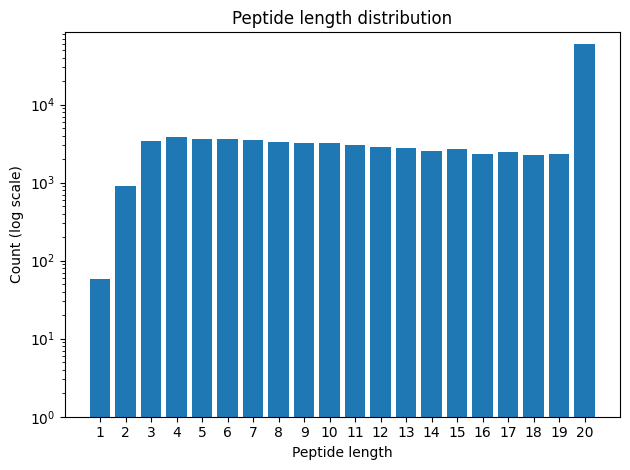

In [ ]:
# distribution
length_counts = df["aa_seq"].astype(str).str.len().value_counts().sort_index()

fig = plt.figure()
plt.bar(length_counts.index, length_counts.values)
plt.yscale("log")
plt.ylim(bottom=1)
plt.xticks(range(1, 21))
plt.xlabel("Peptide length")
plt.ylabel("Count (log scale)")
plt.title("Peptide length distribution")
plt.tight_layout()
p1=os.path.join(out_dir,"length_overall_logcount.png")
fig.savefig(p1, dpi=200)
plt.show()
plt.close(fig)
plots.append(p1)

In [ ]:
one_aa_df = df[df["aa_seq"].astype(str).str.len() == 1].reset_index(drop=True)
one_aa_df

,aa_seq,seed_bh,dataset,train_test,length
0,W,0,NNK1,train,1
1,I,0,NNK1,train,1
2,V,0,NNK1,train,1
3,C,0,NNK1,train,1
4,H,0,NNK1,train,1
5,Y,0,NNK1,train,1
6,Q,0,NNK1,train,1
7,T,0,NNK1,train,1
8,E,0,NNK1,train,1
9,G,0,NNK1,train,1


In [ ]:
df.head()

,aa_seq,seed_bh,dataset,train_test,length
0,IWTKSCDCVCSCGGYQGCYR,0,NNK1,train,20
1,ILKSFLD,0,NNK1,train,7
2,WTMLDMFLFS,0,NNK1,train,10
3,CLQCKCYNNCVQLRVTVGCM,1,NNK1,train,20
4,WTWILPMVRTIIYQY,0,NNK1,train,15


In [ ]:
counts.columns


Index([0, 1], dtype='int64', name='seed_bh')

In [ ]:
max_len = int(df["length"].max())
print(max_len)

20


### 2.stacked plot

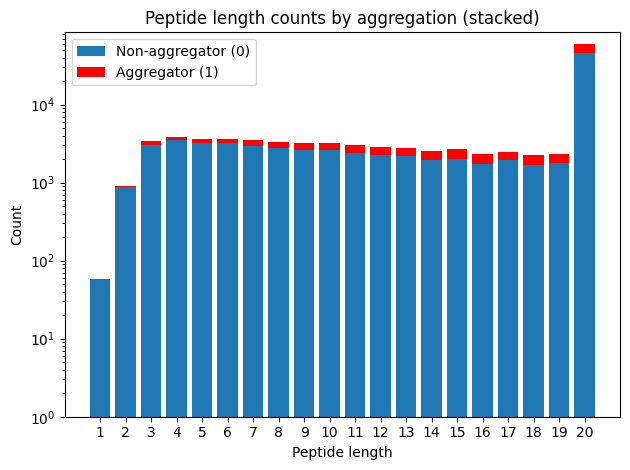

In [ ]:
# 2) stacked bar chart by aggregation label
# 计算长度
df["length"] = df["aa_seq"].astype(str).str.len()
max_len = int(df["length"].max()) # max_len = 20 最长的序列为20

# 统计每个长度下的聚集/非聚集数量
counts = (
    df.groupby(["length", "seed_bh"])
      .size()
      .unstack(fill_value=0)
      .reindex(range(1,21), fill_value=0))


# 绘图
fig, ax = plt.subplots()
ax.bar(counts.index, counts.get(0, 0), label="Non-aggregator (0)")
ax.bar(counts.index, counts.get(1, 0), bottom=counts.get(0, 0), label="Aggregator (1)", color= "red")

ax.set_xticks(range(1, 21))
ax.set_yscale("log")
ax.set_ylim(bottom=1)
ax.set_xlabel("Peptide length")
ax.set_ylabel("Count")
ax.set_title("Peptide length counts by aggregation (stacked)")
ax.legend()
fig.tight_layout()
p2=os.path.join(out_dir,"length_stacked_by_label.png")
fig.savefig(p2, dpi=200)
plt.show()
plt.close(fig)
plots.append(p2)


In [ ]:
# 看看长度=1有没有数据
(df["aa_seq"].astype(str).str.len() == 1).sum()

# 直接查看长度分布
df["aa_seq"].astype(str).str.len().value_counts().sort_index()


,count
aa_seq,
1,59
2,918
3,3387
4,3871
5,3626
6,3615
7,3479
8,3294
9,3269


### 3.heatmap

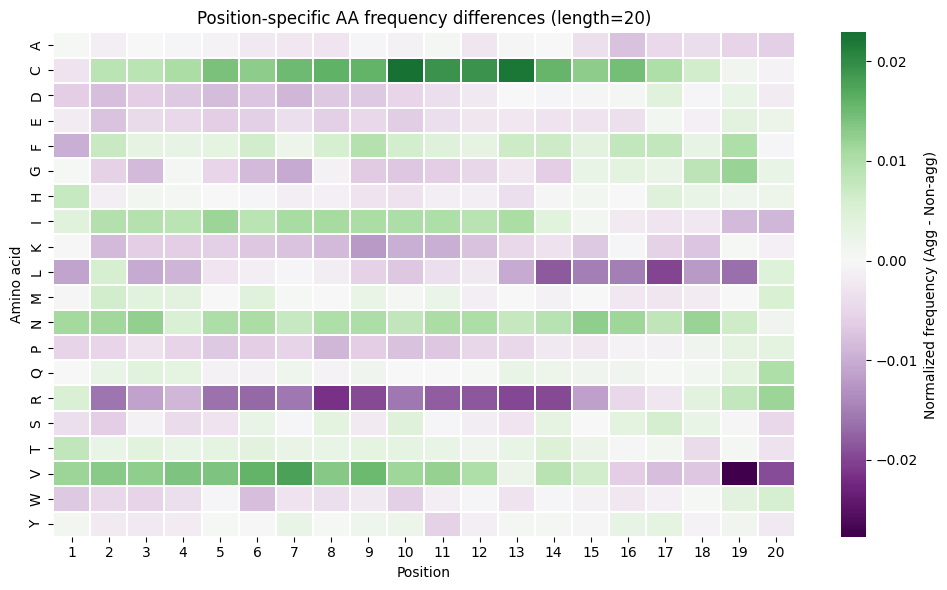

In [ ]:
# heatmap for 20 aa

df = df[df["length"] == 20].copy()

aa_order = list("ACDEFGHIKLMNPQRSTVWY")
max_len = 20

def freq_matrix(sub_df, max_len=20):
    mat = pd.DataFrame(0, index=aa_order, columns=range(1, max_len+1), dtype=float)
    seqs = sub_df["aa_seq"].astype(str)
    for seq in seqs:
        for pos, aa in enumerate(seq[:max_len], start=1):
            if aa in mat.index:
                mat.loc[aa, pos] += 1
    mat = mat.div(mat.sum(axis=0), axis=1)
    return mat

freq_agg = freq_matrix(df[df["seed_bh"] == 1], max_len)
freq_non = freq_matrix(df[df["seed_bh"] == 0], max_len)

diff = freq_agg - freq_non

fig = plt.figure(figsize=(10, 6))
sns.heatmap(diff, cmap="PRGn", center=0, linewidths=0.2, linecolor="white",
            cbar_kws={"label": "Normalized frequency (Agg - Non-agg)"})
plt.xlabel("Position")
plt.ylabel("Amino acid")
plt.title("Position-specific AA frequency differences (length=20)")
plt.tight_layout()
p3=os.path.join(out_dir,"heatmap-position-specific-aa-frequency-differences.png")
fig.savefig(p3, dpi=200)
plt.show()
plt.close(fig)
plots.append(p3)


### 4.aggregation rate VS aa length plot

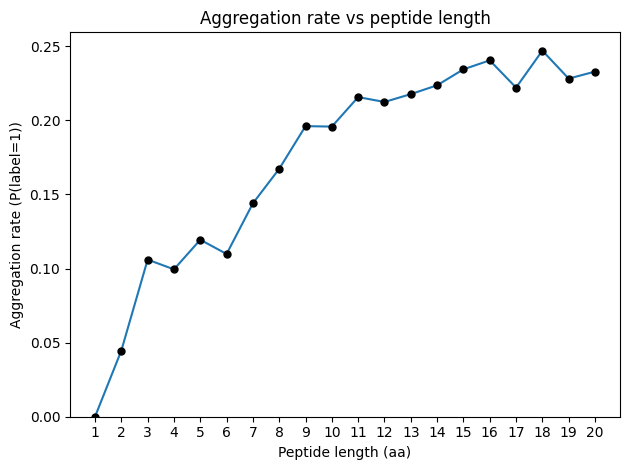

In [ ]:
df["length"] = df["aa_seq"].astype(str).str.len()
df["seed_bh"] = pd.to_numeric(df["seed_bh"], errors="coerce")

# 每个长度下 label=1 的比例
rate = df.groupby("length")["seed_bh"].mean()

# 如果你只要 1–20
rate = rate.reindex(range(1, 21))

fig, ax = plt.subplots()
ax.plot(rate.index, rate.values, marker="o",  markersize=5, markerfacecolor="black", markeredgecolor="black")
ax.set_xlabel("Peptide length (aa)")
ax.set_ylabel("Aggregation rate (P(label=1))")
ax.set_title("Aggregation rate vs peptide length")
ax.set_xticks(range(1, 21))
ax.set_ylim(bottom=0)
fig.tight_layout()
p4=os.path.join(out_dir,"aggregation_rate_heatmap_source_length.png")
fig.savefig(p4, dpi=200)
plt.show()
plt.close(fig)
plots.append(p4)



## 2.sampling from 100,000 to 5000

In [ ]:
import numpy as np
import pandas as pd
import os

out_dir_2="/content/drive/MyDrive/master_thesis/sampled_data_5000"
os.makedirs(out_dir_2, exist_ok=True) # set output directory for sampled data

df = df.copy()
df["length"] = df["aa_seq"].astype(str).str.len()
group_cols = ["length", "seed_bh", "dataset"]

# 每组大小
group_sizes = df.groupby(group_cols).size()

n_target = 5000
total = group_sizes.sum()
proportional = (group_sizes / total) * n_target # 按比例

# 先取 floor，保证不超过组容量
alloc = np.floor(proportional).astype(int)
alloc = alloc.clip(upper=group_sizes)

# 还需要分配的名额
remaining = n_target - alloc.sum()

# 可继续分配的容量
capacity = (group_sizes - alloc)

# 按剩余的小数部分优先分配，但不能超过容量
fractional = (proportional - np.floor(proportional)).fillna(0)

# 只在容量>0的组中分配
candidates = fractional[capacity > 0].sort_values(ascending=False)

for idx in candidates.index:
    if remaining <= 0:
        break
    if capacity.loc[idx] > 0:
        alloc.loc[idx] += 1
        capacity.loc[idx] -= 1
        remaining -= 1

# 如果还有剩余（极端情况），再按容量大的组继续补
if remaining > 0:
    extra_candidates = capacity[capacity > 0].sort_values(ascending=False)
    for idx in extra_candidates.index:
        if remaining <= 0:
            break
        take = min(remaining, capacity.loc[idx])
        alloc.loc[idx] += take
        remaining -= take

# 分层不放回抽样
sampled_parts = []
for group_key, n_take in alloc.items():
    if n_take == 0:
        continue
    sub = df.set_index(group_cols).loc[[group_key]].reset_index()
    sampled_parts.append(sub.sample(n=n_take, replace=False, random_state=42))

sampled_df = pd.concat(sampled_parts, ignore_index=True)
sampled_df = sampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

# 设定列顺序
cols = ["aa_seq", "seed_bh", "dataset", "train_test"]
# 确保 train_test 列存在且为空
sampled_df["train_test"] = ""
# 只保留并重排列
sampled_df = sampled_df[cols]

print(sampled_df.head())
print(sampled_df.shape)

out_path = os.path.join(out_dir_2, "canya_data_sampled_5000.xlsx")
sampled_df.to_excel(out_path, index=False)


                 aa_seq  seed_bh dataset train_test
0          GYVCMKLDRYLS        0    NNK3           
1  SQLFYAILSIHYWCVTFFRC        0    NNK1           
2  SGTSLPNITLLDTFCTRCFV        0    NNK1           
3             MYEGGSTLW        0    NNK2           
4               DGRFFFV        0    NNK1           
(5000, 4)


#### convert seq to SMILES

In [ ]:
import sys
!{sys.executable} -m pip install rdkit # install rdkit

from rdkit import Chem

def seq_to_smiles(seq):
    if not isinstance(seq, str) or len(seq) == 0:
        return ""
    mol = Chem.MolFromSequence(seq)
    if mol is None:
        return ""
    return Chem.MolToSmiles(mol) # canonical smiles

sampled_df["SMILES"] = sampled_df["aa_seq"].apply(seq_to_smiles)

# 把 SMILES 放到 aa_seq 右侧
cols = list(sampled_df.columns)
cols.remove("SMILES")
aa_idx = cols.index("aa_seq")
cols = cols[:aa_idx+1] + ["SMILES"] + cols[aa_idx+1:]
sampled_df = sampled_df[cols]

print(sampled_df.head())
print(sampled_df.shape)

out_path_smiles = os.path.join(out_dir_2, "canya_data_sampled_5000_smiles.xlsx")
sampled_df.to_excel(out_path_smiles, index=False)


                 aa_seq                                             SMILES  \
0          GYVCMKLDRYLS  CSCC[C@H](NC(=O)[C@H](CS)NC(=O)[C@@H](NC(=O)[C...   
1  SQLFYAILSIHYWCVTFFRC  CC[C@H](C)[C@H](NC(=O)[C@H](C)NC(=O)[C@H](Cc1c...   
2  SGTSLPNITLLDTFCTRCFV  CC[C@H](C)[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@...   
3             MYEGGSTLW  CSCC[C@H](N)C(=O)N[C@@H](Cc1ccc(O)cc1)C(=O)N[C...   
4               DGRFFFV  CC(C)[C@H](NC(=O)[C@H](Cc1ccccc1)NC(=O)[C@H](C...   

   seed_bh dataset train_test  
0        0    NNK3             
1        0    NNK1             
2        0    NNK1             
3        0    NNK2             
4        0    NNK1             
(5000, 5)


### 1.get 1000 from sampled 5000(with smiles)

In [ ]:
# === 再从 sampled_df 中分层不放回抽样 1000 ===
df2 = sampled_df.copy()
df2["length"] = df2["aa_seq"].astype(str).str.len()
group_cols = ["length", "seed_bh", "dataset"]

group_sizes = df2.groupby(group_cols).size()
n_target = 1000
total = group_sizes.sum()
proportional = (group_sizes / total) * n_target

alloc = np.floor(proportional).astype(int).clip(upper=group_sizes)
remaining = n_target - alloc.sum()
capacity = group_sizes - alloc
fractional = (proportional - np.floor(proportional)).fillna(0)

candidates = fractional[capacity > 0].sort_values(ascending=False)
for idx in candidates.index:
    if remaining <= 0:
        break
    if capacity.loc[idx] > 0:
        alloc.loc[idx] += 1
        capacity.loc[idx] -= 1
        remaining -= 1

if remaining > 0:
    extra_candidates = capacity[capacity > 0].sort_values(ascending=False)
    for idx in extra_candidates.index:
        if remaining <= 0:
            break
        take = min(remaining, capacity.loc[idx])
        alloc.loc[idx] += take
        remaining -= take

sampled_parts = []
for group_key, n_take in alloc.items():
    if n_take == 0:
        continue
    sub = df2.set_index(group_cols).loc[[group_key]].reset_index()
    sampled_parts.append(sub.sample(n=n_take, replace=False, random_state=42))

sampled_1000 = pd.concat(sampled_parts, ignore_index=True)
sampled_1000 = sampled_1000.sample(frac=1, random_state=42).reset_index(drop=True)

# 保持列顺序
cols = ["aa_seq", "SMILES", "seed_bh", "dataset", "train_test"]
sampled_1000["train_test"] = ""
sampled_1000 = sampled_1000[cols]

out_path_1000 = os.path.join(out_dir_2, "canya_data_sampled_1000_smiles.xlsx")
sampled_1000.to_excel(out_path_1000, index=False)

print(sampled_1000.head())
print(sampled_1000.shape)

                 aa_seq                                             SMILES  \
0  YDMIWSSMLGFIERQAYMLP  CC[C@H](C)[C@H](NC(=O)[C@H](Cc1ccccc1)NC(=O)CN...   
1  LFNYVEEIRAVRRIRLGYIK  CC[C@H](C)[C@H](NC(=O)[C@H](Cc1ccc(O)cc1)NC(=O...   
2  DNPTYRYTICGMTLEHPKEE  CC[C@H](C)[C@H](NC(=O)[C@@H](NC(=O)[C@H](Cc1cc...   
3  IMCEGSLTNIVDGGLMHTSW  CC[C@H](C)[C@H](N)C(=O)N[C@@H](CCSC)C(=O)N[C@@...   
4     RFMVSRYFISGPIIVSC  CC[C@H](C)[C@H](NC(=O)[C@H](Cc1ccccc1)NC(=O)[C...   

   seed_bh dataset train_test  
0        0    NNK1             
1        0    NNK3             
2        0    NNK3             
3        0    NNK2             
4        0    NNK2             
(1000, 5)


### convert to fingerprint

In [ ]:
# copy first 40 to see the structure by SMILES

df_small = sampled_df.head(40).copy()
df_small.head()

,aa_seq,SMILES,seed_bh,dataset,train_test
0,GYVCMKLDRYLS,CSCC[C@H](NC(=O)[C@H](CS)NC(=O)[C@@H](NC(=O)[C...,0,NNK3,
1,SQLFYAILSIHYWCVTFFRC,CC[C@H](C)[C@H](NC(=O)[C@H](C)NC(=O)[C@H](Cc1c...,0,NNK1,
2,SGTSLPNITLLDTFCTRCFV,CC[C@H](C)[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@...,0,NNK1,
3,MYEGGSTLW,CSCC[C@H](N)C(=O)N[C@@H](Cc1ccc(O)cc1)C(=O)N[C...,0,NNK2,
4,DGRFFFV,CC(C)[C@H](NC(=O)[C@H](Cc1ccccc1)NC(=O)[C@H](C...,0,NNK1,


In [ ]:
my_one_smile_string = df_small["SMILES"][0] # get the first aa seq
print(my_one_smile_string)

CSCC[C@H](NC(=O)[C@H](CS)NC(=O)[C@@H](NC(=O)[C@H](Cc1ccc(O)cc1)NC(=O)CN)C(C)C)C(=O)N[C@@H](CCCCN)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](CC(=O)O)C(=O)N[C@@H](CCCNC(=N)N)C(=O)N[C@@H](Cc1ccc(O)cc1)C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](CO)C(=O)O


In [ ]:
my_one_mol_object = Chem.MolFromSmiles(my_one_smile_string,sanitize=True)

In [ ]:
type(my_one_mol_object)

rdkit.Chem.rdchem.Mol

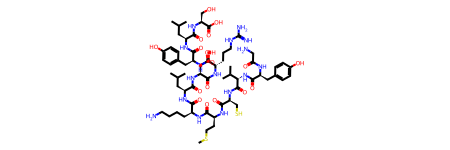

In [ ]:
my_one_mol_object

In [ ]:
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole
# 这一行非常关键，它会启用 RDKit 对 Jupyter 的渲染支持
IPythonConsole.ipython_useSVG = True  # 或者 False，取决于你想要的格式

PandasTools.AddMoleculeColumnToFrame(df_small, smilesCol='SMILES',molCol='Mol')
PandasTools.RenderImagesInAllDataFrames(images=True)

,aa_seq,SMILES,seed_bh,dataset,train_test,Mol
0,GYVCMKLDRYLS,CSCC[C@H](NC(=O)[C@H](CS)NC(=O)[C@@H](NC(=O)[C...,0,NNK3,,
1,SQLFYAILSIHYWCVTFFRC,CC[C@H](C)[C@H](NC(=O)[C@H](C)NC(=O)[C@H](Cc1c...,0,NNK1,,
2,SGTSLPNITLLDTFCTRCFV,CC[C@H](C)[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@...,0,NNK1,,
3,MYEGGSTLW,CSCC[C@H](N)C(=O)N[C@@H](Cc1ccc(O)cc1)C(=O)N[C...,0,NNK2,,
4,DGRFFFV,CC(C)[C@H](NC(=O)[C@H](Cc1ccccc1)NC(=O)[C@H](C...,0,NNK1,,

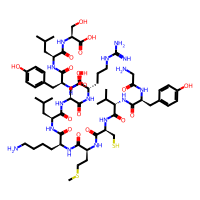
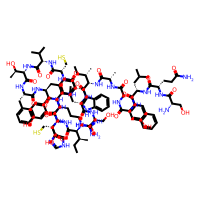
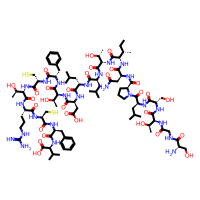
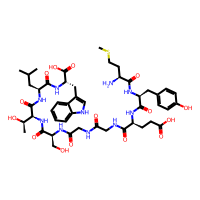
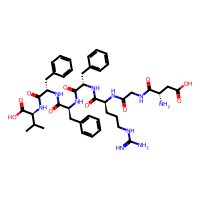

In [ ]:
df_small

### Morgan fingerprint

In [ ]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem.rdFingerprintGenerator import GetMorganGenerator

path_smiles = "/content/drive/MyDrive/master_thesis/sampled_data_5000/canya_data_sampled_5000_smiles.xlsx"
out_path = "/content/drive/MyDrive/master_thesis/sampled_data_5000/canya_data_sampled_5000_smiles_morganFP.xlsx"

df = pd.read_excel(path_smiles)

morgan_gen = GetMorganGenerator(radius=2, fpSize=2048)

def smiles_to_bitstring(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return ""
    fp = morgan_gen.GetFingerprint(mol)
    return fp.ToBitString()

df["Morgan_fp"] = df["SMILES"].apply(smiles_to_bitstring)

cols = list(df.columns)
cols.remove("Morgan_fp")
smiles_idx = cols.index("SMILES")
cols = cols[:smiles_idx + 1] + ["Morgan_fp"] + cols[smiles_idx + 1:]
df = df[cols]

df.to_excel(out_path, index=False)
out_path


'/content/drive/MyDrive/master_thesis/sampled_data_5000/canya_data_sampled_5000_smiles_morganFP.xlsx'

In [ ]:
print(df)

                    aa_seq                                             SMILES  \
0             GYVCMKLDRYLS  CSCC[C@H](NC(=O)[C@H](CS)NC(=O)[C@@H](NC(=O)[C...   
1     SQLFYAILSIHYWCVTFFRC  CC[C@H](C)[C@H](NC(=O)[C@H](C)NC(=O)[C@H](Cc1c...   
2     SGTSLPNITLLDTFCTRCFV  CC[C@H](C)[C@H](NC(=O)[C@H](CC(N)=O)NC(=O)[C@@...   
3                MYEGGSTLW  CSCC[C@H](N)C(=O)N[C@@H](Cc1ccc(O)cc1)C(=O)N[C...   
4                  DGRFFFV  CC(C)[C@H](NC(=O)[C@H](Cc1ccccc1)NC(=O)[C@H](C...   
...                    ...                                                ...   
4995  TLVLSLAHPCASGNKPDKSG  CC(C)C[C@H](NC(=O)[C@H](CO)NC(=O)[C@H](CC(C)C)...   
4996                 HQGFE  NC(=O)CC[C@H](NC(=O)[C@@H](N)Cc1c[nH]cn1)C(=O)...   
4997  GFLNLCRSTSRELMCEMYSA  CSCC[C@H](NC(=O)[C@H](CCC(=O)O)NC(=O)[C@H](CS)...   
4998  TRKMLLVVSKYVMTPYGFGL  CSCC[C@H](NC(=O)[C@H](CCCCN)NC(=O)[C@H](CCCNC(...   
4999              CPPSYLMT  CSCC[C@H](NC(=O)[C@H](CC(C)C)NC(=O)[C@H](Cc1cc...   

                           

### 2.PCA（check sampling）

In [ ]:
# 抽样代表性检查
sampled_df["aa_seq"].astype(str).str.len().value_counts().sort_index() # check the number of 1 aa sequence

,count
aa_seq,
1,3
2,40
3,152
4,173
5,163
6,161
7,156
8,148
9,147


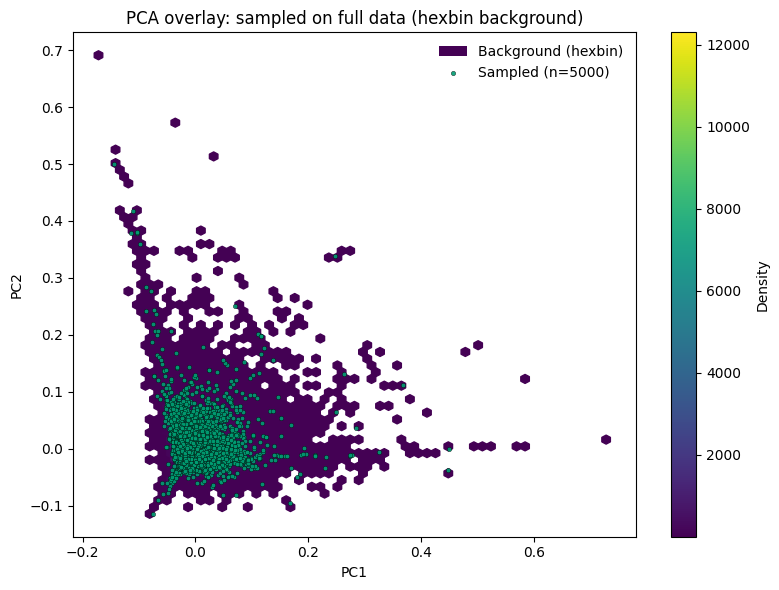

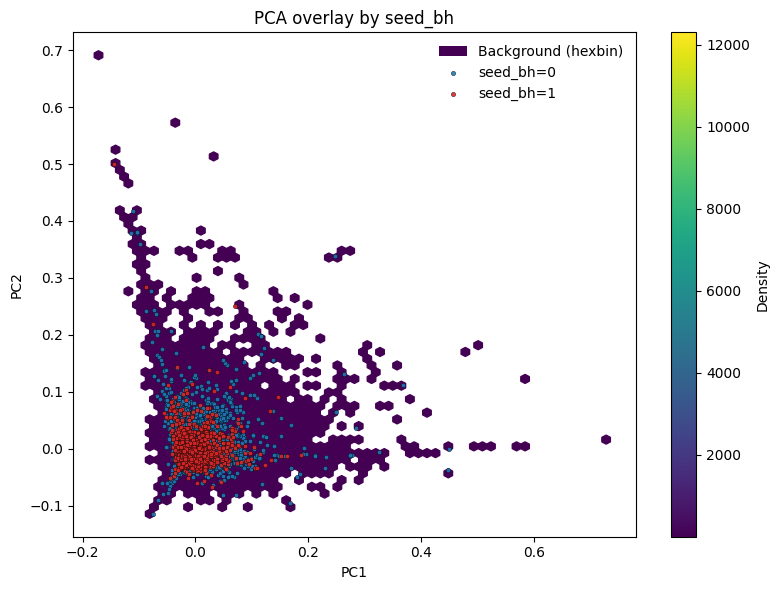

Sample sizes:
  df: 111692
  sampled_df: 5000

Explained variance ratio:
  PC1: 0.0112
  PC2: 0.0107

KS tests:
  PC1: statistic=0.0119, pvalue=0.5034
  PC2: statistic=0.0126, pvalue=0.4331

Coverage of df 1%-99% interval by sampled_df:
  PC1: 0.9790 (interval -0.0484 to 0.1226)
  PC2: 0.9780 (interval -0.0443 to 0.1222)

Distribution comparison (proportions):

Length distribution:
              df  sampled_df
aa_seq                      
1       0.000528      0.0006
2       0.008219      0.0080
3       0.030324      0.0304
4       0.034658      0.0346
5       0.032464      0.0326
6       0.032366      0.0322
7       0.031148      0.0312
8       0.029492      0.0296
9       0.029268      0.0294
10      0.028811      0.0288
11      0.027066      0.0272
12      0.025463      0.0254
13      0.024800      0.0248
14      0.022580      0.0224
15      0.023833      0.0238
16      0.020664      0.0208
17      0.022213      0.0222
18      0.020297      0.0202
19      0.020798      0.0208
20    

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats import ks_2samp
from matplotlib.patches import Patch

# === paths ===
path = "/content/drive/MyDrive/master_thesis/NNK_data_visualization/canya-data-source.xlsx"
out_dir_2 = "/content/drive/MyDrive/master_thesis/sampled_data_5000"
out_path = os.path.join(out_dir_2, "canya_data_sampled_5000.xlsx")
out_dir_pca = os.path.join(out_dir_2, "out_dir_pca")
os.makedirs(out_dir_pca, exist_ok=True)

AA_ALPHABET = "ACDEFGHIKLMNPQRSTVWY"
AA_INDEX = {aa: i for i, aa in enumerate(AA_ALPHABET)}
FEAT_DIM = len(AA_ALPHABET) ** 2

def load_data(file_path):
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"File not found: {file_path}")
    ext = os.path.splitext(file_path)[1].lower()
    if ext in [".xlsx", ".xls"]:
        return pd.read_excel(file_path)
    if ext in [".csv", ".tsv", ".txt"]:
        sep = "\t" if ext == ".tsv" else ","
        return pd.read_csv(file_path, sep=sep)
    raise ValueError(f"Unsupported file type: {ext}")

def featurize_dipeptide(seqs):
    n = len(seqs)
    X = np.zeros((n, FEAT_DIM), dtype=np.float32)

    for i, seq in enumerate(seqs):
        if not isinstance(seq, str):
            continue
        s = seq.strip().upper()
        if len(s) < 2:
            continue
        counts = np.zeros(FEAT_DIM, dtype=np.float32)
        valid = 0
        for j in range(len(s) - 1):
            a1, a2 = s[j], s[j + 1]
            if a1 in AA_INDEX and a2 in AA_INDEX:
                idx = AA_INDEX[a1] * len(AA_ALPHABET) + AA_INDEX[a2]
                counts[idx] += 1
                valid += 1
        if valid > 0:
            X[i, :] = counts / valid
    return X

def run_pca(X_df, X_samp):
    pca = PCA(n_components=2, random_state=0)
    X_df_pca = pca.fit_transform(X_df)
    X_samp_pca = pca.transform(X_samp)
    return pca, X_df_pca, X_samp_pca


def plot_overlay(X_bg, X_samp, labels=None, out_file="pca.png", title="", show=False):
    fig, ax = plt.subplots(figsize=(8, 6))

    hb = ax.hexbin(X_bg[:, 0], X_bg[:, 1], gridsize=60, mincnt=1, cmap="viridis")
    cb = fig.colorbar(hb, ax=ax)
    cb.set_label("Density")

    green = "#009E73"
    # 代理图例：背景（用 hexbin colormap 的低值色）
    bg_proxy = Patch(facecolor=hb.cmap(hb.norm(0.0)), edgecolor="none", label="Background (hexbin)")

    if labels is None:
        samp = ax.scatter(
            X_samp[:, 0], X_samp[:, 1],
            s=10, alpha=0.9, edgecolors="black", linewidths=0.3, c=green, label="Sampled (n=5000)"
        )
        ax.legend(handles=[bg_proxy, samp], frameon=False, loc="best")
    else:
        colors = {0: "tab:blue", 1: "tab:red"}
        handles = [bg_proxy]
        for lab in [0, 1]:
            mask = labels == lab
            h = ax.scatter(
                X_samp[mask, 0], X_samp[mask, 1],
                s=10, alpha=0.9, edgecolors="black", linewidths=0.3,
                c=colors.get(lab, "gray"), label=f"seed_bh={lab}"
            )
            handles.append(h)
        ax.legend(handles=handles, frameon=False, loc="best")

    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_title(title)
    fig.tight_layout()
    fig.savefig(out_file, dpi=200)
    if show:
        plt.show()
    plt.close(fig)

def stats_checks(df, sampled_df, X_df_pca, X_samp_pca):
    ks_pc1 = ks_2samp(X_df_pca[:, 0], X_samp_pca[:, 0])
    ks_pc2 = ks_2samp(X_df_pca[:, 1], X_samp_pca[:, 1])

    def coverage(pc_all, pc_sub, low=0.01, high=0.99):
        q_low, q_high = np.quantile(pc_all, [low, high])
        within = np.mean((pc_sub >= q_low) & (pc_sub <= q_high))
        return within, (q_low, q_high)

    cov_pc1, q_pc1 = coverage(X_df_pca[:, 0], X_samp_pca[:, 0])
    cov_pc2, q_pc2 = coverage(X_df_pca[:, 1], X_samp_pca[:, 1])

    df_len = df["aa_seq"].astype(str).str.len()
    samp_len = sampled_df["aa_seq"].astype(str).str.len()

    length_table = pd.concat(
        [
            df_len.value_counts(normalize=True).sort_index().rename("df"),
            samp_len.value_counts(normalize=True).sort_index().rename("sampled_df"),
        ],
        axis=1,
    ).fillna(0)

    seed_table = pd.concat(
        [
            df["seed_bh"].value_counts(normalize=True).rename("df"),
            sampled_df["seed_bh"].value_counts(normalize=True).rename("sampled_df"),
        ],
        axis=1,
    ).fillna(0)

    dataset_table = pd.concat(
        [
            df["dataset"].value_counts(normalize=True).rename("df"),
            sampled_df["dataset"].value_counts(normalize=True).rename("sampled_df"),
        ],
        axis=1,
    ).fillna(0)

    return {
        "ks_pc1": ks_pc1,
        "ks_pc2": ks_pc2,
        "coverage_pc1": (cov_pc1, q_pc1),
        "coverage_pc2": (cov_pc2, q_pc2),
        "length_table": length_table,
        "seed_table": seed_table,
        "dataset_table": dataset_table,
    }

# === load ===
df = load_data(path)
sampled_df = load_data(out_path)

required_cols = {"aa_seq", "seed_bh", "dataset", "train_test"}
missing_df = required_cols - set(df.columns)
missing_sampled = required_cols - set(sampled_df.columns)
if missing_df:
    raise ValueError(f"df missing columns: {missing_df}")
if missing_sampled:
    raise ValueError(f"sampled_df missing columns: {missing_sampled}")

# === featurize ===
X_df = featurize_dipeptide(df["aa_seq"].astype(str).tolist())
X_samp = featurize_dipeptide(sampled_df["aa_seq"].astype(str).tolist())

# === PCA ===
pca, X_df_pca, X_samp_pca = run_pca(X_df, X_samp)
evr = pca.explained_variance_ratio_

# === background subsample for hexbin ===
max_bg_points = 200000 # 最大背景点，20万，没有用下采样，包括了全部10万+数据作为背景点
if len(X_df_pca) > max_bg_points:
    rng = np.random.default_rng(0)
    idx = rng.choice(len(X_df_pca), size=max_bg_points, replace=False)
    X_bg = X_df_pca[idx]
else:
    X_bg = X_df_pca

# === plots ===
plot_overlay(
    X_bg, X_samp_pca,
    labels=None,
    out_file=os.path.join(out_dir_pca, "pca_hexbin_overlay.png"),
    title="PCA overlay: sampled on full data (hexbin background)",
    show=True
)

labels = pd.to_numeric(sampled_df["seed_bh"], errors="coerce").fillna(-1).astype(int).to_numpy()
plot_overlay(
    X_bg, X_samp_pca,
    labels=labels,
    out_file=os.path.join(out_dir_pca, "pca_hexbin_overlay_by_label.png"),
    title="PCA overlay by seed_bh",
    show=True
)

# === stats ===
stats = stats_checks(df, sampled_df, X_df_pca, X_samp_pca)

print("Sample sizes:")
print(f"  df: {len(df)}")
print(f"  sampled_df: {len(sampled_df)}\n")

print("Explained variance ratio:")
print(f"  PC1: {evr[0]:.4f}")
print(f"  PC2: {evr[1]:.4f}\n")

print("KS tests:")
print(f"  PC1: statistic={stats['ks_pc1'].statistic:.4f}, pvalue={stats['ks_pc1'].pvalue:.4g}")
print(f"  PC2: statistic={stats['ks_pc2'].statistic:.4f}, pvalue={stats['ks_pc2'].pvalue:.4g}\n")

cov1, q1 = stats["coverage_pc1"]
cov2, q2 = stats["coverage_pc2"]
print("Coverage of df 1%-99% interval by sampled_df:")
print(f"  PC1: {cov1:.4f} (interval {q1[0]:.4f} to {q1[1]:.4f})")
print(f"  PC2: {cov2:.4f} (interval {q2[0]:.4f} to {q2[1]:.4f})\n")

print("Distribution comparison (proportions):")
print("\nLength distribution:")
print(stats["length_table"])
print("\nseed_bh distribution:")
print(stats["seed_table"])
print("\ndataset distribution:")
print(stats["dataset_table"])


## 3.构建GNN

### 1.1000数据，预训练

#### 1.utils_gnn.py

In [ ]:
import sys
!{sys.executable} -m pip install rdkit # install rdkit
!{sys.executable} -m pip install torch-scatter torch-sparse torch-geometric -f https://data.pyg.org/whl/torch-2.3.0+cpu.html

import os
import random
import numpy as np
import torch
from rdkit import Chem
from torch_geometric.data import Data

AA_ALPHABET = "ACDEFGHIKLMNPQRSTVWY"

ATOM_CHIRALITY = [
    Chem.rdchem.ChiralType.CHI_UNSPECIFIED,
    Chem.rdchem.ChiralType.CHI_TETRAHEDRAL_CW,
    Chem.rdchem.ChiralType.CHI_TETRAHEDRAL_CCW,
    Chem.rdchem.ChiralType.CHI_OTHER,
]
HBOND_TYPES = [
    Chem.rdchem.HybridizationType.SP,
    Chem.rdchem.HybridizationType.SP2,
    Chem.rdchem.HybridizationType.SP3,
    Chem.rdchem.HybridizationType.SP3D,
    Chem.rdchem.HybridizationType.SP3D2,
    Chem.rdchem.HybridizationType.OTHER,
]
BOND_TYPES = [
    Chem.rdchem.BondType.SINGLE,
    Chem.rdchem.BondType.DOUBLE,
    Chem.rdchem.BondType.TRIPLE,
    Chem.rdchem.BondType.AROMATIC,
]
BOND_STEREO = [
    Chem.rdchem.BondStereo.STEREONONE,
    Chem.rdchem.BondStereo.STEREOZ,
    Chem.rdchem.BondStereo.STEREOE,
    Chem.rdchem.BondStereo.STEREOCIS,
    Chem.rdchem.BondStereo.STEREOTRANS,
    Chem.rdchem.BondStereo.STEREOANY,
]


def seed_all(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)


def check_columns(df):
    required = {"aa_seq", "SMILES", "seed_bh", "dataset", "train_test"}
    missing = required - set(df.columns)
    if missing:
        raise ValueError(f"Missing columns: {missing}")


def smiles_to_mol(smiles):
    if not isinstance(smiles, str) or smiles.strip() == "":
        return None
    return Chem.MolFromSmiles(smiles)


def one_hot(val, choices):
    return [1 if val == c else 0 for c in choices]


def atom_features(atom):
    feats = []
    feats.append(atom.GetAtomicNum())
    feats.append(atom.GetDegree())
    feats.append(atom.GetFormalCharge())
    feats.append(atom.GetTotalNumHs())
    feats.append(1 if atom.GetIsAromatic() else 0)
    feats.append(1 if atom.IsInRing() else 0)
    feats += one_hot(atom.GetChiralTag(), ATOM_CHIRALITY)
    feats += one_hot(atom.GetHybridization(), HBOND_TYPES)
    return feats


def bond_features(bond):
    feats = []
    feats += one_hot(bond.GetBondType(), BOND_TYPES)
    feats.append(1 if bond.GetIsConjugated() else 0)
    feats.append(1 if bond.IsInRing() else 0)
    feats += one_hot(bond.GetStereo(), BOND_STEREO)
    return feats


def mol_to_pyg(mol, label):
    num_atoms = mol.GetNumAtoms()
    x = torch.tensor([atom_features(mol.GetAtomWithIdx(i)) for i in range(num_atoms)], dtype=torch.float)

    edge_index = []
    edge_attr = []
    for bond in mol.GetBonds():
        i = bond.GetBeginAtomIdx()
        j = bond.GetEndAtomIdx()
        bf = bond_features(bond)
        edge_index.append([i, j])
        edge_attr.append(bf)
        edge_index.append([j, i])
        edge_attr.append(bf)

    edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
    edge_attr = torch.tensor(edge_attr, dtype=torch.float)
    y = torch.tensor([float(label)], dtype=torch.float)
    return Data(x=x, edge_index=edge_index, edge_attr=edge_attr, y=y)

Looking in links: https://data.pyg.org/whl/torch-2.3.0+cpu.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 513.6/513.6 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 22.9 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/torch_geometric/__init__.py:4: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: Could not load this library: /usr/local/lib/python3.12/dist-packages/torch_scatter/_version_cpu.so
  import torch_geometric.typing
/usr/local/lib/python3.12/dist-packages/torch_geometric/__init__.py:4: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: Could not load this library: /usr/local/lib/python3.12/dist-packages/torch_sparse/_version_cpu.so
  import torch_geometric.typing


##### 写入py文件

In [ ]:
# 写入py文件

import os
from textwrap import dedent

out_dir = "/content/drive/MyDrive/master_thesis/sampled_data_5000/Models"
os.makedirs(out_dir, exist_ok=True)

code = r'''
import os
import random
import numpy as np
import torch
from rdkit import Chem
from torch_geometric.data import Data

AA_ALPHABET = "ACDEFGHIKLMNPQRSTVWY"

ATOM_CHIRALITY = [
    Chem.rdchem.ChiralType.CHI_UNSPECIFIED,
    Chem.rdchem.ChiralType.CHI_TETRAHEDRAL_CW,
    Chem.rdchem.ChiralType.CHI_TETRAHEDRAL_CCW,
    Chem.rdchem.ChiralType.CHI_OTHER,
]
HBOND_TYPES = [
    Chem.rdchem.HybridizationType.SP,
    Chem.rdchem.HybridizationType.SP2,
    Chem.rdchem.HybridizationType.SP3,
    Chem.rdchem.HybridizationType.SP3D,
    Chem.rdchem.HybridizationType.SP3D2,
    Chem.rdchem.HybridizationType.OTHER,
]
BOND_TYPES = [
    Chem.rdchem.BondType.SINGLE,
    Chem.rdchem.BondType.DOUBLE,
    Chem.rdchem.BondType.TRIPLE,
    Chem.rdchem.BondType.AROMATIC,
]
BOND_STEREO = [
    Chem.rdchem.BondStereo.STEREONONE,
    Chem.rdchem.BondStereo.STEREOZ,
    Chem.rdchem.BondStereo.STEREOE,
    Chem.rdchem.BondStereo.STEREOCIS,
    Chem.rdchem.BondStereo.STEREOTRANS,
    Chem.rdchem.BondStereo.STEREOANY,
]

def seed_all(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

def check_columns(df):
    required = {"aa_seq", "SMILES", "seed_bh", "dataset", "train_test"}
    missing = required - set(df.columns)
    if missing:
        raise ValueError(f"Missing columns: {missing}")

def smiles_to_mol(smiles):
    if not isinstance(smiles, str) or smiles.strip() == "":
        return None
    return Chem.MolFromSmiles(smiles)

def one_hot(val, choices):
    return [1 if val == c else 0 for c in choices]

def atom_features(atom):
    feats = []
    feats.append(atom.GetAtomicNum())
    feats.append(atom.GetDegree())
    feats.append(atom.GetFormalCharge())
    feats.append(atom.GetTotalNumHs())
    feats.append(1 if atom.GetIsAromatic() else 0)
    feats.append(1 if atom.IsInRing() else 0)
    feats += one_hot(atom.GetChiralTag(), ATOM_CHIRALITY)
    feats += one_hot(atom.GetHybridization(), HBOND_TYPES)
    return feats

def bond_features(bond):
    feats = []
    feats += one_hot(bond.GetBondType(), BOND_TYPES)
    feats.append(1 if bond.GetIsConjugated() else 0)
    feats.append(1 if bond.IsInRing() else 0)
    feats += one_hot(bond.GetStereo(), BOND_STEREO)
    return feats

def mol_to_pyg(mol, label):
    num_atoms = mol.GetNumAtoms()
    x = torch.tensor([atom_features(mol.GetAtomWithIdx(i)) for i in range(num_atoms)], dtype=torch.float)

    edge_index = []
    edge_attr = []
    for bond in mol.GetBonds():
        i = bond.GetBeginAtomIdx()
        j = bond.GetEndAtomIdx()
        bf = bond_features(bond)
        edge_index.append([i, j])
        edge_attr.append(bf)
        edge_index.append([j, i])
        edge_attr.append(bf)

    edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
    edge_attr = torch.tensor(edge_attr, dtype=torch.float)
    y = torch.tensor([float(label)], dtype=torch.float)
    return Data(x=x, edge_index=edge_index, edge_attr=edge_attr, y=y)
'''

out_path = os.path.join(out_dir, "utils_gnn.py")
with open(out_path, "w") as f:
    f.write(dedent(code).lstrip())

out_path


'/content/drive/MyDrive/master_thesis/sampled_data_5000/Models/utils_gnn.py'

In [ ]:
# check the file

import os
os.listdir("/content/drive/MyDrive/master_thesis/sampled_data_5000/Models")

['utils_gnn.py']

#### 2.data_gnn.py

In [ ]:
import sys
sys.path.append("/content/drive/MyDrive/master_thesis/sampled_data_5000/Models")
!{sys.executable} -m pip install rdkit # install rdkit


import os
import pandas as pd
from sklearn.model_selection import train_test_split
from utils_gnn import check_columns, smiles_to_mol, mol_to_pyg # utils


def load_excel(path):
    if not os.path.exists(path):
        raise FileNotFoundError(f"File not found: {path}")
    return pd.read_excel(path)


def clean_df(df):
    check_columns(df)
    df = df.copy()
    df["SMILES"] = df["SMILES"].astype(str)
    df["mol"] = df["SMILES"].apply(smiles_to_mol)
    df = df[df["mol"].notna()].reset_index(drop=True)
    return df


def stratified_split(df, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15, seed=42):
    df = df.copy()
    df["length"] = df["aa_seq"].astype(str).str.len()

    bins = [0, 5, 10, 15, 20, 1e9]
    labels = ["1-5", "6-10", "11-15", "16-20", "21+"]
    df["length_bin"] = pd.cut(df["length"], bins=bins, labels=labels, right=True, include_lowest=True)

    df["stratum"] = df["seed_bh"].astype(str) + "|" + df["dataset"].astype(str) + "|" + df["length_bin"].astype(str)

    stratum_counts = df["stratum"].value_counts()
    use_stratify = (stratum_counts.min() >= 2)
    stratify_col = df["stratum"] if use_stratify else None

    train_df, temp_df = train_test_split(
        df, test_size=(1 - train_ratio), random_state=seed, stratify=stratify_col
    )

    val_size = val_ratio / (val_ratio + test_ratio)
    stratify_temp = temp_df["stratum"] if use_stratify else None

    val_df, test_df = train_test_split(
        temp_df, test_size=(1 - val_size), random_state=seed, stratify=stratify_temp
    )

    df["train_test"] = ""
    df.loc[train_df.index, "train_test"] = "train"
    df.loc[val_df.index, "train_test"] = "val"
    df.loc[test_df.index, "train_test"] = "test"

    df.drop(columns=["mol", "length", "length_bin", "stratum"], errors="ignore", inplace=True)
    return df, train_df, val_df, test_df


def build_pyg_dataset(sub_df):
    data_list = []
    for _, row in sub_df.iterrows():
        mol = smiles_to_mol(row["SMILES"])
        if mol is None:
            continue
        data = mol_to_pyg(mol, row["seed_bh"])
        data_list.append(data)
    return data_list


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 51.8 MB/s eta 0:00:00


##### 写入py文件

In [ ]:
import os
from textwrap import dedent

out_dir = "/content/drive/MyDrive/master_thesis/sampled_data_5000/Models"
os.makedirs(out_dir, exist_ok=True)

code = r'''
import sys
sys.path.append("/content/drive/MyDrive/master_thesis/sampled_data_5000/Models")

import os
import numpy as np
import pandas as pd
from utils_gnn import check_columns, smiles_to_mol  # mol_to_pyg 这里暂时用不上也可以不导入


def load_excel(path):
    if not os.path.exists(path):
        raise FileNotFoundError(f"File not found: {path}")
    return pd.read_excel(path)


def clean_df(df):
    check_columns(df)
    df = df.copy()
    df["SMILES"] = df["SMILES"].astype(str)
    df["mol"] = df["SMILES"].apply(smiles_to_mol)
    df = df[df["mol"].notna()].reset_index(drop=True)
    return df


def stratified_split(df, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15, seed=42):
    # 只按 seed_bh 分层：每个类内部 shuffle 后按比例切
    df = df.copy()
    rng = np.random.default_rng(seed)

    df["train_test"] = ""
    for label, sub_idx in df.groupby("seed_bh").groups.items():
        sub_idx = np.array(list(sub_idx))
        rng.shuffle(sub_idx)

        n = len(sub_idx)
        n_train = int(round(n * train_ratio))
        n_val = int(round(n * val_ratio))
        # n_test 用剩余，保证总数一致
        # n_test = n - n_train - n_val

        train_idx = sub_idx[:n_train]
        val_idx = sub_idx[n_train:n_train + n_val]
        test_idx = sub_idx[n_train + n_val:]

        df.loc[train_idx, "train_test"] = "train"
        df.loc[val_idx, "train_test"] = "val"
        df.loc[test_idx, "train_test"] = "test"

    train_df = df[df["train_test"] == "train"].copy()
    val_df = df[df["train_test"] == "val"].copy()
    test_df = df[df["train_test"] == "test"].copy()

    # 清理临时列
    df.drop(columns=["mol"], errors="ignore", inplace=True)
    return df, train_df, val_df, test_df


def report_split(df_split):
    # 打印你关心的三个统计
    print(df_split["train_test"].value_counts(normalize=True).rename("proportion"))
    print(df_split.groupby("train_test")["seed_bh"].mean().rename("seed_bh"))
    print(df_split["seed_bh"].mean())

def save_split(df_split, out_path="/content/drive/MyDrive/master_thesis/sampled_data_5000",
               filename="canya_1000_splits_train-test-val"):
    """
    Save df_split (with train_test column) to an Excel file in out_path.
    Returns the full saved file path.
    """
    os.makedirs(out_path, exist_ok=True)

    # 自动补 .xlsx 后缀
    if not filename.lower().endswith(".xlsx"):
        filename = filename + ".xlsx"

    full_path = os.path.join(out_path, filename)
    df_split.to_excel(full_path, index=False)
    return full_path

'''
out_path = os.path.join(out_dir, "data_gnn.py")
with open(out_path, "w") as f:
    f.write(dedent(code).lstrip())

print("Wrote:", out_path)


Wrote: /content/drive/MyDrive/master_thesis/sampled_data_5000/Models/data_gnn.py


In [ ]:
import sys
sys.path.append("/content/drive/MyDrive/master_thesis/sampled_data_5000/Models")

import importlib
import data_gnn
importlib.reload(data_gnn)

from data_gnn import load_excel, clean_df, stratified_split, save_split

# Define path for this cell
path = "/content/drive/MyDrive/master_thesis/sampled_data_5000/canya_data_sampled_1000_smiles.xlsx"

df = load_excel(path)
df = clean_df(df)
df_split, train_df, val_df, test_df = stratified_split(df, 0.7, 0.15, 0.15, seed=42)

saved_path = save_split(df_split)  # 用默认目录+默认文件名
print("Saved to:", saved_path)


Saved to: /content/drive/MyDrive/master_thesis/sampled_data_5000/canya_1000_splits_train-test-val.xlsx


In [ ]:
# check train/val/test sets

import sys
sys.path.append("/content/drive/MyDrive/master_thesis/sampled_data_5000/Models")

# Explicitly reload the module to ensure the latest version is used
import importlib
import data_gnn
importlib.reload(data_gnn)

from data_gnn import load_excel, clean_df, stratified_split, report_split

# Corrected excel path
path = "/content/drive/MyDrive/master_thesis/sampled_data_5000/canya_data_sampled_1000_smiles.xlsx"

df = load_excel(path)
df = clean_df(df)

df_split, train_df, val_df, test_df = stratified_split(df, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15, seed=42)

report_split(df_split)


train_test
train    0.70
test     0.15
val      0.15
Name: proportion, dtype: float64
train_test
test     0.206667
train    0.205714
val      0.206667
Name: seed_bh, dtype: float64
0.206


In [ ]:
import os
os.listdir("/content/drive/MyDrive/master_thesis/sampled_data_5000/Models")

['utils_gnn.py', '__pycache__', 'data_gnn.py', 'models_gnn.py']

#### 3.models_gnn.py

In [ ]:
import sys
import torch

# Install PyG with GPU preference, fallback to CPU
if torch.cuda.is_available():
    !{sys.executable} -m pip install torch-scatter torch-sparse torch-geometric -f https://data.pyg.org/whl/torch-2.3.0+cu121.html
else:
    !{sys.executable} -m pip install torch-scatter torch-sparse torch-geometric -f https://data.pyg.org/whl/torch-2.3.0+cpu.html

import numpy as np
import torch.nn as nn
from torch.optim import Adam
from torch_geometric.loader import DataLoader
from torch_geometric.nn import GINEConv, global_mean_pool

from sklearn.metrics import (
    roc_auc_score, average_precision_score,
    accuracy_score, f1_score, precision_score, recall_score,
    confusion_matrix
)

# device: prefer GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


class GINClassifier(nn.Module):
    def __init__(self, in_dim, edge_dim, hidden_dim=128, num_layers=4, dropout=0.2):
        super().__init__()
        self.convs = nn.ModuleList()
        self.dropout = dropout

        for i in range(num_layers):
            input_dim = in_dim if i == 0 else hidden_dim
            nn_mlp = nn.Sequential(
                nn.Linear(input_dim, hidden_dim),
                nn.ReLU(),
                nn.Linear(hidden_dim, hidden_dim),
            )
            self.convs.append(GINEConv(nn=nn_mlp, edge_dim=edge_dim))

        self.classifier = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, 1),
        )

    def forward(self, data):
        x, edge_index, edge_attr, batch = data.x, data.edge_index, data.edge_attr, data.batch
        for conv in self.convs:
            x = conv(x, edge_index, edge_attr)
            x = torch.relu(x)
            x = nn.functional.dropout(x, p=self.dropout, training=self.training)
        x = global_mean_pool(x, batch)
        out = self.classifier(x).view(-1)
        return out


def eval_model(model, loader, device):
    model.eval()
    ys = []
    logits = []
    with torch.no_grad():
        for batch in loader:
            batch = batch.to(device)
            out = model(batch)
            ys.append(batch.y.view(-1).cpu().numpy())
            logits.append(out.cpu().numpy())

    y_true = np.concatenate(ys) if ys else np.array([])
    y_logit = np.concatenate(logits) if logits else np.array([])
    y_prob = 1 / (1 + np.exp(-y_logit)) if len(y_logit) > 0 else np.array([])

    metrics = {}
    if len(np.unique(y_true)) >= 2:
        metrics["roc_auc"] = roc_auc_score(y_true, y_prob)
        metrics["pr_auc"] = average_precision_score(y_true, y_prob)
    else:
        metrics["roc_auc"] = None
        metrics["pr_auc"] = None

    y_pred = (y_prob >= 0.5).astype(int) if len(y_prob) > 0 else np.array([])
    if len(y_true) > 0:
        metrics["acc"] = accuracy_score(y_true, y_pred)
        metrics["f1"] = f1_score(y_true, y_pred, zero_division=0)
        metrics["precision"] = precision_score(y_true, y_pred, zero_division=0)
        metrics["recall"] = recall_score(y_true, y_pred, zero_division=0)
        metrics["cm"] = confusion_matrix(y_true, y_pred)
    return metrics


def train_model(
    model, train_list, val_list, model_path,
    lr=1e-3, batch_size=64, epochs=100, patience=10, device="cpu"
):
    train_loader = DataLoader(train_list, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_list, batch_size=batch_size, shuffle=False)

    y_train = torch.tensor([d.y.item() for d in train_list])
    n_pos = (y_train == 1).sum().item()
    n_neg = (y_train == 0).sum().item()
    pos_weight = torch.tensor([n_neg / n_pos], dtype=torch.float).to(device) if n_pos > 0 else None

    criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
    optimizer = Adam(model.parameters(), lr=lr)

    best_metric = -1
    wait = 0

    for epoch in range(1, epochs + 1):
        model.train()
        total_loss = 0.0
        for batch in train_loader:
            batch = batch.to(device)
            optimizer.zero_grad()
            out = model(batch)
            loss = criterion(out, batch.y.view(-1))
            loss.backward()
            optimizer.step()
            total_loss += loss.item() * batch.num_graphs

        val_metrics = eval_model(model, val_loader, device)
        val_score = val_metrics["roc_auc"] if val_metrics["roc_auc"] is not None else val_metrics["f1"]
        if val_score is None:
            val_score = -1

        if val_score > best_metric:
            best_metric = val_score
            wait = 0
            torch.save(model.state_dict(), model_path)
        else:
            wait += 1

        print(f"Epoch {epoch:03d} | Loss {total_loss/len(train_list):.4f} | Val score {val_score:.4f}")
        if wait >= patience:
            print("Early stopping.")
            break

    return model_path


def predict_smiles(model, data_list, device="cpu", threshold=0.5):
    loader = DataLoader(data_list, batch_size=64, shuffle=False)
    probs = []
    with torch.no_grad():
        for batch in loader:
            batch = batch.to(device)
            logits = model(batch)
            p = torch.sigmoid(logits).cpu().numpy()
            probs.extend(p.tolist())
    preds = [1 if p >= threshold else 0 for p in probs]
    return probs, preds

# Usage:
# model = GINClassifier(in_dim, edge_dim).to(device)
# train_model(model, train_list, val_list, "best.pt", device=device)
# probs, preds = predict_smiles(model, data_list, device=device)


ERROR: Operation cancelled by user
Using device: cpu


##### 写入py文件

In [ ]:
import os
from textwrap import dedent

out_dir = "/content/drive/MyDrive/master_thesis/sampled_data_5000/Models"
os.makedirs(out_dir, exist_ok=True)

code = r'''
import sys
import torch

# Install PyG with GPU preference, fallback to CPU
# The following lines are commented out as pip installs should ideally be done outside of modules
# if torch.cuda.is_available():
#     !{sys.executable} -m pip install torch-scatter torch-sparse torch-geometric -f https://data.pyg.org/whl/torch-2.3.0+cu121.html
# else:
#     !{sys.executable} -m pip install torch-scatter torch-sparse torch-geometric -f https://data.pyg.org/whl/torch-2.3.0+cpu.html

import numpy as np
import torch.nn as nn
from torch.optim import Adam
from torch_geometric.loader import DataLoader
from torch_geometric.nn import GINEConv, global_mean_pool

from sklearn.metrics import (
    roc_auc_score, average_precision_score,
    accuracy_score, f1_score, precision_score, recall_score,
    confusion_matrix
)

# device: prefer GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


class GINClassifier(nn.Module):
    def __init__(self, in_dim, edge_dim, hidden_dim=128, num_layers=4, dropout=0.2):
        super().__init__()
        self.convs = nn.ModuleList()
        self.dropout = dropout

        for i in range(num_layers):
            input_dim = in_dim if i == 0 else hidden_dim
            nn_mlp = nn.Sequential(
                nn.Linear(input_dim, hidden_dim),
                nn.ReLU(),
                nn.Linear(hidden_dim, hidden_dim),
            )
            self.convs.append(GINEConv(nn=nn_mlp, edge_dim=edge_dim))

        self.classifier = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, 1),
        )

    def forward(self, data):
        x, edge_index, edge_attr, batch = data.x, data.edge_index, data.edge_attr, data.batch
        for conv in self.convs:
            x = conv(x, edge_index, edge_attr)
            x = torch.relu(x)
            x = nn.functional.dropout(x, p=self.dropout, training=self.training)
        x = global_mean_pool(x, batch)
        out = self.classifier(x).view(-1)
        return out


def eval_model(model, loader, device):
    model.eval()
    ys = []
    logits = []
    with torch.no_grad():
        for batch in loader:
            batch = batch.to(device)
            out = model(batch)
            ys.append(batch.y.view(-1).cpu().numpy())
            logits.append(out.cpu().numpy())

    y_true = np.concatenate(ys) if ys else np.array([])
    y_logit = np.concatenate(logits) if logits else np.array([])
    y_prob = 1 / (1 + np.exp(-y_logit)) if len(y_logit) > 0 else np.array([])

    metrics = {}
    if len(np.unique(y_true)) >= 2:
        metrics["roc_auc"] = roc_auc_score(y_true, y_prob)
        metrics["pr_auc"] = average_precision_score(y_true, y_prob)
    else:
        metrics["roc_auc"] = None
        metrics["pr_auc"] = None

    y_pred = (y_prob >= 0.5).astype(int) if len(y_prob) > 0 else np.array([])
    if len(y_true) > 0:
        metrics["acc"] = accuracy_score(y_true, y_pred)
        metrics["f1"] = f1_score(y_true, y_pred, zero_division=0)
        metrics["precision"] = precision_score(y_true, y_pred, zero_division=0)
        metrics["recall"] = recall_score(y_true, y_pred, zero_division=0)
        metrics["cm"] = confusion_matrix(y_true, y_pred)
    return metrics


def train_model(
    model, train_list, val_list, model_path,
    lr=1e-3, batch_size=64, epochs=100, patience=10, device="cpu"
):
    train_loader = DataLoader(train_list, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_list, batch_size=batch_size, shuffle=False)

    y_train = torch.tensor([d.y.item() for d in train_list])
    n_pos = (y_train == 1).sum().item()
    n_neg = (y_train == 0).sum().item()
    pos_weight = torch.tensor([n_neg / n_pos], dtype=torch.float).to(device) if n_pos > 0 else None

    criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
    optimizer = Adam(model.parameters(), lr=lr)

    best_metric = -1
    wait = 0

    for epoch in range(1, epochs + 1):
        model.train()
        total_loss = 0.0
        for batch in train_loader:
            batch = batch.to(device)
            optimizer.zero_grad()
            out = model(batch)
            loss = criterion(out, batch.y.view(-1))
            loss.backward()
            optimizer.step()
            total_loss += loss.item() * batch.num_graphs

        val_metrics = eval_model(model, val_loader, device)
        val_score = val_metrics["roc_auc"] if val_metrics["roc_auc"] is not None else val_metrics["f1"]
        if val_score is None:
            val_score = -1

        if val_score > best_metric:
            best_metric = val_score
            wait = 0
            torch.save(model.state_dict(), model_path)
        else:
            wait += 1

        print(f"Epoch {epoch:03d} | Loss {total_loss/len(train_list):.4f} | Val score {val_score:.4f}")
        if wait >= patience:
            print("Early stopping.")
            break

    return model_path


def predict_smiles(model, data_list, device="cpu", threshold=0.5):
    loader = DataLoader(data_list, batch_size=64, shuffle=False)
    probs = []
    with torch.no_grad():
        for batch in loader:
            batch = batch.to(device)
            logits = model(batch)
            p = torch.sigmoid(logits).cpu().numpy()
            probs.extend(p.tolist())
    preds = [1 if p >= threshold else 0 for p in probs]
    return probs, preds
'''

out_path = os.path.join(out_dir, "models_gnn.py")
with open(out_path, "w") as f:
    f.write(dedent(code).lstrip())

out_path

'/content/drive/MyDrive/master_thesis/sampled_data_5000/Models/models_gnn.py'

In [ ]:
import os
os.listdir("/content/drive/MyDrive/master_thesis/sampled_data_5000/Models")

['utils_gnn.py', '__pycache__', 'data_gnn.py', 'models_gnn.py']

#### 4.run_gnn_pipeline.py

In [ ]:
import os
import torch
from torch_geometric.loader import DataLoader

from utils_gnn import seed_all
from data_gnn import load_excel, clean_df, stratified_split, build_pyg_dataset
from models_gnn import GINClassifier, train_model, eval_model

# =====================
# Config
# =====================
EXCEL_PATH = "/content/drive/MyDrive/master_thesis/sampled_data_5000/canya_data_sampled_1000_smiles.xlsx"
OUT_SPLIT_PATH = "/content/drive/MyDrive/master_thesis/sampled_data_5000/canya_data_sampled_1000_smiles_split.xlsx"
MODEL_PATH = "/content/drive/MyDrive/master_thesis/sampled_data_5000/gnn_best.pt"

TRAIN_RATIO = 0.7
VAL_RATIO = 0.15
TEST_RATIO = 0.15

BATCH_SIZE = 64
LR = 1e-3
EPOCHS = 100
PATIENCE = 10
HIDDEN_DIM = 128
NUM_LAYERS = 4
DROPOUT = 0.2

SEED = 42

# =====================
# Run
# =====================
seed_all(SEED)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

df = load_excel(EXCEL_PATH)
df = clean_df(df)

df_split, train_df, val_df, test_df = stratified_split(
    df, train_ratio=TRAIN_RATIO, val_ratio=VAL_RATIO, test_ratio=TEST_RATIO, seed=SEED
)
df_split.to_excel(OUT_SPLIT_PATH, index=False)
print(f"Saved split Excel to: {OUT_SPLIT_PATH}")

train_list = build_pyg_dataset(train_df)
val_list = build_pyg_dataset(val_df)
test_list = build_pyg_dataset(test_df)

if len(train_list) == 0:
    raise ValueError("Train set is empty after cleaning.")
if len(val_list) == 0:
    raise ValueError("Val set is empty after cleaning.")
if len(test_list) == 0:
    raise ValueError("Test set is empty after cleaning.")

sample_data = train_list[0]
in_dim = sample_data.x.size(1)
edge_dim = sample_data.edge_attr.size(1)

model = GINClassifier(in_dim, edge_dim, hidden_dim=HIDDEN_DIM, num_layers=NUM_LAYERS, dropout=DROPOUT).to(device)

train_model(
    model,
    train_list,
    val_list,
    model_path=MODEL_PATH,
    lr=LR,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    patience=PATIENCE,
    device=device,
)

model.load_state_dict(torch.load(MODEL_PATH, map_location=device))
test_loader = DataLoader(test_list, batch_size=BATCH_SIZE, shuffle=False)
metrics = eval_model(model, test_loader, device)

print("\nTest metrics:")
print(f"ROC-AUC: {metrics.get('roc_auc')}")
print(f"PR-AUC: {metrics.get('pr_auc')}")
print(f"Accuracy: {metrics.get('acc')}")
print(f"F1: {metrics.get('f1')}")
print(f"Precision: {metrics.get('precision')}")
print(f"Recall: {metrics.get('recall')}")
print(f"Confusion matrix:\n{metrics.get('cm')}")


Saved split Excel to: /content/drive/MyDrive/master_thesis/sampled_data_5000/canya_data_sampled_1000_smiles_split.xlsx
Epoch 001 | Loss 1.1040 | Val score 0.5310
Epoch 002 | Loss 1.1029 | Val score 0.5337
Epoch 003 | Loss 1.1030 | Val score 0.5346
Epoch 004 | Loss 1.1015 | Val score 0.5310
Epoch 005 | Loss 1.1019 | Val score 0.5335
Epoch 006 | Loss 1.1046 | Val score 0.5367
Epoch 007 | Loss 1.1010 | Val score 0.5346
Epoch 008 | Loss 1.1002 | Val score 0.5348
Epoch 009 | Loss 1.1003 | Val score 0.5328
Epoch 010 | Loss 1.1006 | Val score 0.5337
Epoch 011 | Loss 1.1003 | Val score 0.5346
Epoch 012 | Loss 1.1012 | Val score 0.5386
Epoch 013 | Loss 1.0971 | Val score 0.5370
Epoch 014 | Loss 1.0974 | Val score 0.5367
Epoch 015 | Loss 1.0961 | Val score 0.5397
Epoch 016 | Loss 1.0970 | Val score 0.5405
Epoch 017 | Loss 1.0942 | Val score 0.5438
Epoch 018 | Loss 1.0936 | Val score 0.5403
Epoch 019 | Loss 1.0933 | Val score 0.5454
Epoch 020 | Loss 1.0916 | Val score 0.5462
Epoch 021 | Loss 1.09

## 4.residual features(descriptors)

### 计算13个descriptors

In [ ]:
import sys
!{sys.executable} -m pip install rdkit # install rdkit

import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors

RESIDUE_excel_PATH = "/content/drive/MyDrive/master_thesis/sampled_data_5000/residual_dictionary.xlsx"


def calc_descriptors(smiles, one_letter):
    """Parse SMILES and calculate RDKit descriptors; return dict (or NaNs if fail)."""
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        print(f"[WARN] Failed to parse SMILES for {one_letter}: {smiles}")
        return {
            "mw": np.nan,
            "logp": np.nan,
            "tpsa": np.nan,
            "hbd": np.nan,
            "hba": np.nan,
            "har": np.nan,
            "aro": np.nan,
            "aliph": np.nan,
            "rot": np.nan,
            "frac_csp3": np.nan,
        }

    return {
        "mw": Descriptors.MolWt(mol),
        "logp": Descriptors.MolLogP(mol),
        "tpsa": Descriptors.TPSA(mol),
        "hbd": Descriptors.NumHDonors(mol),
        "hba": Descriptors.NumHAcceptors(mol),
        "har": Descriptors.HeavyAtomCount(mol),
        "aro": Descriptors.NumAromaticRings(mol),
        "aliph": Descriptors.NumAliphaticRings(mol),
        "rot": Descriptors.NumRotatableBonds(mol),
        "frac_csp3": Descriptors.FractionCSP3(mol),
    }


def main():
    # Read residue dictionary from Excel
    df = pd.read_excel(RESIDUE_excel_PATH)

    # Compute descriptors row by row
    desc_list = []
    for _, row in df.iterrows():
        one_letter = str(row.get("1-Letter", "")).strip()
        smiles = row.get("SMILES (L-isomer)", "")
        desc = calc_descriptors(smiles, one_letter)
        desc_list.append(desc)

    desc_df = pd.DataFrame(desc_list)

    # Add manual features based on 1-letter code
    one_letters = df["1-Letter"].astype(str).str.strip()
    is_pos = one_letters.isin(["K", "R", "H"]).astype(int)
    is_neg = one_letters.isin(["D", "E"]).astype(int)
    is_aro = one_letters.isin(["F", "Y", "W", "H"]).astype(int)

    # Assemble final DataFrame
    out_df = pd.DataFrame({
        "1-Letter": df.get("1-Letter"),
        "Name": df.get("Name"),
        "Type": df.get("Type"),
        "SMILES (L-isomer)": df.get("SMILES (L-isomer)"),
    })
    out_df = pd.concat([out_df, desc_df], axis=1)
    out_df["is_pos"] = is_pos
    out_df["is_neg"] = is_neg
    out_df["is_aro"] = is_aro

    # Save to Excel (fixed output directory)
    out_path = "/content/drive/MyDrive/master_thesis/sampled_data_5000/residual_features.xlsx"
    out_df.to_excel(out_path, index=False)


if __name__ == "__main__":
    main()

### ✅计算66 descriptors，增强的features, correlation map

In [ ]:
import sys
!{sys.executable} -m pip install rdkit # install rdkit

# -*- coding: ascii -*-
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.preprocessing import StandardScaler

RESIDUE_excel_PATH = "/content/drive/MyDrive/master_thesis/sampled_data_5000/residual_dictionary.xlsx"
OUTPUT_XLSX = "/content/drive/MyDrive/master_thesis/sampled_data_5000/residue_features_enhanced.xlsx"
HEATMAP_PNG = "/content/drive/MyDrive/master_thesis/sampled_data_5000/residue_features_correlation.png"
HEATMAP_PNG_FILTERED = "/content/drive/MyDrive/master_thesis/sampled_data_5000/residue_features_correlation_filtered.png"


def get_descriptor_functions():
    """Return list of (name, func) for all RDKit descriptors."""
    return Descriptors._descList


def compute_all_descriptors(smiles, one_letter):
    """Compute all RDKit descriptors for a SMILES. Return dict or None if fail."""
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        print(f"[WARN] Failed to parse SMILES for {one_letter}: {smiles}")
        return None

    desc_values = {}
    for name, func in get_descriptor_functions():
        try:
            desc_values[name] = func(mol)
        except Exception:
            desc_values[name] = np.nan
    return desc_values


def remove_nan_and_constant_features(df):
    """Remove columns containing NaN or constant values."""
    df_clean = df.dropna(axis=1, how="any")
    nunique = df_clean.nunique(axis=0)
    df_clean = df_clean.loc[:, nunique > 1]
    return df_clean


def correlation_filter(df, threshold=0.9):
    """
    Remove redundant features using Pearson correlation.
    Keep the first feature and drop others if corr > threshold.
    """
    corr = df.corr(method="pearson").abs()
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    to_drop = [col for col in upper.columns if any(upper[col] > threshold)]
    kept = [col for col in df.columns if col not in to_drop]
    return kept, to_drop


def main():
    warnings.filterwarnings("ignore")

    # 1) Load residue dictionary
    df = pd.read_excel(RESIDUE_excel_PATH)

    standard_aa = list("ACDEFGHIKLMNPQRSTVWY")
    df = df[df["1-Letter"].astype(str).str.strip().isin(standard_aa)].copy()
    df["1-Letter"] = df["1-Letter"].astype(str).str.strip()
    df = df.drop_duplicates(subset=["1-Letter"], keep="first")


    required_cols = ["1-Letter", "SMILES (L-isomer)"]
    for c in required_cols:
        if c not in df.columns:
            raise ValueError(f"Missing required column: {c}")

    # 2) Compute descriptors for each residue
    desc_list = []
    aa_codes = []

    for _, row in df.iterrows():
        one_letter = str(row.get("1-Letter", "")).strip()
        smiles = row.get("SMILES (L-isomer)", "")

        desc_values = compute_all_descriptors(smiles, one_letter)
        if desc_values is None:
            continue

        aa_codes.append(one_letter)
        desc_list.append(desc_values)

    desc_df = pd.DataFrame(desc_list, index=aa_codes)
    desc_df.index.name = "1-Letter"

    # 3) Remove NaN and constant columns
    desc_df = remove_nan_and_constant_features(desc_df)

    # 4) Standardize features 标准化
    scaler = StandardScaler()
    scaled = scaler.fit_transform(desc_df.values)
    scaled_df = pd.DataFrame(scaled, index=desc_df.index, columns=desc_df.columns)

    # 5) Correlation heatmap (before filtering)
    corr = scaled_df.corr(method="pearson")
    plt.figure(figsize=(16, 12))
    sns.heatmap(corr, cmap="coolwarm", center=0)
    plt.title("Descriptor Correlation Heatmap (Before Filtering)")
    plt.tight_layout()
    plt.savefig(HEATMAP_PNG, dpi=300)
    plt.close()

    # 6) Correlation-based feature selection
    kept, dropped = correlation_filter(scaled_df, threshold=0.9)
    selected_df = scaled_df[kept]

    # Heatmap after filtering
    corr_filtered = selected_df.corr(method="pearson")
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_filtered, cmap="coolwarm", center=0)
    plt.title("Descriptor Correlation Heatmap (After Filtering)")
    plt.tight_layout()
    plt.savefig(HEATMAP_PNG_FILTERED, dpi=300)
    plt.close()


    # 7) Assemble final DataFrame (metadata + descriptors) -- use merge to align rows
    meta_df = pd.DataFrame({
        "1-Letter": df.get("1-Letter"),
        "Name": df.get("Name"),
        "Type": df.get("Type"),
        "SMILES (L-isomer)": df.get("SMILES (L-isomer)"),
    })

    selected_df = selected_df.reset_index()  # 把 1-Letter 变成列
    out_df = pd.merge(meta_df, selected_df, on="1-Letter", how="inner")

    # 保存
    out_df.to_excel(OUTPUT_XLSX, index=False)

    # 8) Print retained descriptor list
    print("Final retained descriptors (count = %d):" % len(kept))
    print(kept)
    print(f"\nSaved enhanced feature table to: {OUTPUT_XLSX}")
    print(f"Saved correlation heatmap to: {HEATMAP_PNG}")
    print(out_df.columns)


if __name__ == "__main__":
    main()


Final retained descriptors (count = 66):
['MaxAbsEStateIndex', 'MinAbsEStateIndex', 'MinEStateIndex', 'qed', 'SPS', 'MaxPartialCharge', 'MinPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRLOW', 'AvgIpc', 'BalabanJ', 'BertzCT', 'HallKierAlpha', 'Kappa3', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SlogP_VSA1', 'SlogP_VSA2', 'SlogP_VSA3', 'SlogP_VSA4', 'EState_VSA1', 'EState_VSA10', 'EState_VSA2', 'EState_VSA3', 'EState_VSA4', 'EState_VSA5', 'EState_VSA6', 'EState_VSA7', 'EState_VSA8', 'EState_VSA9', 'VSA_EState3', 'VSA_EState5', 'VSA_EState8', 'FractionCSP3', 'NumAliphaticHeterocycles', 'NumAromaticHeterocycles', 'NumAtomStereoCenters', 'NumHAcceptors', 'NumHeterocycles', 'MolLogP', 'fr_Al_OH', 'fr_N

##### 66+经典21 descriptors

In [ ]:
# -*- coding: ascii -*-
import os
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.preprocessing import StandardScaler

OLD_FEATURE_XLSX = "/content/drive/MyDrive/master_thesis/sampled_data_5000/residue_features_enhanced.xlsx"
OUTPUT_XLSX = "/content/drive/MyDrive/master_thesis/sampled_data_5000/residue_features_enhanced_03.xlsx"

CLASSIC_DESC = [
    "MolWt", "ExactMolWt", "HeavyAtomMolWt", "HeavyAtomCount", "NumValenceElectrons",
    "TPSA", "MolLogP", "MolMR",
    "NumHDonors", "NumHAcceptors", "NHOHCount", "NOCount",
    "NumRotatableBonds", "RingCount", "NumAromaticRings", "NumAliphaticRings",
    "FractionCSP3", "LabuteASA", "BertzCT", "BalabanJ", "HallKierAlpha"
]


def get_descriptor_map():
    """Return mapping of descriptor name -> function."""
    return {name: func for name, func in Descriptors._descList}


def main():
    df = pd.read_excel(OLD_FEATURE_XLSX)

    # Detect key column
    if "ID" in df.columns:
        key_col = "ID"
    elif "1-Letter" in df.columns:
        key_col = "1-Letter"
    else:
        raise ValueError("Missing key column: expected 'ID' or '1-Letter'.")

    # Detect SMILES column
    if "SMILES (L-isomer)" in df.columns:
        smiles_col = "SMILES (L-isomer)"
    elif "SMILES" in df.columns:
        smiles_col = "SMILES"
    else:
        raise ValueError("Missing SMILES column: expected 'SMILES (L-isomer)' or 'SMILES'.")

    # Meta columns present in file
    meta_candidates = [key_col, "Name", "Type", smiles_col]
    meta_cols = [c for c in meta_candidates if c in df.columns]

    # Compute missing classic descriptors
    desc_map = get_descriptor_map()
    classic_missing = [d for d in CLASSIC_DESC if d not in df.columns]

    if classic_missing:
        for d in classic_missing:
            if d not in desc_map:
                raise ValueError(f"Descriptor '{d}' not found in RDKit Descriptors.")

        computed = {d: [] for d in classic_missing}
        for _, row in df.iterrows():
            smi = row.get(smiles_col, None)
            mol = Chem.MolFromSmiles(smi) if isinstance(smi, str) else None
            for d in classic_missing:
                if mol is None:
                    computed[d].append(np.nan)
                else:
                    try:
                        computed[d].append(desc_map[d](mol))
                    except Exception:
                        computed[d].append(np.nan)

        for d in classic_missing:
            df[d] = computed[d]

    # Drop rows with NaN in classic descriptors (after compute)
    df = df.dropna(subset=CLASSIC_DESC, how="any")

    # Feature columns = all non-meta columns
    feature_cols = [c for c in df.columns if c not in meta_cols]

    # Remove NaN and constant feature columns
    feat_df = df[feature_cols].copy()
    feat_df = feat_df.dropna(axis=1, how="any")
    nunique = feat_df.nunique(axis=0)
    feat_df = feat_df.loc[:, nunique > 1]

    # Standardize features
    scaler = StandardScaler()
    scaled = scaler.fit_transform(feat_df.values)
    scaled_df = pd.DataFrame(scaled, columns=feat_df.columns, index=feat_df.index)

    # Assemble output with meta + scaled features
    out_df = pd.concat([df[meta_cols].reset_index(drop=True), scaled_df.reset_index(drop=True)], axis=1)

    # Sanity check for scaled features
    stats = scaled_df.describe().loc[["mean", "std", "min", "max"]]
    print("Sanity check (first 10 features):")
    print(stats.iloc[:, :10])

    # Print required info
    print("Detected key_col:", key_col)
    print("Classic missing in old file:", classic_missing)
    print("Final feature count:", scaled_df.shape[1])
    print("Output path:", OUTPUT_XLSX)

    # Save
    out_df.to_excel(OUTPUT_XLSX, index=False)


if __name__ == "__main__":
    main()


Sanity check (first 10 features):
      MaxAbsEStateIndex  MinAbsEStateIndex  MinEStateIndex           qed  \
mean      -2.775558e-17       1.110223e-17    1.665335e-17 -1.387779e-17   
std        1.025978e+00       1.025978e+00    1.025978e+00  1.025978e+00   
min       -2.616928e+00      -1.266428e+00   -2.031500e+00 -2.626475e+00   
max        1.872055e+00       2.641208e+00    2.300042e+00  1.709766e+00   

               SPS  MaxPartialCharge  MinPartialCharge  FpDensityMorgan1  \
mean  2.116363e-17      2.012279e-17     -2.775558e-18     -1.942890e-17   
std   1.025978e+00      1.025978e+00      1.025978e+00      1.025978e+00   
min  -1.761074e+00     -3.162808e+00     -4.352092e+00     -1.350959e+00   
max   3.695238e+00      2.100473e+00      2.603084e-01      1.747154e+00   

      FpDensityMorgan2  FpDensityMorgan3  
mean     -1.665335e-17          0.000000  
std       1.025978e+00          1.025978  
min      -1.311528e+00         -1.283802  
max       2.526711e+00          

###### 写入data.py

In [ ]:
import os
from textwrap import dedent

out_dir = "/content/drive/MyDrive/master_thesis/sampled_data_5000/GNN"
os.makedirs(out_dir, exist_ok=True)

code = r'''
# -*- coding: ascii -*-
import os
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.preprocessing import StandardScaler

OLD_FEATURE_XLSX = "/content/drive/MyDrive/master_thesis/sampled_data_5000/residue_features_enhanced.xlsx"
OUTPUT_XLSX = "/content/drive/MyDrive/master_thesis/sampled_data_5000/residue_features_enhanced_03.xlsx"
RESIDUAL_FEATURE_XLSX = OUTPUT_XLSX
PEPTIDE_excel_PATH = "/content/drive/MyDrive/master_thesis/sampled_data_5000/canya_data_sampled_5000_smiles.xlsx"

CLASSIC_DESC = [
    "MolWt", "ExactMolWt", "HeavyAtomMolWt", "HeavyAtomCount", "NumValenceElectrons",
    "TPSA", "MolLogP", "MolMR",
    "NumHDonors", "NumHAcceptors", "NHOHCount", "NOCount",
    "NumRotatableBonds", "RingCount", "NumAromaticRings", "NumAliphaticRings",
    "FractionCSP3", "LabuteASA", "BertzCT", "BalabanJ", "HallKierAlpha"
]


def get_descriptor_map():
    """Return mapping of descriptor name -> function."""
    return {name: func for name, func in Descriptors._descList}


def main():
    df = pd.read_excel(OLD_FEATURE_XLSX)

    # Detect key column
    if "ID" in df.columns:
        key_col = "ID"
    elif "1-Letter" in df.columns:
        key_col = "1-Letter"
    else:
        raise ValueError("Missing key column: expected 'ID' or '1-Letter'.")

    # Detect SMILES column
    if "SMILES (L-isomer)" in df.columns:
        smiles_col = "SMILES (L-isomer)"
    elif "SMILES" in df.columns:
        smiles_col = "SMILES"
    else:
        raise ValueError("Missing SMILES column: expected 'SMILES (L-isomer)' or 'SMILES'.")

    # Meta columns present in file
    meta_candidates = [key_col, "Name", "Type", smiles_col]
    meta_cols = [c for c in meta_candidates if c in df.columns]

    # Compute missing classic descriptors
    desc_map = get_descriptor_map()
    classic_missing = [d for d in CLASSIC_DESC if d not in df.columns]

    if classic_missing:
        for d in classic_missing:
            if d not in desc_map:
                raise ValueError(f"Descriptor '{d}' not found in RDKit Descriptors.")

        computed = {d: [] for d in classic_missing}
        for _, row in df.iterrows():
            smi = row.get(smiles_col, None)
            mol = Chem.MolFromSmiles(smi) if isinstance(smi, str) else None
            for d in classic_missing:
                if mol is None:
                    computed[d].append(np.nan)
                else:
                    try:
                        computed[d].append(desc_map[d](mol))
                    except Exception:
                        computed[d].append(np.nan)

        for d in classic_missing:
            df[d] = computed[d]

    # Drop rows with NaN in classic descriptors (after compute)
    df = df.dropna(subset=CLASSIC_DESC, how="any")

    # Feature columns = all non-meta columns
    feature_cols = [c for c in df.columns if c not in meta_cols]

    # Remove NaN and constant feature columns
    feat_df = df[feature_cols].copy()
    feat_df = feat_df.dropna(axis=1, how="any")
    nunique = feat_df.nunique(axis=0)
    feat_df = feat_df.loc[:, nunique > 1]

    # Standardize features
    scaler = StandardScaler()
    scaled = scaler.fit_transform(feat_df.values)
    scaled_df = pd.DataFrame(scaled, columns=feat_df.columns, index=feat_df.index)

    # Assemble output with meta + scaled features
    out_df = pd.concat([df[meta_cols].reset_index(drop=True), scaled_df.reset_index(drop=True)], axis=1)

    # Sanity check for scaled features
    stats = scaled_df.describe().loc[["mean", "std", "min", "max"]]
    print("Sanity check (first 10 features):")
    print(stats.iloc[:, :10])

    # Print required info
    print("Detected key_col:", key_col)
    print("Classic missing in old file:", classic_missing)
    print("Final feature count:", scaled_df.shape[1])
    print("Output path:", OUTPUT_XLSX)

    # Save
    out_df.to_excel(OUTPUT_XLSX, index=False)


if __name__ == "__main__":
    main()



'''

out_path = os.path.join(out_dir, "data.py")
with open(out_path, "w") as f:
    f.write(dedent(code).lstrip())

out_path

'/content/drive/MyDrive/master_thesis/sampled_data_5000/GNN/data.py'

In [ ]:
import os
from textwrap import dedent

out_dir = "/content/drive/MyDrive/master_thesis/sampled_data_5000/GNN"
os.makedirs(out_dir, exist_ok=True)

code = r'''
# -*- coding: ascii -*-
import os
import numpy as np
import pandas as pd
import torch
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, Subset
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader

OLD_FEATURE_XLSX = "/content/drive/MyDrive/master_thesis/sampled_data_5000/residue_features_enhanced.xlsx"
OUTPUT_XLSX = "/content/drive/MyDrive/master_thesis/sampled_data_5000/residue_features_enhanced_03.xlsx"
RESIDUAL_FEATURE_XLSX = OUTPUT_XLSX # Correctly define RESIDUAL_FEATURE_XLSX
PEPTIDE_excel_PATH = "/content/drive/MyDrive/master_thesis/sampled_data_5000/canya_data_sampled_5000_smiles.xlsx"

POS_EMB_DIM = 8
MAX_HOP = 2

CLASSIC_DESC = [
    "MolWt", "ExactMolWt", "HeavyAtomMolWt", "HeavyAtomCount", "NumValenceElectrons",
    "TPSA", "MolLogP", "MolMR",
    "NumHDonors", "NumHAcceptors", "NHOHCount", "NOCount",
    "NumRotatableBonds", "RingCount", "NumAromaticRings", "NumAliphaticRings",
    "FractionCSP3", "LabuteASA", "BertzCT", "BalabanJ", "HallKierAlpha"
]


def get_descriptor_map():
    """Return mapping of descriptor name -> function."""
    return {name: func for name, func in Descriptors._descList}


def read_table(path):
    """Read Excel or CSV based on file extension."""
    ext = os.path.splitext(path)[1].lower()
    if ext in [".xlsx", ".xls"]:
        return pd.read_excel(path)
    if ext == ".csv":
        return pd.read_csv(path)
    raise ValueError(f"Unsupported file type: {path}")


def build_residue_feat_dict(residual_feature_path, feature_cols):
    """Load residue feature table and build dict: ID -> feature vector."""
    df = read_table(residual_feature_path)
    required_cols = ["ID"] + feature_cols
    missing = [c for c in required_cols if c not in df.columns]
    if missing:
        raise ValueError(f"Missing required columns in residue feature table: {missing}")

    residue_feat_dict = {}
    for _, row in df.iterrows():
        one_letter = str(row["ID"]).strip()
        feat_vec = row[feature_cols].astype(float).to_numpy()
        residue_feat_dict[one_letter] = feat_vec
    return residue_feat_dict


def get_sinusoidal_embeddings(pos, d_model):
    """Classic sinusoidal positional encoding."""
    pe = torch.zeros(d_model, dtype=torch.float)
    position = torch.tensor(pos, dtype=torch.float)
    div_term = torch.exp(
        torch.arange(0, d_model, 2, dtype=torch.float) * (-np.log(10000.0) / d_model)
    )
    pe[0::2] = torch.sin(position * div_term)
    pe[1::2] = torch.cos(position * div_term)
    return pe


def seq_to_graph_data(seq, label, residue_feat_dict, pos_dim=POS_EMB_DIM):
    """Convert peptide sequence + label to PyG Data (residue-level graph)."""
    node_features = []
    for i, aa in enumerate(seq):
        if aa not in residue_feat_dict:
            raise ValueError(f"Unknown residue '{aa}' in sequence: {seq}")

        base_feat = torch.tensor(residue_feat_dict[aa], dtype=torch.float)
        pos_feat = get_sinusoidal_embeddings(i, pos_dim)
        feat = torch.cat([base_feat, pos_feat], dim=0)
        node_features.append(feat)

    x = torch.stack(node_features, dim=0)
    num_residues = x.shape[0]

    if num_residues <= 1:
        edge_index = torch.empty((2, 0), dtype=torch.long)
        edge_attr = torch.empty((0, 2), dtype=torch.float)
    else:
        edge_index_list = []
        edge_attr_list = []
        for i in range(num_residues):
            for hop in range(1, MAX_HOP + 1):
                j = i + hop
                if j < num_residues:
                    edge_index_list.append([i, j])
                    edge_attr_list.append([1.0, 0.0] if hop == 1 else [0.0, 1.0])
                    edge_index_list.append([j, i])
                    edge_attr_list.append([1.0, 0.0] if hop == 1 else [0.0, 1.0])

        edge_index = torch.tensor(edge_index_list, dtype=torch.long).t().contiguous()
        edge_attr = torch.tensor(edge_attr_list, dtype=torch.float)

    y = torch.tensor([float(label)], dtype=torch.float)
    return Data(x=x, edge_index=edge_index, edge_attr=edge_attr, y=y)


class PeptideResidueDataset(Dataset):
    """Dataset that converts peptide sequences to residue graphs, storing them in memory."""

    def __init__(self, peptide_excel_path, residue_feat_dict, transform=None, pre_transform=None):
        self.peptide_excel_path = peptide_excel_path
        self.residue_feat_dict = residue_feat_dict
        self.transform = transform
        self.pre_transform = pre_transform
        self.data_list = self._process()

    def _process(self):
        df = read_table(self.peptide_excel_path)

        seq_col = "aa_seq" if "aa_seq" in df.columns else "sequence"
        label_col = "seed_bh" if "seed_bh" in df.columns else "label"

        data_list = []
        for _, row in df.iterrows():
            seq = row.get(seq_col, None)
            label = row.get(label_col, None)

            if pd.isna(seq) or seq is None or str(seq).strip() == "":
                continue
            if pd.isna(label):
                continue

            seq = str(seq).strip()
            label = int(label)

            try:
                data = seq_to_graph_data(seq, label, self.residue_feat_dict, pos_dim=POS_EMB_DIM)
                if self.pre_transform is not None:
                    data = self.pre_transform(data)
                data_list.append(data)
            except Exception as e:
                print(f"[WARN] Skip peptide due to error: {e}")
                continue
        return data_list

    def __len__(self):
        return len(self.data_list)

    def __getitem__(self, idx):
        data = self.data_list[idx]
        if self.transform is not None:
            data = self.transform(data)
        return data


def split_dataset(dataset, seed=42):
    """Stratified split into train/val/test with 70/15/15 ratio."""
    labels = [int(data.y.item()) for data in dataset]
    indices = list(range(len(dataset)))

    train_idx, temp_idx, y_train, y_temp = train_test_split(
        indices,
        labels,
        test_size=0.30,
        random_state=seed,
        stratify=labels,
    )

    val_idx, test_idx, y_val, y_test = train_test_split(
        temp_idx,
        y_temp,
        test_size=0.50,
        random_state=seed,
        stratify=y_temp,
    )

    train_dataset = Subset(dataset, train_idx)
    val_dataset = Subset(dataset, val_idx)
    test_dataset = Subset(dataset, test_idx)

    return train_dataset, val_dataset, test_dataset


def build_loaders(train_dataset, val_dataset, test_dataset, batch_size=32):
    """Create PyG DataLoaders for each split."""
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    return train_loader, val_loader, test_loader


def report_split_stats(dataset, name):
    labels = [int(dataset[i].y.item()) for i in range(len(dataset))]
    total = len(labels)
    pos = sum(labels)
    neg = total - pos
    pos_ratio = pos / total if total > 0 else 0.0
    neg_ratio = neg / total if total > 0 else 0.0
    print(f"{name}: total={total}, pos={pos} ({pos_ratio:.3f}), neg={neg} ({neg_ratio:.3f})")


def main():
    # The main function in data.py is intended for descriptor processing,
    # but here we're only defining the module functions/constants for import.
    # So, this main() is commented out or removed if not needed for direct execution of data.py.
    # For now, let's keep it to satisfy previous notebook logic, but ensure constants are top-level.

    # Load residue feature table
    df_feat = pd.read_excel(RESIDUAL_FEATURE_XLSX) # This line will use the RESIDUAL_FEATURE_XLSX defined globally

    if "ID" in df_feat.columns:
        key_col = "ID"
    elif "1-Letter" in df_feat.columns:
        key_col = "1-Letter"
    else:
        raise ValueError("Missing residue key column: expected 'ID' or '1-Letter'")

    meta_candidates = [key_col, "Name", "Type", "SMILES (L-isomer)"]
    meta_cols = [c for c in meta_candidates if c in df_feat.columns]
    feature_cols = [c for c in df_feat.columns if c not in meta_cols]

    # These print statements are illustrative and would run if data.py is executed directly
    print(df_feat[feature_cols].describe().loc[["mean","std","min","max"]].T.head(10))
    absmax = df_feat[feature_cols].abs().max().sort_values(ascending=False)
    print("\nTop 10 features by |max|:")
    print(absmax.head(10))
    nonzero_cnt = (df_feat[feature_cols].abs() > 1e-12).sum(axis=0).sort_values()
    print("Non-zero count (smallest 20):")
    print(nonzero_cnt.head(20))
    keep_cols = nonzero_cnt[nonzero_cnt >= 3].index.tolist()
    print("Kept after sparsity filter:", len(keep_cols))

    residue_feat_dict = build_residue_feat_dict(RESIDUAL_FEATURE_XLSX, feature_cols)
    dataset = PeptideResidueDataset(PEPTIDE_excel_PATH, residue_feat_dict)

    print("Detected key_col:", key_col)
    print("Number of feature_cols:", len(feature_cols))
    print("Final node feature dim:", len(feature_cols) + POS_EMB_DIM)

    print("Number of peptides in dataset:", len(dataset))
    print("MAX_HOP:", MAX_HOP)

    if len(dataset) > 0:
        data = dataset[0]
        print(data)
        print("num_nodes:", data.num_nodes)
        print("num_edges:", data.num_edges)
        print("feature_dim:", data.x.shape[1])  # feature_cols + POS_EMB_DIM
        print("label:", data.y.item())

    train_dataset, val_dataset, test_dataset = split_dataset(dataset, seed=42)
    train_loader, val_loader, test_loader = build_loaders(
        train_dataset, val_dataset, test_dataset, batch_size=32
    )

    print("Train size:", len(train_dataset))
    print("Val size:", len(val_dataset))
    print("Test size:", len(test_dataset))

    print("Train size ratio:", len(train_dataset) / len(dataset))
    print("Val size ratio:", len(val_dataset) / len(dataset))
    print("Test size ratio:", len(test_dataset) / len(dataset))

    report_split_stats(train_dataset, "Train")
    report_split_stats(val_dataset, "Val")
    report_split_stats(test_dataset, "Test")

    batch = next(iter(train_loader))
    print("Batch x shape:", batch.x.shape)
    print("Batch num_graphs:", batch.num_graphs)
    print("Batch y shape:", batch.y.shape)


if __name__ == "__main__":
    main()

'''

out_path = os.path.join(out_dir, "data.py")
with open(out_path, "w") as f:
    f.write(dedent(code).lstrip())

print("Wrote:", out_path)

'/content/drive/MyDrive/master_thesis/sampled_data_5000/GNN/data.py'

##### 21 classic，data.py

In [ ]:
# -*- coding: ascii -*-
import os
import numpy as np
import pandas as pd
import torch
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import Dataset, Subset
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader

OLD_FEATURE_XLSX = "/content/drive/MyDrive/master_thesis/sampled_data_5000/residue_features_enhanced.xlsx"
OUTPUT_XLSX = "/content/drive/MyDrive/master_thesis/sampled_data_5000/residue_features_enhanced_04.xlsx"
RESIDUAL_FEATURE_XLSX = OUTPUT_XLSX
PEPTIDE_excel_PATH = "/content/drive/MyDrive/master_thesis/sampled_data_5000/canya_data_sampled_5000_smiles.xlsx"

POS_EMB_DIM = 8
MAX_HOP = 2

CLASSIC_DESC = [
    "MolWt", "ExactMolWt", "HeavyAtomMolWt", "HeavyAtomCount", "NumValenceElectrons",
    "TPSA", "MolLogP", "MolMR",
    "NumHDonors", "NumHAcceptors", "NHOHCount", "NOCount",
    "NumRotatableBonds", "RingCount", "NumAromaticRings", "NumAliphaticRings",
    "FractionCSP3", "LabuteASA", "BertzCT", "BalabanJ", "HallKierAlpha"
]


def get_descriptor_map():
    """Return mapping of descriptor name -> function."""
    return {name: func for name, func in Descriptors._descList}


def read_table(path):
    """Read Excel or CSV based on file extension."""
    ext = os.path.splitext(path)[1].lower()
    if ext in [".xlsx", ".xls"]:
        return pd.read_excel(path)
    if ext == ".csv":
        return pd.read_csv(path)
    raise ValueError(f"Unsupported file type: {path}")


def build_residue_feat_dict(residual_feature_path, feature_cols):
    """Load residue feature table and build dict: ID -> feature vector."""
    df = read_table(residual_feature_path)
    required_cols = ["ID"] + feature_cols
    missing = [c for c in required_cols if c not in df.columns]
    if missing:
        raise ValueError(f"Missing required columns in residue feature table: {missing}")

    residue_feat_dict = {}
    for _, row in df.iterrows():
        one_letter = str(row["ID"]).strip()
        feat_vec = row[feature_cols].astype(float).to_numpy()
        residue_feat_dict[one_letter] = feat_vec
    return residue_feat_dict


def get_sinusoidal_embeddings(pos, d_model):
    """Classic sinusoidal positional encoding."""
    pe = torch.zeros(d_model, dtype=torch.float)
    position = torch.tensor(pos, dtype=torch.float)
    div_term = torch.exp(
        torch.arange(0, d_model, 2, dtype=torch.float) * (-np.log(10000.0) / d_model)
    )
    pe[0::2] = torch.sin(position * div_term)
    pe[1::2] = torch.cos(position * div_term)
    return pe


def seq_to_graph_data(seq, label, residue_feat_dict, pos_dim=POS_EMB_DIM):
    """Convert peptide sequence + label to PyG Data (residue-level graph)."""
    node_features = []
    for i, aa in enumerate(seq):
        if aa not in residue_feat_dict:
            raise ValueError(f"Unknown residue '{aa}' in sequence: {seq}")

        base_feat = torch.tensor(residue_feat_dict[aa], dtype=torch.float)
        pos_feat = get_sinusoidal_embeddings(i, pos_dim)
        feat = torch.cat([base_feat, pos_feat], dim=0)
        node_features.append(feat)

    x = torch.stack(node_features, dim=0)
    num_residues = x.shape[0]

    if num_residues <= 1:
        edge_index = torch.empty((2, 0), dtype=torch.long)
        edge_attr = torch.empty((0, 2), dtype=torch.float)
    else:
        edge_index_list = []
        edge_attr_list = []
        for i in range(num_residues):
            for hop in range(1, MAX_HOP + 1):
                j = i + hop
                if j < num_residues:
                    edge_index_list.append([i, j])
                    edge_attr_list.append([1.0, 0.0] if hop == 1 else [0.0, 1.0])
                    edge_index_list.append([j, i])
                    edge_attr_list.append([1.0, 0.0] if hop == 1 else [0.0, 1.0])

        edge_index = torch.tensor(edge_index_list, dtype=torch.long).t().contiguous()
        edge_attr = torch.tensor(edge_attr_list, dtype=torch.float)

    y = torch.tensor([float(label)], dtype=torch.float)
    return Data(x=x, edge_index=edge_index, edge_attr=edge_attr, y=y)


class PeptideResidueDataset(Dataset):
    """Dataset that converts peptide sequences to residue graphs, storing them in memory."""

    def __init__(self, peptide_excel_path, residue_feat_dict, transform=None, pre_transform=None):
        self.peptide_excel_path = peptide_excel_path
        self.residue_feat_dict = residue_feat_dict
        self.transform = transform
        self.pre_transform = pre_transform
        self.data_list = self._process()

    def _process(self):
        df = read_table(self.peptide_excel_path)

        seq_col = "aa_seq" if "aa_seq" in df.columns else "sequence"
        label_col = "seed_bh" if "seed_bh" in df.columns else "label"

        data_list = []
        for _, row in df.iterrows():
            seq = row.get(seq_col, None)
            label = row.get(label_col, None)

            if pd.isna(seq) or seq is None or str(seq).strip() == "":
                continue
            if pd.isna(label):
                continue

            seq = str(seq).strip()
            label = int(label)

            try:
                data = seq_to_graph_data(seq, label, self.residue_feat_dict, pos_dim=POS_EMB_DIM)
                if self.pre_transform is not None:
                    data = self.pre_transform(data)
                data_list.append(data)
            except Exception as e:
                print(f"[WARN] Skip peptide due to error: {e}")
                continue
        return data_list

    def __len__(self):
        return len(self.data_list)

    def __getitem__(self, idx):
        data = self.data_list[idx]
        if self.transform is not None:
            data = self.transform(data)
        return data


def split_dataset(dataset, seed=42):
    """Stratified split into train/val/test with 70/15/15 ratio."""
    labels = [int(data.y.item()) for data in dataset]
    indices = list(range(len(dataset)))

    train_idx, temp_idx, y_train, y_temp = train_test_split(
        indices,
        labels,
        test_size=0.30,
        random_state=seed,
        stratify=labels,
    )

    val_idx, test_idx, y_val, y_test = train_test_split(
        temp_idx,
        y_temp,
        test_size=0.50,
        random_state=seed,
        stratify=y_temp,
    )

    train_dataset = Subset(dataset, train_idx)
    val_dataset = Subset(dataset, val_idx)
    test_dataset = Subset(dataset, test_idx)

    return train_dataset, val_dataset, test_dataset


def build_loaders(train_dataset, val_dataset, test_dataset, batch_size=32):
    """Create PyG DataLoaders for each split."""
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    return train_loader, val_loader, test_loader


def report_split_stats(dataset, name):
    labels = [int(dataset[i].y.item()) for i in range(len(dataset))]
    total = len(labels)
    pos = sum(labels)
    neg = total - pos
    pos_ratio = pos / total if total > 0 else 0.0
    neg_ratio = neg / total if total > 0 else 0.0
    print(f"{name}: total={total}, pos={pos} ({pos_ratio:.3f}), neg={neg} ({neg_ratio:.3f})")


def main():
    df = pd.read_excel(OLD_FEATURE_XLSX)

    # Detect key column
    if "ID" in df.columns:
        key_col = "ID"
    elif "1-Letter" in df.columns:
        key_col = "1-Letter"
    else:
        raise ValueError("Missing key column: expected 'ID' or '1-Letter'.")

    # Detect SMILES column
    if "SMILES (L-isomer)" in df.columns:
        smiles_col = "SMILES (L-isomer)"
    elif "SMILES" in df.columns:
        smiles_col = "SMILES"
    else:
        raise ValueError("Missing SMILES column: expected 'SMILES (L-isomer)' or 'SMILES'.")

    # Meta columns to keep (only those that exist)
    meta_candidates = [key_col, "Name", "Type", smiles_col]
    meta_cols = [c for c in meta_candidates if c in df.columns]

    # Compute classic descriptors (only if missing)
    desc_map = get_descriptor_map()
    classic_missing = [d for d in CLASSIC_DESC if d not in df.columns]

    for d in classic_missing:
        if d not in desc_map:
            raise ValueError(f"Descriptor '{d}' not found in RDKit Descriptors.")

    if classic_missing:
        computed = {d: [] for d in classic_missing}
        for _, row in df.iterrows():
            smi = row.get(smiles_col, None)
            mol = Chem.MolFromSmiles(smi) if isinstance(smi, str) else None
            for d in classic_missing:
                if mol is None:
                    computed[d].append(np.nan)
                else:
                    try:
                        computed[d].append(desc_map[d](mol))
                    except Exception:
                        computed[d].append(np.nan)
        for d in classic_missing:
            df[d] = computed[d]

    # Keep only meta + classic descriptors
    keep_cols = meta_cols + CLASSIC_DESC
    missing_cols = [c for c in keep_cols if c not in df.columns]
    if missing_cols:
        raise ValueError(f"Missing columns after compute: {missing_cols}")

    df_keep = df[keep_cols].copy()

    # Drop rows with NaN in classic descriptors (after compute)
    df_keep = df_keep.dropna(subset=CLASSIC_DESC, how="any").reset_index(drop=True)

    # Remove constant classic descriptors (rare, but safe)
    classic_df = df_keep[CLASSIC_DESC].copy()
    nunique = classic_df.nunique(axis=0)
    kept_classic = [c for c in CLASSIC_DESC if nunique[c] > 1]

    if len(kept_classic) == 0:
        raise ValueError("All classic descriptors are constant after filtering. Nothing to scale/output.")

    classic_df = df_keep[kept_classic].copy()

    # Standardize classic descriptors only
    scaler = StandardScaler()
    scaled = scaler.fit_transform(classic_df.values)
    scaled_df = pd.DataFrame(scaled, columns=kept_classic)

    # Assemble output: meta + scaled classic descriptors
    out_df = pd.concat([df_keep[meta_cols], scaled_df], axis=1)

    # Sanity check
    stats = scaled_df.describe().loc[["mean", "std", "min", "max"]]
    print("Sanity check (scaled classic descriptors, first 10 cols):")
    print(stats.iloc[:, :10])

    print("Detected key_col:", key_col)
    print("SMILES col:", smiles_col)
    print("Classic missing (computed):", classic_missing)
    print("Kept classic descriptors:", len(kept_classic))
    print("Dropped constant classic descriptors:", [c for c in CLASSIC_DESC if c not in kept_classic])
    print("Output path:", OUTPUT_XLSX)

    # Save
    out_df.to_excel(OUTPUT_XLSX, index=False)


if __name__ == "__main__":
    main()


Sanity check (scaled classic descriptors, first 10 cols):
             MolWt    ExactMolWt  HeavyAtomMolWt  HeavyAtomCount  \
mean  4.163336e-16 -1.110223e-16    1.387779e-16   -2.720046e-16   
std   1.025978e+00  1.025978e+00    1.025978e+00    1.025978e+00   
min  -2.004112e+00 -2.004065e+00   -1.956531e+00   -1.865710e+00   
max   1.994314e+00  1.994276e+00    2.055425e+00    2.234752e+00   

      NumValenceElectrons          TPSA       MolLogP         MolMR  \
mean        -2.775558e-17  4.662937e-16 -4.440892e-17 -2.747802e-16   
std          1.025978e+00  1.025978e+00  1.025978e+00  1.025978e+00   
min         -2.045336e+00 -1.473122e+00 -1.754830e+00 -1.806483e+00   
max          2.208963e+00  2.996839e+00  1.932503e+00  2.267138e+00   

        NumHDonors  NumHAcceptors  
mean  1.776357e-16  -4.440892e-17  
std   1.025978e+00   1.025978e+00  
min  -8.626622e-01  -1.093216e+00  
max   3.450649e+00   2.030259e+00  
Detected key_col: ID
SMILES col: SMILES (L-isomer)
Classic missin

In [ ]:
# this one
import os
from textwrap import dedent

out_dir = "/content/drive/MyDrive/master_thesis/sampled_data_5000/GNN"
os.makedirs(out_dir, exist_ok=True)

code = r'''
# -*- coding: ascii -*-
import os
import numpy as np
import pandas as pd
import torch
from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import Dataset, Subset
from torch_geometric.data import Data
from torch_geometric.loader import DataLoader

OLD_FEATURE_XLSX = "/content/drive/MyDrive/master_thesis/sampled_data_5000/residue_features_enhanced.xlsx"
OUTPUT_XLSX = "/content/drive/MyDrive/master_thesis/sampled_data_5000/residue_features_enhanced_04.xlsx"
RESIDUAL_FEATURE_XLSX = OUTPUT_XLSX
PEPTIDE_excel_PATH = "/content/drive/MyDrive/master_thesis/sampled_data_5000/canya_data_sampled_5000_smiles.xlsx"

POS_EMB_DIM = 8
MAX_HOP = 2

CLASSIC_DESC = [
    "MolWt", "ExactMolWt", "HeavyAtomMolWt", "HeavyAtomCount", "NumValenceElectrons",
    "TPSA", "MolLogP", "MolMR",
    "NumHDonors", "NumHAcceptors", "NHOHCount", "NOCount",
    "NumRotatableBonds", "RingCount", "NumAromaticRings", "NumAliphaticRings",
    "FractionCSP3", "LabuteASA", "BertzCT", "BalabanJ", "HallKierAlpha"
]


def get_descriptor_map():
    """Return mapping of descriptor name -> function."""
    return {name: func for name, func in Descriptors._descList}


def read_table(path):
    """Read Excel or CSV based on file extension."""
    ext = os.path.splitext(path)[1].lower()
    if ext in [".xlsx", ".xls"]:
        return pd.read_excel(path)
    if ext == ".csv":
        return pd.read_csv(path)
    raise ValueError(f"Unsupported file type: {path}")


def build_residue_feat_dict(residual_feature_path, feature_cols):
    """Load residue feature table and build dict: ID -> feature vector."""
    df = read_table(residual_feature_path)
    required_cols = ["ID"] + feature_cols
    missing = [c for c in required_cols if c not in df.columns]
    if missing:
        raise ValueError(f"Missing required columns in residue feature table: {missing}")

    residue_feat_dict = {}
    for _, row in df.iterrows():
        one_letter = str(row["ID"]).strip()
        feat_vec = row[feature_cols].astype(float).to_numpy()
        residue_feat_dict[one_letter] = feat_vec
    return residue_feat_dict


def get_sinusoidal_embeddings(pos, d_model):
    """Classic sinusoidal positional encoding."""
    pe = torch.zeros(d_model, dtype=torch.float)
    position = torch.tensor(pos, dtype=torch.float)
    div_term = torch.exp(
        torch.arange(0, d_model, 2, dtype=torch.float) * (-np.log(10000.0) / d_model)
    )
    pe[0::2] = torch.sin(position * div_term)
    pe[1::2] = torch.cos(position * div_term)
    return pe


def seq_to_graph_data(seq, label, residue_feat_dict, pos_dim=POS_EMB_DIM):
    """Convert peptide sequence + label to PyG Data (residue-level graph)."""
    node_features = []
    for i, aa in enumerate(seq):
        if aa not in residue_feat_dict:
            raise ValueError(f"Unknown residue '{aa}' in sequence: {seq}")

        base_feat = torch.tensor(residue_feat_dict[aa], dtype=torch.float)
        pos_feat = get_sinusoidal_embeddings(i, pos_dim)
        feat = torch.cat([base_feat, pos_feat], dim=0)
        node_features.append(feat)

    x = torch.stack(node_features, dim=0)
    num_residues = x.shape[0]

    if num_residues <= 1:
        edge_index = torch.empty((2, 0), dtype=torch.long)
        edge_attr = torch.empty((0, 2), dtype=torch.float)
    else:
        edge_index_list = []
        edge_attr_list = []
        for i in range(num_residues):
            for hop in range(1, MAX_HOP + 1):
                j = i + hop
                if j < num_residues:
                    edge_index_list.append([i, j])
                    edge_attr_list.append([1.0, 0.0] if hop == 1 else [0.0, 1.0])
                    edge_index_list.append([j, i])
                    edge_attr_list.append([1.0, 0.0] if hop == 1 else [0.0, 1.0])

        edge_index = torch.tensor(edge_index_list, dtype=torch.long).t().contiguous()
        edge_attr = torch.tensor(edge_attr_list, dtype=torch.float)

    y = torch.tensor([float(label)], dtype=torch.float)
    return Data(x=x, edge_index=edge_index, edge_attr=edge_attr, y=y)


class PeptideResidueDataset(Dataset):
    """Dataset that converts peptide sequences to residue graphs, storing them in memory."""

    def __init__(self, peptide_excel_path, residue_feat_dict, transform=None, pre_transform=None):
        self.peptide_excel_path = peptide_excel_path
        self.residue_feat_dict = residue_feat_dict
        self.transform = transform
        self.pre_transform = pre_transform
        self.data_list = self._process()

    def _process(self):
        df = read_table(self.peptide_excel_path)

        seq_col = "aa_seq" if "aa_seq" in df.columns else "sequence"
        label_col = "seed_bh" if "seed_bh" in df.columns else "label"

        data_list = []
        for _, row in df.iterrows():
            seq = row.get(seq_col, None)
            label = row.get(label_col, None)

            if pd.isna(seq) or seq is None or str(seq).strip() == "":
                continue
            if pd.isna(label):
                continue

            seq = str(seq).strip()
            label = int(label)

            try:
                data = seq_to_graph_data(seq, label, self.residue_feat_dict, pos_dim=POS_EMB_DIM)
                if self.pre_transform is not None:
                    data = self.pre_transform(data)
                data_list.append(data)
            except Exception as e:
                print(f"[WARN] Skip peptide due to error: {e}")
                continue
        return data_list

    def __len__(self):
        return len(self.data_list)

    def __getitem__(self, idx):
        data = self.data_list[idx]
        if self.transform is not None:
            data = self.transform(data)
        return data


def split_dataset(dataset, seed=42):
    """Stratified split into train/val/test with 70/15/15 ratio."""
    labels = [int(data.y.item()) for data in dataset]
    indices = list(range(len(dataset)))

    train_idx, temp_idx, y_train, y_temp = train_test_split(
        indices,
        labels,
        test_size=0.30,
        random_state=seed,
        stratify=labels,
    )

    val_idx, test_idx, y_val, y_test = train_test_split(
        temp_idx,
        y_temp,
        test_size=0.50,
        random_state=seed,
        stratify=y_temp,
    )

    train_dataset = Subset(dataset, train_idx)
    val_dataset = Subset(dataset, val_idx)
    test_dataset = Subset(dataset, test_idx)

    return train_dataset, val_dataset, test_dataset


def build_loaders(train_dataset, val_dataset, test_dataset, batch_size=32):
    """Create PyG DataLoaders for each split."""
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    return train_loader, val_loader, test_loader


def report_split_stats(dataset, name):
    labels = [int(dataset[i].y.item()) for i in range(len(dataset))]
    total = len(labels)
    pos = sum(labels)
    neg = total - pos
    pos_ratio = pos / total if total > 0 else 0.0
    neg_ratio = neg / total if total > 0 else 0.0
    print(f"{name}: total={total}, pos={pos} ({pos_ratio:.3f}), neg={neg} ({neg_ratio:.3f})")


def main():
    df = pd.read_excel(OLD_FEATURE_XLSX)

    # Save
    out_df.to_excel(OUTPUT_XLSX, index=False)

    df_feat = pd.read_excel(RESIDUAL_FEATURE_XLSX)
    meta_cols = [c for c in ["ID", "Name", "Type", "SMILES (L-isomer)"] if c in df_feat.columns]
    feature_cols = [c for c in df_feat.columns if c not in meta_cols]

    residue_feat_dict = build_residue_feat_dict(RESIDUAL_FEATURE_XLSX, feature_cols)
    dataset = PeptideResidueDataset(PEPTIDE_excel_PATH, residue_feat_dict)

    print("Number of peptides in dataset:", len(dataset))
    print("MAX_HOP:", MAX_HOP)

    if len(dataset) > 0:
        data = dataset[0]
        print(data)
        print("num_nodes:", data.num_nodes)
        print("num_edges:", data.num_edges)
        print("feature_dim:", data.x.shape[1])
        print("label:", data.y.item())

    train_dataset, val_dataset, test_dataset = split_dataset(dataset, seed=42)
    train_loader, val_loader, test_loader = build_loaders(
        train_dataset, val_dataset, test_dataset, batch_size=32
    )

    print("Train size:", len(train_dataset))
    print("Val size:", len(val_dataset))
    print("Test size:", len(test_dataset))

    print("Train size ratio:", len(train_dataset) / len(dataset))
    print("Val size ratio:", len(val_dataset) / len(dataset))
    print("Test size ratio:", len(test_dataset) / len(dataset))

    report_split_stats(train_dataset, "Train")
    report_split_stats(val_dataset, "Val")
    report_split_stats(test_dataset, "Test")

    batch = next(iter(train_loader))
    print("Batch x shape:", batch.x.shape)
    print("Batch num_graphs:", batch.num_graphs)
    print("Batch y shape:", batch.y.shape)


if __name__ == "__main__":
    main()

'''
out_path = os.path.join(out_dir, "data.py")
with open(out_path, "w") as f:
    f.write(dedent(code).lstrip())

print("Wrote:", out_path)

Wrote: /content/drive/MyDrive/master_thesis/sampled_data_5000/GNN/data.py


#### 计算描述符；80+加入经典descriptors

In [ ]:
import sys
!{sys.executable} -m pip install rdkit # install rdkit

# -*- coding: ascii -*-
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

from rdkit import Chem
from rdkit.Chem import Descriptors
from sklearn.preprocessing import StandardScaler

RESIDUE_excel_PATH = "/content/drive/MyDrive/master_thesis/sampled_data_5000/residual_dictionary.xlsx"
OUTPUT_XLSX = "/content/drive/MyDrive/master_thesis/sampled_data_5000/residue_features_enhanced_02.xlsx"
HEATMAP_PNG = "/content/drive/MyDrive/master_thesis/sampled_data_5000/residue_features_correlation_02.png"
HEATMAP_PNG_FILTERED = "/content/drive/MyDrive/master_thesis/sampled_data_5000/residue_features_correlation_filtered_02.png"

CLASSIC_DESC = [
    "MolWt", "ExactMolWt", "HeavyAtomMolWt", "HeavyAtomCount", "NumValenceElectrons",
    "TPSA", "MolLogP", "MolMR",
    "NumHDonors", "NumHAcceptors", "NHOHCount", "NOCount",
    "NumRotatableBonds",
    "RingCount", "NumAromaticRings", "NumAliphaticRings",
    "FractionCSP3",
    "LabuteASA",
    "BertzCT", "BalabanJ", "HallKierAlpha"
]

TARGET_MIN = 70
TARGET_MAX = 100


def get_descriptor_functions():
    """Return list of (name, func) for all RDKit descriptors."""
    return Descriptors._descList


def compute_all_descriptors(smiles, one_letter):
    """Compute all RDKit descriptors for a SMILES. Return dict or None if fail."""
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        print(f"[WARN] Failed to parse SMILES for {one_letter}: {smiles}")
        return None

    desc_values = {}
    for name, func in get_descriptor_functions():
        try:
            desc_values[name] = func(mol)
        except Exception:
            desc_values[name] = np.nan
    return desc_values


def remove_nan_and_constant_features(df):
    """Remove columns containing NaN or constant values."""
    df_clean = df.dropna(axis=1, how="any")
    nunique = df_clean.nunique(axis=0)
    df_clean = df_clean.loc[:, nunique > 1]
    return df_clean


def correlation_filter(df, threshold=0.97, protected=None):
    """
    Remove redundant features using Pearson correlation with protected whitelist.
    Returns kept, dropped, warnings_list.
    """
    if protected is None:
        protected = set()

    corr = df.corr(method="pearson").abs()
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

    dropped = set()
    warnings_list = []

    for col in upper.columns:
        if col in dropped:
            continue
        high_corr = upper[col][upper[col] > threshold]
        for row in high_corr.index:
            if row in dropped:
                continue

            col_prot = col in protected
            row_prot = row in protected

            if col_prot and not row_prot:
                dropped.add(row)
            elif row_prot and not col_prot:
                dropped.add(col)
                break
            elif not col_prot and not row_prot:
                dropped.add(col)
                break
            else:
                warnings_list.append((col, row, float(upper.loc[row, col])))

    kept = [c for c in df.columns if c not in dropped]
    return kept, sorted(list(dropped)), warnings_list


def main():
    warnings.filterwarnings("ignore")

    # 1) Load residue dictionary
    df = pd.read_excel(RESIDUE_excel_PATH)

    standard_aa = list("ACDEFGHIKLMNPQRSTVWY")
    df = df[df["1-Letter"].astype(str).str.strip().isin(standard_aa)].copy()
    df["1-Letter"] = df["1-Letter"].astype(str).str.strip()
    df = df.drop_duplicates(subset=["1-Letter"], keep="first")

    required_cols = ["1-Letter", "SMILES (L-isomer)"]
    for c in required_cols:
        if c not in df.columns:
            raise ValueError(f"Missing required column: {c}")

    # 2) Compute descriptors for each residue
    desc_list = []
    aa_codes = []

    for _, row in df.iterrows():
        one_letter = str(row.get("1-Letter", "")).strip()
        smiles = row.get("SMILES (L-isomer)", "")

        desc_values = compute_all_descriptors(smiles, one_letter)
        if desc_values is None:
            continue

        aa_codes.append(one_letter)
        desc_list.append(desc_values)

    desc_df = pd.DataFrame(desc_list, index=aa_codes)
    desc_df.index.name = "1-Letter"

    # 3) Remove NaN and constant columns
    desc_df = remove_nan_and_constant_features(desc_df)

    # 4) Standardize features
    scaler = StandardScaler()
    scaled = scaler.fit_transform(desc_df.values)
    scaled_df = pd.DataFrame(scaled, index=desc_df.index, columns=desc_df.columns)

    # 5) Correlation heatmap (before filtering)
    corr = scaled_df.corr(method="pearson")
    plt.figure(figsize=(16, 12))
    sns.heatmap(corr, cmap="coolwarm", center=0)
    plt.title("Descriptor Correlation Heatmap (Before Filtering)")
    plt.tight_layout()
    plt.savefig(HEATMAP_PNG, dpi=300)
    plt.close()

    # 6) Auto choose threshold to keep 70-100 descriptors
    thresholds = [round(x, 2) for x in np.arange(0.90, 1.00, 0.01)]
    chosen_threshold = None
    kept = None
    dropped = None
    warnings_list = None

    protected = set(CLASSIC_DESC)
    history = []

    for t in thresholds:
        k, d, w = correlation_filter(scaled_df, threshold=t, protected=protected)
        history.append((t, len(k), k, d, w))
        if TARGET_MIN <= len(k) <= TARGET_MAX:
            chosen_threshold = t
            kept, dropped, warnings_list = k, d, w
            break

    if kept is None:
        if all(h[1] < TARGET_MIN for h in history):
            chosen_threshold = None
            kept = list(scaled_df.columns)
            dropped = []
            warnings_list = []
        else:
            t, _, k, d, w = history[0]
            chosen_threshold = t
            kept, dropped, warnings_list = k, d, w

    selected_df = scaled_df[kept]

    # Heatmap after filtering
    corr_filtered = selected_df.corr(method="pearson")
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_filtered, cmap="coolwarm", center=0)
    plt.title("Descriptor Correlation Heatmap (After Filtering)")
    plt.tight_layout()
    plt.savefig(HEATMAP_PNG_FILTERED, dpi=300)
    plt.close()

    # 7) Force add back CLASSIC_DESC if missing
    missing_classic_early = [d for d in CLASSIC_DESC if d not in scaled_df.columns]
    add_back = []
    for d in CLASSIC_DESC:
        if d in scaled_df.columns and d not in selected_df.columns:
            selected_df[d] = scaled_df[d]
            add_back.append(d)

    # 8) Assemble final DataFrame (metadata + descriptors)
    meta_df = pd.DataFrame({
        "ID": df.get("1-Letter"),
        "Name": df.get("Name"),
        "Type": df.get("Type"),
        "SMILES (L-isomer)": df.get("SMILES (L-isomer)"),
    })

    selected_df = selected_df.reset_index().rename(columns={"1-Letter": "ID"})
    out_df = pd.merge(meta_df, selected_df, on="ID", how="inner")

    # enforce column order
    meta_cols = ["ID", "Name", "Type", "SMILES (L-isomer)"]
    desc_cols = [c for c in out_df.columns if c not in meta_cols]
    out_df = out_df[meta_cols + desc_cols]

    # Save
    out_df.to_excel(OUTPUT_XLSX, index=False)

    # ---- Output info ----
    print("Chosen threshold:", chosen_threshold)
    print("Final descriptor count:", selected_df.shape[1])

    classic_kept = [d for d in CLASSIC_DESC if d in selected_df.columns]
    classic_missing = [d for d in CLASSIC_DESC if d not in selected_df.columns]

    print("Classic kept:", classic_kept)
    print("Classic missing:", classic_missing)

    print("Dropped count:", len(dropped))
    print("Dropped (first 50):", dropped[:50])

    print("Protected-protected warnings:", len(warnings_list))
    if warnings_list:
        print("Warnings (first 10):", warnings_list[:10])

    if missing_classic_early:
        print("[WARN] Classic descriptors removed before filtering (NaN/constant):", missing_classic_early)
    if add_back:
        print("[INFO] Added back classic descriptors:", add_back)

    # Save retained list
    txt_path = os.path.join(os.path.dirname(OUTPUT_XLSX), "retained_descriptors.txt")
    with open(txt_path, "w") as f:
        f.write(f"chosen_threshold: {chosen_threshold}\n")
        f.write(f"final_count: {selected_df.shape[1]}\n\n")
        f.write("kept:\n" + "\n".join(list(selected_df.columns)) + "\n\n")
        f.write("dropped:\n" + "\n".join(dropped) + "\n\n")
        f.write("classic_kept:\n" + "\n".join(classic_kept) + "\n\n")
        f.write("classic_missing:\n" + "\n".join(classic_missing) + "\n\n")
        f.write("warnings_list:\n" + "\n".join([str(w) for w in warnings_list]) + "\n")

    print(f"\nSaved enhanced feature table to: {OUTPUT_XLSX}")
    print(f"Saved correlation heatmap to: {HEATMAP_PNG}")
    print(f"Saved filtered heatmap to: {HEATMAP_PNG_FILTERED}")
    print(f"Saved retained_descriptors.txt to: {txt_path}")


if __name__ == "__main__":
    main()
'''

out_path = os.path.join(out_dir, "data.py")
with open(out_path, "w") as f:
    f.write(dedent(code).lstrip())

out_path

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.6/36.6 MB 19.3 MB/s eta 0:00:00
Chosen threshold: 0.9
Final descriptor count: 80
Classic kept: ['MolWt', 'ExactMolWt', 'HeavyAtomMolWt', 'HeavyAtomCount', 'NumValenceElectrons', 'TPSA', 'MolLogP', 'MolMR', 'NumHDonors', 'NumHAcceptors', 'NHOHCount', 'NOCount', 'NumRotatableBonds', 'RingCount', 'NumAromaticRings', 'NumAliphaticRings', 'FractionCSP3', 'LabuteASA', 'BertzCT', 'BalabanJ', 'HallKierAlpha']
Classic missing: []
Dropped count: 65
Dropped (first 50): ['BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_MRHI', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'Ipc', 'Kappa1', 'Kappa2', 'MaxAbsEStateIndex', 'MaxAbsPartialCharge', 'MaxEStateIndex', 'MinAbsPartialCharge', 'NumAliphaticHeterocycles', 'NumAmideBonds', 'NumAromaticCarbocycles', 'NumHeteroatoms', 'NumSaturatedHeterocycles', 'NumSaturatedRings', 'NumUnspecifiedAtomStereoCenters', 'PEOE_VSA1', 'PEOE_VSA4', 'Phi', 'SMR_VSA2', 'SMR_

### 1.residuals to peptides sequence, build PyG data, split data

In [ ]:
# 直接跑data.py 文件

# === 这部分不写入py文件里 ====
import sys
import torch

!{sys.executable} -m pip install rdkit # install rdkit

if torch.cuda.is_available():
    !{sys.executable} -m pip install torch-scatter torch-sparse torch-geometric -f https://data.pyg.org/whl/torch-2.3.0+cu121.html
else:
    !{sys.executable} -m pip install torch-scatter torch-sparse torch-geometric -f https://data.pyg.org/whl/torch-2.3.0+cpu.html

# -*- coding: ascii -*-
import os
import pandas as pd
import numpy as np
from torch_geometric.data import Data
from torch.utils.data import Dataset
from torch.utils.data import random_split
from torch_geometric.loader import DataLoader
from sklearn.model_selection import train_test_split
from torch.utils.data import Subset

# ======= Paths =======
RESIDUAL_FEATURE_XLSX = "/content/drive/MyDrive/master_thesis/sampled_data_5000/residual_features.xlsx"
PEPTIDE_excel_PATH = "/content/drive/MyDrive/master_thesis/sampled_data_5000/canya_1000_splits_train-test-val.xlsx"


def read_table(path):
    """Read Excel or CSV based on file extension."""
    ext = os.path.splitext(path)[1].lower()
    if ext in [".xlsx", ".xls"]:
        return pd.read_excel(path)
    if ext == ".csv":
        return pd.read_csv(path)
    raise ValueError(f"Unsupported file type: {path}")


def build_residue_feat_dict(residual_feature_path, feature_cols):
    """Load residue feature table and build dict: 1-letter -> feature vector."""
    df = read_table(residual_feature_path)
    required_cols = ["1-Letter"] + feature_cols
    missing = [c for c in required_cols if c not in df.columns]
    if missing:
        raise ValueError(f"Missing required columns in residue feature table: {missing}")

    residue_feat_dict = {}
    for _, row in df.iterrows():
        one_letter = str(row["1-Letter"]).strip()
        feat_vec = row[feature_cols].astype(float).to_numpy()
        residue_feat_dict[one_letter] = feat_vec
    return residue_feat_dict


def seq_to_graph_data(seq, label, residue_feat_dict):
    """Convert peptide sequence + label to PyG Data (residue-level graph)."""
    node_features = []
    for aa in seq:
        if aa not in residue_feat_dict:
            raise ValueError(f"Unknown residue '{aa}' in sequence: {seq}")
        node_features.append(residue_feat_dict[aa])

    x = torch.tensor(node_features, dtype=torch.float)
    num_residues = x.shape[0]

    # Build edges between adjacent residues (undirected).
    if num_residues <= 1:
        edge_index = torch.empty((2, 0), dtype=torch.long)
    else:
        edge_index_list = []
        for i in range(num_residues - 1):
            edge_index_list.append([i, i + 1])
            edge_index_list.append([i + 1, i])
        edge_index = torch.tensor(edge_index_list, dtype=torch.long).t().contiguous()

    y = torch.tensor([label], dtype=torch.long)
    return Data(x=x, edge_index=edge_index, y=y)


class PeptideResidueDataset(Dataset):
    """Dataset that converts peptide sequences to residue graphs, storing them in memory."""
    def __init__(self, peptide_excel_path, residue_feat_dict, transform=None, pre_transform=None):
        self.peptide_excel_path = peptide_excel_path
        self.residue_feat_dict = residue_feat_dict
        self.transform = transform
        self.pre_transform = pre_transform
        self.data_list = self._process()

    def _process(self):
        df = read_table(self.peptide_excel_path)

        # Support both naming conventions.
        seq_col = "aa_seq" if "aa_seq" in df.columns else "sequence"
        label_col = "seed_bh" if "seed_bh" in df.columns else "label"

        data_list = []
        for _, row in df.iterrows():
            seq = row.get(seq_col, None)
            label = row.get(label_col, None)

            if pd.isna(seq) or seq is None or str(seq).strip() == "":
                continue
            if pd.isna(label):
                continue

            seq = str(seq).strip()
            label = int(label)

            try:
                data = seq_to_graph_data(seq, label, self.residue_feat_dict)
                if self.pre_transform is not None:
                    data = self.pre_transform(data)
                data_list.append(data)
            except Exception as e:
                print(f"[WARN] Skip peptide due to error: {e}")
                continue
        return data_list

    def __len__(self):
        return len(self.data_list)

    def __getitem__(self, idx):
        data = self.data_list[idx]
        if self.transform is not None:
            data = self.transform(data)
        return data


def split_dataset(dataset, seed=42):
    """Stratified split into train/val/test with 70/15/15 ratio."""
    labels = [int(data.y.item()) for data in dataset]
    indices = list(range(len(dataset)))

    # Train 70%, temp 30%
    train_idx, temp_idx, y_train, y_temp = train_test_split(
        indices, labels, test_size=0.30, random_state=seed, stratify=labels
    )

    # Val 15%, Test 15% (split temp 50/50)
    val_idx, test_idx, y_val, y_test = train_test_split(
        temp_idx, y_temp, test_size=0.50, random_state=seed, stratify=y_temp
    )

    train_dataset = Subset(dataset, train_idx)
    val_dataset = Subset(dataset, val_idx)
    test_dataset = Subset(dataset, test_idx)

    return train_dataset, val_dataset, test_dataset


def build_loaders(train_dataset, val_dataset, test_dataset, batch_size=32):
    """Create PyG DataLoaders for each split."""
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    return train_loader, val_loader, test_loader


def report_split_stats(dataset, name):
    labels = [int(dataset[i].y.item()) for i in range(len(dataset))]
    total = len(labels)
    pos = sum(labels)
    neg = total - pos
    pos_ratio = pos / total if total > 0 else 0.0
    neg_ratio = neg / total if total > 0 else 0.0
    print(f"{name}: total={total}, pos={pos} ({pos_ratio:.3f}), neg={neg} ({neg_ratio:.3f})")


def main():
    feature_cols = [
        "mw", "logp", "tpsa", "hbd", "hba",
        "har", "aro", "aliph", "rot", "frac_csp3",
        "is_pos", "is_neg", "is_aro",
    ]

    residue_feat_dict = build_residue_feat_dict(RESIDUAL_FEATURE_XLSX, feature_cols)
    dataset = PeptideResidueDataset(PEPTIDE_excel_PATH, residue_feat_dict)

    print("Number of peptides in dataset:", len(dataset))

    if len(dataset) > 0:
        data = dataset[0]
        print(data)
        print("num_nodes:", data.num_nodes)
        print("num_edges:", data.num_edges)
        print("feature_dim:", data.x.shape[1])
        print("label:", data.y.item())

    train_dataset, val_dataset, test_dataset = split_dataset(dataset, seed=42)

    train_loader, val_loader, test_loader = build_loaders(
        train_dataset, val_dataset, test_dataset, batch_size=32
    )

    print("Train size:", len(train_dataset))
    print("Val size:", len(val_dataset))
    print("Test size:", len(test_dataset))

    print("Train size ratio:", len(train_dataset) / len(dataset))
    print("Val size ratio:", len(val_dataset) / len(dataset))
    print("Test size ratio:", len(test_dataset) / len(dataset))

    report_split_stats(train_dataset, "Train")
    report_split_stats(val_dataset, "Val")
    report_split_stats(test_dataset, "Test")

    batch = next(iter(train_loader))
    print("Batch x shape:", batch.x.shape)
    print("Batch num_graphs:", batch.num_graphs)
    print("Batch y shape:", batch.y.shape)


if __name__ == "__main__":
    main()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 24.6 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.3.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 98.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 84.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 89.5 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/torch_geometric/__init__.py:4: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: Could not load this library: /usr/local/lib/python3.12/dist-packages/torch_scatter/_version_cuda.so
  import torch_geometric.typing
/usr/local/lib/python3.12/dist-packages/torch_geometric/__init__.py:4: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: Could not load this library: /usr/local/lib/python3.12/dist-packages/torch_sparse/_version_cuda.so
  import torch_geometric.typing
/tmp/ipython-input-4206543378.py:61: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:253.)
  x = torch.tensor(node_features, dtype=torch.float)


Number of peptides in dataset: 1000
Data(x=[20, 13], edge_index=[2, 38], y=[1])
num_nodes: 20
num_edges: 38
feature_dim: 13
label: 0
Train size: 700
Val size: 150
Test size: 150
Train size ratio: 0.7
Val size ratio: 0.15
Test size ratio: 0.15
Train: total=700, pos=144 (0.206), neg=556 (0.794)
Val: total=150, pos=31 (0.207), neg=119 (0.793)
Test: total=150, pos=31 (0.207), neg=119 (0.793)
Batch x shape: torch.Size([507, 13])
Batch num_graphs: 32
Batch y shape: torch.Size([32])


#### 写入data.py文件/二维one-hot，hop2

In [ ]:
import os
from textwrap import dedent

out_dir = "/content/drive/MyDrive/master_thesis/sampled_data_5000/GNN"
os.makedirs(out_dir, exist_ok=True)

code = r'''
# -*- coding: utf-8 -*-
import torch

import os
import pandas as pd
import numpy as np
from torch_geometric.data import Data
from torch.utils.data import Dataset
from torch.utils.data import random_split
from torch_geometric.loader import DataLoader
from sklearn.model_selection import train_test_split
from torch.utils.data import Subset

# ======= Paths =======
RESIDUAL_FEATURE_XLSX = "/content/drive/MyDrive/master_thesis/sampled_data_5000/residue_features_enhanced.xlsx"
PEPTIDE_excel_PATH = "/content/drive/MyDrive/master_thesis/sampled_data_5000/canya_data_sampled_5000_smiles.xlsx"

# Positional encoding dimension
POS_EMB_DIM = 8  # can be 4 or 8

# Skip edges (max hop)
MAX_HOP = 2  # start with 2, can be set to 3 later


def read_table(path):
    """Read Excel or CSV based on file extension."""
    ext = os.path.splitext(path)[1].lower()
    if ext in [".xlsx", ".xls"]:
        return pd.read_excel(path)
    if ext == ".csv":
        return pd.read_csv(path)
    raise ValueError(f"Unsupported file type: {path}")


def build_residue_feat_dict(residual_feature_path, feature_cols):
    """Load residue feature table and build dict: ID -> feature vector."""
    df = read_table(residual_feature_path)
    required_cols = ["ID"] + feature_cols
    missing = [c for c in required_cols if c not in df.columns]
    if missing:
        raise ValueError(f"Missing required columns in residue feature table: {missing}")

    residue_feat_dict = {}
    for _, row in df.iterrows():
        one_letter = str(row["ID"]).strip()
        feat_vec = row[feature_cols].astype(float).to_numpy()
        residue_feat_dict[one_letter] = feat_vec
    return residue_feat_dict


# 绝对位置编码 position encoding
def get_sinusoidal_embeddings(pos, d_model):
    """
    Classic sinusoidal positional encoding.
    pos: int, residue index (0-based)
    d_model: embedding dimension (even/odd allowed)
    """
    pe = torch.zeros(d_model, dtype=torch.float)
    position = torch.tensor(pos, dtype=torch.float)
    div_term = torch.exp(
        torch.arange(0, d_model, 2, dtype=torch.float) * (-np.log(10000.0) / d_model)
    )
    pe[0::2] = torch.sin(position * div_term)
    pe[1::2] = torch.cos(position * div_term)
    return pe


def seq_to_graph_data(seq, label, residue_feat_dict, pos_dim=POS_EMB_DIM):
    """Convert peptide sequence + label to PyG Data (residue-level graph)."""
    node_features = []
    for i, aa in enumerate(seq):
        if aa not in residue_feat_dict:
            raise ValueError(f"Unknown residue '{aa}' in sequence: {seq}")

        base_feat = torch.tensor(residue_feat_dict[aa], dtype=torch.float)
        pos_feat = get_sinusoidal_embeddings(i, pos_dim)
        feat = torch.cat([base_feat, pos_feat], dim=0)
        node_features.append(feat)

    x = torch.stack(node_features, dim=0)
    num_residues = x.shape[0]

    # Build edges with skip connections up to MAX_HOP (undirected).
    if num_residues <= 1:
        edge_index = torch.empty((2, 0), dtype=torch.long)
        edge_attr = torch.empty((0, 2), dtype=torch.float)
    else:
        edge_index_list = []
        edge_attr_list = []
        for i in range(num_residues):
            for hop in range(1, MAX_HOP + 1):
                j = i + hop
                if j < num_residues:
                    # i -> j
                    edge_index_list.append([i, j])
                    edge_attr_list.append([1.0, 0.0] if hop == 1 else [0.0, 1.0])
                    # j -> i
                    edge_index_list.append([j, i])
                    edge_attr_list.append([1.0, 0.0] if hop == 1 else [0.0, 1.0])

        edge_index = torch.tensor(edge_index_list, dtype=torch.long).t().contiguous()
        edge_attr = torch.tensor(edge_attr_list, dtype=torch.float)

    y = torch.tensor([float(label)], dtype=torch.float)
    return Data(x=x, edge_index=edge_index, edge_attr=edge_attr, y=y)


class PeptideResidueDataset(Dataset):
    """Dataset that converts peptide sequences to residue graphs, storing them in memory."""
    def __init__(self, peptide_excel_path, residue_feat_dict, transform=None, pre_transform=None):
        self.peptide_excel_path = peptide_excel_path
        self.residue_feat_dict = residue_feat_dict
        self.transform = transform
        self.pre_transform = pre_transform
        self.data_list = self._process()

    def _process(self):
        df = read_table(self.peptide_excel_path)

        # Support both naming conventions.
        seq_col = "aa_seq" if "aa_seq" in df.columns else "sequence"
        label_col = "seed_bh" if "seed_bh" in df.columns else "label"

        data_list = []
        for _, row in df.iterrows():
            seq = row.get(seq_col, None)
            label = row.get(label_col, None)

            if pd.isna(seq) or seq is None or str(seq).strip() == "":
                continue
            if pd.isna(label):
                continue

            seq = str(seq).strip()
            label = int(label)

            try:
                data = seq_to_graph_data(seq, label, self.residue_feat_dict, pos_dim=POS_EMB_DIM)
                if self.pre_transform is not None:
                    data = self.pre_transform(data)
                data_list.append(data)
            except Exception as e:
                print(f"[WARN] Skip peptide due to error: {e}")
                continue
        return data_list

    def __len__(self):
        return len(self.data_list)

    def __getitem__(self, idx):
        data = self.data_list[idx]
        if self.transform is not None:
            data = self.transform(data)
        return data


def split_dataset(dataset, seed=42):
    """Stratified split into train/val/test with 70/15/15 ratio."""
    labels = [int(data.y.item()) for data in dataset]
    indices = list(range(len(dataset)))

    train_idx, temp_idx, y_train, y_temp = train_test_split(
        indices,
        labels,
        test_size=0.30,
        random_state=seed,
        stratify=labels,
    )

    val_idx, test_idx, y_val, y_test = train_test_split(
        temp_idx,
        y_temp,
        test_size=0.50,
        random_state=seed,
        stratify=y_temp,
    )

    train_dataset = Subset(dataset, train_idx)
    val_dataset = Subset(dataset, val_idx)
    test_dataset = Subset(dataset, test_idx)

    return train_dataset, val_dataset, test_dataset


def build_loaders(train_dataset, val_dataset, test_dataset, batch_size=32):
    """Create PyG DataLoaders for each split."""
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    return train_loader, val_loader, test_loader


def report_split_stats(dataset, name):
    labels = [int(dataset[i].y.item()) for i in range(len(dataset))]
    total = len(labels)
    pos = sum(labels)
    neg = total - pos
    pos_ratio = pos / total if total > 0 else 0.0
    neg_ratio = neg / total if total > 0 else 0.0
    print(f"{name}: total={total}, pos={pos} ({pos_ratio:.3f}), neg={neg} ({neg_ratio:.3f})")


def main():
    # 读取残基特征表
    df_feat = pd.read_excel(RESIDUAL_FEATURE_XLSX)

    meta_cols = ["ID", "Name", "Type", "SMILES (L-isomer)"]
    feature_cols = [c for c in df_feat.columns if c not in meta_cols]

    residue_feat_dict = build_residue_feat_dict(RESIDUAL_FEATURE_XLSX, feature_cols)
    dataset = PeptideResidueDataset(PEPTIDE_excel_PATH, residue_feat_dict)

    print("Number of peptides in dataset:", len(dataset))
    print("MAX_HOP:", MAX_HOP)

    if len(dataset) > 0:
        data = dataset[0]
        print(data)
        print("num_nodes:", data.num_nodes)
        print("num_edges:", data.num_edges)
        print("feature_dim:", data.x.shape[1])  # 66 + POS_EMB_DIM
        print("label:", data.y.item())

    train_dataset, val_dataset, test_dataset = split_dataset(dataset, seed=42)
    train_loader, val_loader, test_loader = build_loaders(
        train_dataset, val_dataset, test_dataset, batch_size=32
    )

    print("Train size:", len(train_dataset))
    print("Val size:", len(val_dataset))
    print("Test size:", len(test_dataset))

    print("Train size ratio:", len(train_dataset) / len(dataset))
    print("Val size ratio:", len(val_dataset) / len(dataset))
    print("Test size ratio:", len(test_dataset) / len(dataset))

    report_split_stats(train_dataset, "Train")
    report_split_stats(val_dataset, "Val")
    report_split_stats(test_dataset, "Test")

    batch = next(iter(train_loader))
    print("Batch x shape:", batch.x.shape)
    print("Batch num_graphs:", batch.num_graphs)
    print("Batch y shape:", batch.y.shape)


if __name__ == "__main__":
    main()


'''

out_path = os.path.join(out_dir, "data.py")
with open(out_path, "w") as f:
    f.write(dedent(code).lstrip())

out_path

'/content/drive/MyDrive/master_thesis/sampled_data_5000/GNN/data.py'

##### 01 改进 edge_attr：使用真实的序列距离

In [ ]:
import os
from textwrap import dedent

out_dir = "/content/drive/MyDrive/master_thesis/sampled_data_5000/GNN"
os.makedirs(out_dir, exist_ok=True)

code = r'''
# -*- coding: utf-8 -*-
import torch

import os
import pandas as pd
import numpy as np
from torch_geometric.data import Data
from torch.utils.data import Dataset
from torch.utils.data import random_split
from torch_geometric.loader import DataLoader
from sklearn.model_selection import train_test_split
from torch.utils.data import Subset

# ======= Paths =======
RESIDUAL_FEATURE_XLSX = "/content/drive/MyDrive/master_thesis/sampled_data_5000/residue_features_enhanced.xlsx"
PEPTIDE_excel_PATH = "/content/drive/MyDrive/master_thesis/sampled_data_5000/canya_data_sampled_5000_smiles.xlsx"

# Positional encoding dimension
POS_EMB_DIM = 8  # can be 4 or 8

# Skip edges (max hop)
MAX_HOP = 2  # start with 2, can be set to 3 later


def read_table(path):
    """Read Excel or CSV based on file extension."""
    ext = os.path.splitext(path)[1].lower()
    if ext in [".xlsx", ".xls"]:
        return pd.read_excel(path)
    if ext == ".csv":
        return pd.read_csv(path)
    raise ValueError(f"Unsupported file type: {path}")


def build_residue_feat_dict(residual_feature_path, feature_cols):
    df = read_table(residual_feature_path)
    if "ID" in df.columns:
        key_col = "ID"
    elif "1-Letter" in df.columns:
        key_col = "1-Letter"
    else:
        raise ValueError("Missing key column: expected 'ID' or '1-Letter'.")

    # 只保留数值特征列
    numeric_cols = df[feature_cols].select_dtypes(include=[np.number]).columns.tolist()
    if not numeric_cols:
        raise ValueError("No numeric feature columns found after filtering.")

    required_cols = [key_col] + numeric_cols
    missing = [c for c in required_cols if c not in df.columns]
    if missing:
        raise ValueError(f"Missing required columns in residue feature table: {missing}")

    residue_feat_dict = {}
    for _, row in df.iterrows():
        one_letter = str(row[key_col]).strip()
        feat_vec = row[numeric_cols].astype(float).to_numpy()
        residue_feat_dict[one_letter] = feat_vec
    return residue_feat_dict



# 绝对位置编码 position encoding
def get_sinusoidal_embeddings(pos, d_model):
    """
    Classic sinusoidal positional encoding.
    pos: int, residue index (0-based)
    d_model: embedding dimension (even/odd allowed)
    """
    pe = torch.zeros(d_model, dtype=torch.float)
    position = torch.tensor(pos, dtype=torch.float)
    div_term = torch.exp(
        torch.arange(0, d_model, 2, dtype=torch.float) * (-np.log(10000.0) / d_model)
    )
    pe[0::2] = torch.sin(position * div_term)
    pe[1::2] = torch.cos(position * div_term)
    return pe


def seq_to_graph_data(seq, label, residue_feat_dict, pos_dim=POS_EMB_DIM):
    """Convert peptide sequence + label to PyG Data (residue-level graph)."""
    node_features = []
    for i, aa in enumerate(seq):
        if aa not in residue_feat_dict:
            raise ValueError(f"Unknown residue '{aa}' in sequence: {seq}")

        base_feat = torch.tensor(residue_feat_dict[aa], dtype=torch.float)
        pos_feat = get_sinusoidal_embeddings(i, pos_dim)
        feat = torch.cat([base_feat, pos_feat], dim=0)
        node_features.append(feat)

    x = torch.stack(node_features, dim=0)
    num_residues = x.shape[0]

    # Build edges with skip connections up to MAX_HOP (undirected).
    if num_residues <= 1:
        edge_index = torch.empty((2, 0), dtype=torch.long)
        edge_attr = torch.empty((0, 2), dtype=torch.float)
    else:
        edge_index_list = []
        edge_attr_list = []
        for i in range(num_residues):
            for hop in range(1, MAX_HOP + 1):
                j = i + hop
                if j < num_residues:
                    # 修改部分

                    # 改进逻辑：
                    # 第一维使用 1/hop，代表相互作用的强度（hop越大，值越小，模拟能量衰减）
                    # 第二维保留 hop 的原始数值，让模型直接知道跨度
                    strength = 1.0 / hop
                    dist_info = float(hop)
                    # i -> j
                    edge_index_list.append([i, j])
                    edge_attr_list.append([strength, dist_info])
                    # j -> i
                    edge_index_list.append([j, i])
                    edge_attr_list.append([strength, dist_info])

                    #修改部分

        edge_index = torch.tensor(edge_index_list, dtype=torch.long).t().contiguous()
        edge_attr = torch.tensor(edge_attr_list, dtype=torch.float)

    y = torch.tensor([float(label)], dtype=torch.float)
    return Data(x=x, edge_index=edge_index, edge_attr=edge_attr, y=y)


class PeptideResidueDataset(Dataset):
    """Dataset that converts peptide sequences to residue graphs, storing them in memory."""
    def __init__(self, peptide_excel_path, residue_feat_dict, transform=None, pre_transform=None):
        self.peptide_excel_path = peptide_excel_path
        self.residue_feat_dict = residue_feat_dict
        self.transform = transform
        self.pre_transform = pre_transform
        self.data_list = self._process()

    def _process(self):
        df = read_table(self.peptide_excel_path)

        # Support both naming conventions.
        seq_col = "aa_seq" if "aa_seq" in df.columns else "sequence"
        label_col = "seed_bh" if "seed_bh" in df.columns else "label"

        data_list = []
        for _, row in df.iterrows():
            seq = row.get(seq_col, None)
            label = row.get(label_col, None)

            if pd.isna(seq) or seq is None or str(seq).strip() == "":
                continue
            if pd.isna(label):
                continue

            seq = str(seq).strip()
            label = int(label)

            try:
                data = seq_to_graph_data(seq, label, self.residue_feat_dict, pos_dim=POS_EMB_DIM)
                if self.pre_transform is not None:
                    data = self.pre_transform(data)
                data_list.append(data)
            except Exception as e:
                print(f"[WARN] Skip peptide due to error: {e}")
                continue
        return data_list

    def __len__(self):
        return len(self.data_list)

    def __getitem__(self, idx):
        data = self.data_list[idx]
        if self.transform is not None:
            data = self.transform(data)
        return data


def split_dataset(dataset, seed=42):
    """Stratified split into train/val/test with 70/15/15 ratio."""
    labels = [int(data.y.item()) for data in dataset]
    indices = list(range(len(dataset)))

    train_idx, temp_idx, y_train, y_temp = train_test_split(
        indices,
        labels,
        test_size=0.30,
        random_state=seed,
        stratify=labels,
    )

    val_idx, test_idx, y_val, y_test = train_test_split(
        temp_idx,
        y_temp,
        test_size=0.50,
        random_state=seed,
        stratify=y_temp,
    )

    train_dataset = Subset(dataset, train_idx)
    val_dataset = Subset(dataset, val_idx)
    test_dataset = Subset(dataset, test_idx)

    return train_dataset, val_dataset, test_dataset


def build_loaders(train_dataset, val_dataset, test_dataset, batch_size=32):
    """Create PyG DataLoaders for each split."""
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    return train_loader, val_loader, test_loader


def report_split_stats(dataset, name):
    labels = [int(dataset[i].y.item()) for i in range(len(dataset))]
    total = len(labels)
    pos = sum(labels)
    neg = total - pos
    pos_ratio = pos / total if total > 0 else 0.0
    neg_ratio = neg / total if total > 0 else 0.0
    print(f"{name}: total={total}, pos={pos} ({pos_ratio:.3f}), neg={neg} ({neg_ratio:.3f})")


def main():
    # 读取残基特征表
    df_feat = pd.read_excel(RESIDUAL_FEATURE_XLSX)

    if "ID" in df_feat.columns:
        key_col = "ID"
    elif "1-Letter" in df_feat.columns:
        key_col = "1-Letter"
    else:
        raise ValueError("Missing key column: expected 'ID' or '1-Letter'.")

    meta_cols = [key_col, "Name", "Type", "SMILES (L-isomer)"]
    feature_cols = [c for c in df_feat.columns if c not in meta_cols]


    residue_feat_dict = build_residue_feat_dict(RESIDUAL_FEATURE_XLSX, feature_cols)
    dataset = PeptideResidueDataset(PEPTIDE_excel_PATH, residue_feat_dict)

    print("Number of peptides in dataset:", len(dataset))
    print("MAX_HOP:", MAX_HOP)

    if len(dataset) > 0:
        data = dataset[0]
        print(data)
        print("num_nodes:", data.num_nodes)
        print("num_edges:", data.num_edges)
        print("feature_dim:", data.x.shape[1])  # 66 + POS_EMB_DIM
        print("label:", data.y.item())

    train_dataset, val_dataset, test_dataset = split_dataset(dataset, seed=42)
    train_loader, val_loader, test_loader = build_loaders(
        train_dataset, val_dataset, test_dataset, batch_size=32
    )

    # save split datasets
    save_dir = "/content/drive/MyDrive/master_thesis/sampled_data_5000/GNN"
    os.makedirs(save_dir, exist_ok=True)

    torch.save({"data_list": [dataset[i] for i in train_dataset.indices]},
               os.path.join(save_dir, "peptide_graphs_train.pt"))
    torch.save({"data_list": [dataset[i] for i in val_dataset.indices]},
               os.path.join(save_dir, "peptide_graphs_val.pt"))
    torch.save({"data_list": [dataset[i] for i in test_dataset.indices]},
               os.path.join(save_dir, "peptide_graphs_test.pt"))


    print("Train size:", len(train_dataset))
    print("Val size:", len(val_dataset))
    print("Test size:", len(test_dataset))

    print("Train size ratio:", len(train_dataset) / len(dataset))
    print("Val size ratio:", len(val_dataset) / len(dataset))
    print("Test size ratio:", len(test_dataset) / len(dataset))

    report_split_stats(train_dataset, "Train")
    report_split_stats(val_dataset, "Val")
    report_split_stats(test_dataset, "Test")

    batch = next(iter(train_loader))
    print("Batch x shape:", batch.x.shape)
    print("Batch num_graphs:", batch.num_graphs)
    print("Batch y shape:", batch.y.shape)


if __name__ == "__main__":
    main()

'''

out_path = os.path.join(out_dir, "data.py")
with open(out_path, "w") as f:
    f.write(dedent(code).lstrip())

out_path

'/content/drive/MyDrive/master_thesis/sampled_data_5000/GNN/data.py'

##### ✅01 保存已分好的数据集

In [ ]:
!ls /content/drive/MyDrive/master_thesis/sampled_data_5000/GNN/


01_DATA  02_MODEL  data.py  __pycache__  training_records.gsheet


In [ ]:
# use free aa to calculate the descriptors
# task: transform peptide sequence to graph data
# all 5000

'''
这段代码完成了一个完整的数据预处理流水线（Pipeline）：
输入：氨基酸特征表 + 带有序列和标签的实验数据表。
处理：查表获取特征 - 计算位置编码 - 构建图拓扑结构 - 划分数据集。
输出：可直接用于 PyG (PyTorch Geometric) 模型训练的 DataLoader
'''


# =========================
# 1) Install compatible torch + PyG
# =========================
#!pip uninstall -y torch
#!pip install --no-cache-dir torch==2.3.0+cu121 -f https://download.pytorch.org/whl/cu121/torch_stable.html
#!pip install --no-cache-dir torch-scatter torch-sparse torch-geometric -f https://data.pyg.org/whl/torch-2.3.0+cu121.html

# =========================
# 2) Training script
# =========================
# MUST set before importing torch
import os
os.environ["CUBLAS_WORKSPACE_CONFIG"] = ":4096:8"

import sys
# Move import torch here
import torch
sys.path.append("/content/drive/MyDrive/master_thesis/sampled_data_5000/GNN")

import random
import pandas as pd
import numpy as np

# -*- coding: utf-8 -*-
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data
from torch.utils.data import Dataset
from torch.utils.data import random_split
from torch_geometric.loader import DataLoader
from sklearn.model_selection import train_test_split
from torch.utils.data import Subset

# ======= Paths =======
RESIDUAL_FEATURE_XLSX = "/content/drive/MyDrive/master_thesis/sampled_data_5000/residue_features_enhanced.xlsx" # 66 descriptors
PEPTIDE_excel_PATH = "/content/drive/MyDrive/master_thesis/sampled_data_5000/canya_data_sampled_5000_smiles.xlsx"

# Positional encoding dimension
POS_EMB_DIM = 8  # can be 4 or 8
# Skip edges (max hop)
MAX_HOP = 2  # start with 2, can be set to 3 later

############ 1. 基础数据读取与准备 ##########################################################

def read_table(path):
    """Read Excel or CSV based on file extension."""
    ext = os.path.splitext(path)[1].lower()
    if ext in [".xlsx", ".xls"]:
        return pd.read_excel(path)
    if ext == ".csv":
        return pd.read_csv(path)
    raise ValueError(f"Unsupported file type: {path}")

# 从 Excel 中读取预先计算好的氨基酸描述符（如疏水性、电荷、分子量等）。
# 将这些特征存储在一个字典里，键是氨基酸的单字母代码（如 'A', 'R'），值是对应的数值向量。
# 作用：在后续构建图节点时，通过这个字典快速查找每个氨基酸的“物理化学身份证”。
def build_residue_feat_dict(residual_feature_path, feature_cols): # 构建“氨基酸-特征”字典
    df = read_table(residual_feature_path)
    if "ID" in df.columns:
        key_col = "ID"
    elif "1-Letter" in df.columns:
        key_col = "1-Letter"
    else:
        raise ValueError("Missing key column: expected 'ID' or '1-Letter'.")

    numeric_cols = df[feature_cols].select_dtypes(include=[np.number]).columns.tolist()
    if not numeric_cols:
        raise ValueError("No numeric feature columns found after filtering.")

    required_cols = [key_col] + numeric_cols
    missing = [c for c in required_cols if c not in df.columns]
    if missing:
        raise ValueError(f"Missing required columns in residue feature table: {missing}")

    residue_feat_dict = {}
    for _, row in df.iterrows():
        one_letter = str(row[key_col]).strip()
        feat_vec = row[numeric_cols].astype(float).to_numpy()
        residue_feat_dict[one_letter] = feat_vec
    return residue_feat_dict

############ 2. 特征工程与图构建 ##########################################################

def get_sinusoidal_embeddings(pos, d_model): # positional embedding, 生成正弦位置编码;
# 意义：在图中，节点本身不包含顺序信息。为了让模型知道某个氨基酸是在序列的开头、中间还是结尾，我们引入了类似 Transformer 的位置编码。
# 作用：将位置序号（0, 1, 2...）转换为一个高维向量。
    pe = torch.zeros(d_model, dtype=torch.float)
    position = torch.tensor(pos, dtype=torch.float)
    div_term = torch.exp(
        torch.arange(0, d_model, 2, dtype=torch.float) * (-np.log(10000.0) / d_model)
    )
    pe[0::2] = torch.sin(position * div_term)
    pe[1::2] = torch.cos(position * div_term)
    return pe

# 功能：这是最核心的函数，将一条字符串序列转为一个 torch_geometric.data.Data 图对象
# 逻辑：
# 节点 (Nodes)：每个氨基酸是一个节点。节点的特征 = 物理化学特征 + 位置编码
# 边 (Edges)：根据 MAX_HOP（跳数）连接节点。如果 MAX_HOP=2，则氨基酸 i 不仅与相邻的 i+1 连边，还与 i+2 连边。
# 边属性 (Edge Attributes)：记录边的“强度”（距离越远强度越低，即 1/hop）和实际距离。
# 意义：它定义了多肽在空间或逻辑上的连接方式
def seq_to_graph_data(seq, label, residue_feat_dict, pos_dim=POS_EMB_DIM):
    node_features = []
    for i, aa in enumerate(seq):
        if aa not in residue_feat_dict:
            raise ValueError(f"Unknown residue '{aa}' in sequence: {seq}")

        base_feat = torch.tensor(residue_feat_dict[aa], dtype=torch.float)
        pos_feat = get_sinusoidal_embeddings(i, pos_dim)
        feat = torch.cat([base_feat, pos_feat], dim=0)
        node_features.append(feat)

    x = torch.stack(node_features, dim=0)
    num_residues = x.shape[0]

    if num_residues <= 1:
        edge_index = torch.empty((2, 0), dtype=torch.long)
        edge_attr = torch.empty((0, 2), dtype=torch.float)
    else:
        edge_index_list = []
        edge_attr_list = []
        for i in range(num_residues):
            for hop in range(1, MAX_HOP + 1):
                j = i + hop
                if j < num_residues:
                    strength = 1.0 / hop
                    dist_info = float(hop)
                    edge_index_list.append([i, j])
                    edge_attr_list.append([strength, dist_info])
                    edge_index_list.append([j, i])
                    edge_attr_list.append([strength, dist_info]) # 强度，位置距离

        edge_index = torch.tensor(edge_index_list, dtype=torch.long).t().contiguous()
        edge_attr = torch.tensor(edge_attr_list, dtype=torch.float)

    y = torch.tensor([float(label)], dtype=torch.float)
    return Data(x=x, edge_index=edge_index, edge_attr=edge_attr, y=y)

############ 3. 数据集封装与加载 ##########################################################

# 功能：自定义 PyTorch 数据集类
# 它是原始 Excel 表格与深度学习模型之间的桥梁。
# 在初始化时，它会遍历整个 Excel 表，调用 seq_to_graph_data 把每一条序列转换成图，并存储在 data_list 中。
class PeptideResidueDataset(Dataset):
    def __init__(self, peptide_excel_path, residue_feat_dict, transform=None, pre_transform=None):
        self.peptide_excel_path = peptide_excel_path
        self.residue_feat_dict = residue_feat_dict
        self.transform = transform
        self.pre_transform = pre_transform
        self.data_list = self._process()

    def _process(self):
        df = read_table(self.peptide_excel_path)
        seq_col = "aa_seq" if "aa_seq" in df.columns else "sequence"
        label_col = "seed_bh" if "seed_bh" in df.columns else "label"

        data_list = []
        for _, row in df.iterrows():
            seq = row.get(seq_col, None)
            label = row.get(label_col, None)

            if pd.isna(seq) or seq is None or str(seq).strip() == "":
                continue
            if pd.isna(label):
                continue

            seq = str(seq).strip()
            label = int(label)

            try:
                data = seq_to_graph_data(seq, label, self.residue_feat_dict, pos_dim=POS_EMB_DIM)
                if self.pre_transform is not None:
                    data = self.pre_transform(data)
                data_list.append(data)
            except Exception as e:
                print(f"[WARN] Skip peptide due to error: {e}")
                continue
        return data_list

    def __len__(self):
        return len(self.data_list)

    def __getitem__(self, idx):
        data = self.data_list[idx]
        if self.transform is not None:
            data = self.transform(data)
        return data

# 功能：数据集切分。
# 将总数据按 70% 训练 (Train)、15% 验证 (Val)、15% 测试 (Test) 的比例分开。
# 使用 stratify=labels 进行分层抽样，确保三个子集中正负样本的比例与原始数据一致，防止模型因样本分布不均而产生偏差。
def split_dataset(dataset, seed=42):
    labels = [int(data.y.item()) for data in dataset]
    indices = list(range(len(dataset)))

    train_idx, temp_idx, y_train, y_temp = train_test_split(
        indices,
        labels,
        test_size=0.30,
        random_state=seed,
        stratify=labels,
    )

    val_idx, test_idx, y_val, y_test = train_test_split(
        temp_idx,
        y_temp,
        test_size=0.50,
        random_state=seed,
        stratify=y_temp,
    )

    train_dataset = Subset(dataset, train_idx)
    val_dataset = Subset(dataset, val_idx)
    test_dataset = Subset(dataset, test_idx)

    return train_dataset, val_dataset, test_dataset

# 功能：创建数据加载器（DataLoader）
# 将数据集打包成一个个 batch（批次）。在训练时，模型不是一次看一条数据，而是同时看 32 条（batch_size=32），这能加速计算并使梯度下降更稳定。
def build_loaders(train_dataset, val_dataset, test_dataset, batch_size=32):
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    return train_loader, val_loader, test_loader

# 统计报告。
# 打印每个数据集中有多少个样本、多少正样本、多少负样本。这是一个良好的实验习惯，用于检查数据分布是否正常。
def report_split_stats(dataset, name):
    labels = [int(dataset[i].y.item()) for i in range(len(dataset))]
    total = len(labels)
    pos = sum(labels)
    neg = total - pos
    pos_ratio = pos / total if total > 0 else 0.0
    neg_ratio = neg / total if total > 0 else 0.0
    print(f"{name}: total={total}, pos={pos} ({pos_ratio:.3f}), neg={neg} ({neg_ratio:.3f})")


def main():

    df_feat = pd.read_excel(RESIDUAL_FEATURE_XLSX)

    if "ID" in df_feat.columns:
        key_col = "ID"
    elif "1-Letter" in df_feat.columns:
        key_col = "1-Letter"
    else:
        raise ValueError("Missing key column: expected 'ID' or '1-Letter'.")

    meta_cols = [key_col, "Name", "Type", "SMILES (L-isomer)"]
    feature_cols = [c for c in df_feat.columns if c not in meta_cols]

    residue_feat_dict = build_residue_feat_dict(RESIDUAL_FEATURE_XLSX, feature_cols)

    # 2. 处理多肽序列数据集（加入去重步奏）
    df_peptide = read_table(PEPTIDE_excel_PATH)
    seq_col = "aa_seq" if "aa_seq" in df_peptide.columns else "sequence"

    # --- 去重操作 ---
    initial_len = len(df_peptide)
    df_peptide = df_peptide.drop_duplicates(subset=[seq_col], keep='first').reset_index(drop=True)
    final_len = len(df_peptide)

    if initial_len > final_len:
        print(f"✅ 已删除 {initial_len - final_len} 条重复序列，剩余 {final_len} 条。")
    else:
        print(f"✅ 未发现重复序列，共有 {final_len} 条。")
    # ----------------

    dataset = PeptideResidueDataset(PEPTIDE_excel_PATH, residue_feat_dict)

    print("Number of peptides in dataset:", len(dataset))
    print("MAX_HOP:", MAX_HOP)

    if len(dataset) > 0:
        data = dataset[0]
        print(data)
        print("num_nodes:", data.num_nodes)
        print("num_edges:", data.num_edges)
        print("feature_dim:", data.x.shape[1])
        print("label:", data.y.item())

    train_dataset, val_dataset, test_dataset = split_dataset(dataset, seed=42)
    train_loader, val_loader, test_loader = build_loaders(
        train_dataset, val_dataset, test_dataset, batch_size=32
    )

    save_dir = "/content/drive/MyDrive/master_thesis/sampled_data_5000/GNN"
    os.makedirs(save_dir, exist_ok=True)

    train_list = [dataset[i] for i in train_dataset.indices]
    val_list = [dataset[i] for i in val_dataset.indices]
    test_list = [dataset[i] for i in test_dataset.indices]

    torch.save({"data_list": train_list}, os.path.join(save_dir, "peptide_graphs_train.pt"))
    torch.save({"data_list": val_list}, os.path.join(save_dir, "peptide_graphs_val.pt"))
    torch.save({"data_list": test_list}, os.path.join(save_dir, "peptide_graphs_test.pt"))

    print("Train size:", len(train_dataset))
    print("Val size:", len(val_dataset))
    print("Test size:", len(test_dataset))

    print("Train size ratio:", len(train_dataset) / len(dataset))
    print("Val size ratio:", len(val_dataset) / len(dataset))
    print("Test size ratio:", len(test_dataset) / len(dataset))

    report_split_stats(train_dataset, "Train")
    report_split_stats(val_dataset, "Val")
    report_split_stats(test_dataset, "Test")

    batch = next(iter(train_loader))
    print("Batch x shape:", batch.x.shape)
    print("Batch num_graphs:", batch.num_graphs)
    print("Batch y shape:", batch.y.shape)


if __name__ == "__main__":
    main()



Looking in links: https://download.pytorch.org/whl/cu121/torch_stable.html
Looking in links: https://data.pyg.org/whl/torch-2.3.0+cu121.html
✅ 已删除 4 条重复序列，剩余 4996 条。
Number of peptides in dataset: 5000
MAX_HOP: 2
Data(x=[12, 74], edge_index=[2, 42], edge_attr=[42, 2], y=[1])
num_nodes: 12
num_edges: 42
feature_dim: 74
label: 0.0
Train size: 3500
Val size: 750
Test size: 750
Train size ratio: 0.7
Val size ratio: 0.15
Test size ratio: 0.15
Train: total=3500, pos=723 (0.207), neg=2777 (0.793)
Val: total=750, pos=155 (0.207), neg=595 (0.793)
Test: total=750, pos=155 (0.207), neg=595 (0.793)
Batch x shape: torch.Size([478, 74])
Batch num_graphs: 32
Batch y shape: torch.Size([32])


##### 01-去重后数据 4996

In [ ]:
# use free aa to calculate the descriptors
# task: transform peptide sequence to graph data


'''
这段代码完成了一个完整的数据预处理流水线（Pipeline）：
输入：氨基酸特征表 + 带有序列和标签的实验数据表。
处理：查表获取特征 - 计算位置编码 - 构建图拓扑结构 - 划分数据集。
输出：可直接用于 PyG (PyTorch Geometric) 模型训练的 DataLoader
'''


# =========================
# 1) Install compatible torch + PyG
# =========================
#!pip uninstall -y torch
#!pip install --no-cache-dir torch==2.3.0+cu121 -f https://download.pytorch.org/whl/cu121/torch_stable.html
#!pip install --no-cache-dir torch-scatter torch-sparse torch-geometric -f https://data.pyg.org/whl/torch-2.3.0+cu121.html

# =========================
# 2) Training script
# =========================
# MUST set before importing torch
import os
os.environ["CUBLAS_WORKSPACE_CONFIG"] = ":4096:8"

import sys
# Move import torch here
import torch
sys.path.append("/content/drive/MyDrive/master_thesis/sampled_data_5000/GNN")

import random
import pandas as pd
import numpy as np

# -*- coding: utf-8 -*-
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data
from torch.utils.data import Dataset
from torch.utils.data import random_split
from torch_geometric.loader import DataLoader
from sklearn.model_selection import train_test_split
from torch.utils.data import Subset

# ======= Paths =======
RESIDUAL_FEATURE_XLSX = "/content/drive/MyDrive/master_thesis/sampled_data_5000/residue_features_enhanced.xlsx" # 66 descriptors
PEPTIDE_excel_PATH = "/content/drive/MyDrive/master_thesis/sampled_data_5000/canya_data_sampled_5000_smiles.xlsx"

# Positional encoding dimension
POS_EMB_DIM = 8  # can be 4 or 8
# Skip edges (max hop)
MAX_HOP = 2  # start with 2, can be set to 3 later

############ 1. 基础数据读取与准备 ##########################################################

def read_table(path):
    """Read Excel or CSV based on file extension."""
    ext = os.path.splitext(path)[1].lower()
    if ext in [".xlsx", ".xls"]:
        return pd.read_excel(path)
    if ext == ".csv":
        return pd.read_csv(path)
    raise ValueError(f"Unsupported file type: {path}")

# 从 Excel 中读取预先计算好的氨基酸描述符（如疏水性、电荷、分子量等）。
# 将这些特征存储在一个字典里，键是氨基酸的单字母代码（如 'A', 'R'），值是对应的数值向量。
# 作用：在后续构建图节点时，通过这个字典快速查找每个氨基酸的“物理化学身份证”。
def build_residue_feat_dict(residual_feature_path, feature_cols): # 构建“氨基酸-特征”字典
    df = read_table(residual_feature_path)
    if "ID" in df.columns:
        key_col = "ID"
    elif "1-Letter" in df.columns:
        key_col = "1-Letter"
    else:
        raise ValueError("Missing key column: expected 'ID' or '1-Letter'.")

    numeric_cols = df[feature_cols].select_dtypes(include=[np.number]).columns.tolist()
    if not numeric_cols:
        raise ValueError("No numeric feature columns found after filtering.")

    required_cols = [key_col] + numeric_cols
    missing = [c for c in required_cols if c not in df.columns]
    if missing:
        raise ValueError(f"Missing required columns in residue feature table: {missing}")

    residue_feat_dict = {}
    for _, row in df.iterrows():
        one_letter = str(row[key_col]).strip()
        feat_vec = row[numeric_cols].astype(float).to_numpy()
        residue_feat_dict[one_letter] = feat_vec
    return residue_feat_dict

############ 2. 特征工程与图构建 ##########################################################

def get_sinusoidal_embeddings(pos, d_model): # positional embedding, 生成正弦位置编码;
# 意义：在图中，节点本身不包含顺序信息。为了让模型知道某个氨基酸是在序列的开头、中间还是结尾，我们引入了类似 Transformer 的位置编码。
# 作用：将位置序号（0, 1, 2...）转换为一个高维向量。
    pe = torch.zeros(d_model, dtype=torch.float)
    position = torch.tensor(pos, dtype=torch.float)
    div_term = torch.exp(
        torch.arange(0, d_model, 2, dtype=torch.float) * (-np.log(10000.0) / d_model)
    )
    pe[0::2] = torch.sin(position * div_term)
    pe[1::2] = torch.cos(position * div_term)
    return pe

# 功能：这是最核心的函数，将一条字符串序列转为一个 torch_geometric.data.Data 图对象
# 逻辑：
# 节点 (Nodes)：每个氨基酸是一个节点。节点的特征 = 物理化学特征 + 位置编码
# 边 (Edges)：根据 MAX_HOP（跳数）连接节点。如果 MAX_HOP=2，则氨基酸 i 不仅与相邻的 i+1 连边，还与 i+2 连边。
# 边属性 (Edge Attributes)：记录边的“强度”（距离越远强度越低，即 1/hop）和实际距离。
# 意义：它定义了多肽在空间或逻辑上的连接方式
def seq_to_graph_data(seq, label, residue_feat_dict, pos_dim=POS_EMB_DIM):
    node_features = []
    for i, aa in enumerate(seq):
        if aa not in residue_feat_dict:
            raise ValueError(f"Unknown residue '{aa}' in sequence: {seq}")

        base_feat = torch.tensor(residue_feat_dict[aa], dtype=torch.float)
        pos_feat = get_sinusoidal_embeddings(i, pos_dim)
        feat = torch.cat([base_feat, pos_feat], dim=0)
        node_features.append(feat)

    x = torch.stack(node_features, dim=0)
    num_residues = x.shape[0]

    if num_residues <= 1:
        edge_index = torch.empty((2, 0), dtype=torch.long)
        edge_attr = torch.empty((0, 2), dtype=torch.float)
    else:
        edge_index_list = []
        edge_attr_list = []
        for i in range(num_residues):
            for hop in range(1, MAX_HOP + 1):
                j = i + hop
                if j < num_residues:
                    strength = 1.0 / hop
                    dist_info = float(hop)
                    edge_index_list.append([i, j])
                    edge_attr_list.append([strength, dist_info])
                    edge_index_list.append([j, i])
                    edge_attr_list.append([strength, dist_info]) # 强度，位置距离

        edge_index = torch.tensor(edge_index_list, dtype=torch.long).t().contiguous()
        edge_attr = torch.tensor(edge_attr_list, dtype=torch.float)

    y = torch.tensor([float(label)], dtype=torch.float)
    return Data(x=x, edge_index=edge_index, edge_attr=edge_attr, y=y)

############ 3. 数据集封装与加载 ##########################################################

# 功能：自定义 PyTorch 数据集类
# 它是原始 Excel 表格与深度学习模型之间的桥梁。
# 在初始化时，它会遍历整个 Excel 表，调用 seq_to_graph_data 把每一条序列转换成图，并存储在 data_list 中。
class PeptideResidueDataset(Dataset):
    # 修改 init，增加一个 dataframe 参数
    def __init__(self, peptide_df, residue_feat_dict, transform=None, pre_transform=None):
        self.peptide_df = peptide_df  # 直接存储传入的 dataframe
        self.residue_feat_dict = residue_feat_dict
        self.transform = transform
        self.pre_transform = pre_transform
        self.data_list = self._process()

    def _process(self):
        # 不再 read_table，而是直接使用 self.peptide_df
        df = self.peptide_df
        seq_col = "aa_seq" if "aa_seq" in df.columns else "sequence"
        label_col = "seed_bh" if "seed_bh" in df.columns else "label"

        data_list = []
        for _, row in df.iterrows():
            # ... 下面的解析逻辑保持不变 ...
            seq = row.get(seq_col, None)
            label = row.get(label_col, None)
            # ... 后面转换图数据的代码 ...
            try:
                data = seq_to_graph_data(seq, label, self.residue_feat_dict, pos_dim=POS_EMB_DIM)
                data_list.append(data)
            except Exception as e:
                continue
        return data_list

    def __len__(self):
        return len(self.data_list)

    def __getitem__(self, idx):
        data = self.data_list[idx]
        if self.transform is not None:
            data = self.transform(data)
        return data

# 功能：数据集切分。
# 将总数据按 70% 训练 (Train)、15% 验证 (Val)、15% 测试 (Test) 的比例分开。
# 使用 stratify=labels 进行分层抽样，确保三个子集中正负样本的比例与原始数据一致，防止模型因样本分布不均而产生偏差。
def split_dataset(dataset, seed=42):
    labels = [int(data.y.item()) for data in dataset]
    indices = list(range(len(dataset)))

    train_idx, temp_idx, y_train, y_temp = train_test_split(
        indices,
        labels,
        test_size=0.30,
        random_state=seed,
        stratify=labels,
    )

    val_idx, test_idx, y_val, y_test = train_test_split(
        temp_idx,
        y_temp,
        test_size=0.50,
        random_state=seed,
        stratify=y_temp,
    )

    train_dataset = Subset(dataset, train_idx)
    val_dataset = Subset(dataset, val_idx)
    test_dataset = Subset(dataset, test_idx)

    return train_dataset, val_dataset, test_dataset

# 功能：创建数据加载器（DataLoader）
# 将数据集打包成一个个 batch（批次）。在训练时，模型不是一次看一条数据，而是同时看 32 条（batch_size=32），这能加速计算并使梯度下降更稳定。
def build_loaders(train_dataset, val_dataset, test_dataset, batch_size=32):
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    return train_loader, val_loader, test_loader

# 统计报告。
# 打印每个数据集中有多少个样本、多少正样本、多少负样本。这是一个良好的实验习惯，用于检查数据分布是否正常。
def report_split_stats(dataset, name):
    labels = [int(dataset[i].y.item()) for i in range(len(dataset))]
    total = len(labels)
    pos = sum(labels)
    neg = total - pos
    pos_ratio = pos / total if total > 0 else 0.0
    neg_ratio = neg / total if total > 0 else 0.0
    print(f"{name}: total={total}, pos={pos} ({pos_ratio:.3f}), neg={neg} ({neg_ratio:.3f})")


def main():

    df_feat = pd.read_excel(RESIDUAL_FEATURE_XLSX)

    if "ID" in df_feat.columns:
        key_col = "ID"
    elif "1-Letter" in df_feat.columns:
        key_col = "1-Letter"
    else:
        raise ValueError("Missing key column: expected 'ID' or '1-Letter'.")

    meta_cols = [key_col, "Name", "Type", "SMILES (L-isomer)"]
    feature_cols = [c for c in df_feat.columns if c not in meta_cols]

    residue_feat_dict = build_residue_feat_dict(RESIDUAL_FEATURE_XLSX, feature_cols)

    # 1. 先读取并去重
    df_peptide = read_table(PEPTIDE_excel_PATH)
    initial_len = len(df_peptide)
    df_peptide = df_peptide.drop_duplicates(subset=["aa_seq"], keep='first').reset_index(drop=True)

    print(f"📊 数据清洗: 原始 {initial_len} 条 -> 去重后 {len(df_peptide)} 条")

    # 2. 传入去重后的 dataframe 而不是文件路径
    dataset = PeptideResidueDataset(df_peptide, residue_feat_dict)

    # 3. 此时 len(dataset) 应该就会显示 4996 了
    print("Number of peptides in dataset:", len(dataset))

    print("MAX_HOP:", MAX_HOP)

    if len(dataset) > 0:
        data = dataset[0]
        print(data)
        print("num_nodes:", data.num_nodes)
        print("num_edges:", data.num_edges)
        print("feature_dim:", data.x.shape[1])
        print("label:", data.y.item())

    train_dataset, val_dataset, test_dataset = split_dataset(dataset, seed=42)
    train_loader, val_loader, test_loader = build_loaders(
        train_dataset, val_dataset, test_dataset, batch_size=32
    )

    save_dir = "/content/drive/MyDrive/master_thesis/sampled_data_5000/GNN/Cleaned_data_00"
    os.makedirs(save_dir, exist_ok=True)

    train_list = [dataset[i] for i in train_dataset.indices]
    val_list = [dataset[i] for i in val_dataset.indices]
    test_list = [dataset[i] for i in test_dataset.indices]

    torch.save({"data_list": train_list}, os.path.join(save_dir, "cleaned_hop2_train.pt"))
    torch.save({"data_list": val_list}, os.path.join(save_dir, "cleaned_hop2_val.pt"))
    torch.save({"data_list": test_list}, os.path.join(save_dir, "cleaned_hop2_test.pt"))

    print("Train size:", len(train_dataset))
    print("Val size:", len(val_dataset))
    print("Test size:", len(test_dataset))

    print("Train size ratio:", len(train_dataset) / len(dataset))
    print("Val size ratio:", len(val_dataset) / len(dataset))
    print("Test size ratio:", len(test_dataset) / len(dataset))

    report_split_stats(train_dataset, "Train")
    report_split_stats(val_dataset, "Val")
    report_split_stats(test_dataset, "Test")

    batch = next(iter(train_loader))
    print("Batch x shape:", batch.x.shape)
    print("Batch num_graphs:", batch.num_graphs)
    print("Batch y shape:", batch.y.shape)


if __name__ == "__main__":
    main()



📊 数据清洗: 原始 5000 条 -> 去重后 4996 条
Number of peptides in dataset: 4996
MAX_HOP: 2
Data(x=[12, 74], edge_index=[2, 42], edge_attr=[42, 2], y=[1])
num_nodes: 12
num_edges: 42
feature_dim: 74
label: 0.0
Train size: 3497
Val size: 749
Test size: 750
Train size ratio: 0.6999599679743795
Val size ratio: 0.14991993594875902
Test size ratio: 0.1501200960768615
Train: total=3497, pos=723 (0.207), neg=2774 (0.793)
Val: total=749, pos=155 (0.207), neg=594 (0.793)
Test: total=750, pos=155 (0.207), neg=595 (0.793)
Batch x shape: torch.Size([526, 74])
Batch num_graphs: 32
Batch y shape: torch.Size([32])


检查数据集pt格式

In [ ]:
import torch

pt_path = "/content/drive/MyDrive/master_thesis/sampled_data_5000/GNN/peptide_graphs_train.pt"  # 改成你的路径
obj = torch.load(pt_path, map_location="cpu")

print("Type:", type(obj))

# 1) 如果是 dict（最常见：state_dict / dataset cache / split idx）
if isinstance(obj, dict):
    print("Dict keys (top 30):", list(obj.keys())[:30])

    # 1a) 可能是 model state_dict（键像 layer.weight / layer.bias）
    sample_keys = list(obj.keys())[:10]
    if any(isinstance(k, str) and ("weight" in k or "bias" in k) for k in sample_keys):
        print("Looks like: model state_dict")

    # 1b) 可能是 PyG InMemoryDataset cache（常见 keys: 'data', 'slices'）
    if "data" in obj and "slices" in obj:
        print("Looks like: PyG InMemoryDataset cache (data + slices)")
        print("data type:", type(obj["data"]))
        print("slices type:", type(obj["slices"]))

# 2) 如果是 list/tuple（常见：list[Data]）
elif isinstance(obj, (list, tuple)):
    print("Length:", len(obj))
    if len(obj) > 0:
        print("First element type:", type(obj[0]))
        first = obj[0]
        # 如果是 PyG Data，通常有 x/edge_index/y 等属性
        for attr in ["x", "edge_index", "edge_attr", "y", "batch"]:
            if hasattr(first, attr):
                val = getattr(first, attr)
                try:
                    print(f"first.{attr}.shape =", tuple(val.shape))
                except Exception:
                    print(f"first.{attr} =", val)

# 3) 其他类型（少见）
else:
    print("Object repr:", repr(obj)[:500])


Type: <class 'dict'>
Dict keys (top 30): ['data_list']


In [ ]:
obj = torch.load(pt_path, map_location="cpu")
data_list = obj["data_list"]

print(type(data_list))
print("len:", len(data_list))

first = data_list[0]
print("first type:", type(first))

# 如果是 PyG Data，通常有这些属性
for attr in ["x", "edge_index", "edge_attr", "y", "batch"]:
    if hasattr(first, attr):
        val = getattr(first, attr)
        try:
            print(f"first.{attr}.shape =", tuple(val.shape))
        except Exception:
            print(f"first.{attr} =", val)


<class 'list'>
len: 3500
first type: <class 'torch_geometric.data.data.Data'>
first.x.shape = (20, 74)
first.edge_index.shape = (2, 74)
first.edge_attr.shape = (74, 2)
first.y.shape = (1,)
first.batch = None


In [ ]:
# -*- coding: utf-8 -*-
import torch

import os
import pandas as pd
import numpy as np
from torch_geometric.data import Data
from torch.utils.data import Dataset
from torch.utils.data import random_split
from torch_geometric.loader import DataLoader
from sklearn.model_selection import train_test_split
from torch.utils.data import Subset

# ======= Paths =======
RESIDUAL_FEATURE_XLSX = "/content/drive/MyDrive/master_thesis/sampled_data_5000/residue_features_enhanced.xlsx"
PEPTIDE_excel_PATH = "/content/drive/MyDrive/master_thesis/sampled_data_5000/canya_data_sampled_5000_smiles.xlsx"

# Positional encoding dimension
POS_EMB_DIM = 8  # can be 4 or 8

# Skip edges (max hop)
MAX_HOP = 2  # start with 2, can be set to 3 later


def read_table(path):
    """Read Excel or CSV based on file extension."""
    ext = os.path.splitext(path)[1].lower()
    if ext in [".xlsx", ".xls"]:
        return pd.read_excel(path)
    if ext == ".csv":
        return pd.read_csv(path)
    raise ValueError(f"Unsupported file type: {path}")


def build_residue_feat_dict(residual_feature_path, feature_cols):
    df = read_table(residual_feature_path)
    if "ID" in df.columns:
        key_col = "ID"
    elif "1-Letter" in df.columns:
        key_col = "1-Letter"
    else:
        raise ValueError("Missing key column: expected 'ID' or '1-Letter'.")

    # 只保留数值特征列
    numeric_cols = df[feature_cols].select_dtypes(include=[np.number]).columns.tolist()
    if not numeric_cols:
        raise ValueError("No numeric feature columns found after filtering.")

    required_cols = [key_col] + numeric_cols
    missing = [c for c in required_cols if c not in df.columns]
    if missing:
        raise ValueError(f"Missing required columns in residue feature table: {missing}")

    residue_feat_dict = {}
    for _, row in df.iterrows():
        one_letter = str(row[key_col]).strip()
        feat_vec = row[numeric_cols].astype(float).to_numpy()
        residue_feat_dict[one_letter] = feat_vec
    return residue_feat_dict



# 绝对位置编码 position encoding
def get_sinusoidal_embeddings(pos, d_model):
    """
    Classic sinusoidal positional encoding.
    pos: int, residue index (0-based)
    d_model: embedding dimension (even/odd allowed)
    """
    pe = torch.zeros(d_model, dtype=torch.float)
    position = torch.tensor(pos, dtype=torch.float)
    div_term = torch.exp(
        torch.arange(0, d_model, 2, dtype=torch.float) * (-np.log(10000.0) / d_model)
    )
    pe[0::2] = torch.sin(position * div_term)
    pe[1::2] = torch.cos(position * div_term)
    return pe


def seq_to_graph_data(seq, label, residue_feat_dict, pos_dim=POS_EMB_DIM):
    """Convert peptide sequence + label to PyG Data (residue-level graph)."""
    node_features = []
    for i, aa in enumerate(seq):
        if aa not in residue_feat_dict:
            raise ValueError(f"Unknown residue '{aa}' in sequence: {seq}")

        base_feat = torch.tensor(residue_feat_dict[aa], dtype=torch.float)
        pos_feat = get_sinusoidal_embeddings(i, pos_dim)
        feat = torch.cat([base_feat, pos_feat], dim=0)
        node_features.append(feat)

    x = torch.stack(node_features, dim=0)
    num_residues = x.shape[0]

    # Build edges with skip connections up to MAX_HOP (undirected).
    if num_residues <= 1:
        edge_index = torch.empty((2, 0), dtype=torch.long)
        edge_attr = torch.empty((0, 2), dtype=torch.float)
    else:
        edge_index_list = []
        edge_attr_list = []
        for i in range(num_residues):
            for hop in range(1, MAX_HOP + 1):
                j = i + hop
                if j < num_residues:
                    # 修改部分

                    # 改进逻辑：
                    # 第一维使用 1/hop，代表相互作用的强度（hop越大，值越小，模拟能量衰减）
                    # 第二维保留 hop 的原始数值，让模型直接知道跨度
                    strength = 1.0 / hop
                    dist_info = float(hop)
                    # i -> j
                    edge_index_list.append([i, j])
                    edge_attr_list.append([strength, dist_info])
                    # j -> i
                    edge_index_list.append([j, i])
                    edge_attr_list.append([strength, dist_info])

                    #修改部分

        edge_index = torch.tensor(edge_index_list, dtype=torch.long).t().contiguous()
        edge_attr = torch.tensor(edge_attr_list, dtype=torch.float)

    y = torch.tensor([float(label)], dtype=torch.float)
    return Data(x=x, edge_index=edge_index, edge_attr=edge_attr, y=y)


class PeptideResidueDataset(Dataset):
    """Dataset that converts peptide sequences to residue graphs, storing them in memory."""
    def __init__(self, peptide_excel_path, residue_feat_dict, transform=None, pre_transform=None):
        self.peptide_excel_path = peptide_excel_path
        self.residue_feat_dict = residue_feat_dict
        self.transform = transform
        self.pre_transform = pre_transform
        self.data_list = self._process()

    def _process(self):
        df = read_table(self.peptide_excel_path)

        # Support both naming conventions.
        seq_col = "aa_seq" if "aa_seq" in df.columns else "sequence"
        label_col = "seed_bh" if "seed_bh" in df.columns else "label"

        data_list = []
        for _, row in df.iterrows():
            seq = row.get(seq_col, None)
            label = row.get(label_col, None)

            if pd.isna(seq) or seq is None or str(seq).strip() == "":
                continue
            if pd.isna(label):
                continue

            seq = str(seq).strip()
            label = int(label)

            try:
                data = seq_to_graph_data(seq, label, self.residue_feat_dict, pos_dim=POS_EMB_DIM)
                if self.pre_transform is not None:
                    data = self.pre_transform(data)
                data_list.append(data)
            except Exception as e:
                print(f"[WARN] Skip peptide due to error: {e}")
                continue
        return data_list

    def __len__(self):
        return len(self.data_list)

    def __getitem__(self, idx):
        data = self.data_list[idx]
        if self.transform is not None:
            data = self.transform(data)
        return data


def split_dataset(dataset, seed=42):
    """Stratified split into train/val/test with 70/15/15 ratio."""
    labels = [int(data.y.item()) for data in dataset]
    indices = list(range(len(dataset)))

    train_idx, temp_idx, y_train, y_temp = train_test_split(
        indices,
        labels,
        test_size=0.30,
        random_state=seed,
        stratify=labels,
    )

    val_idx, test_idx, y_val, y_test = train_test_split(
        temp_idx,
        y_temp,
        test_size=0.50,
        random_state=seed,
        stratify=y_temp,
    )

    train_dataset = Subset(dataset, train_idx)
    val_dataset = Subset(dataset, val_idx)
    test_dataset = Subset(dataset, test_idx)

    return train_dataset, val_dataset, test_dataset


def build_loaders(train_dataset, val_dataset, test_dataset, batch_size=32):
    """Create PyG DataLoaders for each split."""
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    return train_loader, val_loader, test_loader


def report_split_stats(dataset, name):
    labels = [int(dataset[i].y.item()) for i in range(len(dataset))]
    total = len(labels)
    pos = sum(labels)
    neg = total - pos
    pos_ratio = pos / total if total > 0 else 0.0
    neg_ratio = neg / total if total > 0 else 0.0
    print(f"{name}: total={total}, pos={pos} ({pos_ratio:.3f}), neg={neg} ({neg_ratio:.3f})")


def main():
    # 读取残基特征表
    df_feat = pd.read_excel(RESIDUAL_FEATURE_XLSX)

    if "ID" in df_feat.columns:
        key_col = "ID"
    elif "1-Letter" in df_feat.columns:
        key_col = "1-Letter"
    else:
        raise ValueError("Missing key column: expected 'ID' or '1-Letter'.")

    meta_cols = [key_col, "Name", "Type", "SMILES (L-isomer)"]
    feature_cols = [c for c in df_feat.columns if c not in meta_cols]


    residue_feat_dict = build_residue_feat_dict(RESIDUAL_FEATURE_XLSX, feature_cols)
    dataset = PeptideResidueDataset(PEPTIDE_excel_PATH, residue_feat_dict)

    print("Number of peptides in dataset:", len(dataset))
    print("MAX_HOP:", MAX_HOP)

    if len(dataset) > 0:
        data = dataset[0]
        print(data)
        print("num_nodes:", data.num_nodes)
        print("num_edges:", data.num_edges)
        print("feature_dim:", data.x.shape[1])  # 66 + POS_EMB_DIM
        print("label:", data.y.item())

    train_dataset, val_dataset, test_dataset = split_dataset(dataset, seed=42)
    train_loader, val_loader, test_loader = build_loaders(
        train_dataset, val_dataset, test_dataset, batch_size=32
    )

    print("Train size:", len(train_dataset))
    print("Val size:", len(val_dataset))
    print("Test size:", len(test_dataset))

    print("Train size ratio:", len(train_dataset) / len(dataset))
    print("Val size ratio:", len(val_dataset) / len(dataset))
    print("Test size ratio:", len(test_dataset) / len(dataset))

    report_split_stats(train_dataset, "Train")
    report_split_stats(val_dataset, "Val")
    report_split_stats(test_dataset, "Test")

    batch = next(iter(train_loader))
    print("Batch x shape:", batch.x.shape)
    print("Batch num_graphs:", batch.num_graphs)
    print("Batch y shape:", batch.y.shape)


if __name__ == "__main__":
    main()
if __name__ == "__main__":
    main()

'''

out_path = os.path.join(out_dir, "data.py")
with open(out_path, "w") as f:
    f.write(dedent(code).lstrip())

out_path

SyntaxError: incomplete input (ipython-input-1531775167.py, line 281)

##### ✅ 66+8+morgan fp， 5000

In [ ]:
import sys
!{sys.executable} -m pip install rdkit # install rdkit

diff --git a//Users/yaoyufan/Library/CloudStorage/GoogleDrive-yufanyao426@gmail.com/My Drive/master_thesis/sampled_data_5000/compute_residue_morgan_fps.py b//Users/yaoyufan/Library/CloudStorage/GoogleDrive-yufanyao426@gmail.com/My Drive/master_thesis/sampled_data_5000/compute_residue_morgan_fps.py
new file mode 100644
--- /dev/null
+++ b//Users/yaoyufan/Library/CloudStorage/GoogleDrive-yufanyao426@gmail.com/My Drive/master_thesis/sampled_data_5000/compute_residue_morgan_fps.py
@@ -0,0 +1,113 @@
+#!/usr/bin/env python3
+# -*- coding: utf-8 -*-
+import argparse
+import os
+import sys
+
+import numpy as np
+import pandas as pd
+from rdkit import Chem, DataStructs
+from rdkit.Chem import AllChem
+
+
+def morgan_fp_array(smiles, radius=2, nbits=512):
+    mol = Chem.MolFromSmiles(smiles)
+    if mol is None:
+        return np.zeros((nbits,), dtype=int)
+    bitvect = AllChem.GetMorganFingerprintAsBitVect(
+        mol, radius=radius, nBits=nbits
+    )
+    arr = np.zeros((nbits,), dtype=int)
+    DataStructs.ConvertToNumpyArray(bitvect, arr)
+    return arr
+
+
+def build_residue_fp_dict(df, smiles_col, one_letter_col, radius=2, nbits=512):
+    residue_fps = {}
+    failed = 0
+    for idx, row in df.iterrows():
+        one_letter = str(row[one_letter_col]).strip()
+        smi = row[smiles_col]
+        if pd.isna(smi) or str(smi).strip() == "":
+            fp = np.zeros((nbits,), dtype=int)
+            failed += 1
+        else:
+            fp = morgan_fp_array(str(smi).strip(), radius=radius, nbits=nbits)
+            if not fp.any():
+                failed += 1
+        residue_fps[one_letter] = fp
+    return residue_fps, failed
+
+
+def main():
+    parser = argparse.ArgumentParser(
+        description="Compute Morgan fingerprints for residue SMILES."
+    )
+    parser.add_argument(
+        "xlsx_path",
+        help="Input Excel file path (residual_dictionary.xlsx)",
+    )
+    parser.add_argument(
+        "--smiles-col",
+        default="SMILES (L-isomer)",
+        help="Column name for SMILES",
+    )
+    parser.add_argument(
+        "--one-letter-col",
+        default="1-Letter",
+        help="Column name for 1-Letter code",
+    )
+    parser.add_argument("--radius", type=int, default=2, help="Morgan radius")
+    parser.add_argument("--nbits", type=int, default=512, help="Fingerprint size")
+    parser.add_argument(
+        "--out-xlsx",
+        default=None,
+        help="Output Excel path (default adds suffix to input filename)",
+    )
+    args = parser.parse_args()
+
+    xlsx_path = os.path.abspath(args.xlsx_path)
+    if not os.path.exists(xlsx_path):
+        raise FileNotFoundError(f"Input file not found: {xlsx_path}")
+
+    df = pd.read_excel(xlsx_path)
+    for col in (args.smiles_col, args.one_letter_col):
+        if col not in df.columns:
+            raise ValueError(f"Missing required column: {col}")
+
+    residue_fps, failed = build_residue_fp_dict(
+        df,
+        smiles_col=args.smiles_col,
+        one_letter_col=args.one_letter_col,
+        radius=int(args.radius),
+        nbits=int(args.nbits),
+    )
+
+    fp_columns = [f"morgan_r{args.radius}_b{args.nbits}_{i}" for i in range(args.nbits)]
+    fp_rows = [residue_fps[str(code).strip()].tolist() for code in df[args.one_letter_col]]
+    fp_df = pd.DataFrame(fp_rows, columns=fp_columns)
+    out_df = pd.concat([df.reset_index(drop=True), fp_df], axis=1)
+
+    if args.out_xlsx:
+        out_path = args.out_xlsx
+    else:
+        base_dir = os.path.dirname(xlsx_path)
+        stem, ext = os.path.splitext(os.path.basename(xlsx_path))
+        out_path = os.path.join(
+            base_dir, f"{stem}_morgan_r{args.radius}_b{args.nbits}{ext}"
+        )
+    out_df.to_excel(out_path, index=False)
+
+    total_rows = len(df)
+    success_rows = total_rows - failed
+    print(
+        f"[OK] Wrote output: {out_path}\n"
+        f"[INFO] Total rows: {total_rows} | Success: {success_rows} | Failed: {failed}"
+    )
+
+    # Keep dict in memory for downstream imports if needed.
+    return residue_fps
+
+
+if __name__ == "__main__":
+    main()


usage: colab_kernel_launcher.py [-h] [--smiles-col SMILES_COL]
                                [--one-letter-col ONE_LETTER_COL]
                                [--radius RADIUS] [--nbits NBITS]
                                [--out-xlsx OUT_XLSX]
                                [xlsx_path]
colab_kernel_launcher.py: error: unrecognized arguments: -f


SystemExit: 2

/usr/local/lib/python3.12/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


##### 80descriptors

In [ ]:
import os
from textwrap import dedent

out_dir = "/content/drive/MyDrive/master_thesis/sampled_data_5000/GNN"
os.makedirs(out_dir, exist_ok=True)

code = r'''
# -*- coding: utf-8 -*-
import torch

import os
import pandas as pd
import numpy as np
from torch_geometric.data import Data
from torch.utils.data import Dataset
from torch_geometric.loader import DataLoader
from sklearn.model_selection import train_test_split
from torch.utils.data import Subset

# ======= Paths =======
RESIDUAL_FEATURE_XLSX = "/content/drive/MyDrive/master_thesis/sampled_data_5000/residue_features_enhanced_02.xlsx"
PEPTIDE_excel_PATH = "/content/drive/MyDrive/master_thesis/sampled_data_5000/canya_data_sampled_5000_smiles.xlsx"

# Positional encoding dimension
POS_EMB_DIM = 8  # can be 4 or 8

# Skip edges (max hop)
MAX_HOP = 2  # start with 2, can be set to 3 later


def read_table(path):
    """Read Excel or CSV based on file extension."""
    ext = os.path.splitext(path)[1].lower()
    if ext in [".xlsx", ".xls"]:
        return pd.read_excel(path)
    if ext == ".csv":
        return pd.read_csv(path)
    raise ValueError(f"Unsupported file type: {path}")


def build_residue_feat_dict(residual_feature_path, feature_cols):
    """Load residue feature table and build dict using key column (ID or 1-Letter)."""
    df = read_table(residual_feature_path)

    if "ID" in df.columns:
        key_col = "ID"
    elif "1-Letter" in df.columns:
        key_col = "1-Letter"
    else:
        raise ValueError("Missing residue key column: expected 'ID' or '1-Letter'")

    required_cols = [key_col] + feature_cols
    missing = [c for c in required_cols if c not in df.columns]
    if missing:
        raise ValueError(f"Missing required columns in residue feature table: {missing}")

    residue_feat_dict = {}
    for _, row in df.iterrows():
        key = str(row[key_col]).strip()
        feat_vec = row[feature_cols].astype(float).to_numpy()
        residue_feat_dict[key] = feat_vec
    return residue_feat_dict


# 位置编码 position encoding
def get_sinusoidal_embeddings(pos, d_model):
    """
    Classic sinusoidal positional encoding.
    pos: int, residue index (0-based)
    d_model: embedding dimension (even/odd allowed)
    """
    pe = torch.zeros(d_model, dtype=torch.float)
    position = torch.tensor(pos, dtype=torch.float)
    div_term = torch.exp(
        torch.arange(0, d_model, 2, dtype=torch.float) * (-np.log(10000.0) / d_model)
    )
    pe[0::2] = torch.sin(position * div_term)
    pe[1::2] = torch.cos(position * div_term)
    return pe


def seq_to_graph_data(seq, label, residue_feat_dict, pos_dim=POS_EMB_DIM):
    """Convert peptide sequence + label to PyG Data (residue-level graph)."""
    node_features = []
    for i, aa in enumerate(seq):
        if aa not in residue_feat_dict:
            raise ValueError(f"Unknown residue '{aa}' in sequence: {seq}")

        base_feat = torch.tensor(residue_feat_dict[aa], dtype=torch.float)
        pos_feat = get_sinusoidal_embeddings(i, pos_dim)
        feat = torch.cat([base_feat, pos_feat], dim=0)
        node_features.append(feat)

    x = torch.stack(node_features, dim=0)
    num_residues = x.shape[0]

    # Build edges with skip connections up to MAX_HOP (undirected).
    if num_residues <= 1:
        edge_index = torch.empty((2, 0), dtype=torch.long)
        edge_attr = torch.empty((0, 2), dtype=torch.float)
    else:
        edge_index_list = []
        edge_attr_list = []
        for i in range(num_residues):
            for hop in range(1, MAX_HOP + 1):
                j = i + hop
                if j < num_residues:
                    # i -> j
                    edge_index_list.append([i, j])
                    edge_attr_list.append([1.0, 0.0] if hop == 1 else [0.0, 1.0])
                    # j -> i
                    edge_index_list.append([j, i])
                    edge_attr_list.append([1.0, 0.0] if hop == 1 else [0.0, 1.0])

        edge_index = torch.tensor(edge_index_list, dtype=torch.long).t().contiguous()
        edge_attr = torch.tensor(edge_attr_list, dtype=torch.float)

    y = torch.tensor([float(label)], dtype=torch.float)
    return Data(x=x, edge_index=edge_index, edge_attr=edge_attr, y=y)


class PeptideResidueDataset(Dataset):
    """Dataset that converts peptide sequences to residue graphs, storing them in memory."""
    def __init__(self, peptide_excel_path, residue_feat_dict, transform=None, pre_transform=None):
        self.peptide_excel_path = peptide_excel_path
        self.residue_feat_dict = residue_feat_dict
        self.transform = transform
        self.pre_transform = pre_transform
        self.data_list = self._process()

    def _process(self):
        df = read_table(self.peptide_excel_path)

        # Support both naming conventions.
        seq_col = "aa_seq" if "aa_seq" in df.columns else "sequence"
        label_col = "seed_bh" if "seed_bh" in df.columns else "label"

        data_list = []
        for _, row in df.iterrows():
            seq = row.get(seq_col, None)
            label = row.get(label_col, None)

            if pd.isna(seq) or seq is None or str(seq).strip() == "":
                continue
            if pd.isna(label):
                continue

            seq = str(seq).strip()
            label = int(label)

            try:
                data = seq_to_graph_data(seq, label, self.residue_feat_dict, pos_dim=POS_EMB_DIM)
                if self.pre_transform is not None:
                    data = self.pre_transform(data)
                data_list.append(data)
            except Exception as e:
                print(f"[WARN] Skip peptide due to error: {e}")
                continue
        return data_list

    def __len__(self):
        return len(self.data_list)

    def __getitem__(self, idx):
        data = self.data_list[idx]
        if self.transform is not None:
            data = self.transform(data)
        return data


def split_dataset(dataset, seed=42):
    """Stratified split into train/val/test with 70/15/15 ratio."""
    labels = [int(data.y.item()) for data in dataset]
    indices = list(range(len(dataset)))

    train_idx, temp_idx, y_train, y_temp = train_test_split(
        indices,
        labels,
        test_size=0.30,
        random_state=seed,
        stratify=labels,
    )

    val_idx, test_idx, y_val, y_test = train_test_split(
        temp_idx,
        y_temp,
        test_size=0.50,
        random_state=seed,
        stratify=y_temp,
    )

    train_dataset = Subset(dataset, train_idx)
    val_dataset = Subset(dataset, val_idx)
    test_dataset = Subset(dataset, test_idx)

    return train_dataset, val_dataset, test_dataset


def build_loaders(train_dataset, val_dataset, test_dataset, batch_size=32):
    """Create PyG DataLoaders for each split."""
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    return train_loader, val_loader, test_loader


def report_split_stats(dataset, name):
    labels = [int(dataset[i].y.item()) for i in range(len(dataset))]
    total = len(labels)
    pos = sum(labels)
    neg = total - pos
    pos_ratio = pos / total if total > 0 else 0.0
    neg_ratio = neg / total if total > 0 else 0.0
    print(f"{name}: total={total}, pos={pos} ({pos_ratio:.3f}), neg={neg} ({neg_ratio:.3f})")


def main():
    df_feat = pd.read_excel(RESIDUAL_FEATURE_XLSX)

    print(df_feat[feature_cols].describe().loc[["mean","std","min","max"]].T.head(10))


    if "ID" in df_feat.columns:
        key_col = "ID"
    elif "1-Letter" in df_feat.columns:
        key_col = "1-Letter"
    else:
        raise ValueError("Missing residue key column: expected 'ID' or '1-Letter'")

    meta_candidates = [key_col, "Name", "Type", "SMILES (L-isomer)"]
    meta_cols = [c for c in meta_candidates if c in df_feat.columns]
    feature_cols = [c for c in df_feat.columns if c not in meta_cols]
    print(df_feat[feature_cols].describe().loc[["mean","std","min","max"]].T.head(10))

    residue_feat_dict = build_residue_feat_dict(RESIDUAL_FEATURE_XLSX, feature_cols)
    dataset = PeptideResidueDataset(PEPTIDE_excel_PATH, residue_feat_dict)

    print("Detected key_col:", key_col)
    print("Number of feature_cols:", len(feature_cols))
    print("Final node feature dim:", len(feature_cols) + POS_EMB_DIM)

    print("Number of peptides in dataset:", len(dataset))
    print("MAX_HOP:", MAX_HOP)

    if len(dataset) > 0:
        data = dataset[0]
        print(data)
        print("num_nodes:", data.num_nodes)
        print("num_edges:", data.num_edges)
        print("feature_dim:", data.x.shape[1])  # feature_cols + POS_EMB_DIM
        print("label:", data.y.item())

    train_dataset, val_dataset, test_dataset = split_dataset(dataset, seed=42)
    train_loader, val_loader, test_loader = build_loaders(
        train_dataset, val_dataset, test_dataset, batch_size=32
    )

    print("Train size:", len(train_dataset))
    print("Val size:", len(val_dataset))
    print("Test size:", len(test_dataset))

    print("Train size ratio:", len(train_dataset) / len(dataset))
    print("Val size ratio:", len(val_dataset) / len(dataset))
    print("Test size ratio:", len(test_dataset) / len(dataset))

    report_split_stats(train_dataset, "Train")
    report_split_stats(val_dataset, "Val")
    report_split_stats(test_dataset, "Test")

    batch = next(iter(train_loader))
    print("Batch x shape:", batch.x.shape)
    print("Batch num_graphs:", batch.num_graphs)
    print("Batch y shape:", batch.y.shape)


if __name__ == "__main__":
    main()


'''

out_path = os.path.join(out_dir, "data.py")
with open(out_path, "w") as f:
    f.write(dedent(code).lstrip())

out_path

'/content/drive/MyDrive/master_thesis/sampled_data_5000/GNN/data.py'

In [ ]:
import torch

import os
import pandas as pd
import numpy as np
from torch_geometric.data import Data
from torch.utils.data import Dataset
from torch_geometric.loader import DataLoader
from sklearn.model_selection import train_test_split
from torch.utils.data import Subset

# ======= Paths =======
RESIDUAL_FEATURE_XLSX = "/content/drive/MyDrive/master_thesis/sampled_data_5000/residue_features_enhanced_02.xlsx"
PEPTIDE_excel_PATH = "/content/drive/MyDrive/master_thesis/sampled_data_5000/canya_data_sampled_5000_smiles.xlsx"

# Positional encoding dimension
POS_EMB_DIM = 8  # can be 4 or 8

# Skip edges (max hop)
MAX_HOP = 2  # start with 2, can be set to 3 later


def read_table(path):
    """Read Excel or CSV based on file extension."""
    ext = os.path.splitext(path)[1].lower()
    if ext in [".xlsx", ".xls"]:
        return pd.read_excel(path)
    if ext == ".csv":
        return pd.read_csv(path)
    raise ValueError(f"Unsupported file type: {path}")


def build_residue_feat_dict(residual_feature_path, feature_cols):
    """Load residue feature table and build dict using key column (ID or 1-Letter)."""
    df = read_table(residual_feature_path)

    if "ID" in df.columns:
        key_col = "ID"
    elif "1-Letter" in df.columns:
        key_col = "1-Letter"
    else:
        raise ValueError("Missing residue key column: expected 'ID' or '1-Letter'")

    required_cols = [key_col] + feature_cols
    missing = [c for c in required_cols if c not in df.columns]
    if missing:
        raise ValueError(f"Missing required columns in residue feature table: {missing}")

    residue_feat_dict = {}
    for _, row in df.iterrows():
        key = str(row[key_col]).strip()
        feat_vec = row[feature_cols].astype(float).to_numpy()
        residue_feat_dict[key] = feat_vec
    return residue_feat_dict


# 位置编码 position encoding
def get_sinusoidal_embeddings(pos, d_model):
    """
    Classic sinusoidal positional encoding.
    pos: int, residue index (0-based)
    d_model: embedding dimension (even/odd allowed)
    """
    pe = torch.zeros(d_model, dtype=torch.float)
    position = torch.tensor(pos, dtype=torch.float)
    div_term = torch.exp(
        torch.arange(0, d_model, 2, dtype=torch.float) * (-np.log(10000.0) / d_model)
    )
    pe[0::2] = torch.sin(position * div_term)
    pe[1::2] = torch.cos(position * div_term)
    return pe


def seq_to_graph_data(seq, label, residue_feat_dict, pos_dim=POS_EMB_DIM):
    """Convert peptide sequence + label to PyG Data (residue-level graph)."""
    node_features = []
    for i, aa in enumerate(seq):
        if aa not in residue_feat_dict:
            raise ValueError(f"Unknown residue '{aa}' in sequence: {seq}")

        base_feat = torch.tensor(residue_feat_dict[aa], dtype=torch.float)
        pos_feat = get_sinusoidal_embeddings(i, pos_dim)
        feat = torch.cat([base_feat, pos_feat], dim=0)
        node_features.append(feat)

    x = torch.stack(node_features, dim=0)
    num_residues = x.shape[0]

    # Build edges with skip connections up to MAX_HOP (undirected).
    if num_residues <= 1:
        edge_index = torch.empty((2, 0), dtype=torch.long)
        edge_attr = torch.empty((0, 2), dtype=torch.float)
    else:
        edge_index_list = []
        edge_attr_list = []
        for i in range(num_residues):
            for hop in range(1, MAX_HOP + 1):
                j = i + hop
                if j < num_residues:
                    # i -> j
                    edge_index_list.append([i, j])
                    edge_attr_list.append([1.0, 0.0] if hop == 1 else [0.0, 1.0])
                    # j -> i
                    edge_index_list.append([j, i])
                    edge_attr_list.append([1.0, 0.0] if hop == 1 else [0.0, 1.0])

        edge_index = torch.tensor(edge_index_list, dtype=torch.long).t().contiguous()
        edge_attr = torch.tensor(edge_attr_list, dtype=torch.float)

    y = torch.tensor([float(label)], dtype=torch.float)
    return Data(x=x, edge_index=edge_index, edge_attr=edge_attr, y=y)


class PeptideResidueDataset(Dataset):
    """Dataset that converts peptide sequences to residue graphs, storing them in memory."""
    def __init__(self, peptide_excel_path, residue_feat_dict, transform=None, pre_transform=None):
        self.peptide_excel_path = peptide_excel_path
        self.residue_feat_dict = residue_feat_dict
        self.transform = transform
        self.pre_transform = pre_transform
        self.data_list = self._process()

    def _process(self):
        df = read_table(self.peptide_excel_path)

        # Support both naming conventions.
        seq_col = "aa_seq" if "aa_seq" in df.columns else "sequence"
        label_col = "seed_bh" if "seed_bh" in df.columns else "label"

        data_list = []
        for _, row in df.iterrows():
            seq = row.get(seq_col, None)
            label = row.get(label_col, None)

            if pd.isna(seq) or seq is None or str(seq).strip() == "":
                continue
            if pd.isna(label):
                continue

            seq = str(seq).strip()
            label = int(label)

            try:
                data = seq_to_graph_data(seq, label, self.residue_feat_dict, pos_dim=POS_EMB_DIM)
                if self.pre_transform is not None:
                    data = self.pre_transform(data)
                data_list.append(data)
            except Exception as e:
                print(f"[WARN] Skip peptide due to error: {e}")
                continue
        return data_list

    def __len__(self):
        return len(self.data_list)

    def __getitem__(self, idx):
        data = self.data_list[idx]
        if self.transform is not None:
            data = self.transform(data)
        return data


def split_dataset(dataset, seed=42):
    """Stratified split into train/val/test with 70/15/15 ratio."""
    labels = [int(data.y.item()) for data in dataset]
    indices = list(range(len(dataset)))

    train_idx, temp_idx, y_train, y_temp = train_test_split(
        indices,
        labels,
        test_size=0.30,
        random_state=seed,
        stratify=labels,
    )

    val_idx, test_idx, y_val, y_test = train_test_split(
        temp_idx,
        y_temp,
        test_size=0.50,
        random_state=seed,
        stratify=y_temp,
    )

    train_dataset = Subset(dataset, train_idx)
    val_dataset = Subset(dataset, val_idx)
    test_dataset = Subset(dataset, test_idx)

    return train_dataset, val_dataset, test_dataset


def build_loaders(train_dataset, val_dataset, test_dataset, batch_size=32):
    """Create PyG DataLoaders for each split."""
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    return train_loader, val_loader, test_loader


def report_split_stats(dataset, name):
    labels = [int(dataset[i].y.item()) for i in range(len(dataset))]
    total = len(labels)
    pos = sum(labels)
    neg = total - pos
    pos_ratio = pos / total if total > 0 else 0.0
    neg_ratio = neg / total if total > 0 else 0.0
    print(f"{name}: total={total}, pos={pos} ({pos_ratio:.3f}), neg={neg} ({neg_ratio:.3f})")


def main():
    df_feat = pd.read_excel(RESIDUAL_FEATURE_XLSX)


    if "ID" in df_feat.columns:
        key_col = "ID"
    elif "1-Letter" in df_feat.columns:
        key_col = "1-Letter"
    else:
        raise ValueError("Missing residue key column: expected 'ID' or '1-Letter'")

    meta_candidates = [key_col, "Name", "Type", "SMILES (L-isomer)"]
    meta_cols = [c for c in meta_candidates if c in df_feat.columns]
    feature_cols = [c for c in df_feat.columns if c not in meta_cols]
    print(df_feat[feature_cols].describe().loc[["mean","std","min","max"]].T.head(10))
    # look for extreme standardized values
    absmax = df_feat[feature_cols].abs().max().sort_values(ascending=False)
    print("\nTop 10 features by |max|:")
    print(absmax.head(10))

    nonzero_cnt = (df_feat[feature_cols].abs() > 1e-12).sum(axis=0).sort_values()
    print("Non-zero count (smallest 20):")
    print(nonzero_cnt.head(20))

    # 例如：过滤非零次数 < 3 的列
    keep_cols = nonzero_cnt[nonzero_cnt >= 3].index.tolist()
    print("Kept after sparsity filter:", len(keep_cols))


    residue_feat_dict = build_residue_feat_dict(RESIDUAL_FEATURE_XLSX, feature_cols)
    dataset = PeptideResidueDataset(PEPTIDE_excel_PATH, residue_feat_dict)

    print("Detected key_col:", key_col)
    print("Number of feature_cols:", len(feature_cols))
    print("Final node feature dim:", len(feature_cols) + POS_EMB_DIM)

    print("Number of peptides in dataset:", len(dataset))
    print("MAX_HOP:", MAX_HOP)

    if len(dataset) > 0:
        data = dataset[0]
        print(data)
        print("num_nodes:", data.num_nodes)
        print("num_edges:", data.num_edges)
        print("feature_dim:", data.x.shape[1])  # feature_cols + POS_EMB_DIM
        print("label:", data.y.item())

    train_dataset, val_dataset, test_dataset = split_dataset(dataset, seed=42)
    train_loader, val_loader, test_loader = build_loaders(
        train_dataset, val_dataset, test_dataset, batch_size=32
    )

    print("Train size:", len(train_dataset))
    print("Val size:", len(val_dataset))
    print("Test size:", len(test_dataset))

    print("Train size ratio:", len(train_dataset) / len(dataset))
    print("Val size ratio:", len(val_dataset) / len(dataset))
    print("Test size ratio:", len(test_dataset) / len(dataset))

    report_split_stats(train_dataset, "Train")
    report_split_stats(val_dataset, "Val")
    report_split_stats(test_dataset, "Test")

    batch = next(iter(train_loader))
    print("Batch x shape:", batch.x.shape)
    print("Batch num_graphs:", batch.num_graphs)
    print("Batch y shape:", batch.y.shape)


if __name__ == "__main__":
    main()

                             mean       std       min       max
MinAbsEStateIndex    1.110223e-17  1.025978 -1.266428  2.641208
MinEStateIndex       2.486900e-15  1.025978 -2.031500  2.300042
qed                 -9.742207e-16  1.025978 -2.626475  1.709766
SPS                 -2.345346e-16  1.025978 -1.761074  3.695238
MolWt                4.274359e-16  1.025978 -2.004112  1.994314
HeavyAtomMolWt       1.387779e-16  1.025978 -1.956531  2.055425
ExactMolWt          -8.881784e-17  1.025978 -2.004065  1.994276
NumValenceElectrons  1.665335e-17  1.025978 -2.045336  2.208963
MaxPartialCharge    -1.729589e-14  1.025978 -3.162808  2.100473
MinPartialCharge    -1.234429e-14  1.025978 -4.352092  0.260308

Top 10 features by |max|:
fr_sulfide           4.358899
fr_SH                4.358899
fr_unbrch_alkane     4.358899
NumAliphaticRings    4.358899
PEOE_VSA11           4.358899
PEOE_VSA3            4.358899
SlogP_VSA8           4.358899
MinPartialCharge     4.352092
SPS                  3.695238

##### edge-attr标量，data.py，使model性能下降

In [ ]:
import os
from textwrap import dedent

out_dir = "/content/drive/MyDrive/master_thesis/sampled_data_5000/GNN"
os.makedirs(out_dir, exist_ok=True)

code = r'''
# -*- coding: utf-8 -*-
import torch

import os
import pandas as pd
import numpy as np
from torch_geometric.data import Data
from torch.utils.data import Dataset
from torch_geometric.loader import DataLoader
from sklearn.model_selection import train_test_split
from torch.utils.data import Subset

# ======= Paths =======
RESIDUAL_FEATURE_XLSX = "/content/drive/MyDrive/master_thesis/sampled_data_5000/residue_features_enhanced.xlsx"
PEPTIDE_excel_PATH = "/content/drive/MyDrive/master_thesis/sampled_data_5000/canya_data_sampled_5000_smiles.xlsx"

# Positional encoding dimension
POS_EMB_DIM = 8

# Skip edges (max hop)
MAX_HOP = 2


def read_table(path):
    ext = os.path.splitext(path)[1].lower()
    if ext in [".xlsx", ".xls"]:
        return pd.read_excel(path)
    if ext == ".csv":
        return pd.read_csv(path)
    raise ValueError(f"Unsupported file type: {path}")


def build_residue_feat_dict(residual_feature_path, feature_cols):
    df = read_table(residual_feature_path)
    required_cols = ["ID"] + feature_cols
    missing = [c for c in required_cols if c not in df.columns]
    if missing:
        raise ValueError(f"Missing required columns in residue feature table: {missing}")

    residue_feat_dict = {}
    for _, row in df.iterrows():
        one_letter = str(row["ID"]).strip()
        feat_vec = row[feature_cols].astype(float).to_numpy()
        residue_feat_dict[one_letter] = feat_vec
    return residue_feat_dict


def get_sinusoidal_embeddings(pos, d_model):
    pe = torch.zeros(d_model, dtype=torch.float)
    position = torch.tensor(pos, dtype=torch.float)
    div_term = torch.exp(
        torch.arange(0, d_model, 2, dtype=torch.float) * (-np.log(10000.0) / d_model)
    )
    pe[0::2] = torch.sin(position * div_term)
    pe[1::2] = torch.cos(position * div_term)
    return pe


def seq_to_graph_data(seq, label, residue_feat_dict, pos_dim=POS_EMB_DIM):
    node_features = []
    for i, aa in enumerate(seq):
        if aa not in residue_feat_dict:
            raise ValueError(f"Unknown residue '{aa}' in sequence: {seq}")

        base_feat = torch.tensor(residue_feat_dict[aa], dtype=torch.float)
        pos_feat = get_sinusoidal_embeddings(i, pos_dim)
        feat = torch.cat([base_feat, pos_feat], dim=0)
        node_features.append(feat)

    x = torch.stack(node_features, dim=0)
    num_residues = x.shape[0]

    if num_residues <= 1:
        edge_index = torch.empty((2, 0), dtype=torch.long)
        edge_attr = torch.empty((0, 1), dtype=torch.float)
    else:
        edge_index_list = []
        edge_attr_list = []
        for i in range(num_residues):
            for hop in range(1, MAX_HOP + 1):
                j = i + hop
                if j < num_residues:
                    val = float(hop) / 2.0  # hop=1 -> 0.5, hop=2 -> 1.0
                    edge_index_list.append([i, j])
                    edge_attr_list.append([val])
                    edge_index_list.append([j, i])
                    edge_attr_list.append([val])

        edge_index = torch.tensor(edge_index_list, dtype=torch.long).t().contiguous()
        edge_attr = torch.tensor(edge_attr_list, dtype=torch.float)

    y = torch.tensor([float(label)], dtype=torch.float)
    return Data(x=x, edge_index=edge_index, edge_attr=edge_attr, y=y)


class PeptideResidueDataset(Dataset):
    def __init__(self, peptide_excel_path, residue_feat_dict, transform=None, pre_transform=None):
        self.peptide_excel_path = peptide_excel_path
        self.residue_feat_dict = residue_feat_dict
        self.transform = transform
        self.pre_transform = pre_transform
        self.data_list = self._process()

    def _process(self):
        df = read_table(self.peptide_excel_path)
        seq_col = "aa_seq" if "aa_seq" in df.columns else "sequence"
        label_col = "seed_bh" if "seed_bh" in df.columns else "label"

        data_list = []
        for _, row in df.iterrows():
            seq = row.get(seq_col, None)
            label = row.get(label_col, None)
            if pd.isna(seq) or seq is None or str(seq).strip() == "":
                continue
            if pd.isna(label):
                continue
            seq = str(seq).strip()
            label = int(label)

            try:
                data = seq_to_graph_data(seq, label, self.residue_feat_dict, pos_dim=POS_EMB_DIM)
                if self.pre_transform is not None:
                    data = self.pre_transform(data)
                data_list.append(data)
            except Exception as e:
                print(f"[WARN] Skip peptide due to error: {e}")
                continue
        return data_list

    def __len__(self):
        return len(self.data_list)

    def __getitem__(self, idx):
        data = self.data_list[idx]
        if self.transform is not None:
            data = self.transform(data)
        return data


def split_dataset(dataset, seed=42):
    labels = [int(data.y.item()) for data in dataset]
    indices = list(range(len(dataset)))

    train_idx, temp_idx, y_train, y_temp = train_test_split(
        indices, labels, test_size=0.30, random_state=seed, stratify=labels
    )
    val_idx, test_idx, y_val, y_test = train_test_split(
        temp_idx, y_temp, test_size=0.50, random_state=seed, stratify=y_temp
    )

    train_dataset = Subset(dataset, train_idx)
    val_dataset = Subset(dataset, val_idx)
    test_dataset = Subset(dataset, test_idx)
    return train_dataset, val_dataset, test_dataset


def build_loaders(train_dataset, val_dataset, test_dataset, batch_size=32):
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    return train_loader, val_loader, test_loader



def report_split_stats(dataset, name):
    labels = [int(dataset[i].y.item()) for i in range(len(dataset))]
    total = len(labels)
    pos = sum(labels)
    neg = total - pos
    pos_ratio = pos / total if total > 0 else 0.0
    neg_ratio = neg / total if total > 0 else 0.0
    print(f"{name}: total={total}, pos={pos} ({pos_ratio:.3f}), neg={neg} ({neg_ratio:.3f})")


def main():
    # 读取残基特征表
    df_feat = pd.read_excel(RESIDUAL_FEATURE_XLSX)

    meta_cols = ["ID", "Name", "Type", "SMILES (L-isomer)"]
    feature_cols = [c for c in df_feat.columns if c not in meta_cols]

    residue_feat_dict = build_residue_feat_dict(RESIDUAL_FEATURE_XLSX, feature_cols)
    dataset = PeptideResidueDataset(PEPTIDE_excel_PATH, residue_feat_dict)

    print("Number of peptides in dataset:", len(dataset))
    print("MAX_HOP:", MAX_HOP)

    if len(dataset) > 0:
        data = dataset[0]
        print(data)
        print("num_nodes:", data.num_nodes)
        print("num_edges:", data.num_edges)
        print("feature_dim:", data.x.shape[1])  # 66 + POS_EMB_DIM
        print("label:", data.y.item())

    train_dataset, val_dataset, test_dataset = split_dataset(dataset, seed=42)
    train_loader, val_loader, test_loader = build_loaders(
        train_dataset, val_dataset, test_dataset, batch_size=32
    )

    print("Train size:", len(train_dataset))
    print("Val size:", len(val_dataset))
    print("Test size:", len(test_dataset))

    print("Train size ratio:", len(train_dataset) / len(dataset))
    print("Val size ratio:", len(val_dataset) / len(dataset))
    print("Test size ratio:", len(test_dataset) / len(dataset))

    report_split_stats(train_dataset, "Train")
    report_split_stats(val_dataset, "Val")
    report_split_stats(test_dataset, "Test")

    batch = next(iter(train_loader))
    print("Batch x shape:", batch.x.shape)
    print("Batch num_graphs:", batch.num_graphs)
    print("Batch y shape:", batch.y.shape)


if __name__ == "__main__":
    main()


'''

out_path = os.path.join(out_dir, "data.py")
with open(out_path, "w") as f:
    f.write(dedent(code).lstrip())

out_path

'/content/drive/MyDrive/master_thesis/sampled_data_5000/GNN/data.py'

##### edge-attr，三维，one-hot/auc下降





In [ ]:
import os
from textwrap import dedent

out_dir = "/content/drive/MyDrive/master_thesis/sampled_data_5000/GNN"
os.makedirs(out_dir, exist_ok=True)

code = r'''
# -*- coding: utf-8 -*-
import torch

import os
import pandas as pd
import numpy as np
from torch_geometric.data import Data
from torch.utils.data import Dataset
from torch_geometric.loader import DataLoader
from sklearn.model_selection import train_test_split
from torch.utils.data import Subset

# ======= Paths =======
RESIDUAL_FEATURE_XLSX = "/content/drive/MyDrive/master_thesis/sampled_data_5000/residue_features_enhanced.xlsx"
PEPTIDE_excel_PATH = "/content/drive/MyDrive/master_thesis/sampled_data_5000/canya_data_sampled_5000_smiles.xlsx"

# Positional encoding dimension
POS_EMB_DIM = 8

# Skip edges (max hop)
MAX_HOP = 2


def read_table(path):
    ext = os.path.splitext(path)[1].lower()
    if ext in [".xlsx", ".xls"]:
        return pd.read_excel(path)
    if ext == ".csv":
        return pd.read_csv(path)
    raise ValueError(f"Unsupported file type: {path}")


def build_residue_feat_dict(residual_feature_path, feature_cols):
    df = read_table(residual_feature_path)
    required_cols = ["ID"] + feature_cols
    missing = [c for c in required_cols if c not in df.columns]
    if missing:
        raise ValueError(f"Missing required columns in residue feature table: {missing}")

    residue_feat_dict = {}
    for _, row in df.iterrows():
        one_letter = str(row["ID"]).strip()
        feat_vec = row[feature_cols].astype(float).to_numpy()
        residue_feat_dict[one_letter] = feat_vec
    return residue_feat_dict


def get_sinusoidal_embeddings(pos, d_model):
    pe = torch.zeros(d_model, dtype=torch.float)
    position = torch.tensor(pos, dtype=torch.float)
    div_term = torch.exp(
        torch.arange(0, d_model, 2, dtype=torch.float) * (-np.log(10000.0) / d_model)
    )
    pe[0::2] = torch.sin(position * div_term)
    pe[1::2] = torch.cos(position * div_term)
    return pe


def seq_to_graph_data(seq, label, residue_feat_dict, pos_dim=POS_EMB_DIM):
    node_features = []
    for i, aa in enumerate(seq):
        if aa not in residue_feat_dict:
            raise ValueError(f"Unknown residue '{aa}' in sequence: {seq}")

        base_feat = torch.tensor(residue_feat_dict[aa], dtype=torch.float)
        pos_feat = get_sinusoidal_embeddings(i, pos_dim)
        feat = torch.cat([base_feat, pos_feat], dim=0)
        node_features.append(feat)

    x = torch.stack(node_features, dim=0)
    num_residues = x.shape[0]

    if num_residues <= 1:
        edge_index = torch.empty((2, 0), dtype=torch.long)
        edge_attr = torch.empty((0, 3), dtype=torch.float)
    else:
        edge_index_list = []
        edge_attr_list = []
        for i in range(num_residues):
            for hop in range(1, MAX_HOP + 1):
                j = i + hop
                if j < num_residues:
                    onehot = [1.0, 0.0] if hop == 1 else [0.0, 1.0]
                    hop_scaled = float(hop) / 2.0
                    attr = onehot + [hop_scaled]

                    edge_index_list.append([i, j])
                    edge_attr_list.append(attr)
                    edge_index_list.append([j, i])
                    edge_attr_list.append(attr)

        edge_index = torch.tensor(edge_index_list, dtype=torch.long).t().contiguous()
        edge_attr = torch.tensor(edge_attr_list, dtype=torch.float)

    y = torch.tensor([float(label)], dtype=torch.float)
    return Data(x=x, edge_index=edge_index, edge_attr=edge_attr, y=y)


class PeptideResidueDataset(Dataset):
    def __init__(self, peptide_excel_path, residue_feat_dict, transform=None, pre_transform=None):
        self.peptide_excel_path = peptide_excel_path
        self.residue_feat_dict = residue_feat_dict
        self.transform = transform
        self.pre_transform = pre_transform
        self.data_list = self._process()

    def _process(self):
        df = read_table(self.peptide_excel_path)
        seq_col = "aa_seq" if "aa_seq" in df.columns else "sequence"
        label_col = "seed_bh" if "seed_bh" in df.columns else "label"

        data_list = []
        for _, row in df.iterrows():
            seq = row.get(seq_col, None)
            label = row.get(label_col, None)
            if pd.isna(seq) or seq is None or str(seq).strip() == "":
                continue
            if pd.isna(label):
                continue
            seq = str(seq).strip()
            label = int(label)

            try:
                data = seq_to_graph_data(seq, label, self.residue_feat_dict, pos_dim=POS_EMB_DIM)
                if self.pre_transform is not None:
                    data = self.pre_transform(data)
                data_list.append(data)
            except Exception as e:
                print(f"[WARN] Skip peptide due to error: {e}")
                continue
        return data_list

    def __len__(self):
        return len(self.data_list)

    def __getitem__(self, idx):
        data = self.data_list[idx]
        if self.transform is not None:
            data = self.transform(data)
        return data


def split_dataset(dataset, seed=42):
    labels = [int(data.y.item()) for data in dataset]
    indices = list(range(len(dataset)))

    train_idx, temp_idx, y_train, y_temp = train_test_split(
        indices, labels, test_size=0.30, random_state=seed, stratify=labels
    )
    val_idx, test_idx, y_val, y_test = train_test_split(
        temp_idx, y_temp, test_size=0.50, random_state=seed, stratify=y_temp
    )

    train_dataset = Subset(dataset, train_idx)
    val_dataset = Subset(dataset, val_idx)
    test_dataset = Subset(dataset, test_idx)
    return train_dataset, val_dataset, test_dataset


def build_loaders(train_dataset, val_dataset, test_dataset, batch_size=32):
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    return train_loader, val_loader, test_loader



def report_split_stats(dataset, name):
    labels = [int(dataset[i].y.item()) for i in range(len(dataset))]
    total = len(labels)
    pos = sum(labels)
    neg = total - pos
    pos_ratio = pos / total if total > 0 else 0.0
    neg_ratio = neg / total if total > 0 else 0.0
    print(f"{name}: total={total}, pos={pos} ({pos_ratio:.3f}), neg={neg} ({neg_ratio:.3f})")


def main():
    # 读取残基特征表
    df_feat = pd.read_excel(RESIDUAL_FEATURE_XLSX)

    meta_cols = ["ID", "Name", "Type", "SMILES (L-isomer)"]
    feature_cols = [c for c in df_feat.columns if c not in meta_cols]

    residue_feat_dict = build_residue_feat_dict(RESIDUAL_FEATURE_XLSX, feature_cols)
    dataset = PeptideResidueDataset(PEPTIDE_excel_PATH, residue_feat_dict)

    print("Number of peptides in dataset:", len(dataset))
    print("MAX_HOP:", MAX_HOP)

    if len(dataset) > 0:
        data = dataset[0]
        print(data)
        print("num_nodes:", data.num_nodes)
        print("num_edges:", data.num_edges)
        print("feature_dim:", data.x.shape[1])  # 66 + POS_EMB_DIM
        print("label:", data.y.item())

    train_dataset, val_dataset, test_dataset = split_dataset(dataset, seed=42)
    train_loader, val_loader, test_loader = build_loaders(
        train_dataset, val_dataset, test_dataset, batch_size=32
    )

    print("Train size:", len(train_dataset))
    print("Val size:", len(val_dataset))
    print("Test size:", len(test_dataset))

    print("Train size ratio:", len(train_dataset) / len(dataset))
    print("Val size ratio:", len(val_dataset) / len(dataset))
    print("Test size ratio:", len(test_dataset) / len(dataset))

    report_split_stats(train_dataset, "Train")
    report_split_stats(val_dataset, "Val")
    report_split_stats(test_dataset, "Test")

    batch = next(iter(train_loader))
    print("Batch x shape:", batch.x.shape)
    print("Batch num_graphs:", batch.num_graphs)
    print("Batch y shape:", batch.y.shape)


if __name__ == "__main__":
    main()


'''

out_path = os.path.join(out_dir, "data.py")
with open(out_path, "w") as f:
    f.write(dedent(code).lstrip())

out_path

'/content/drive/MyDrive/master_thesis/sampled_data_5000/GNN/data.py'

##### one-hot，弱化hop2/auc降低

In [ ]:
import os
from textwrap import dedent

out_dir = "/content/drive/MyDrive/master_thesis/sampled_data_5000/GNN"
os.makedirs(out_dir, exist_ok=True)

code = r'''
# -*- coding: utf-8 -*-
import torch

import os
import pandas as pd
import numpy as np
from torch_geometric.data import Data
from torch.utils.data import Dataset
from torch_geometric.loader import DataLoader
from sklearn.model_selection import train_test_split
from torch.utils.data import Subset

# ======= Paths =======
RESIDUAL_FEATURE_XLSX = "/content/drive/MyDrive/master_thesis/sampled_data_5000/residue_features_enhanced.xlsx"
PEPTIDE_excel_PATH = "/content/drive/MyDrive/master_thesis/sampled_data_5000/canya_data_sampled_5000_smiles.xlsx"

# Positional encoding dimension
POS_EMB_DIM = 8  # can be 4 or 8

# Skip edges (max hop)
MAX_HOP = 2  # start with 2, can be set to 3 later

# Weakening factor for hop=2 edges
ALPHA = 0.5


def read_table(path):
    """Read Excel or CSV based on file extension."""
    ext = os.path.splitext(path)[1].lower()
    if ext in [".xlsx", ".xls"]:
        return pd.read_excel(path)
    if ext == ".csv":
        return pd.read_csv(path)
    raise ValueError(f"Unsupported file type: {path}")


def build_residue_feat_dict(residual_feature_path, feature_cols):
    """Load residue feature table and build dict: ID -> feature vector."""
    df = read_table(residual_feature_path)
    required_cols = ["ID"] + feature_cols
    missing = [c for c in required_cols if c not in df.columns]
    if missing:
        raise ValueError(f"Missing required columns in residue feature table: {missing}")

    residue_feat_dict = {}
    for _, row in df.iterrows():
        one_letter = str(row["ID"]).strip()
        feat_vec = row[feature_cols].astype(float).to_numpy()
        residue_feat_dict[one_letter] = feat_vec
    return residue_feat_dict


# 位置编码 position encoding
def get_sinusoidal_embeddings(pos, d_model):
    """
    Classic sinusoidal positional encoding.
    pos: int, residue index (0-based)
    d_model: embedding dimension (even/odd allowed)
    """
    pe = torch.zeros(d_model, dtype=torch.float)
    position = torch.tensor(pos, dtype=torch.float)
    div_term = torch.exp(
        torch.arange(0, d_model, 2, dtype=torch.float) * (-np.log(10000.0) / d_model)
    )
    pe[0::2] = torch.sin(position * div_term)
    pe[1::2] = torch.cos(position * div_term)
    return pe


def seq_to_graph_data(seq, label, residue_feat_dict, pos_dim=POS_EMB_DIM):
    """Convert peptide sequence + label to PyG Data (residue-level graph)."""
    node_features = []
    for i, aa in enumerate(seq):
        if aa not in residue_feat_dict:
            raise ValueError(f"Unknown residue '{aa}' in sequence: {seq}")

        base_feat = torch.tensor(residue_feat_dict[aa], dtype=torch.float)
        pos_feat = get_sinusoidal_embeddings(i, pos_dim)
        feat = torch.cat([base_feat, pos_feat], dim=0)
        node_features.append(feat)

    x = torch.stack(node_features, dim=0)
    num_residues = x.shape[0]

    # Build edges with skip connections up to MAX_HOP (undirected).
    if num_residues <= 1:
        edge_index = torch.empty((2, 0), dtype=torch.long)
        edge_attr = torch.empty((0, 2), dtype=torch.float)
    else:
        edge_index_list = []
        edge_attr_list = []
        for i in range(num_residues):
            for hop in range(1, MAX_HOP + 1):
                j = i + hop
                if j < num_residues:
                    # i -> j
                    edge_index_list.append([i, j])
                    if hop == 1:
                        edge_attr_list.append([1.0, 0.0])
                    else:
                        edge_attr_list.append([0.0, ALPHA])

                    # j -> i
                    edge_index_list.append([j, i])
                    if hop == 1:
                        edge_attr_list.append([1.0, 0.0])
                    else:
                        edge_attr_list.append([0.0, ALPHA])

        edge_index = torch.tensor(edge_index_list, dtype=torch.long).t().contiguous()
        edge_attr = torch.tensor(edge_attr_list, dtype=torch.float)

    y = torch.tensor([float(label)], dtype=torch.float)
    return Data(x=x, edge_index=edge_index, edge_attr=edge_attr, y=y)


class PeptideResidueDataset(Dataset):
    """Dataset that converts peptide sequences to residue graphs, storing them in memory."""
    def __init__(self, peptide_excel_path, residue_feat_dict, transform=None, pre_transform=None):
        self.peptide_excel_path = peptide_excel_path
        self.residue_feat_dict = residue_feat_dict
        self.transform = transform
        self.pre_transform = pre_transform
        self.data_list = self._process()

    def _process(self):
        df = read_table(self.peptide_excel_path)

        # Support both naming conventions.
        seq_col = "aa_seq" if "aa_seq" in df.columns else "sequence"
        label_col = "seed_bh" if "seed_bh" in df.columns else "label"

        data_list = []
        for _, row in df.iterrows():
            seq = row.get(seq_col, None)
            label = row.get(label_col, None)

            if pd.isna(seq) or seq is None or str(seq).strip() == "":
                continue
            if pd.isna(label):
                continue

            seq = str(seq).strip()
            label = int(label)

            try:
                data = seq_to_graph_data(seq, label, self.residue_feat_dict, pos_dim=POS_EMB_DIM)
                if self.pre_transform is not None:
                    data = self.pre_transform(data)
                data_list.append(data)
            except Exception as e:
                print(f"[WARN] Skip peptide due to error: {e}")
                continue
        return data_list

    def __len__(self):
        return len(self.data_list)

    def __getitem__(self, idx):
        data = self.data_list[idx]
        if self.transform is not None:
            data = self.transform(data)
        return data


def split_dataset(dataset, seed=42):
    """Stratified split into train/val/test with 70/15/15 ratio."""
    labels = [int(data.y.item()) for data in dataset]
    indices = list(range(len(dataset)))

    train_idx, temp_idx, y_train, y_temp = train_test_split(
        indices,
        labels,
        test_size=0.30,
        random_state=seed,
        stratify=labels,
    )

    val_idx, test_idx, y_val, y_test = train_test_split(
        temp_idx,
        y_temp,
        test_size=0.50,
        random_state=seed,
        stratify=y_temp,
    )

    train_dataset = Subset(dataset, train_idx)
    val_dataset = Subset(dataset, val_idx)
    test_dataset = Subset(dataset, test_idx)

    return train_dataset, val_dataset, test_dataset


def build_loaders(train_dataset, val_dataset, test_dataset, batch_size=32):
    """Create PyG DataLoaders for each split."""
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    return train_loader, val_loader, test_loader


def report_split_stats(dataset, name):
    labels = [int(dataset[i].y.item()) for i in range(len(dataset))]
    total = len(labels)
    pos = sum(labels)
    neg = total - pos
    pos_ratio = pos / total if total > 0 else 0.0
    neg_ratio = neg / total if total > 0 else 0.0
    print(f"{name}: total={total}, pos={pos} ({pos_ratio:.3f}), neg={neg} ({neg_ratio:.3f})")


def main():
    df_feat = pd.read_excel(RESIDUAL_FEATURE_XLSX)

    meta_cols = ["ID", "Name", "Type", "SMILES (L-isomer)"]
    feature_cols = [c for c in df_feat.columns if c not in meta_cols]

    residue_feat_dict = build_residue_feat_dict(RESIDUAL_FEATURE_XLSX, feature_cols)
    dataset = PeptideResidueDataset(PEPTIDE_excel_PATH, residue_feat_dict)

    print("Number of peptides in dataset:", len(dataset))
    print("MAX_HOP:", MAX_HOP)

    if len(dataset) > 0:
        data = dataset[0]
        print(data)
        print("num_nodes:", data.num_nodes)
        print("num_edges:", data.num_edges)
        print("feature_dim:", data.x.shape[1])
        print("label:", data.y.item())

    train_dataset, val_dataset, test_dataset = split_dataset(dataset, seed=42)
    train_loader, val_loader, test_loader = build_loaders(
        train_dataset, val_dataset, test_dataset, batch_size=32
    )

    print("Train size:", len(train_dataset))
    print("Val size:", len(val_dataset))
    print("Test size:", len(test_dataset))

    print("Train size ratio:", len(train_dataset) / len(dataset))
    print("Val size ratio:", len(val_dataset) / len(dataset))
    print("Test size ratio:", len(test_dataset) / len(dataset))

    report_split_stats(train_dataset, "Train")
    report_split_stats(val_dataset, "Val")
    report_split_stats(test_dataset, "Test")

    batch = next(iter(train_loader))
    print("Batch x shape:", batch.x.shape)
    print("Batch num_graphs:", batch.num_graphs)
    print("Batch y shape:", batch.y.shape)


if __name__ == "__main__":
    main()


'''

out_path = os.path.join(out_dir, "data.py")
with open(out_path, "w") as f:
    f.write(dedent(code).lstrip())

out_path

'/content/drive/MyDrive/master_thesis/sampled_data_5000/GNN/data.py'

### 2.train GNN model

#### 1.GCNConv, 5000

In [ ]:
# GCNConv, 5000

import sys
sys.path.append("/content/drive/MyDrive/master_thesis/sampled_data_5000/GNN")

import torch

!{sys.executable} -m pip install rdkit # install rdkit

#if torch.cuda.is_available():
#   !{sys.executable} -m pip install torch-scatter torch-sparse torch-geometric -f https://data.pyg.org/whl/torch-2.3.0+cu121.html
#else:
#    !{sys.executable} -m pip install torch-scatter torch-sparse torch-geometric -f https://data.pyg.org/whl/torch-2.3.0+cpu.html


# -*- coding: ascii -*-
import pandas as pd
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, global_mean_pool
from sklearn.metrics import roc_auc_score

import importlib
import data # Import the module itself
importlib.reload(data) # Reload it to ensure latest changes are picked up
from data import (
    RESIDUAL_FEATURE_XLSX,
    PEPTIDE_excel_PATH,
    build_residue_feat_dict,
    PeptideResidueDataset,
    split_dataset,
    build_loaders,
)


class ResidueGNNClassifier(nn.Module):
    def __init__(self, in_channels, hidden_channels=64, num_classes=2, dropout=0.2):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.dropout = dropout
        self.fc = nn.Linear(hidden_channels, num_classes)

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = global_mean_pool(x, batch)
        logits = self.fc(x)
        return logits


def train_one_epoch(model, loader, optimizer, criterion, device):
    model.train()
    total_loss = 0.0
    total_graphs = 0

    for data in loader:
        data = data.to(device)
        optimizer.zero_grad()
        logits = model(data)
        y = data.y.view(-1).long()
        loss = criterion(logits, y)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * data.num_graphs
        total_graphs += data.num_graphs

    avg_loss = total_loss / max(total_graphs, 1)
    return avg_loss


def evaluate(model, loader, criterion, device):
    model.eval()
    total_loss = 0.0
    total_graphs = 0
    all_probs = []
    all_labels = []

    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            logits = model(data)
            y = data.y.view(-1).long()
            loss = criterion(logits, y)

            probs = torch.softmax(logits, dim=1)[:, 1].detach().cpu()
            labels = y.detach().cpu()

            total_loss += loss.item() * data.num_graphs
            total_graphs += data.num_graphs
            all_probs.append(probs)
            all_labels.append(labels)

    avg_loss = total_loss / max(total_graphs, 1)

    all_probs = torch.cat(all_probs) if all_probs else torch.tensor([])
    all_labels = torch.cat(all_labels) if all_labels else torch.tensor([])

    if all_probs.numel() == 0:
        return avg_loss, float("nan"), float("nan")

    preds = (all_probs >= 0.5).long()
    acc = (preds == all_labels).float().mean().item()

    try:
        auc = roc_auc_score(all_labels.numpy(), all_probs.numpy())
    except Exception:
        auc = float("nan")

    return avg_loss, acc, auc


def main():
    # 读取残基特征表
    df_feat = pd.read_excel(RESIDUAL_FEATURE_XLSX)

    meta_cols = ["1-Letter", "Name", "Type", "SMILES (L-isomer)"]
    feature_cols = [c for c in df_feat.columns if c not in meta_cols]

    residue_feat_dict = build_residue_feat_dict(RESIDUAL_FEATURE_XLSX, feature_cols)
    dataset = PeptideResidueDataset(PEPTIDE_excel_PATH, residue_feat_dict)

    print("Total peptides in dataset:", len(dataset))

    train_dataset, val_dataset, test_dataset = split_dataset(dataset, seed=42)
    train_loader, val_loader, test_loader = build_loaders(
        train_dataset, val_dataset, test_dataset, batch_size=32
    )

    print("Train size:", len(train_dataset))
    print("Val size:", len(val_dataset))
    print("Test size:", len(test_dataset))

    in_channels = dataset[0].x.shape[1]
    print("In channels:", in_channels)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    model = ResidueGNNClassifier(
        in_channels, hidden_channels=64, num_classes=2, dropout=0.2
    ).to(device)

    # 给标签 1（有活性）4倍的权重，逼迫模型去重视它
    weights = torch.tensor([1.0, 4.0]).to(device)
    criterion = nn.CrossEntropyLoss(weight=weights)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)

    max_epochs = 200
    patience = 30
    best_val_auc = -1.0
    epochs_no_improve = 0
    best_model_path = "best_residue_gnn.pt"

    for epoch in range(1, max_epochs + 1):
        train_loss = train_one_epoch(model, train_loader, optimizer, criterion, device)
        val_loss, val_acc, val_auc = evaluate(model, val_loader, criterion, device)

        print(
            f"Epoch {epoch:03d} | train_loss={train_loss:.4f} | "
            f"val_loss={val_loss:.4f} | val_acc={val_acc:.4f} | val_auc={val_auc:.4f}"
        )

        if val_auc > best_val_auc:
            best_val_auc = val_auc
            epochs_no_improve = 0
            torch.save(model.state_dict(), best_model_path)
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= patience:
                print("Early stopping triggered.")
                break

    model.load_state_dict(torch.load(best_model_path, map_location=device))
    test_loss, test_acc, test_auc = evaluate(model, test_loader, criterion, device)
    print(f"Test | loss={test_loss:.4f} | acc={test_acc:.4f} | auc={test_auc:.4f}")


if __name__ == "__main__":
    main()

/usr/local/lib/python3.12/dist-packages/torch_geometric/__init__.py:4: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: /usr/local/lib/python3.12/dist-packages/torch_scatter/_version_cuda.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs
  import torch_geometric.typing
/usr/local/lib/python3.12/dist-packages/torch_geometric/__init__.py:4: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: /usr/local/lib/python3.12/dist-packages/torch_sparse/_version_cuda.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKSs
  import torch_geometric.typing


Total peptides in dataset: 5000
Train size: 3500
Val size: 750
Test size: 750
In channels: 74
Epoch 001 | train_loss=0.6916 | val_loss=0.6909 | val_acc=0.6800 | val_auc=0.5468
Epoch 002 | train_loss=0.6816 | val_loss=0.6827 | val_acc=0.7120 | val_auc=0.5910
Epoch 003 | train_loss=0.6677 | val_loss=0.6749 | val_acc=0.6013 | val_auc=0.6063
Epoch 004 | train_loss=0.6603 | val_loss=0.6698 | val_acc=0.5827 | val_auc=0.6208
Epoch 005 | train_loss=0.6542 | val_loss=0.6745 | val_acc=0.6387 | val_auc=0.6223
Epoch 006 | train_loss=0.6553 | val_loss=0.6715 | val_acc=0.5347 | val_auc=0.6218
Epoch 007 | train_loss=0.6508 | val_loss=0.6697 | val_acc=0.6493 | val_auc=0.6328
Epoch 008 | train_loss=0.6481 | val_loss=0.6680 | val_acc=0.5787 | val_auc=0.6325
Epoch 009 | train_loss=0.6470 | val_loss=0.6767 | val_acc=0.4987 | val_auc=0.6249
Epoch 010 | train_loss=0.6429 | val_loss=0.6726 | val_acc=0.6453 | val_auc=0.6359
Epoch 011 | train_loss=0.6401 | val_loss=0.6867 | val_acc=0.4413 | val_auc=0.6282
Epoc

#### GCNConv，3 layers， 128 hidden channels

In [ ]:
# GCNConv, 5000
# 3 layers，128 hidden channels

import sys
sys.path.append("/content/drive/MyDrive/master_thesis/sampled_data_5000/GNN")

import torch
import pandas as pd

!{sys.executable} -m pip install rdkit  # install rdkit

if torch.cuda.is_available():
    !{sys.executable} -m pip install torch-scatter torch-sparse torch-geometric -f https://data.pyg.org/whl/torch-2.3.0+cu121.html
else:
    !{sys.executable} -m pip install torch-scatter torch-sparse torch-geometric -f https://data.pyg.org/whl/torch-2.3.0+cpu.html


# -*- coding: ascii -*-
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, global_mean_pool, GlobalAttention
from sklearn.metrics import roc_auc_score
import numpy as np

import importlib
import data
importlib.reload(data);
from data import (
    RESIDUAL_FEATURE_XLSX,
    PEPTIDE_excel_PATH,
    build_residue_feat_dict,
    PeptideResidueDataset,
    split_dataset,
    build_loaders,
)


class ResidueGNNClassifier(nn.Module):
    def __init__(self, in_channels, hidden_channels=128, num_classes=2, dropout=0.3):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.conv3 = GCNConv(hidden_channels, hidden_channels)

        # 核心改动：定义全局注意池化
        # gate_nn 是一个小神经网络，用来给每个氨基酸打分（0-1之间）
        self.att_pool = GlobalAttention(gate_nn=nn.Linear(hidden_channels, 1))

        self.dropout = dropout
        self.fc = nn.Linear(hidden_channels, num_classes)

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch

        # 特征提取阶段
        x = F.relu(self.conv1(x, edge_index))
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = F.relu(self.conv2(x, edge_index))
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = F.relu(self.conv3(x, edge_index))

        # 灵魂改动：不再求平均，而是按注意力分数汇总
        x = self.att_pool(x, batch)

        logits = self.fc(x)
        return logits

def train_one_epoch(model, loader, optimizer, criterion, device):
    model.train()
    total_loss = 0.0
    total_graphs = 0

    for data in loader:
        data = data.to(device)
        optimizer.zero_grad()
        logits = model(data)
        y = data.y.view(-1).long()
        loss = criterion(logits, y)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * data.num_graphs
        total_graphs += data.num_graphs

    avg_loss = total_loss / max(total_graphs, 1)
    return avg_loss


def evaluate(model, loader, criterion, device):
    model.eval()
    total_loss = 0.0
    total_graphs = 0
    all_probs = []
    all_labels = []

    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            logits = model(data)
            y = data.y.view(-1).long()
            loss = criterion(logits, y)

            probs = torch.softmax(logits, dim=1)[:, 1].detach().cpu()
            labels = y.detach().cpu()

            total_loss += loss.item() * data.num_graphs
            total_graphs += data.num_graphs
            all_probs.append(probs)
            all_labels.append(labels)

    avg_loss = total_loss / max(total_graphs, 1)

    all_probs = torch.cat(all_probs) if all_probs else torch.tensor([])
    all_labels = torch.cat(all_labels) if all_labels else torch.tensor([])

    if all_probs.numel() == 0:
        return avg_loss, float("nan"), float("nan")

    preds = (all_probs >= 0.5).long()
    acc = (preds == all_labels).float().mean().item()

    try:
        auc = roc_auc_score(all_labels.numpy(), all_probs.numpy())
    except Exception:
        auc = float("nan")

    return avg_loss, acc, auc


def main():
    # 读取残基特征表
    df_feat = pd.read_excel(RESIDUAL_FEATURE_XLSX)

    meta_cols = ["1-Letter", "Name", "Type", "SMILES (L-isomer)"]
    feature_cols = [c for c in df_feat.columns if c not in meta_cols]

    residue_feat_dict = build_residue_feat_dict(RESIDUAL_FEATURE_XLSX, feature_cols)
    dataset = PeptideResidueDataset(PEPTIDE_excel_PATH, residue_feat_dict)

    print("Total peptides in dataset:", len(dataset))

    train_dataset, val_dataset, test_dataset = split_dataset(dataset, seed=42)
    train_loader, val_loader, test_loader = build_loaders(
        train_dataset, val_dataset, test_dataset, batch_size=32
    )

    print("Train size:", len(train_dataset))
    print("Val size:", len(val_dataset))
    print("Test size:", len(test_dataset))

    in_channels = dataset[0].x.shape[1]
    print("In channels:", in_channels)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    model = ResidueGNNClassifier(
        in_channels, hidden_channels=128, num_classes=2, dropout=0.3
    ).to(device)

    weights = torch.tensor([1.0, 4.0]).to(device)
    criterion = nn.CrossEntropyLoss(weight=weights)
    optimizer = torch.optim.Adam(model.parameters(), lr=5e-4, weight_decay=1e-4)

    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode="max", factor=0.5, patience=10
    )

    max_epochs = 300
    patience = 50
    best_val_auc = -1.0
    epochs_no_improve = 0
    best_model_path = "best_residue_gnn.pt"

    for epoch in range(1, max_epochs + 1):
        train_loss = train_one_epoch(model, train_loader, optimizer, criterion, device)
        val_loss, val_acc, val_auc = evaluate(model, val_loader, criterion, device)

        print(
            f"Epoch {epoch:03d} | train_loss={train_loss:.4f} | "
            f"val_loss={val_loss:.4f} | val_acc={val_acc:.4f} | val_auc={val_auc:.4f}"
        )

        scheduler.step(val_auc if not np.isnan(val_auc) else -1.0)

        if val_auc > best_val_auc:
            best_val_auc = val_auc
            epochs_no_improve = 0
            torch.save(model.state_dict(), best_model_path)
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= patience:
                print("Early stopping triggered.")
                break

    model.load_state_dict(torch.load(best_model_path, map_location=device))
    test_loss, test_acc, test_auc = evaluate(model, test_loader, criterion, device)
    print(f"Test | loss={test_loss:.4f} | acc={test_acc:.4f} | auc={test_auc:.4f}")


if __name__ == "__main__":
    main()


Looking in links: https://data.pyg.org/whl/torch-2.3.0+cu121.html
Total peptides in dataset: 5000
Train size: 3500
Val size: 750
Test size: 750
In channels: 74


/tmp/ipython-input-4131507869.py:47: UserWarning: 'nn.glob.GlobalAttention' is deprecated, use 'nn.aggr.AttentionalAggregation' instead
  self.att_pool = GlobalAttention(gate_nn=nn.Linear(hidden_channels, 1))


Epoch 001 | train_loss=0.6943 | val_loss=0.6881 | val_acc=0.5027 | val_auc=0.5575


KeyError: 'dtype torch.float32 is not recognized'

#### 2.GATConv,5000， 2 layers

In [ ]:
# GATConv, 5000，2 layers
import sys
sys.path.append("/content/drive/MyDrive/master_thesis/sampled_data_5000/GNN")

import torch

!{sys.executable} -m pip install rdkit  # install rdkit

if torch.cuda.is_available():
    !{sys.executable} -m pip install torch-scatter torch-sparse torch-geometric -f https://data.pyg.org/whl/torch-2.3.0+cu121.html
else:
    !{sys.executable} -m pip install torch-scatter torch-sparse torch-geometric -f https://data.pyg.org/whl/torch-2.3.0+cpu.html


# -*- coding: ascii -*-
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATConv, global_mean_pool
from sklearn.metrics import roc_auc_score

import importlib
import data
importlib.reload(data)
from data import (
    RESIDUAL_FEATURE_XLSX,
    PEPTIDE_excel_PATH,
    build_residue_feat_dict,
    PeptideResidueDataset,
    split_dataset,
    build_loaders,
)


class ResidueGNNClassifier(nn.Module):
    def __init__(self, in_channels, hidden_channels=64, num_classes=2, dropout=0.2, heads=4):
        super().__init__()
        self.gat1 = GATConv(in_channels, hidden_channels, heads=heads, dropout=dropout)
        self.gat2 = GATConv(hidden_channels * heads, hidden_channels, heads=1, dropout=dropout)
        self.dropout = dropout
        self.fc = nn.Linear(hidden_channels, num_classes)

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        x = self.gat1(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.gat2(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=self.dropout, training=self.training)
        x = global_mean_pool(x, batch)
        logits = self.fc(x)
        return logits


def train_one_epoch(model, loader, optimizer, criterion, device):
    model.train()
    total_loss = 0.0
    total_graphs = 0

    for data in loader:
        data = data.to(device)
        optimizer.zero_grad()
        logits = model(data)
        y = data.y.view(-1).long()
        loss = criterion(logits, y)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * data.num_graphs
        total_graphs += data.num_graphs

    avg_loss = total_loss / max(total_graphs, 1)
    return avg_loss


def evaluate(model, loader, criterion, device):
    model.eval()
    total_loss = 0.0
    total_graphs = 0
    all_probs = []
    all_labels = []

    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            logits = model(data)
            y = data.y.view(-1).long()
            loss = criterion(logits, y)

            probs = torch.softmax(logits, dim=1)[:, 1].detach().cpu()
            labels = y.detach().cpu()

            total_loss += loss.item() * data.num_graphs
            total_graphs += data.num_graphs
            all_probs.append(probs)
            all_labels.append(labels)

    avg_loss = total_loss / max(total_graphs, 1)

    all_probs = torch.cat(all_probs) if all_probs else torch.tensor([])
    all_labels = torch.cat(all_labels) if all_labels else torch.tensor([])

    if all_probs.numel() == 0:
        return avg_loss, float("nan"), float("nan")

    preds = (all_probs >= 0.5).long()
    acc = (preds == all_labels).float().mean().item()

    try:
        auc = roc_auc_score(all_labels.numpy(), all_probs.numpy())
    except Exception:
        auc = float("nan")

    return avg_loss, acc, auc


def main():
    # 读取残基特征表
    df_feat = pd.read_excel(RESIDUAL_FEATURE_XLSX)

    meta_cols = ["1-Letter", "Name", "Type", "SMILES (L-isomer)"]
    feature_cols = [c for c in df_feat.columns if c not in meta_cols]

    residue_feat_dict = build_residue_feat_dict(RESIDUAL_FEATURE_XLSX, feature_cols)
    dataset = PeptideResidueDataset(PEPTIDE_excel_PATH, residue_feat_dict)

    print("Total peptides in dataset:", len(dataset))

    train_dataset, val_dataset, test_dataset = split_dataset(dataset, seed=42)
    train_loader, val_loader, test_loader = build_loaders(
        train_dataset, val_dataset, test_dataset, batch_size=32
    )

    print("Train size:", len(train_dataset))
    print("Val size:", len(val_dataset))
    print("Test size:", len(test_dataset))

    in_channels = dataset[0].x.shape[1]
    print("In channels:", in_channels)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    model = ResidueGNNClassifier(
        in_channels, hidden_channels=64, num_classes=2, dropout=0.2, heads=4
    ).to(device)

    weights = torch.tensor([1.0, 4.0]).to(device)
    criterion = nn.CrossEntropyLoss(weight=weights)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)

    max_epochs = 200
    patience = 30
    best_val_auc = -1.0
    epochs_no_improve = 0
    best_model_path = "best_residue_gnn.pt"

    for epoch in range(1, max_epochs + 1):
        train_loss = train_one_epoch(model, train_loader, optimizer, criterion, device)
        val_loss, val_acc, val_auc = evaluate(model, val_loader, criterion, device)

        print(
            f"Epoch {epoch:03d} | train_loss={train_loss:.4f} | "
            f"val_loss={val_loss:.4f} | val_acc={val_acc:.4f} | val_auc={val_auc:.4f}"
        )

        if val_auc > best_val_auc:
            best_val_auc = val_auc
            epochs_no_improve = 0
            torch.save(model.state_dict(), best_model_path)
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= patience:
                print("Early stopping triggered.")
                break

    model.load_state_dict(torch.load(best_model_path, map_location=device))
    test_loss, test_acc, test_auc = evaluate(model, test_loader, criterion, device)
    print(f"Test | loss={test_loss:.4f} | acc={test_acc:.4f} | auc={test_auc:.4f}")


if __name__ == "__main__":
    main()


Looking in links: https://data.pyg.org/whl/torch-2.3.0+cu121.html
Total peptides in dataset: 5000
Train size: 3500
Val size: 750
Test size: 750
In channels: 66
Epoch 001 | train_loss=0.6955 | val_loss=0.6815 | val_acc=0.6293 | val_auc=0.6053
Epoch 002 | train_loss=0.6835 | val_loss=0.6795 | val_acc=0.4707 | val_auc=0.6068
Epoch 003 | train_loss=0.6800 | val_loss=0.6832 | val_acc=0.5253 | val_auc=0.5865
Epoch 004 | train_loss=0.6786 | val_loss=0.6814 | val_acc=0.5493 | val_auc=0.5902
Epoch 005 | train_loss=0.6737 | val_loss=0.6817 | val_acc=0.5213 | val_auc=0.5910
Epoch 006 | train_loss=0.6743 | val_loss=0.6786 | val_acc=0.5787 | val_auc=0.6039
Epoch 007 | train_loss=0.6734 | val_loss=0.6807 | val_acc=0.5973 | val_auc=0.6042
Epoch 008 | train_loss=0.6720 | val_loss=0.6799 | val_acc=0.5707 | val_auc=0.5987
Epoch 009 | train_loss=0.6718 | val_loss=0.6837 | val_acc=0.5880 | val_auc=0.5980
Epoch 010 | train_loss=0.6679 | val_loss=0.6875 | val_acc=0.5800 | val_auc=0.5944
Epoch 011 | train_lo

#### GATv2Conv, 2 layers, global attention pooling

In [ ]:
# GATv2Conv, 5000
import sys
sys.path.append("/content/drive/MyDrive/master_thesis/sampled_data_5000/GNN")

import torch
import pandas as pd

!{sys.executable} -m pip install rdkit  # install rdkit

if torch.cuda.is_available():
    !{sys.executable} -m pip install torch-scatter torch-sparse torch-geometric -f https://data.pyg.org/whl/torch-2.3.0+cu121.html
else:
    !{sys.executable} -m pip install torch-scatter torch-sparse torch-geometric -f https://data.pyg.org/whl/torch-2.3.0+cpu.html


# -*- coding: ascii -*-
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GATv2Conv, GlobalAttention
from sklearn.metrics import roc_auc_score
import numpy as np

import importlib
import data
importlib.reload(data)
from data import (
    RESIDUAL_FEATURE_XLSX,
    PEPTIDE_excel_PATH,
    build_residue_feat_dict,
    PeptideResidueDataset,
    split_dataset,
    build_loaders,
)


class ResidueGNNClassifier(nn.Module):
    def __init__(self, in_channels, hidden_channels=64, num_classes=2, dropout=0.5, heads=4):
        super().__init__()
        self.heads = heads
        self.hidden_channels = hidden_channels
        out_dim = hidden_channels * heads  # concat=True

        # GATv2 layers
        self.gat1 = GATv2Conv(in_channels, hidden_channels, heads=heads, concat=True)
        self.bn1 = nn.BatchNorm1d(out_dim)

        self.gat2 = GATv2Conv(out_dim, hidden_channels, heads=heads, concat=True)
        self.bn2 = nn.BatchNorm1d(out_dim)

        # Residual projection (to match dims)
        self.res_proj1 = nn.Linear(in_channels, out_dim)
        self.res_proj2 = nn.Linear(out_dim, out_dim)

        self.dropout = dropout

        # GlobalAttention pooling
        self.pool = GlobalAttention(gate_nn=nn.Linear(out_dim, 1))

        # Classifier
        self.fc = nn.Linear(out_dim, num_classes)

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch

        # Layer 1 + residual
        h1 = self.gat1(x, edge_index)
        h1 = h1 + self.res_proj1(x)
        h1 = self.bn1(h1)
        h1 = F.relu(h1)
        h1 = F.dropout(h1, p=self.dropout, training=self.training)

        # Layer 2 + residual
        h2 = self.gat2(h1, edge_index)
        h2 = h2 + self.res_proj2(h1)
        h2 = self.bn2(h2)
        h2 = F.relu(h2)
        h2 = F.dropout(h2, p=self.dropout, training=self.training)

        # Pooling + classifier
        pooled = self.pool(h2, batch)
        logits = self.fc(pooled)
        return logits


def train_one_epoch(model, loader, optimizer, criterion, device):
    model.train()
    total_loss = 0.0
    total_graphs = 0

    for data in loader:
        data = data.to(device)
        optimizer.zero_grad()
        logits = model(data)
        y = data.y.view(-1).long()
        loss = criterion(logits, y)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * data.num_graphs
        total_graphs += data.num_graphs

    avg_loss = total_loss / max(total_graphs, 1)
    return avg_loss


def evaluate(model, loader, criterion, device):
    model.eval()
    total_loss = 0.0
    total_graphs = 0
    all_probs = []
    all_labels = []

    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            logits = model(data)
            y = data.y.view(-1).long()
            loss = criterion(logits, y)

            probs = torch.softmax(logits, dim=1)[:, 1].detach().cpu()
            labels = y.detach().cpu()

            total_loss += loss.item() * data.num_graphs
            total_graphs += data.num_graphs
            all_probs.append(probs)
            all_labels.append(labels)

    avg_loss = total_loss / max(total_graphs, 1)

    all_probs = torch.cat(all_probs) if all_probs else torch.tensor([])
    all_labels = torch.cat(all_labels) if all_labels else torch.tensor([])

    if all_probs.numel() == 0:
        return avg_loss, float("nan"), float("nan")

    preds = (all_probs >= 0.5).long()
    acc = (preds == all_labels).float().mean().item()

    try:
        auc = roc_auc_score(all_labels.numpy(), all_probs.numpy())
    except Exception:
        auc = float("nan")

    return avg_loss, acc, auc


def main():
    # 读取残基特征表
    df_feat = pd.read_excel(RESIDUAL_FEATURE_XLSX)

    meta_cols = ["1-Letter", "Name", "Type", "SMILES (L-isomer)"]
    feature_cols = [c for c in df_feat.columns if c not in meta_cols]

    residue_feat_dict = build_residue_feat_dict(RESIDUAL_FEATURE_XLSX, feature_cols)
    dataset = PeptideResidueDataset(PEPTIDE_excel_PATH, residue_feat_dict)

    print("Total peptides in dataset:", len(dataset))

    train_dataset, val_dataset, test_dataset = split_dataset(dataset, seed=42)
    train_loader, val_loader, test_loader = build_loaders(
        train_dataset, val_dataset, test_dataset, batch_size=32
    )

    print("Train size:", len(train_dataset))
    print("Val size:", len(val_dataset))
    print("Test size:", len(test_dataset))

    in_channels = dataset[0].x.shape[1]
    print("In channels:", in_channels)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    model = ResidueGNNClassifier(
        in_channels, hidden_channels=64, num_classes=2, dropout=0.5, heads=4
    ).to(device)

    weights = torch.tensor([1.0, 4.0]).to(device)
    criterion = nn.CrossEntropyLoss(weight=weights)
    optimizer = torch.optim.Adam(model.parameters(), lr=5e-4, weight_decay=1e-4)

    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode="max", factor=0.5, patience=10
    )

    max_epochs = 300
    patience = 50
    best_val_auc = -1.0
    epochs_no_improve = 0
    best_model_path = "best_residue_gnn.pt"

    for epoch in range(1, max_epochs + 1):
        train_loss = train_one_epoch(model, train_loader, optimizer, criterion, device)
        val_loss, val_acc, val_auc = evaluate(model, val_loader, criterion, device)

        print(
            f"Epoch {epoch:03d} | train_loss={train_loss:.4f} | "
            f"val_loss={val_loss:.4f} | val_acc={val_acc:.4f} | val_auc={val_auc:.4f}"
        )

        scheduler.step(val_auc if not np.isnan(val_auc) else -1.0)

        if val_auc > best_val_auc:
            best_val_auc = val_auc
            epochs_no_improve = 0
            torch.save(model.state_dict(), best_model_path)
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= patience:
                print("Early stopping triggered.")
                break

    model.load_state_dict(torch.load(best_model_path, map_location=device))
    test_loss, test_acc, test_auc = evaluate(model, test_loader, criterion, device)
    print(f"Test | loss={test_loss:.4f} | acc={test_acc:.4f} | auc={test_auc:.4f}")


if __name__ == "__main__":
    main()


Looking in links: https://data.pyg.org/whl/torch-2.3.0+cu121.html
Total peptides in dataset: 5000
Train size: 3500
Val size: 750
Test size: 750
In channels: 74
Epoch 001 | train_loss=0.6927 | val_loss=0.6713 | val_acc=0.5000 | val_auc=0.6217
Epoch 002 | train_loss=0.6804 | val_loss=0.6731 | val_acc=0.6200 | val_auc=0.6062
Epoch 003 | train_loss=0.6710 | val_loss=0.6774 | val_acc=0.6227 | val_auc=0.6049
Epoch 004 | train_loss=0.6686 | val_loss=0.6737 | val_acc=0.5573 | val_auc=0.6102
Epoch 005 | train_loss=0.6620 | val_loss=0.6793 | val_acc=0.6120 | val_auc=0.6106
Epoch 006 | train_loss=0.6580 | val_loss=0.6774 | val_acc=0.6027 | val_auc=0.6081
Epoch 007 | train_loss=0.6477 | val_loss=0.6719 | val_acc=0.6040 | val_auc=0.6286
Epoch 008 | train_loss=0.6501 | val_loss=0.6716 | val_acc=0.6120 | val_auc=0.6282
Epoch 009 | train_loss=0.6449 | val_loss=0.6695 | val_acc=0.5747 | val_auc=0.6270
Epoch 010 | train_loss=0.6460 | val_loss=0.6830 | val_acc=0.6760 | val_auc=0.6282
Epoch 011 | train_lo

#### 3.SAGEConv

In [ ]:
# SAGEConv, 5000，hidden channels 48
import sys
sys.path.append("/content/drive/MyDrive/master_thesis/sampled_data_5000/GNN")

import torch
import pandas as pd

!{sys.executable} -m pip install rdkit  # install rdkit

if torch.cuda.is_available():
    !{sys.executable} -m pip install torch-scatter torch-sparse torch-geometric -f https://data.pyg.org/whl/torch-2.3.0+cu121.html
else:
    !{sys.executable} -m pip install torch-scatter torch-sparse torch-geometric -f https://data.pyg.org/whl/torch-2.3.0+cpu.html


# -*- coding: ascii -*-
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import SAGEConv, GlobalAttention
from sklearn.metrics import roc_auc_score
import numpy as np

import importlib
import data
importlib.reload(data)
from data import (
    RESIDUAL_FEATURE_XLSX,
    PEPTIDE_excel_PATH,
    build_residue_feat_dict,
    PeptideResidueDataset,
    split_dataset,
    build_loaders,
)


class ResidueGNNClassifier(nn.Module):
    def __init__(self, in_channels, hidden_channels=48, num_classes=2, dropout=0.5):
        super().__init__()
        self.conv1 = SAGEConv(in_channels, hidden_channels)
        self.bn1 = nn.BatchNorm1d(hidden_channels)

        self.conv2 = SAGEConv(hidden_channels, hidden_channels)
        self.bn2 = nn.BatchNorm1d(hidden_channels)

        self.conv3 = SAGEConv(hidden_channels, hidden_channels)
        self.bn3 = nn.BatchNorm1d(hidden_channels)

        self.dropout = dropout
        self.pool = GlobalAttention(gate_nn=nn.Linear(hidden_channels, 1))
        self.fc = nn.Linear(hidden_channels, num_classes)

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch

        x = self.conv1(x, edge_index)
        x = self.bn1(x)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout, training=self.training)

        x = self.conv2(x, edge_index)
        x = self.bn2(x)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout, training=self.training)

        x = self.conv3(x, edge_index)
        x = self.bn3(x)
        x = F.relu(x)
        x = F.dropout(x, p=self.dropout, training=self.training)

        x = self.pool(x, batch)
        logits = self.fc(x)
        return logits


def train_one_epoch(model, loader, optimizer, criterion, device):
    model.train()
    total_loss = 0.0
    total_graphs = 0

    for data in loader:
        data = data.to(device)
        optimizer.zero_grad()
        logits = model(data)
        y = data.y.view(-1).long()
        loss = criterion(logits, y)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * data.num_graphs
        total_graphs += data.num_graphs

    avg_loss = total_loss / max(total_graphs, 1)
    return avg_loss


def evaluate(model, loader, criterion, device):
    model.eval()
    total_loss = 0.0
    total_graphs = 0
    all_probs = []
    all_labels = []

    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            logits = model(data)
            y = data.y.view(-1).long()
            loss = criterion(logits, y)

            probs = torch.softmax(logits, dim=1)[:, 1].detach().cpu()
            labels = y.detach().cpu()

            total_loss += loss.item() * data.num_graphs
            total_graphs += data.num_graphs
            all_probs.append(probs)
            all_labels.append(labels)

    avg_loss = total_loss / max(total_graphs, 1)

    all_probs = torch.cat(all_probs) if all_probs else torch.tensor([])
    all_labels = torch.cat(all_labels) if all_labels else torch.tensor([])

    if all_probs.numel() == 0:
        return avg_loss, float("nan"), float("nan")

    preds = (all_probs >= 0.5).long()
    acc = (preds == all_labels).float().mean().item()

    try:
        auc = roc_auc_score(all_labels.numpy(), all_probs.numpy())
    except Exception:
        auc = float("nan")

    return avg_loss, acc, auc


def main():
    # 读取残基特征表
    df_feat = pd.read_excel(RESIDUAL_FEATURE_XLSX)

    meta_cols = ["1-Letter", "Name", "Type", "SMILES (L-isomer)"]
    feature_cols = [c for c in df_feat.columns if c not in meta_cols]

    residue_feat_dict = build_residue_feat_dict(RESIDUAL_FEATURE_XLSX, feature_cols)
    dataset = PeptideResidueDataset(PEPTIDE_excel_PATH, residue_feat_dict)

    print("Total peptides in dataset:", len(dataset))

    train_dataset, val_dataset, test_dataset = split_dataset(dataset, seed=42)
    train_loader, val_loader, test_loader = build_loaders(
        train_dataset, val_dataset, test_dataset, batch_size=32
    )

    print("Train size:", len(train_dataset))
    print("Val size:", len(val_dataset))
    print("Test size:", len(test_dataset))

    in_channels = dataset[0].x.shape[1]
    print("In channels:", in_channels)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    model = ResidueGNNClassifier(
        in_channels, hidden_channels=48, num_classes=2, dropout=0.5
    ).to(device)

    weights = torch.tensor([1.0, 4.0]).to(device)
    try:
        criterion = nn.CrossEntropyLoss(weight=weights, label_smoothing=0.1)
    except TypeError:
        criterion = nn.CrossEntropyLoss(weight=weights)

    optimizer = torch.optim.Adam(model.parameters(), lr=3e-4, weight_decay=1e-3)

    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode="max", factor=0.5, patience=10
    )

    max_epochs = 300
    patience = 50
    best_val_auc = -1.0
    epochs_no_improve = 0
    best_model_path = "best_residue_gnn.pt"

    for epoch in range(1, max_epochs + 1):
        train_loss = train_one_epoch(model, train_loader, optimizer, criterion, device)
        val_loss, val_acc, val_auc = evaluate(model, val_loader, criterion, device)

        print(
            f"Epoch {epoch:03d} | train_loss={train_loss:.4f} | "
            f"val_loss={val_loss:.4f} | val_acc={val_acc:.4f} | val_auc={val_auc:.4f}"
        )

        scheduler.step(val_auc if not np.isnan(val_auc) else -1.0)

        if val_auc > best_val_auc:
            best_val_auc = val_auc
            epochs_no_improve = 0
            torch.save(model.state_dict(), best_model_path)
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= patience:
                print("Early stopping triggered.")
                break

    model.load_state_dict(torch.load(best_model_path, map_location=device))
    test_loss, test_acc, test_auc = evaluate(model, test_loader, criterion, device)
    print(f"Test | loss={test_loss:.4f} | acc={test_acc:.4f} | auc={test_auc:.4f}")


if __name__ == "__main__":
    main()


Looking in links: https://data.pyg.org/whl/torch-2.3.0+cu121.html
Total peptides in dataset: 5000
Train size: 3500
Val size: 750
Test size: 750
In channels: 74
Epoch 001 | train_loss=0.7415 | val_loss=0.7240 | val_acc=0.2453 | val_auc=0.5767
Epoch 002 | train_loss=0.7384 | val_loss=0.7235 | val_acc=0.2547 | val_auc=0.5876
Epoch 003 | train_loss=0.7320 | val_loss=0.7220 | val_acc=0.2573 | val_auc=0.5948
Epoch 004 | train_loss=0.7313 | val_loss=0.7224 | val_acc=0.2547 | val_auc=0.5921
Epoch 005 | train_loss=0.7299 | val_loss=0.7207 | val_acc=0.2760 | val_auc=0.5987
Epoch 006 | train_loss=0.7252 | val_loss=0.7194 | val_acc=0.2907 | val_auc=0.6014
Epoch 007 | train_loss=0.7279 | val_loss=0.7172 | val_acc=0.3027 | val_auc=0.6174
Epoch 008 | train_loss=0.7225 | val_loss=0.7154 | val_acc=0.3200 | val_auc=0.6184
Epoch 009 | train_loss=0.7184 | val_loss=0.7149 | val_acc=0.3213 | val_auc=0.6222
Epoch 010 | train_loss=0.7182 | val_loss=0.7143 | val_acc=0.3213 | val_auc=0.6261
Epoch 011 | train_lo

In [ ]:
# GraphSAGE + Residual + GlobalAttention, 5000，hidden channels 128
import sys
sys.path.append("/content/drive/MyDrive/master_thesis/sampled_data_5000/GNN")

import torch
import pandas as pd

!{sys.executable} -m pip install rdkit  # install rdkit

if torch.cuda.is_available():
    !{sys.executable} -m pip install torch-scatter torch-sparse torch-geometric -f https://data.pyg.org/whl/torch-2.3.0+cu121.html
else:
    !{sys.executable} -m pip install torch-scatter torch-sparse torch-geometric -f https://data.pyg.org/whl/torch-2.3.0+cpu.html


# -*- coding: ascii -*-
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import SAGEConv, GlobalAttention
from sklearn.metrics import roc_auc_score
import numpy as np

import importlib
import data
importlib.reload(data)
from data import (
    RESIDUAL_FEATURE_XLSX,
    PEPTIDE_excel_PATH,
    build_residue_feat_dict,
    PeptideResidueDataset,
    split_dataset,
    build_loaders,
)


class ResidueGNNClassifier(nn.Module):
    def __init__(self, in_channels, hidden_channels=128, num_classes=2, dropout=0.5):
        super().__init__()

        self.conv1 = SAGEConv(in_channels, hidden_channels)
        self.bn1 = nn.BatchNorm1d(hidden_channels)
        self.res1 = nn.Linear(in_channels, hidden_channels)

        self.conv2 = SAGEConv(hidden_channels, hidden_channels)
        self.bn2 = nn.BatchNorm1d(hidden_channels)
        self.res2 = nn.Identity()

        self.conv3 = SAGEConv(hidden_channels, hidden_channels)
        self.bn3 = nn.BatchNorm1d(hidden_channels)
        self.res3 = nn.Identity()

        self.dropout = dropout
        self.pool = GlobalAttention(gate_nn=nn.Linear(hidden_channels, 1))
        self.fc = nn.Linear(hidden_channels, num_classes)

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch

        h = self.conv1(x, edge_index) + self.res1(x)
        h = self.bn1(h)
        h = F.relu(h)
        h = F.dropout(h, p=self.dropout, training=self.training)

        h = self.conv2(h, edge_index) + self.res2(h)
        h = self.bn2(h)
        h = F.relu(h)
        h = F.dropout(h, p=self.dropout, training=self.training)

        h = self.conv3(h, edge_index) + self.res3(h)
        h = self.bn3(h)
        h = F.relu(h)
        h = F.dropout(h, p=self.dropout, training=self.training)

        h = self.pool(h, batch)
        logits = self.fc(h)
        return logits


def train_one_epoch(model, loader, optimizer, criterion, device):
    model.train()
    total_loss = 0.0
    total_graphs = 0

    for data in loader:
        data = data.to(device)
        optimizer.zero_grad()
        logits = model(data)
        y = data.y.view(-1).long()
        loss = criterion(logits, y)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * data.num_graphs
        total_graphs += data.num_graphs

    avg_loss = total_loss / max(total_graphs, 1)
    return avg_loss


def evaluate(model, loader, criterion, device):
    model.eval()
    total_loss = 0.0
    total_graphs = 0
    all_probs = []
    all_labels = []

    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            logits = model(data)
            y = data.y.view(-1).long()
            loss = criterion(logits, y)

            probs = torch.softmax(logits, dim=1)[:, 1].detach().cpu()
            labels = y.detach().cpu()

            total_loss += loss.item() * data.num_graphs
            total_graphs += data.num_graphs
            all_probs.append(probs)
            all_labels.append(labels)

    avg_loss = total_loss / max(total_graphs, 1)

    all_probs = torch.cat(all_probs) if all_probs else torch.tensor([])
    all_labels = torch.cat(all_labels) if all_labels else torch.tensor([])

    if all_probs.numel() == 0:
        return avg_loss, float("nan"), float("nan")

    preds = (all_probs >= 0.5).long()
    acc = (preds == all_labels).float().mean().item()

    try:
        auc = roc_auc_score(all_labels.numpy(), all_probs.numpy())
    except Exception:
        auc = float("nan")

    return avg_loss, acc, auc


def main():
    # 读取残基特征表
    df_feat = pd.read_excel(RESIDUAL_FEATURE_XLSX)

    meta_cols = ["1-Letter", "Name", "Type", "SMILES (L-isomer)"]
    feature_cols = [c for c in df_feat.columns if c not in meta_cols]

    residue_feat_dict = build_residue_feat_dict(RESIDUAL_FEATURE_XLSX, feature_cols)
    dataset = PeptideResidueDataset(PEPTIDE_excel_PATH, residue_feat_dict)

    print("Total peptides in dataset:", len(dataset))

    train_dataset, val_dataset, test_dataset = split_dataset(dataset, seed=42)
    train_loader, val_loader, test_loader = build_loaders(
        train_dataset, val_dataset, test_dataset, batch_size=32
    )

    print("Train size:", len(train_dataset))
    print("Val size:", len(val_dataset))
    print("Test size:", len(test_dataset))

    in_channels = dataset[0].x.shape[1]
    print("In channels:", in_channels)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    model = ResidueGNNClassifier(
        in_channels, hidden_channels=128, num_classes=2, dropout=0.5
    ).to(device)

    weights = torch.tensor([1.0, 4.0]).to(device)
    criterion = nn.CrossEntropyLoss(weight=weights)

    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)

    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode="max", factor=0.5, patience=10
    )

    max_epochs = 300
    patience = 50
    best_val_auc = -1.0
    epochs_no_improve = 0
    best_model_path = "best_residue_gnn.pt"

    for epoch in range(1, max_epochs + 1):
        train_loss = train_one_epoch(model, train_loader, optimizer, criterion, device)
        val_loss, val_acc, val_auc = evaluate(model, val_loader, criterion, device)

        print(
            f"Epoch {epoch:03d} | train_loss={train_loss:.4f} | "
            f"val_loss={val_loss:.4f} | val_acc={val_acc:.4f} | val_auc={val_auc:.4f}"
        )

        scheduler.step(val_auc if not np.isnan(val_auc) else -1.0)

        if val_auc > best_val_auc:
            best_val_auc = val_auc
            epochs_no_improve = 0
            torch.save(model.state_dict(), best_model_path)
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= patience:
                print("Early stopping triggered.")
                break

    model.load_state_dict(torch.load(best_model_path, map_location=device))
    test_loss, test_acc, test_auc = evaluate(model, test_loader, criterion, device)
    print(f"Test | loss={test_loss:.4f} | acc={test_acc:.4f} | auc={test_auc:.4f}")


if __name__ == "__main__":
    main()


Looking in links: https://data.pyg.org/whl/torch-2.3.0+cu121.html
Total peptides in dataset: 5000
Train size: 3500
Val size: 750
Test size: 750
In channels: 74


/tmp/ipython-input-1808841299.py:53: UserWarning: 'nn.glob.GlobalAttention' is deprecated, use 'nn.aggr.AttentionalAggregation' instead
  self.pool = GlobalAttention(gate_nn=nn.Linear(hidden_channels, 1))


Epoch 001 | train_loss=0.6949 | val_loss=0.6868 | val_acc=0.5147 | val_auc=0.5690


KeyError: 'dtype torch.float32 is not recognized'

#### 4.GIN

In [ ]:
import sys
sys.path.append("/content/drive/MyDrive/master_thesis/sampled_data_5000/GNN")

import torch
import pandas as pd
import numpy as np

!{sys.executable} -m pip install rdkit  # install rdkit

if torch.cuda.is_available():
    !{sys.executable} -m pip install torch-scatter torch-sparse torch-geometric -f https://data.pyg.org/whl/torch-2.3.0+cu121.html
else:
    !{sys.executable} -m pip install torch-scatter torch-sparse torch-geometric -f https://data.pyg.org/whl/torch-2.3.0+cpu.html

# -*- coding: ascii -*-
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GINConv, global_add_pool, global_mean_pool
from sklearn.metrics import (
    roc_auc_score,
    average_precision_score,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix,
)

from data import (
    RESIDUAL_FEATURE_XLSX,
    PEPTIDE_excel_PATH,
    build_residue_feat_dict,
    PeptideResidueDataset,
    split_dataset,
    build_loaders,
)

############################################

def _make_gin_mlp(hidden_dim):
    return nn.Sequential(
        nn.Linear(hidden_dim, hidden_dim),
        nn.ReLU(),
        nn.Linear(hidden_dim, hidden_dim),
    )


class GINVirtualNodeClassifier(nn.Module):
    def __init__(self, in_dim, hidden_dim=128, num_layers=4, dropout=0.2, pooling="mean"):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.dropout = dropout
        self.pooling = pooling

        self.input_proj = nn.Linear(in_dim, hidden_dim)

        self.convs = nn.ModuleList()
        for _ in range(num_layers):
            self.convs.append(GINConv(_make_gin_mlp(hidden_dim)))

        # BatchNorm for each GIN layer
        self.bns = nn.ModuleList([nn.BatchNorm1d(hidden_dim) for _ in range(num_layers)])

        self.vn_mlp = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
        )

        self.classifier = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, 1),
        )

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch

        x = self.input_proj(x)
        num_graphs = int(batch.max().item()) + 1 if batch.numel() > 0 else 0
        virtualnode_emb = x.new_zeros((num_graphs, self.hidden_dim))

        for i in range(self.num_layers):
            x = x + virtualnode_emb[batch]
            x = self.convs[i](x, edge_index)
            x = self.bns[i](x)
            x = F.relu(x)
            x = F.dropout(x, p=self.dropout, training=self.training)

            if i != self.num_layers - 1:
                vn_update = global_add_pool(x, batch)
                virtualnode_emb = virtualnode_emb + self.vn_mlp(vn_update)

        if self.pooling == "add":
            graph_emb = global_add_pool(x, batch)
        else:
            graph_emb = global_mean_pool(x, batch)

        logits = self.classifier(graph_emb).view(-1)
        return logits

############################################

def _compute_pos_weight(loader, device):
    y_all = []
    for data in loader:
        y_all.append(data.y.view(-1))
    y_all = torch.cat(y_all, dim=0).float()
    pos = y_all.sum().item()
    neg = len(y_all) - pos
    if pos == 0:
        return torch.tensor(1.0, device=device)
    return torch.tensor(neg / pos, device=device)


def collect_probs_labels(model, loader, device):
    model.eval()
    model = model.to(device)

    all_probs = []
    all_labels = []

    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            logits = model(data)
            probs = torch.sigmoid(logits).detach().cpu()
            labels = data.y.view(-1).detach().cpu()
            all_probs.append(probs)
            all_labels.append(labels)

    probs = torch.cat(all_probs).numpy() if all_probs else np.array([])
    labels = torch.cat(all_labels).numpy() if all_labels else np.array([])
    return probs, labels


def find_best_threshold_by_f1(probs, labels, t_min=0.05, t_max=0.95, step=0.01):
    best_t = 0.5
    best_f1 = -1.0
    best_p = 0.0
    best_r = 0.0

    thresholds = np.arange(t_min, t_max + 1e-9, step)
    for t in thresholds:
        preds = (probs >= t).astype(int)
        p = precision_score(labels, preds, zero_division=0)
        r = recall_score(labels, preds, zero_division=0)
        f1 = f1_score(labels, preds, zero_division=0)
        if f1 > best_f1:
            best_f1 = f1
            best_t = float(t)
            best_p = p
            best_r = r

    return best_t, best_p, best_r, best_f1


def train_model(
    model,
    train_loader,
    val_loader,
    device,
    lr=1e-3,
    epochs=200,
    patience=20,
    model_path="best_gin_vn.pt",
):
    model = model.to(device)

    pos_weight = _compute_pos_weight(train_loader, device)
    criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    best_metric = float("-inf")
    epochs_no_improve = 0

    for epoch in range(1, epochs + 1):
        model.train()
        total_loss = 0.0
        n_graphs = 0

        for data in train_loader:
            data = data.to(device)
            optimizer.zero_grad()
            logits = model(data)
            y = data.y.view(-1).float()
            loss = criterion(logits, y)
            loss.backward()
            optimizer.step()

            total_loss += loss.item() * data.num_graphs
            n_graphs += data.num_graphs

        train_loss = total_loss / max(n_graphs, 1)

        val_metrics = eval_model(model, val_loader, device, pos_weight=pos_weight)
        val_loss = val_metrics["loss"]
        val_auc = val_metrics["roc_auc"]
        val_f1 = val_metrics["f1"]

        monitor = val_auc if val_auc is not None else val_f1

        print(
            f"Epoch {epoch:03d} | train_loss={train_loss:.4f} | "
            f"val_loss={val_loss:.4f} | val_auc={val_auc} | val_f1={val_f1:.4f}"
        )

        if monitor > best_metric:
            best_metric = monitor
            epochs_no_improve = 0
            torch.save(model.state_dict(), model_path, _use_new_zipfile_serialization=False)
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= patience:
                break

    return {"best_metric": best_metric}


def eval_model(model, loader, device, pos_weight=None, threshold=0.5):
    model.eval()
    model = model.to(device)

    all_probs = []
    all_labels = []
    total_loss = 0.0
    n_graphs = 0

    criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight) if pos_weight is not None else nn.BCEWithLogitsLoss()

    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            logits = model(data)
            y = data.y.view(-1).float()

            loss = criterion(logits, y)
            total_loss += loss.item() * data.num_graphs
            n_graphs += data.num_graphs

            probs = torch.sigmoid(logits).detach().cpu()
            all_probs.append(probs)
            all_labels.append(y.detach().cpu())

    loss = total_loss / max(n_graphs, 1)

    probs = torch.cat(all_probs).numpy() if all_probs else []
    labels = torch.cat(all_labels).numpy() if all_labels else []

    roc_auc = None
    pr_auc = None
    if len(set(labels)) >= 2:
        roc_auc = roc_auc_score(labels, probs)
        pr_auc = average_precision_score(labels, probs)

    preds = (probs >= threshold).astype(int)

    acc = accuracy_score(labels, preds) if len(labels) > 0 else 0.0
    f1 = f1_score(labels, preds) if len(labels) > 0 else 0.0
    precision = precision_score(labels, preds, zero_division=0) if len(labels) > 0 else 0.0
    recall = recall_score(labels, preds, zero_division=0) if len(labels) > 0 else 0.0
    cm = confusion_matrix(labels, preds) if len(labels) > 0 else None

    return {
        "loss": loss,
        "roc_auc": roc_auc,
        "pr_auc": pr_auc,
        "acc": acc,
        "f1": f1,
        "precision": precision,
        "recall": recall,
        "cm": cm,
    }


def main():
    df_feat = pd.read_excel(RESIDUAL_FEATURE_XLSX)
    meta_cols = ["ID", "Name", "Type", "SMILES (L-isomer)"]
    feature_cols = [c for c in df_feat.columns if c not in meta_cols]

    residue_feat_dict = build_residue_feat_dict(RESIDUAL_FEATURE_XLSX, feature_cols)
    dataset = PeptideResidueDataset(PEPTIDE_excel_PATH, residue_feat_dict)

    train_dataset, val_dataset, test_dataset = split_dataset(dataset, seed=42)
    train_loader, val_loader, test_loader = build_loaders(
        train_dataset, val_dataset, test_dataset, batch_size=32
    )

    in_dim = dataset[0].x.shape[1]
    model = GINVirtualNodeClassifier(in_dim=in_dim, hidden_dim=128, num_layers=4, dropout=0.2, pooling="mean")

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    train_model(
        model,
        train_loader,
        val_loader,
        device=device,
        lr=1e-3,
        epochs=200,
        patience=20,
        model_path="best_gin_vn.pt",
    )

    pos_weight = _compute_pos_weight(train_loader, device)
    model.load_state_dict(torch.load("best_gin_vn.pt", map_location=device))

    # Find best threshold on validation set
    val_probs, val_labels = collect_probs_labels(model, val_loader, device)
    best_t, best_p, best_r, best_f1 = find_best_threshold_by_f1(val_probs, val_labels)
    print(f"Best threshold on VAL: t={best_t:.2f} | F1={best_f1:.4f} | Precision={best_p:.4f} | Recall={best_r:.4f}")

    # Evaluate on test with best threshold
    metrics = eval_model(model, test_loader, device, pos_weight=pos_weight, threshold=best_t)

    print("\nTest metrics:")
    print(f"ROC-AUC: {metrics.get('roc_auc'):.4f}")
    print(f"PR-AUC: {metrics.get('pr_auc'):.4f}")
    print(f"Accuracy: {metrics.get('acc'):.4f}")
    print(f"F1: {metrics.get('f1'):.4f}")
    print(f"Precision: {metrics.get('precision'):.4f}")
    print(f"Recall: {metrics.get('recall'):.4f}")
    print(f"Confusion matrix:\n{metrics.get('cm')}")


if __name__ == "__main__":
    main()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.6/36.6 MB 40.7 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.3.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 83.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 46.6 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/torch_geometric/__init__.py:4: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: Could not load this library: /usr/local/lib/python3.12/dist-packages/torch_scatter/_version_cuda.so
  import torch_geometric.typing
/usr/local/lib/python3.12/dist-packages/torch_geometric/__init__.py:4: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: Could not load this library: /usr/local/lib/python3.12/dist-packages/torch_sparse/_version_cuda.so
  import torch_geometric.typing


Epoch 001 | train_loss=1.0825 | val_loss=1.0824 | val_auc=0.6068853347790729 | val_f1=0.3747
Epoch 002 | train_loss=1.0547 | val_loss=1.0682 | val_auc=0.6394361615613988 | val_f1=0.3843
Epoch 003 | train_loss=1.0525 | val_loss=1.0610 | val_auc=0.6114719436161562 | val_f1=0.3475
Epoch 004 | train_loss=1.0302 | val_loss=1.0911 | val_auc=0.6159934941718623 | val_f1=0.2727
Epoch 005 | train_loss=1.0424 | val_loss=1.0661 | val_auc=0.648847926267281 | val_f1=0.3377
Epoch 006 | train_loss=1.0321 | val_loss=1.0556 | val_auc=0.6579018704255897 | val_f1=0.3883
Epoch 007 | train_loss=1.0255 | val_loss=1.0576 | val_auc=0.6514827866630524 | val_f1=0.3815
Epoch 008 | train_loss=1.0225 | val_loss=1.0411 | val_auc=0.6629222011385199 | val_f1=0.4056
Epoch 009 | train_loss=1.0125 | val_loss=1.0283 | val_auc=0.6739929520195175 | val_f1=0.3652
Epoch 010 | train_loss=1.0048 | val_loss=1.0235 | val_auc=0.6578910273786935 | val_f1=0.3966
Epoch 011 | train_loss=1.0012 | val_loss=1.0267 | val_auc=0.66358362699

##### 加 weight_decay + 学习率调度（ReduceLROnPlateau）

In [ ]:
import sys
sys.path.append("/content/drive/MyDrive/master_thesis/sampled_data_5000/GNN")

import torch
import pandas as pd
import numpy as np

!{sys.executable} -m pip install rdkit  # install rdkit

if torch.cuda.is_available():
    !{sys.executable} -m pip install torch-scatter torch-sparse torch-geometric -f https://data.pyg.org/whl/torch-2.3.0+cu121.html
else:
    !{sys.executable} -m pip install torch-scatter torch-sparse torch-geometric -f https://data.pyg.org/whl/torch-2.3.0+cpu.html

# -*- coding: ascii -*-
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GINConv, global_add_pool, global_mean_pool
from sklearn.metrics import (
    roc_auc_score,
    average_precision_score,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix,
)

from data import (
    RESIDUAL_FEATURE_XLSX,
    PEPTIDE_excel_PATH,
    build_residue_feat_dict,
    PeptideResidueDataset,
    split_dataset,
    build_loaders,
)


def _make_gin_mlp(hidden_dim):
    return nn.Sequential(
        nn.Linear(hidden_dim, hidden_dim),
        nn.ReLU(),
        nn.Linear(hidden_dim, hidden_dim),
    )


class GINVirtualNodeClassifier(nn.Module):
    def __init__(self, in_dim, hidden_dim=128, num_layers=4, dropout=0.2, pooling="mean"):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.dropout = dropout
        self.pooling = pooling

        self.input_proj = nn.Linear(in_dim, hidden_dim)

        self.convs = nn.ModuleList()
        for _ in range(num_layers):
            self.convs.append(GINConv(_make_gin_mlp(hidden_dim)))

        self.bns = nn.ModuleList([nn.BatchNorm1d(hidden_dim) for _ in range(num_layers)])

        self.vn_mlp = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
        )

        self.classifier = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, 1),
        )

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch

        x = self.input_proj(x)
        num_graphs = int(batch.max().item()) + 1 if batch.numel() > 0 else 0
        virtualnode_emb = x.new_zeros((num_graphs, self.hidden_dim))

        for i in range(self.num_layers):
            x = x + virtualnode_emb[batch]
            x = self.convs[i](x, edge_index)
            x = self.bns[i](x)
            x = F.relu(x)
            x = F.dropout(x, p=self.dropout, training=self.training)

            if i != self.num_layers - 1:
                vn_update = global_add_pool(x, batch)
                virtualnode_emb = virtualnode_emb + self.vn_mlp(vn_update)

        if self.pooling == "add":
            graph_emb = global_add_pool(x, batch)
        else:
            graph_emb = global_mean_pool(x, batch)

        logits = self.classifier(graph_emb).view(-1)
        return logits


def _compute_pos_weight(loader, device):
    y_all = []
    for data in loader:
        y_all.append(data.y.view(-1))
    y_all = torch.cat(y_all, dim=0).float()
    pos = y_all.sum().item()
    neg = len(y_all) - pos
    if pos == 0:
        return torch.tensor(1.0, device=device)
    return torch.tensor(neg / pos, device=device)


def collect_probs_labels(model, loader, device):
    model.eval()
    model = model.to(device)

    all_probs = []
    all_labels = []

    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            logits = model(data)
            probs = torch.sigmoid(logits).detach().cpu()
            labels = data.y.view(-1).detach().cpu()
            all_probs.append(probs)
            all_labels.append(labels)

    probs = torch.cat(all_probs).numpy() if all_probs else np.array([])
    labels = torch.cat(all_labels).numpy() if all_labels else np.array([])
    return probs, labels


def find_best_threshold_by_f1(probs, labels, t_min=0.05, t_max=0.95, step=0.01):
    best_t = 0.5
    best_f1 = -1.0
    best_p = 0.0
    best_r = 0.0

    thresholds = np.arange(t_min, t_max + 1e-9, step)
    for t in thresholds:
        preds = (probs >= t).astype(int)
        p = precision_score(labels, preds, zero_division=0)
        r = recall_score(labels, preds, zero_division=0)
        f1 = f1_score(labels, preds, zero_division=0)
        if f1 > best_f1:
            best_f1 = f1
            best_t = float(t)
            best_p = p
            best_r = r

    return best_t, best_p, best_r, best_f1


def train_model(
    model,
    train_loader,
    val_loader,
    device,
    lr=1e-3,
    weight_decay=1e-4,
    epochs=200,
    patience=20,
    model_path="best_gin_vn.pt",
):
    model = model.to(device)

    pos_weight = _compute_pos_weight(train_loader, device)
    criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer,
        mode="min",
        factor=0.5,
        patience=5,
        threshold=1e-4,
        min_lr=1e-6,
        # verbose=True, # Removed 'verbose' argument as it's deprecated
    )

    best_metric = float("-inf")
    epochs_no_improve = 0

    for epoch in range(1, epochs + 1):
        model.train()
        total_loss = 0.0
        n_graphs = 0

        for data in train_loader:
            data = data.to(device)
            optimizer.zero_grad()
            logits = model(data)
            y = data.y.view(-1).float()
            loss = criterion(logits, y)
            loss.backward()
            optimizer.step()

            total_loss += loss.item() * data.num_graphs
            n_graphs += data.num_graphs

        train_loss = total_loss / max(n_graphs, 1)

        val_metrics = eval_model(model, val_loader, device, pos_weight=pos_weight)
        val_loss = val_metrics["loss"]
        val_auc = val_metrics["roc_auc"]
        val_f1 = val_metrics["f1"]

        lr_current = optimizer.param_groups[0]["lr"]

        print(
            f"Epoch {epoch:03d} | lr={lr_current:.6f} | train_loss={train_loss:.4f} | "
            f"val_loss={val_loss:.4f} | val_auc={val_auc} | val_f1={val_f1:.4f}"
        )

        scheduler.step(val_loss)

        monitor = val_auc if val_auc is not None else val_f1
        if monitor > best_metric:
            best_metric = monitor
            epochs_no_improve = 0
            torch.save(model.state_dict(), model_path, _use_new_zipfile_serialization=False)
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= patience:
                break

    return {"best_metric": best_metric}


def eval_model(model, loader, device, pos_weight=None, threshold=0.5):
    model.eval()
    model = model.to(device)

    all_probs = []
    all_labels = []
    total_loss = 0.0
    n_graphs = 0

    criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight) if pos_weight is not None else nn.BCEWithLogitsLoss()

    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            logits = model(data)
            y = data.y.view(-1).float()

            loss = criterion(logits, y)
            total_loss += loss.item() * data.num_graphs
            n_graphs += data.num_graphs

            probs = torch.sigmoid(logits).detach().cpu()
            all_probs.append(probs)
            all_labels.append(y.detach().cpu())

    loss = total_loss / max(n_graphs, 1)

    probs = torch.cat(all_probs).numpy() if all_probs else []
    labels = torch.cat(all_labels).numpy() if all_labels else []

    roc_auc = None
    pr_auc = None
    if len(set(labels)) >= 2:
        roc_auc = roc_auc_score(labels, probs)
        pr_auc = average_precision_score(labels, probs)

    preds = (probs >= threshold).astype(int)

    acc = accuracy_score(labels, preds) if len(labels) > 0 else 0.0
    f1 = f1_score(labels, preds) if len(labels) > 0 else 0.0
    precision = precision_score(labels, preds, zero_division=0) if len(labels) > 0 else 0.0
    recall = recall_score(labels, preds, zero_division=0) if len(labels) > 0 else 0.0
    cm = confusion_matrix(labels, preds) if len(labels) > 0 else None

    return {
        "loss": loss,
        "roc_auc": roc_auc,
        "pr_auc": pr_auc,
        "acc": acc,
        "f1": f1,
        "precision": precision,
        "recall": recall,
        "cm": cm,
    }


def main():
    df_feat = pd.read_excel(RESIDUAL_FEATURE_XLSX)
    meta_cols = ["ID", "Name", "Type", "SMILES (L-isomer)"]
    feature_cols = [c for c in df_feat.columns if c not in meta_cols]

    residue_feat_dict = build_residue_feat_dict(RESIDUAL_FEATURE_XLSX, feature_cols)
    dataset = PeptideResidueDataset(PEPTIDE_excel_PATH, residue_feat_dict)

    train_dataset, val_dataset, test_dataset = split_dataset(dataset, seed=42)
    train_loader, val_loader, test_loader = build_loaders(
        train_dataset, val_dataset, test_dataset, batch_size=32
    )

    in_dim = dataset[0].x.shape[1]
    model = GINVirtualNodeClassifier(in_dim=in_dim, hidden_dim=128, num_layers=4, dropout=0.2, pooling="mean")

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    train_model(
        model,
        train_loader,
        val_loader,
        device=device,
        lr=1e-3,
        weight_decay=1e-4,
        epochs=200,
        patience=20,
        model_path="best_gin_vn.pt",
    )

    pos_weight = _compute_pos_weight(train_loader, device)
    model.load_state_dict(torch.load("best_gin_vn.pt", map_location=device))

    val_probs, val_labels = collect_probs_labels(model, val_loader, device)
    best_t, best_p, best_r, best_f1 = find_best_threshold_by_f1(val_probs, val_labels)
    print(f"Best threshold on VAL: t={best_t:.2f} | F1={best_f1:.4f} | Precision={best_p:.4f} | Recall={best_r:.4f}")

    metrics = eval_model(model, test_loader, device, pos_weight=pos_weight, threshold=best_t)

    print(
        "\nTest metrics:"
    )
    print(f"ROC-AUC: {metrics.get('roc_auc'):.4f}")
    print(f"PR-AUC: {metrics.get('pr_auc'):.4f}")
    print(f"Accuracy: {metrics.get('acc'):.4f}")
    print(f"F1: {metrics.get('f1'):.4f}")
    print(f"Precision: {metrics.get('precision'):.4f}")
    print(f"Recall: {metrics.get('recall'):.4f}")
    print(f"Confusion matrix:\n{metrics.get('cm')}")


if __name__ == "__main__":
    main()

Looking in links: https://data.pyg.org/whl/torch-2.3.0+cu121.html
Epoch 001 | lr=0.001000 | train_loss=1.0802 | val_loss=1.1814 | val_auc=0.5703767958796422 | val_f1=0.1058
Epoch 002 | lr=0.001000 | train_loss=1.0537 | val_loss=1.1481 | val_auc=0.6124044456492274 | val_f1=0.3509
Epoch 003 | lr=0.001000 | train_loss=1.0537 | val_loss=1.1216 | val_auc=0.6316725399837353 | val_f1=0.3756
Epoch 004 | lr=0.001000 | train_loss=1.0361 | val_loss=1.0394 | val_auc=0.6592572512876118 | val_f1=0.3936
Epoch 005 | lr=0.001000 | train_loss=1.0442 | val_loss=1.0570 | val_auc=0.6353591759284359 | val_f1=0.3800
Epoch 006 | lr=0.001000 | train_loss=1.0348 | val_loss=1.0498 | val_auc=0.6634047167254 | val_f1=0.3747
Epoch 007 | lr=0.001000 | train_loss=1.0204 | val_loss=1.0634 | val_auc=0.6424396855516399 | val_f1=0.3354
Epoch 008 | lr=0.001000 | train_loss=1.0261 | val_loss=1.0280 | val_auc=0.6711087015451341 | val_f1=0.4000
Epoch 009 | lr=0.001000 | train_loss=1.0119 | val_loss=1.0415 | val_auc=0.6551802

##### set seed for running models

In [ ]:
# MUST set before importing torch
import os
os.environ["CUBLAS_WORKSPACE_CONFIG"] = ":4096:8"

import sys
sys.path.append("/content/drive/MyDrive/master_thesis/sampled_data_5000/GNN")

import random
import torch
import pandas as pd
import numpy as np

!{sys.executable} -m pip install rdkit  # install rdkit

if torch.cuda.is_available():
    !{sys.executable} -m pip install torch-scatter torch-sparse torch-geometric -f https://data.pyg.org/whl/torch-2.3.0+cu121.html
else:
    !{sys.executable} -m pip install torch-scatter torch-sparse torch-geometric -f https://data.pyg.org/whl/torch-2.3.0+cpu.html

# -*- coding: ascii -*-
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GINConv, global_add_pool, global_mean_pool
from torch_geometric.loader import DataLoader
from sklearn.metrics import (
    roc_auc_score,
    average_precision_score,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix,
)

from data import (
    RESIDUAL_FEATURE_XLSX,
    PEPTIDE_excel_PATH,
    build_residue_feat_dict,
    PeptideResidueDataset,
    split_dataset,
)


def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    try:
        torch.use_deterministic_algorithms(True)
    except Exception as e:
        print(f"[WARN] deterministic_algorithms not fully supported: {e}")
        torch.use_deterministic_algorithms(False)


def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)


def build_loaders_with_seed(train_dataset, val_dataset, test_dataset, batch_size, seed):
    gen = torch.Generator()
    gen.manual_seed(seed)

    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=0,
        worker_init_fn=seed_worker,
        generator=gen,
    )
    val_loader = DataLoader(
        val_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=0,
        worker_init_fn=seed_worker,
        generator=gen,
    )
    test_loader = DataLoader(
        test_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=0,
        worker_init_fn=seed_worker,
        generator=gen,
    )
    return train_loader, val_loader, test_loader


def _make_gin_mlp(hidden_dim):
    return nn.Sequential(
        nn.Linear(hidden_dim, hidden_dim),
        nn.ReLU(),
        nn.Linear(hidden_dim, hidden_dim),
    )


class GINVirtualNodeClassifier(nn.Module):
    def __init__(self, in_dim, hidden_dim=128, num_layers=4, dropout=0.2, pooling="mean"):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.dropout = dropout
        self.pooling = pooling

        self.input_proj = nn.Linear(in_dim, hidden_dim)

        self.convs = nn.ModuleList()
        for _ in range(num_layers):
            self.convs.append(GINConv(_make_gin_mlp(hidden_dim)))

        self.bns = nn.ModuleList([nn.BatchNorm1d(hidden_dim) for _ in range(num_layers)])

        self.vn_mlp = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
        )

        self.classifier = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, 1),
        )

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch

        x = self.input_proj(x)
        num_graphs = int(batch.max().item()) + 1 if batch.numel() > 0 else 0
        virtualnode_emb = x.new_zeros((num_graphs, self.hidden_dim))

        for i in range(self.num_layers):
            x = x + virtualnode_emb[batch]
            x = self.convs[i](x, edge_index)
            x = self.bns[i](x)
            x = F.relu(x)
            x = F.dropout(x, p=self.dropout, training=self.training)

            if i != self.num_layers - 1:
                vn_update = global_add_pool(x, batch)
                virtualnode_emb = virtualnode_emb + self.vn_mlp(vn_update)

        if self.pooling == "add":
            graph_emb = global_add_pool(x, batch)
        else:
            graph_emb = global_mean_pool(x, batch)

        logits = self.classifier(graph_emb).view(-1)
        return logits


def _compute_pos_weight(loader, device):
    y_all = []
    for data in loader:
        y_all.append(data.y.view(-1))
    y_all = torch.cat(y_all, dim=0).float()
    pos = y_all.sum().item()
    neg = len(y_all) - pos
    if pos == 0:
        return torch.tensor(1.0, device=device)
    return torch.tensor(neg / pos, device=device)


def collect_probs_labels(model, loader, device):
    model.eval()
    model = model.to(device)

    all_probs = []
    all_labels = []

    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            logits = model(data)
            probs = torch.sigmoid(logits).detach().cpu()
            labels = data.y.view(-1).detach().cpu()
            all_probs.append(probs)
            all_labels.append(labels)

    probs = torch.cat(all_probs).numpy() if all_probs else np.array([])
    labels = torch.cat(all_labels).numpy() if all_labels else np.array([])
    return probs, labels


def find_best_threshold_by_f1(probs, labels, t_min=0.05, t_max=0.95, step=0.01):
    best_t = 0.5
    best_f1 = -1.0
    best_p = 0.0
    best_r = 0.0

    thresholds = np.arange(t_min, t_max + 1e-9, step)
    for t in thresholds:
        preds = (probs >= t).astype(int)
        p = precision_score(labels, preds, zero_division=0)
        r = recall_score(labels, preds, zero_division=0)
        f1 = f1_score(labels, preds, zero_division=0)
        if f1 > best_f1:
            best_f1 = f1
            best_t = float(t)
            best_p = p
            best_r = r

    return best_t, best_p, best_r, best_f1


def train_model(
    model,
    train_loader,
    val_loader,
    device,
    lr=1e-3,
    weight_decay=1e-4,
    epochs=200,
    patience=20,
    model_path="best_gin_vn.pt",
):
    model = model.to(device)

    pos_weight = _compute_pos_weight(train_loader, device)
    criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer,
        mode="min",
        factor=0.5,
        patience=5,
        threshold=1e-4,
        min_lr=1e-6,
    )

    best_metric = float("-inf")
    epochs_no_improve = 0

    for epoch in range(1, epochs + 1):
        model.train()
        total_loss = 0.0
        n_graphs = 0

        for data in train_loader:
            data = data.to(device)
            optimizer.zero_grad()
            logits = model(data)
            y = data.y.view(-1).float()
            loss = criterion(logits, y)
            loss.backward()
            optimizer.step()

            total_loss += loss.item() * data.num_graphs
            n_graphs += data.num_graphs

        train_loss = total_loss / max(n_graphs, 1)

        val_metrics = eval_model(model, val_loader, device, pos_weight=pos_weight)
        val_loss = val_metrics["loss"]
        val_auc = val_metrics["roc_auc"]
        val_f1 = val_metrics["f1"]

        lr_current = optimizer.param_groups[0]["lr"]

        print(
            f"Epoch {epoch:03d} | lr={lr_current:.6f} | train_loss={train_loss:.4f} | "
            f"val_loss={val_loss:.4f} | val_auc={val_auc} | val_f1={val_f1:.4f}"
        )

        scheduler.step(val_loss)

        monitor = val_auc if val_auc is not None else val_f1
        if monitor > best_metric:
            best_metric = monitor
            epochs_no_improve = 0
            torch.save(model.state_dict(), model_path, _use_new_zipfile_serialization=False)
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= patience:
                break

    return {"best_metric": best_metric}


def eval_model(model, loader, device, pos_weight=None, threshold=0.5):
    model.eval()
    model = model.to(device)

    all_probs = []
    all_labels = []
    total_loss = 0.0
    n_graphs = 0

    criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight) if pos_weight is not None else nn.BCEWithLogitsLoss()

    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            logits = model(data)
            y = data.y.view(-1).float()

            loss = criterion(logits, y)
            total_loss += loss.item() * data.num_graphs
            n_graphs += data.num_graphs

            probs = torch.sigmoid(logits).detach().cpu()
            all_probs.append(probs)
            all_labels.append(y.detach().cpu())

    loss = total_loss / max(n_graphs, 1)

    probs = torch.cat(all_probs).numpy() if all_probs else []
    labels = torch.cat(all_labels).numpy() if all_labels else []

    roc_auc = None
    pr_auc = None
    if len(set(labels)) >= 2:
        roc_auc = roc_auc_score(labels, probs)
        pr_auc = average_precision_score(labels, probs)

    preds = (probs >= threshold).astype(int)

    acc = accuracy_score(labels, preds) if len(labels) > 0 else 0.0
    f1 = f1_score(labels, preds) if len(labels) > 0 else 0.0
    precision = precision_score(labels, preds, zero_division=0) if len(labels) > 0 else 0.0
    recall = recall_score(labels, preds, zero_division=0) if len(labels) > 0 else 0.0
    cm = confusion_matrix(labels, preds) if len(labels) > 0 else None

    return {
        "loss": loss,
        "roc_auc": roc_auc,
        "pr_auc": pr_auc,
        "acc": acc,
        "f1": f1,
        "precision": precision,
        "recall": recall,
        "cm": cm,
    }


def main():
    df_feat = pd.read_excel(RESIDUAL_FEATURE_XLSX)
    meta_cols = ["ID", "Name", "Type", "SMILES (L-isomer)"]
    feature_cols = [c for c in df_feat.columns if c not in meta_cols]

    residue_feat_dict = build_residue_feat_dict(RESIDUAL_FEATURE_XLSX, feature_cols)
    dataset = PeptideResidueDataset(PEPTIDE_excel_PATH, residue_feat_dict)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    seeds = [0, 1, 2]
    results = []

    for seed in seeds:
        print(f"\n=== Run seed={seed} ===")
        set_seed(seed)

        train_dataset, val_dataset, test_dataset = split_dataset(dataset, seed=seed)
        train_loader, val_loader, test_loader = build_loaders_with_seed(
            train_dataset, val_dataset, test_dataset, batch_size=32, seed=seed
        )

        in_dim = dataset[0].x.shape[1]
        model = GINVirtualNodeClassifier(
            in_dim=in_dim, hidden_dim=128, num_layers=4, dropout=0.2, pooling="mean"
        )

        model_path = f"best_model_seed{seed}.pt"

        train_model(
            model,
            train_loader,
            val_loader,
            device=device,
            lr=1e-3,
            weight_decay=1e-4,
            epochs=200,
            patience=20,
            model_path=model_path,
        )

        pos_weight = _compute_pos_weight(train_loader, device)
        model.load_state_dict(torch.load(model_path, map_location=device))

        val_probs, val_labels = collect_probs_labels(model, val_loader, device)
        best_t, best_p, best_r, best_f1 = find_best_threshold_by_f1(val_probs, val_labels)
        print(f"Best threshold on VAL: t={best_t:.2f} | F1={best_f1:.4f} | Precision={best_p:.4f} | Recall={best_r:.4f}")

        metrics = eval_model(model, test_loader, device, pos_weight=pos_weight, threshold=best_t)

        print("\nTest metrics:")
        print(f"ROC-AUC: {metrics.get('roc_auc'):.4f}")
        print(f"PR-AUC: {metrics.get('pr_auc'):.4f}")
        print(f"Accuracy: {metrics.get('acc'):.4f}")
        print(f"F1: {metrics.get('f1'):.4f}")
        print(f"Precision: {metrics.get('precision'):.4f}")
        print(f"Recall: {metrics.get('recall'):.4f}")
        print(f"Confusion matrix:\n{metrics.get('cm')}")

        results.append({
            "seed": seed,
            "best_threshold": best_t,
            "test_roc_auc": metrics.get("roc_auc"),
            "test_pr_auc": metrics.get("pr_auc"),
            "test_f1": metrics.get("f1"),
            "test_precision": metrics.get("precision"),
            "test_recall": metrics.get("recall"),
        })

    results_df = pd.DataFrame(results)
    results_df.to_csv("results_3seeds.csv", index=False)

    test_roc = results_df["test_roc_auc"].astype(float).values
    test_pr = results_df["test_pr_auc"].astype(float).values
    test_f1 = results_df["test_f1"].astype(float).values

    print("\n=== Summary over 3 seeds ===")
    print(f"ROC-AUC: {test_roc.mean():.4f} ± {test_roc.std():.4f}")
    print(f"PR-AUC:  {test_pr.mean():.4f} ± {test_pr.std():.4f}")
    print(f"F1:      {test_f1.mean():.4f} ± {test_f1.std():.4f}")


if __name__ == "__main__":
    main()


Looking in links: https://data.pyg.org/whl/torch-2.3.0+cu121.html


/usr/local/lib/python3.12/dist-packages/torch_geometric/__init__.py:4: UserWarning: An issue occurred while importing 'torch-scatter'. Disabling its usage. Stacktrace: Could not load this library: /usr/local/lib/python3.12/dist-packages/torch_scatter/_version_cuda.so
  import torch_geometric.typing
/usr/local/lib/python3.12/dist-packages/torch_geometric/__init__.py:4: UserWarning: An issue occurred while importing 'torch-sparse'. Disabling its usage. Stacktrace: Could not load this library: /usr/local/lib/python3.12/dist-packages/torch_sparse/_version_cuda.so
  import torch_geometric.typing



=== Run seed=0 ===
Epoch 001 | lr=0.001000 | train_loss=1.0917 | val_loss=1.0681 | val_auc=0.6587638926538358 | val_f1=0.3901
Epoch 002 | lr=0.001000 | train_loss=1.0655 | val_loss=1.0684 | val_auc=0.6289997289238276 | val_f1=0.3524
Epoch 003 | lr=0.001000 | train_loss=1.0515 | val_loss=1.0678 | val_auc=0.606218487394958 | val_f1=0.3573
Epoch 004 | lr=0.001000 | train_loss=1.0450 | val_loss=1.0478 | val_auc=0.6584928164814313 | val_f1=0.4000
Epoch 005 | lr=0.001000 | train_loss=1.0278 | val_loss=1.0520 | val_auc=0.6472919490376796 | val_f1=0.3862
Epoch 006 | lr=0.001000 | train_loss=1.0239 | val_loss=1.0834 | val_auc=0.6691623746272702 | val_f1=0.3993
Epoch 007 | lr=0.001000 | train_loss=1.0228 | val_loss=1.0483 | val_auc=0.6545459474112225 | val_f1=0.3967
Epoch 008 | lr=0.001000 | train_loss=1.0159 | val_loss=1.0590 | val_auc=0.647931688804554 | val_f1=0.3795
Epoch 009 | lr=0.001000 | train_loss=1.0069 | val_loss=1.1211 | val_auc=0.6709406343182436 | val_f1=0.4056
Epoch 010 | lr=0.00

##### GINEConv + edge_attr

In [ ]:
#GINEConv

# MUST set before importing torch
import os
os.environ["CUBLAS_WORKSPACE_CONFIG"] = ":4096:8"

import sys
sys.path.append("/content/drive/MyDrive/master_thesis/sampled_data_5000/GNN")

import random
import torch
import pandas as pd
import numpy as np

!{sys.executable} -m pip install rdkit  # install rdkit

if torch.cuda.is_available():
    !{sys.executable} -m pip install torch-scatter torch-sparse torch-geometric -f https://data.pyg.org/whl/torch-2.3.0+cu121.html
else:
    !{sys.executable} -m pip install torch-scatter torch-sparse torch-geometric -f https://data.pyg.org/whl/torch-2.3.0+cpu.html

# -*- coding: ascii -*-
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GINEConv, global_add_pool, global_mean_pool
from torch_geometric.loader import DataLoader
from sklearn.metrics import (
    roc_auc_score,
    average_precision_score,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix,
)

from data import (
    RESIDUAL_FEATURE_XLSX,
    PEPTIDE_excel_PATH,
    build_residue_feat_dict,
    PeptideResidueDataset,
    split_dataset,
)


def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    try:
        torch.use_deterministic_algorithms(True)
    except Exception as e:
        print(f"[WARN] deterministic_algorithms not fully supported: {e}")
        torch.use_deterministic_algorithms(False)


def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)


def build_loaders_with_seed(train_dataset, val_dataset, test_dataset, batch_size, seed):
    gen = torch.Generator()
    gen.manual_seed(seed)

    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=0,
        worker_init_fn=seed_worker,
        generator=gen,
    )
    val_loader = DataLoader(
        val_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=0,
        worker_init_fn=seed_worker,
        generator=gen,
    )
    test_loader = DataLoader(
        test_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=0,
        worker_init_fn=seed_worker,
        generator=gen,
    )
    return train_loader, val_loader, test_loader


def _make_gin_mlp(hidden_dim):
    return nn.Sequential(
        nn.Linear(hidden_dim, hidden_dim),
        nn.ReLU(),
        nn.Linear(hidden_dim, hidden_dim),
    )


class GINVirtualNodeClassifier(nn.Module):
    def __init__(self, in_dim, hidden_dim=128, num_layers=4, dropout=0.2, pooling="mean"):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.dropout = dropout
        self.pooling = pooling

        self.input_proj = nn.Linear(in_dim, hidden_dim)

        self.convs = nn.ModuleList()
        for _ in range(num_layers):
            self.convs.append(GINEConv(_make_gin_mlp(hidden_dim)))

        self.bns = nn.ModuleList([nn.BatchNorm1d(hidden_dim) for _ in range(num_layers)])

        # edge_attr encoder: 2 -> hidden_dim
        self.edge_encoder = nn.Linear(2, hidden_dim)

        self.vn_mlp = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
        )

        self.classifier = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, 1),
        )

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        edge_attr = data.edge_attr

        x = self.input_proj(x)
        e = self.edge_encoder(edge_attr)

        num_graphs = int(batch.max().item()) + 1 if batch.numel() > 0 else 0
        virtualnode_emb = x.new_zeros((num_graphs, self.hidden_dim))

        for i in range(self.num_layers):
            x = x + virtualnode_emb[batch]
            x = self.convs[i](x, edge_index, e)
            x = self.bns[i](x)
            x = F.relu(x)
            x = F.dropout(x, p=self.dropout, training=self.training)

            if i != self.num_layers - 1:
                vn_update = global_add_pool(x, batch)
                virtualnode_emb = virtualnode_emb + self.vn_mlp(vn_update)

        if self.pooling == "add":
            graph_emb = global_add_pool(x, batch)
        else:
            graph_emb = global_mean_pool(x, batch)

        logits = self.classifier(graph_emb).view(-1)
        return logits


def _compute_pos_weight(loader, device):
    y_all = []
    for data in loader:
        y_all.append(data.y.view(-1))
    y_all = torch.cat(y_all, dim=0).float()
    pos = y_all.sum().item()
    neg = len(y_all) - pos
    if pos == 0:
        return torch.tensor(1.0, device=device)
    return torch.tensor(neg / pos, device=device)


def collect_probs_labels(model, loader, device):
    model.eval()
    model = model.to(device)

    all_probs = []
    all_labels = []

    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            logits = model(data)
            probs = torch.sigmoid(logits).detach().cpu()
            labels = data.y.view(-1).detach().cpu()
            all_probs.append(probs)
            all_labels.append(labels)

    probs = torch.cat(all_probs).numpy() if all_probs else np.array([])
    labels = torch.cat(all_labels).numpy() if all_labels else np.array([])
    return probs, labels


def find_best_threshold_by_f1(probs, labels, t_min=0.05, t_max=0.95, step=0.01):
    best_t = 0.5
    best_f1 = -1.0
    best_p = 0.0
    best_r = 0.0

    thresholds = np.arange(t_min, t_max + 1e-9, step)
    for t in thresholds:
        preds = (probs >= t).astype(int)
        p = precision_score(labels, preds, zero_division=0)
        r = recall_score(labels, preds, zero_division=0)
        f1 = f1_score(labels, preds, zero_division=0)
        if f1 > best_f1:
            best_f1 = f1
            best_t = float(t)
            best_p = p
            best_r = r

    return best_t, best_p, best_r, best_f1


def train_model(
    model,
    train_loader,
    val_loader,
    device,
    lr=1e-3,
    weight_decay=1e-4,
    epochs=200,
    patience=20,
    model_path="best_gin_vn.pt",
):
    model = model.to(device)

    pos_weight = _compute_pos_weight(train_loader, device)
    criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer,
        mode="min",
        factor=0.5,
        patience=5,
        threshold=1e-4,
        min_lr=1e-6,
    )

    best_metric = float("-inf")
    epochs_no_improve = 0

    for epoch in range(1, epochs + 1):
        model.train()
        total_loss = 0.0
        n_graphs = 0

        for data in train_loader:
            data = data.to(device)
            optimizer.zero_grad()
            logits = model(data)
            y = data.y.view(-1).float()
            loss = criterion(logits, y)
            loss.backward()
            optimizer.step()

            total_loss += loss.item() * data.num_graphs
            n_graphs += data.num_graphs

        train_loss = total_loss / max(n_graphs, 1)

        val_metrics = eval_model(model, val_loader, device, pos_weight=pos_weight)
        val_loss = val_metrics["loss"]
        val_auc = val_metrics["roc_auc"]
        val_f1 = val_metrics["f1"]

        lr_current = optimizer.param_groups[0]["lr"]

        print(
            f"Epoch {epoch:03d} | lr={lr_current:.6f} | train_loss={train_loss:.4f} | "
            f"val_loss={val_loss:.4f} | val_auc={val_auc} | val_f1={val_f1:.4f}"
        )

        scheduler.step(val_loss)

        monitor = val_auc if val_auc is not None else val_f1
        if monitor > best_metric:
            best_metric = monitor
            epochs_no_improve = 0
            torch.save(model.state_dict(), model_path, _use_new_zipfile_serialization=False)
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= patience:
                break

    return {"best_metric": best_metric}


def eval_model(model, loader, device, pos_weight=None, threshold=0.5):
    model.eval()
    model = model.to(device)

    all_probs = []
    all_labels = []
    total_loss = 0.0
    n_graphs = 0

    criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight) if pos_weight is not None else nn.BCEWithLogitsLoss()

    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            logits = model(data)
            y = data.y.view(-1).float()

            loss = criterion(logits, y)
            total_loss += loss.item() * data.num_graphs
            n_graphs += data.num_graphs

            probs = torch.sigmoid(logits).detach().cpu()
            all_probs.append(probs)
            all_labels.append(y.detach().cpu())

    loss = total_loss / max(n_graphs, 1)

    probs = torch.cat(all_probs).numpy() if all_probs else []
    labels = torch.cat(all_labels).numpy() if all_labels else []

    roc_auc = None
    pr_auc = None
    if len(set(labels)) >= 2:
        roc_auc = roc_auc_score(labels, probs)
        pr_auc = average_precision_score(labels, probs)

    preds = (probs >= threshold).astype(int)

    acc = accuracy_score(labels, preds) if len(labels) > 0 else 0.0
    f1 = f1_score(labels, preds) if len(labels) > 0 else 0.0
    precision = precision_score(labels, preds, zero_division=0) if len(labels) > 0 else 0.0
    recall = recall_score(labels, preds, zero_division=0) if len(labels) > 0 else 0.0
    cm = confusion_matrix(labels, preds) if len(labels) > 0 else None

    return {
        "loss": loss,
        "roc_auc": roc_auc,
        "pr_auc": pr_auc,
        "acc": acc,
        "f1": f1,
        "precision": precision,
        "recall": recall,
        "cm": cm,
    }


def main():
    df_feat = pd.read_excel(RESIDUAL_FEATURE_XLSX)
    meta_cols = ["ID", "Name", "Type", "SMILES (L-isomer)"]
    feature_cols = [c for c in df_feat.columns if c not in meta_cols]

    residue_feat_dict = build_residue_feat_dict(RESIDUAL_FEATURE_XLSX, feature_cols)
    dataset = PeptideResidueDataset(PEPTIDE_excel_PATH, residue_feat_dict)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    seeds = [0, 1, 2]
    results = []

    for seed in seeds:
        print(f"\n=== Run seed={seed} ===")
        set_seed(seed)

        train_dataset, val_dataset, test_dataset = split_dataset(dataset, seed=seed)
        train_loader, val_loader, test_loader = build_loaders_with_seed(
            train_dataset, val_dataset, test_dataset, batch_size=32, seed=seed
        )

        in_dim = dataset[0].x.shape[1]
        model = GINVirtualNodeClassifier(
            in_dim=in_dim, hidden_dim=128, num_layers=4, dropout=0.2, pooling="mean"
        )

        model_path = f"best_model_seed{seed}.pt"

        train_model(
            model,
            train_loader,
            val_loader,
            device=device,
            lr=1e-3,
            weight_decay=1e-4,
            epochs=200,
            patience=20,
            model_path=model_path,
        )

        pos_weight = _compute_pos_weight(train_loader, device)
        model.load_state_dict(torch.load(model_path, map_location=device))

        val_probs, val_labels = collect_probs_labels(model, val_loader, device)
        best_t, best_p, best_r, best_f1 = find_best_threshold_by_f1(val_probs, val_labels)
        print(f"Best threshold on VAL: t={best_t:.2f} | F1={best_f1:.4f} | Precision={best_p:.4f} | Recall={best_r:.4f}")

        metrics = eval_model(model, test_loader, device, pos_weight=pos_weight, threshold=best_t)

        print("\nTest metrics:")
        print(f"ROC-AUC: {metrics.get('roc_auc'):.4f}")
        print(f"PR-AUC: {metrics.get('pr_auc'):.4f}")
        print(f"Accuracy: {metrics.get('acc'):.4f}")
        print(f"F1: {metrics.get('f1'):.4f}")
        print(f"Precision: {metrics.get('precision'):.4f}")
        print(f"Recall: {metrics.get('recall'):.4f}")
        print(f"Confusion matrix:\n{metrics.get('cm')}")

        results.append({
            "seed": seed,
            "best_threshold": best_t,
            "test_roc_auc": metrics.get("roc_auc"),
            "test_pr_auc": metrics.get("pr_auc"),
            "test_f1": metrics.get("f1"),
            "test_precision": metrics.get("precision"),
            "test_recall": metrics.get("recall"),
        })

    results_df = pd.DataFrame(results)
    results_df.to_csv("results_3seeds.csv", index=False)

    test_roc = results_df["test_roc_auc"].astype(float).values
    test_pr = results_df["test_pr_auc"].astype(float).values
    test_f1 = results_df["test_f1"].astype(float).values

    print("\n=== Summary over 3 seeds ===")
    print(f"ROC-AUC: {test_roc.mean():.4f} ± {test_roc.std():.4f}")
    print(f"PR-AUC:  {test_pr.mean():.4f} ± {test_pr.std():.4f}")
    print(f"F1:      {test_f1.mean():.4f} ± {test_f1.std():.4f}")

if __name__ == "__main__":
    main()


Looking in links: https://data.pyg.org/whl/torch-2.3.0+cu121.html

=== Run seed=0 ===
Epoch 001 | lr=0.001000 | train_loss=1.0998 | val_loss=1.0714 | val_auc=0.6447167253998374 | val_f1=0.3916
Epoch 002 | lr=0.001000 | train_loss=1.0724 | val_loss=1.0458 | val_auc=0.6482515586879912 | val_f1=0.3901
Epoch 003 | lr=0.001000 | train_loss=1.0553 | val_loss=1.0617 | val_auc=0.6221198156682027 | val_f1=0.3775
Epoch 004 | lr=0.001000 | train_loss=1.0507 | val_loss=1.0492 | val_auc=0.6444239631336406 | val_f1=0.3761
Epoch 005 | lr=0.001000 | train_loss=1.0340 | val_loss=1.0479 | val_auc=0.6686907020872864 | val_f1=0.3407
Epoch 006 | lr=0.001000 | train_loss=1.0297 | val_loss=1.0340 | val_auc=0.6750447275684467 | val_f1=0.4013
Epoch 007 | lr=0.001000 | train_loss=1.0286 | val_loss=1.0858 | val_auc=0.6126538357278395 | val_f1=0.3613
Epoch 008 | lr=0.001000 | train_loss=1.0245 | val_loss=1.0630 | val_auc=0.6485009487666035 | val_f1=0.3873
Epoch 009 | lr=0.001000 | train_loss=1.0119 | val_loss=1.0

In [ ]:
import torch
print(torch.__version__)
print(torch.version.cuda)


2.9.0+cu126
12.6


###### 修复环境，torch 降级到 2.3.0+cu121/成功/训练时间6min

用一句话总结你的模型架构

InputProj(in_dim→128) + EdgeEncoder(2→128) → [ (VirtualNode add) + GINEConv(MLP) + BN+ReLU+Dropout ] × 4，且 VN 用 add_pool + vn_mlp 在前 3 层迭代更新 → global mean pooling → MLP classifier(128→128→1)

In [ ]:
# =========================
# 1) Install compatible torch + PyG
# =========================
!pip uninstall -y torch torchvision torchaudio
!pip install --no-cache-dir torch==2.3.0+cu121 torchvision==0.18.0+cu121 torchaudio==2.3.0+cu121 -f https://download.pytorch.org/whl/cu121/torch_stable.html
!pip install --no-cache-dir torch-scatter torch-sparse torch-geometric -f https://data.pyg.org/whl/torch-2.3.0+cu121.html

# =========================
# 2) Training script
# =========================
# MUST set before importing torch
import os
os.environ["CUBLAS_WORKSPACE_CONFIG"] = ":4096:8"

import sys
sys.path.append("/content/drive/MyDrive/master_thesis/sampled_data_5000/GNN")

import random
import torch
import pandas as pd
import numpy as np

# -*- coding: ascii -*-
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GINEConv, global_add_pool, global_mean_pool
from torch_geometric.loader import DataLoader
from sklearn.metrics import (
    roc_auc_score,
    average_precision_score,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix,
)

from data import (
    RESIDUAL_FEATURE_XLSX,
    PEPTIDE_excel_PATH,
    build_residue_feat_dict,
    PeptideResidueDataset,
    split_dataset,
)


def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    try:
        torch.use_deterministic_algorithms(True)
    except Exception as e:
        print(f"[WARN] deterministic_algorithms not fully supported: {e}")
        torch.use_deterministic_algorithms(False)


def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)


def build_loaders_with_seed(train_dataset, val_dataset, test_dataset, batch_size, seed):
    gen = torch.Generator()
    gen.manual_seed(seed)

    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=0,
        worker_init_fn=seed_worker,
        generator=gen,
    )
    val_loader = DataLoader(
        val_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=0,
        worker_init_fn=seed_worker,
        generator=gen,
    )
    test_loader = DataLoader(
        test_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=0,
        worker_init_fn=seed_worker,
        generator=gen,
    )
    return train_loader, val_loader, test_loader


def _make_gin_mlp(hidden_dim):
    return nn.Sequential(
        nn.Linear(hidden_dim, hidden_dim),
        nn.ReLU(),
        nn.Linear(hidden_dim, hidden_dim),
    )


class GINVirtualNodeClassifier(nn.Module):
    def __init__(self, in_dim, hidden_dim=128, num_layers=4, dropout=0.2, pooling="mean"):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.dropout = dropout
        self.pooling = pooling

        self.input_proj = nn.Linear(in_dim, hidden_dim)

        self.convs = nn.ModuleList()
        for _ in range(num_layers):
            self.convs.append(GINEConv(_make_gin_mlp(hidden_dim)))

        self.bns = nn.ModuleList([nn.BatchNorm1d(hidden_dim) for _ in range(num_layers)])

        # edge_attr encoder: 2 -> hidden_dim
        self.edge_encoder = nn.Linear(2, hidden_dim)

        self.vn_mlp = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
        )

        self.classifier = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, 1),
        )

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        edge_attr = data.edge_attr

        x = self.input_proj(x)
        e = self.edge_encoder(edge_attr)

        num_graphs = int(batch.max().item()) + 1 if batch.numel() > 0 else 0
        virtualnode_emb = x.new_zeros((num_graphs, self.hidden_dim))

        for i in range(self.num_layers):
            x = x + virtualnode_emb[batch]
            x = self.convs[i](x, edge_index, e)
            x = self.bns[i](x)
            x = F.relu(x)
            x = F.dropout(x, p=self.dropout, training=self.training)

            if i != self.num_layers - 1:
                vn_update = global_add_pool(x, batch)
                virtualnode_emb = virtualnode_emb + self.vn_mlp(vn_update)

        if self.pooling == "add":
            graph_emb = global_add_pool(x, batch)
        else:
            graph_emb = global_mean_pool(x, batch)

        logits = self.classifier(graph_emb).view(-1)
        return logits


def _compute_pos_weight(loader, device):
    y_all = []
    for data in loader:
        y_all.append(data.y.view(-1))
    y_all = torch.cat(y_all, dim=0).float()
    pos = y_all.sum().item()
    neg = len(y_all) - pos
    if pos == 0:
        return torch.tensor(1.0, device=device)
    return torch.tensor(neg / pos, device=device)


def collect_probs_labels(model, loader, device):
    model.eval()
    model = model.to(device)

    all_probs = []
    all_labels = []

    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            logits = model(data)
            probs = torch.sigmoid(logits).detach().cpu()
            labels = data.y.view(-1).detach().cpu()
            all_probs.append(probs)
            all_labels.append(labels)

    probs = torch.cat(all_probs).numpy() if all_probs else np.array([])
    labels = torch.cat(all_labels).numpy() if all_labels else np.array([])
    return probs, labels


def find_best_threshold_by_f1(probs, labels, t_min=0.05, t_max=0.95, step=0.01):
    best_t = 0.5
    best_f1 = -1.0
    best_p = 0.0
    best_r = 0.0

    thresholds = np.arange(t_min, t_max + 1e-9, step)
    for t in thresholds:
        preds = (probs >= t).astype(int)
        p = precision_score(labels, preds, zero_division=0)
        r = recall_score(labels, preds, zero_division=0)
        f1 = f1_score(labels, preds, zero_division=0)
        if f1 > best_f1:
            best_f1 = f1
            best_t = float(t)
            best_p = p
            best_r = r

    return best_t, best_p, best_r, best_f1


def train_model(
    model,
    train_loader,
    val_loader,
    device,
    lr=1e-3,
    weight_decay=1e-4,
    epochs=200,
    patience=20,
    model_path="best_gin_vn.pt",
):
    model = model.to(device)

    pos_weight = _compute_pos_weight(train_loader, device)
    criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer,
        mode="min",
        factor=0.5,
        patience=5,
        threshold=1e-4,
        min_lr=1e-6,
    )

    best_metric = float("-inf")
    epochs_no_improve = 0

    for epoch in range(1, epochs + 1):
        model.train()
        total_loss = 0.0
        n_graphs = 0

        for data in train_loader:
            data = data.to(device)
            optimizer.zero_grad()
            logits = model(data)
            y = data.y.view(-1).float()
            loss = criterion(logits, y)
            loss.backward()
            optimizer.step()

            total_loss += loss.item() * data.num_graphs
            n_graphs += data.num_graphs

        train_loss = total_loss / max(n_graphs, 1)

        val_metrics = eval_model(model, val_loader, device, pos_weight=pos_weight)
        val_loss = val_metrics["loss"]
        val_auc = val_metrics["roc_auc"]
        val_f1 = val_metrics["f1"]

        lr_current = optimizer.param_groups[0]["lr"]

        print(
            f"Epoch {epoch:03d} | lr={lr_current:.6f} | train_loss={train_loss:.4f} | "
            f"val_loss={val_loss:.4f} | val_auc={val_auc} | val_f1={val_f1:.4f}"
        )

        scheduler.step(val_loss)

        monitor = val_auc if val_auc is not None else val_f1
        if monitor > best_metric:
            best_metric = monitor
            epochs_no_improve = 0
            torch.save(model.state_dict(), model_path, _use_new_zipfile_serialization=False)
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= patience:
                break

    return {"best_metric": best_metric}


def eval_model(model, loader, device, pos_weight=None, threshold=0.5):
    model.eval()
    model = model.to(device)

    all_probs = []
    all_labels = []
    total_loss = 0.0
    n_graphs = 0

    criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight) if pos_weight is not None else nn.BCEWithLogitsLoss()

    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            logits = model(data)
            y = data.y.view(-1).float()

            loss = criterion(logits, y)
            total_loss += loss.item() * data.num_graphs
            n_graphs += data.num_graphs

            probs = torch.sigmoid(logits).detach().cpu()
            all_probs.append(probs)
            all_labels.append(y.detach().cpu())

    loss = total_loss / max(n_graphs, 1)

    probs = torch.cat(all_probs).numpy() if all_probs else []
    labels = torch.cat(all_labels).numpy() if all_labels else []

    roc_auc = None
    pr_auc = None
    if len(set(labels)) >= 2:
        roc_auc = roc_auc_score(labels, probs)
        pr_auc = average_precision_score(labels, probs)

    preds = (probs >= threshold).astype(int)

    acc = accuracy_score(labels, preds) if len(labels) > 0 else 0.0
    f1 = f1_score(labels, preds) if len(labels) > 0 else 0.0
    precision = precision_score(labels, preds, zero_division=0) if len(labels) > 0 else 0.0
    recall = recall_score(labels, preds, zero_division=0) if len(labels) > 0 else 0.0
    cm = confusion_matrix(labels, preds) if len(labels) > 0 else None

    return {
        "loss": loss,
        "roc_auc": roc_auc,
        "pr_auc": pr_auc,
        "acc": acc,
        "f1": f1,
        "precision": precision,
        "recall": recall,
        "cm": cm,
    }


def main():
    df_feat = pd.read_excel(RESIDUAL_FEATURE_XLSX)
    meta_cols = ["ID", "Name", "Type", "SMILES (L-isomer)"]
    feature_cols = [c for c in df_feat.columns if c not in meta_cols]

    residue_feat_dict = build_residue_feat_dict(RESIDUAL_FEATURE_XLSX, feature_cols)
    dataset = PeptideResidueDataset(PEPTIDE_excel_PATH, residue_feat_dict)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    seeds = [0, 1, 2]
    results = []

    for seed in seeds:
        print(f"\n=== Run seed={seed} ===")
        set_seed(seed)

        train_dataset, val_dataset, test_dataset = split_dataset(dataset, seed=seed)
        train_loader, val_loader, test_loader = build_loaders_with_seed(
            train_dataset, val_dataset, test_dataset, batch_size=32, seed=seed
        )

        in_dim = dataset[0].x.shape[1]
        model = GINVirtualNodeClassifier(
            in_dim=in_dim, hidden_dim=128, num_layers=4, dropout=0.2, pooling="mean"
        )

        model_path = f"best_model_seed{seed}.pt"

        train_model(
            model,
            train_loader,
            val_loader,
            device=device,
            lr=1e-3,
            weight_decay=1e-4,
            epochs=200,
            patience=20,
            model_path=model_path,
        )

        pos_weight = _compute_pos_weight(train_loader, device)
        model.load_state_dict(torch.load(model_path, map_location=device))

        val_probs, val_labels = collect_probs_labels(model, val_loader, device)
        best_t, best_p, best_r, best_f1 = find_best_threshold_by_f1(val_probs, val_labels)
        print(f"Best threshold on VAL: t={best_t:.2f} | F1={best_f1:.4f} | Precision={best_p:.4f} | Recall={best_r:.4f}")

        metrics = eval_model(model, test_loader, device, pos_weight=pos_weight, threshold=best_t)

        print("\nTest metrics:")
        print(f"ROC-AUC: {metrics.get('roc_auc'):.4f}")
        print(f"PR-AUC: {metrics.get('pr_auc'):.4f}")
        print(f"Accuracy: {metrics.get('acc'):.4f}")
        print(f"F1: {metrics.get('f1'):.4f}")
        print(f"Precision: {metrics.get('precision'):.4f}")
        print(f"Recall: {metrics.get('recall'):.4f}")
        print(f"Confusion matrix:\n{metrics.get('cm')}")

        results.append({
            "seed": seed,
            "best_threshold": best_t,
            "test_roc_auc": metrics.get("roc_auc"),
            "test_pr_auc": metrics.get("pr_auc"),
            "test_f1": metrics.get("f1"),
            "test_precision": metrics.get("precision"),
            "test_recall": metrics.get("recall"),
        })

    results_df = pd.DataFrame(results)
    results_df.to_csv("results_3seeds.csv", index=False)

    test_roc = results_df["test_roc_auc"].astype(float).values
    test_pr = results_df["test_pr_auc"].astype(float).values
    test_f1 = results_df["test_f1"].astype(float).values

    print("\n=== Summary over 3 seeds ===")
    print(f"ROC-AUC: {test_roc.mean():.4f} ± {test_roc.std():.4f}")
    print(f"PR-AUC:  {test_pr.mean():.4f} ± {test_pr.std():.4f}")
    print(f"F1:      {test_f1.mean():.4f} ± {test_f1.std():.4f}")


if __name__ == "__main__":
    main()


Found existing installation: torch 2.3.0+cu121
Uninstalling torch-2.3.0+cu121:
  Successfully uninstalled torch-2.3.0+cu121
Found existing installation: torchvision 0.18.0+cu121
Uninstalling torchvision-0.18.0+cu121:
  Successfully uninstalled torchvision-0.18.0+cu121
Found existing installation: torchaudio 2.3.0+cu121
Uninstalling torchaudio-2.3.0+cu121:
  Successfully uninstalled torchaudio-2.3.0+cu121
Looking in links: https://download.pytorch.org/whl/cu121/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.9/780.9 MB 253.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 85.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 241.8 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.3.0+cu121.html

=== Run seed=0 ===
Epoch 001 | lr=0.001000 | train_loss=1.0998 | val_loss=1.0714 | val_auc=0.6447167253998374 | val_f1=0.3916
Epoch 002 | lr=0.001000 | train_loss=1.0724 | val_loss=1.0458 | val_auc=0.6482515586

##### 01

In [ ]:
# =========================
# 1) Install compatible torch + PyG
# =========================
!pip uninstall -y torch torchvision torchaudio
!pip install --no-cache-dir torch==2.3.0+cu121 torchvision==0.18.0+cu121 torchaudio==2.3.0+cu121 -f https://download.pytorch.org/whl/cu121/torch_stable.html
!pip install --no-cache-dir torch-scatter torch-sparse torch-geometric -f https://data.pyg.org/whl/torch-2.3.0+cu121.html

# =========================
# 2) Training script
# =========================
# MUST set before importing torch
import os
os.environ["CUBLAS_WORKSPACE_CONFIG"] = ":4096:8"

import sys
# Move import torch here
import torch
sys.path.append("/content/drive/MyDrive/master_thesis/sampled_data_5000/GNN")

import random
import pandas as pd
import numpy as np

# -*- coding: ascii -*-
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GINEConv, global_add_pool, global_mean_pool
from torch_geometric.loader import DataLoader
from sklearn.metrics import (
    roc_auc_score,
    average_precision_score,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix,
)

from data import (
    RESIDUAL_FEATURE_XLSX,
    PEPTIDE_excel_PATH,
    build_residue_feat_dict,
    PeptideResidueDataset,
    split_dataset,
)


def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    try:
        torch.use_deterministic_algorithms(True)
    except Exception as e:
        print(f"[WARN] deterministic_algorithms not fully supported: {e}")
        torch.use_deterministic_algorithms(False)


def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)


def build_loaders_with_seed(train_dataset, val_dataset, test_dataset, batch_size, seed):
    gen = torch.Generator()
    gen.manual_seed(seed)

    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=0,
        worker_init_fn=seed_worker,
        generator=gen,
    )
    val_loader = DataLoader(
        val_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=0,
        worker_init_fn=seed_worker,
        generator=gen,
    )
    test_loader = DataLoader(
        test_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=0,
        worker_init_fn=seed_worker,
        generator=gen,
    )
    return train_loader, val_loader, test_loader

#############################################
def _make_gin_mlp(hidden_dim):
    return nn.Sequential(
        nn.Linear(hidden_dim, hidden_dim),
        nn.ReLU(),
        nn.Linear(hidden_dim, hidden_dim),
    )


class GINVirtualNodeClassifier(nn.Module):
    def __init__(self, in_dim, hidden_dim=128, num_layers=4, dropout=0.2, pooling="mean"):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.dropout = dropout
        self.pooling = pooling

        self.input_proj = nn.Linear(in_dim, hidden_dim)

        self.convs = nn.ModuleList()
        for _ in range(num_layers):
            self.convs.append(GINEConv(_make_gin_mlp(hidden_dim)))

        self.bns = nn.ModuleList([nn.BatchNorm1d(hidden_dim) for _ in range(num_layers)])

        # edge_attr encoder: 2 -> hidden_dim
        self.edge_encoder = nn.Linear(2, hidden_dim)

        self.vn_mlp = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
        )

        self.classifier = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, 1),
        )

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        edge_attr = data.edge_attr

        x = self.input_proj(x)
        e = self.edge_encoder(edge_attr)

        num_graphs = int(batch.max().item()) + 1 if batch.numel() > 0 else 0
        virtualnode_emb = x.new_zeros((num_graphs, self.hidden_dim))

        for i in range(self.num_layers):
            x = x + virtualnode_emb[batch]
            x = self.convs[i](x, edge_index, e)
            x = self.bns[i](x)
            x = F.relu(x)
            x = F.dropout(x, p=self.dropout, training=self.training)

            if i != self.num_layers - 1:
                vn_update = global_add_pool(x, batch)
                virtualnode_emb = virtualnode_emb + self.vn_mlp(vn_update)

        if self.pooling == "add":
            graph_emb = global_add_pool(x, batch)
        else:
            graph_emb = global_mean_pool(x, batch)

        logits = self.classifier(graph_emb).view(-1)
        return logits

#############################################
def _compute_pos_weight(loader, device):
    y_all = []
    for data in loader:
        y_all.append(data.y.view(-1))
    y_all = torch.cat(y_all, dim=0).float()
    pos = y_all.sum().item()
    neg = len(y_all) - pos
    if pos == 0:
        return torch.tensor(1.0, device=device)
    return torch.tensor(neg / pos, device=device)


def collect_probs_labels(model, loader, device):
    model.eval()
    model = model.to(device)

    all_probs = []
    all_labels = []

    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            logits = model(data)
            probs = torch.sigmoid(logits).detach().cpu()
            labels = data.y.view(-1).detach().cpu()
            all_probs.append(probs)
            all_labels.append(labels)

    probs = torch.cat(all_probs).numpy() if all_probs else np.array([])
    labels = torch.cat(all_labels).numpy() if all_labels else np.array([])
    return probs, labels


def find_best_threshold_by_f1(probs, labels, t_min=0.05, t_max=0.95, step=0.01):
    best_t = 0.5
    best_f1 = -1.0
    best_p = 0.0
    best_r = 0.0

    thresholds = np.arange(t_min, t_max + 1e-9, step)
    for t in thresholds:
        preds = (probs >= t).astype(int)
        p = precision_score(labels, preds, zero_division=0)
        r = recall_score(labels, preds, zero_division=0)
        f1 = f1_score(labels, preds, zero_division=0)
        if f1 > best_f1:
            best_f1 = f1
            best_t = float(t)
            best_p = p
            best_r = r

    return best_t, best_p, best_r, best_f1


def train_model(
    model,
    train_loader,
    val_loader,
    device,
    lr=1e-3,
    weight_decay=1e-3, #改
    epochs=200,
    patience=20,
    model_path="best_gin_vn.pt",
):
    model = model.to(device)

    pos_weight = _compute_pos_weight(train_loader, device)
    criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer,
        mode="max",
        factor=0.5, #改
        patience=5, #改
        threshold=1e-4,
        min_lr=1e-6,
    )

    best_metric = float("-inf")
    epochs_no_improve = 0

    for epoch in range(1, epochs + 1):
        model.train()
        total_loss = 0.0
        n_graphs = 0

        for data in train_loader:
            data = data.to(device)
            optimizer.zero_grad()
            logits = model(data)
            y = data.y.view(-1).float()
            loss = criterion(logits, y)
            loss.backward()
            optimizer.step()

            total_loss += loss.item() * data.num_graphs
            n_graphs += data.num_graphs

        train_loss = total_loss / max(n_graphs, 1)

        val_metrics = eval_model(model, val_loader, device, pos_weight=pos_weight)
        val_loss = val_metrics["loss"]
        val_auc = val_metrics["roc_auc"]
        val_f1 = val_metrics["f1"]

        lr_current = optimizer.param_groups[0]["lr"]

        print(
            f"Epoch {epoch:03d} | lr={lr_current:.6f} | train_loss={train_loss:.4f} | "
            f"val_loss={val_loss:.4f} | val_auc={val_auc} | val_f1={val_f1:.4f}"
        )

        if val_auc is not None:
          scheduler.step(val_auc)
        else:
          scheduler.step(-val_loss)  # mode="max" 下用 -loss 兜底


        monitor = val_auc if val_auc is not None else (-val_loss)
        if monitor > best_metric:
            best_metric = monitor
            epochs_no_improve = 0
            torch.save(model.state_dict(), model_path, _use_new_zipfile_serialization=False)
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= patience:
                break

    return {"best_metric": best_metric}

#############################################
def eval_model(model, loader, device, pos_weight=None, threshold=0.5):
    model.eval()
    model = model.to(device)

    all_probs = []
    all_labels = []
    total_loss = 0.0
    n_graphs = 0

    criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight) if pos_weight is not None else nn.BCEWithLogitsLoss()

    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            logits = model(data)
            y = data.y.view(-1).float()

            loss = criterion(logits, y)
            total_loss += loss.item() * data.num_graphs
            n_graphs += data.num_graphs

            probs = torch.sigmoid(logits).detach().cpu()
            all_probs.append(probs)
            all_labels.append(y.detach().cpu())

    loss = total_loss / max(n_graphs, 1)

    probs = torch.cat(all_probs).numpy() if all_probs else []
    labels = torch.cat(all_labels).numpy() if all_labels else []

    roc_auc = None
    pr_auc = None
    if len(set(labels)) >= 2:
        roc_auc = roc_auc_score(labels, probs)
        pr_auc = average_precision_score(labels, probs)

    preds = (probs >= threshold).astype(int)

    acc = accuracy_score(labels, preds) if len(labels) > 0 else 0.0
    f1 = f1_score(labels, preds) if len(labels) > 0 else 0.0
    precision = precision_score(labels, preds, zero_division=0) if len(labels) > 0 else 0.0
    recall = recall_score(labels, preds, zero_division=0) if len(labels) > 0 else 0.0
    cm = confusion_matrix(labels, preds) if len(labels) > 0 else None

    return {
        "loss": loss,
        "roc_auc": roc_auc,
        "pr_auc": pr_auc,
        "acc": acc,
        "f1": f1,
        "precision": precision,
        "recall": recall,
        "cm": cm,
    }

#############################################
def main():
    df_feat = pd.read_excel(RESIDUAL_FEATURE_XLSX)
    meta_cols = ["ID", "Name", "Type", "SMILES (L-isomer)"]
    feature_cols = [c for c in df_feat.columns if c not in meta_cols]

    residue_feat_dict = build_residue_feat_dict(RESIDUAL_FEATURE_XLSX, feature_cols)
    dataset = PeptideResidueDataset(PEPTIDE_excel_PATH, residue_feat_dict)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    seeds = [0, 1, 2]
    results = []

    for seed in seeds:
        print(f"\n=== Run seed={seed} ===")
        set_seed(seed)

        train_dataset, val_dataset, test_dataset = split_dataset(dataset, seed=seed)
        train_loader, val_loader, test_loader = build_loaders_with_seed(
            train_dataset, val_dataset, test_dataset, batch_size=32, seed=seed
        )

        in_dim = dataset[0].x.shape[1]
        model = GINVirtualNodeClassifier(
            in_dim=in_dim, hidden_dim=128, num_layers=4, dropout=0.2, pooling="mean"
        )

        model_path = f"best_model_seed{seed}.pt"

        train_model(
            model,
            train_loader,
            val_loader,
            device=device,
            lr=1e-3,
            weight_decay=1e-3, # 改
            epochs=200,
            patience=20,
            model_path=model_path,
        )

        pos_weight = _compute_pos_weight(train_loader, device)
        model.load_state_dict(torch.load(model_path, map_location=device))

        val_probs, val_labels = collect_probs_labels(model, val_loader, device)
        best_t, best_p, best_r, best_f1 = find_best_threshold_by_f1(val_probs, val_labels)
        print(f"Best threshold on VAL: t={best_t:.2f} | F1={best_f1:.4f} | Precision={best_p:.4f} | Recall={best_r:.4f}")

        metrics = eval_model(model, test_loader, device, pos_weight=pos_weight, threshold=best_t)

        print("\nTest metrics:")
        print(f"ROC-AUC: {metrics.get('roc_auc'):.4f}")
        print(f"PR-AUC: {metrics.get('pr_auc'):.4f}")
        print(f"Accuracy: {metrics.get('acc'):.4f}")
        print(f"F1: {metrics.get('f1'):.4f}")
        print(f"Precision: {metrics.get('precision'):.4f}")
        print(f"Recall: {metrics.get('recall'):.4f}")
        print(f"Confusion matrix:\n{metrics.get('cm')}")

        results.append({
            "seed": seed,
            "best_threshold": best_t,
            "test_roc_auc": metrics.get("roc_auc"),
            "test_pr_auc": metrics.get("pr_auc"),
            "test_f1": metrics.get("f1"),
            "test_precision": metrics.get("precision"),
            "test_recall": metrics.get("recall"),
        })

    results_df = pd.DataFrame(results)
    results_df.to_csv("results_3seeds.csv", index=False)

    test_roc = results_df["test_roc_auc"].astype(float).values
    test_pr = results_df["test_pr_auc"].astype(float).values
    test_f1 = results_df["test_f1"].astype(float).values

    print("\n=== Summary over 3 seeds ===")
    print(f"ROC-AUC: {test_roc.mean():.4f} ± {test_roc.std():.4f}")
    print(f"PR-AUC:  {test_pr.mean():.4f} ± {test_pr.std():.4f}")
    print(f"F1:      {test_f1.mean():.4f} ± {test_f1.std():.4f}")


if __name__ == "__main__":
    main()

Found existing installation: torch 2.9.0+cpu
Uninstalling torch-2.9.0+cpu:
  Successfully uninstalled torch-2.9.0+cpu
Found existing installation: torchvision 0.24.0+cpu
Uninstalling torchvision-0.24.0+cpu:
  Successfully uninstalled torchvision-0.24.0+cpu
Found existing installation: torchaudio 2.9.0+cpu
Uninstalling torchaudio-2.9.0+cpu:
  Successfully uninstalled torchaudio-2.9.0+cpu
Looking in links: https://download.pytorch.org/whl/cu121/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.9/780.9 MB 142.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 75.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 250.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 201.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 235.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 

##### 01-01

In [ ]:
# =========================
# 1) Install compatible torch + PyG
# =========================
#!pip uninstall -y torch torchvision torchaudio
#!pip install --no-cache-dir torch==2.3.0+cu121 torchvision==0.18.0+cu121 torchaudio==2.3.0+cu121 -f https://download.pytorch.org/whl/cu121/torch_stable.html
#!pip install --no-cache-dir torch-scatter torch-sparse torch-geometric -f https://data.pyg.org/whl/torch-2.3.0+cu121.html

# =========================
# 2) Training script
# =========================
# MUST set before importing torch
import os
os.environ["CUBLAS_WORKSPACE_CONFIG"] = ":4096:8"

import sys
# Move import torch here
import torch
sys.path.append("/content/drive/MyDrive/master_thesis/sampled_data_5000/GNN")

import random
import pandas as pd
import numpy as np

# -*- coding: ascii -*-
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GINEConv, global_add_pool, global_mean_pool
from torch_geometric.loader import DataLoader
from sklearn.metrics import (
    roc_auc_score,
    average_precision_score,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix,
)

from data import (
    RESIDUAL_FEATURE_XLSX,
    PEPTIDE_excel_PATH,
    build_residue_feat_dict,
    PeptideResidueDataset,
    split_dataset,
)


def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    try:
        torch.use_deterministic_algorithms(True)
    except Exception as e:
        print(f"[WARN] deterministic_algorithms not fully supported: {e}")
        torch.use_deterministic_algorithms(False)


def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)


def build_loaders_with_seed(train_dataset, val_dataset, test_dataset, batch_size, seed):
    gen = torch.Generator()
    gen.manual_seed(seed)

    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=0,
        worker_init_fn=seed_worker,
        generator=gen,
    )
    val_loader = DataLoader(
        val_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=0,
        worker_init_fn=seed_worker,
        generator=gen,
    )
    test_loader = DataLoader(
        test_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=0,
        worker_init_fn=seed_worker,
        generator=gen,
    )
    return train_loader, val_loader, test_loader


def _make_gin_mlp(hidden_dim):
    return nn.Sequential(
        nn.Linear(hidden_dim, hidden_dim),
        nn.ReLU(),
        nn.Linear(hidden_dim, hidden_dim),
    )


class GINVirtualNodeClassifier(nn.Module):
    def __init__(self, in_dim, hidden_dim=128, num_layers=4, dropout=0.4, pooling="mean"):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.dropout = dropout
        self.pooling = pooling

        self.input_proj = nn.Linear(in_dim, hidden_dim)

        self.convs = nn.ModuleList()
        for _ in range(num_layers):
            self.convs.append(GINEConv(_make_gin_mlp(hidden_dim)))

        self.bns = nn.ModuleList([nn.BatchNorm1d(hidden_dim) for _ in range(num_layers)])

        # edge_attr encoder: 2 -> hidden_dim
        self.edge_encoder = nn.Linear(2, hidden_dim)

        self.vn_mlp = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
        )

        self.classifier = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, 1),
        )

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        edge_attr = data.edge_attr

        x = self.input_proj(x)
        e = self.edge_encoder(edge_attr)

        num_graphs = int(batch.max().item()) + 1 if batch.numel() > 0 else 0
        virtualnode_emb = x.new_zeros((num_graphs, self.hidden_dim))

        for i in range(self.num_layers):
            x = x + virtualnode_emb[batch]
            x = self.convs[i](x, edge_index, e)
            x = self.bns[i](x)
            x = F.relu(x)
            x = F.dropout(x, p=self.dropout, training=self.training)

            if i != self.num_layers - 1:
                vn_update = global_add_pool(x, batch)
                virtualnode_emb = virtualnode_emb + self.vn_mlp(vn_update)

        if self.pooling == "add":
            graph_emb = global_add_pool(x, batch)
        else:
            graph_emb = global_mean_pool(x, batch)

        logits = self.classifier(graph_emb).view(-1)
        return logits


def _compute_pos_weight(loader, device):
    y_all = []
    for data in loader:
        y_all.append(data.y.view(-1))
    y_all = torch.cat(y_all, dim=0).float()
    pos = y_all.sum().item()
    neg = len(y_all) - pos
    if pos == 0:
        return torch.tensor(1.0, device=device)
    return torch.tensor(neg / pos, device=device)


def collect_probs_labels(model, loader, device):
    model.eval()
    model = model.to(device)

    all_probs = []
    all_labels = []

    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            logits = model(data)
            probs = torch.sigmoid(logits).detach().cpu()
            labels = data.y.view(-1).detach().cpu()
            all_probs.append(probs)
            all_labels.append(labels)

    probs = torch.cat(all_probs).numpy() if all_probs else np.array([])
    labels = torch.cat(all_labels).numpy() if all_labels else np.array([])
    return probs, labels


def find_best_threshold_by_f1(probs, labels, t_min=0.05, t_max=0.95, step=0.01):
    best_t = 0.5
    best_f1 = -1.0
    best_p = 0.0
    best_r = 0.0

    thresholds = np.arange(t_min, t_max + 1e-9, step)
    for t in thresholds:
        preds = (probs >= t).astype(int)
        p = precision_score(labels, preds, zero_division=0)
        r = recall_score(labels, preds, zero_division=0)
        f1 = f1_score(labels, preds, zero_division=0)
        if f1 > best_f1:
            best_f1 = f1
            best_t = float(t)
            best_p = p
            best_r = r

    return best_t, best_p, best_r, best_f1


def train_model(
    model,
    train_loader,
    val_loader,
    device,
    lr=1e-3,
    weight_decay=1e-3, #改
    epochs=200,
    patience=20,
    model_path="best_gin_vn.pt",
):
    model = model.to(device)

    pos_weight = _compute_pos_weight(train_loader, device)
    criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer,
        mode="min",
        factor=0.8, #改
        patience=10, #改
        threshold=1e-4,
        min_lr=1e-6,
    )

    best_metric = float("-inf")
    epochs_no_improve = 0

    for epoch in range(1, epochs + 1):
        model.train()
        total_loss = 0.0
        n_graphs = 0

        for data in train_loader:
            data = data.to(device)
            optimizer.zero_grad()
            logits = model(data)
            y = data.y.view(-1).float()
            loss = criterion(logits, y)
            loss.backward()
            optimizer.step()

            total_loss += loss.item() * data.num_graphs
            n_graphs += data.num_graphs

        train_loss = total_loss / max(n_graphs, 1)

        val_metrics = eval_model(model, val_loader, device, pos_weight=pos_weight)
        val_loss = val_metrics["loss"]
        val_auc = val_metrics["roc_auc"]
        val_f1 = val_metrics["f1"]

        lr_current = optimizer.param_groups[0]["lr"]

        print(
            f"Epoch {epoch:03d} | lr={lr_current:.6f} | train_loss={train_loss:.4f} | "
            f"val_loss={val_loss:.4f} | val_auc={val_auc} | val_f1={val_f1:.4f}"
        )

        scheduler.step(val_loss)

        monitor = val_auc if val_auc is not None else val_f1
        if monitor > best_metric:
            best_metric = monitor
            epochs_no_improve = 0
            torch.save(model.state_dict(), model_path, _use_new_zipfile_serialization=False)
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= patience:
                break

    return {"best_metric": best_metric}


def eval_model(model, loader, device, pos_weight=None, threshold=0.5):
    model.eval()
    model = model.to(device)

    all_probs = []
    all_labels = []
    total_loss = 0.0
    n_graphs = 0

    criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight) if pos_weight is not None else nn.BCEWithLogitsLoss()

    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            logits = model(data)
            y = data.y.view(-1).float()

            loss = criterion(logits, y)
            total_loss += loss.item() * data.num_graphs
            n_graphs += data.num_graphs

            probs = torch.sigmoid(logits).detach().cpu()
            all_probs.append(probs)
            all_labels.append(y.detach().cpu())

    loss = total_loss / max(n_graphs, 1)

    probs = torch.cat(all_probs).numpy() if all_probs else []
    labels = torch.cat(all_labels).numpy() if all_labels else []

    roc_auc = None
    pr_auc = None
    if len(set(labels)) >= 2:
        roc_auc = roc_auc_score(labels, probs)
        pr_auc = average_precision_score(labels, probs)

    preds = (probs >= threshold).astype(int)

    acc = accuracy_score(labels, preds) if len(labels) > 0 else 0.0
    f1 = f1_score(labels, preds) if len(labels) > 0 else 0.0
    precision = precision_score(labels, preds, zero_division=0) if len(labels) > 0 else 0.0
    recall = recall_score(labels, preds, zero_division=0) if len(labels) > 0 else 0.0
    cm = confusion_matrix(labels, preds) if len(labels) > 0 else None

    return {
        "loss": loss,
        "roc_auc": roc_auc,
        "pr_auc": pr_auc,
        "acc": acc,
        "f1": f1,
        "precision": precision,
        "recall": recall,
        "cm": cm,
    }


def main():
    df_feat = pd.read_excel(RESIDUAL_FEATURE_XLSX)
    meta_cols = ["ID", "Name", "Type", "SMILES (L-isomer)"]
    feature_cols = [c for c in df_feat.columns if c not in meta_cols]

    residue_feat_dict = build_residue_feat_dict(RESIDUAL_FEATURE_XLSX, feature_cols)
    dataset = PeptideResidueDataset(PEPTIDE_excel_PATH, residue_feat_dict)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    seeds = [0, 1, 2]
    results = []

    for seed in seeds:
        print(f"\n=== Run seed={seed} ===")
        set_seed(seed)

        train_dataset, val_dataset, test_dataset = split_dataset(dataset, seed=seed)
        train_loader, val_loader, test_loader = build_loaders_with_seed(
            train_dataset, val_dataset, test_dataset, batch_size=32, seed=seed
        )

        in_dim = dataset[0].x.shape[1]
        model = GINVirtualNodeClassifier(
            in_dim=in_dim, hidden_dim=128, num_layers=4, dropout=0.4, pooling="mean"
        )

        model_path = f"best_model_seed{seed}.pt"

        train_model(
            model,
            train_loader,
            val_loader,
            device=device,
            lr=1e-3,
            weight_decay=1e-4, # 改
            epochs=200,
            patience=20,
            model_path=model_path,
        )

        pos_weight = _compute_pos_weight(train_loader, device)
        model.load_state_dict(torch.load(model_path, map_location=device))

        val_probs, val_labels = collect_probs_labels(model, val_loader, device)
        best_t, best_p, best_r, best_f1 = find_best_threshold_by_f1(val_probs, val_labels)
        print(f"Best threshold on VAL: t={best_t:.2f} | F1={best_f1:.4f} | Precision={best_p:.4f} | Recall={best_r:.4f}")

        metrics = eval_model(model, test_loader, device, pos_weight=pos_weight, threshold=best_t)

        print("\nTest metrics:")
        print(f"ROC-AUC: {metrics.get('roc_auc'):.4f}")
        print(f"PR-AUC: {metrics.get('pr_auc'):.4f}")
        print(f"Accuracy: {metrics.get('acc'):.4f}")
        print(f"F1: {metrics.get('f1'):.4f}")
        print(f"Precision: {metrics.get('precision'):.4f}")
        print(f"Recall: {metrics.get('recall'):.4f}")
        print(f"Confusion matrix:\n{metrics.get('cm')}")

        results.append({
            "seed": seed,
            "best_threshold": best_t,
            "test_roc_auc": metrics.get("roc_auc"),
            "test_pr_auc": metrics.get("pr_auc"),
            "test_f1": metrics.get("f1"),
            "test_precision": metrics.get("precision"),
            "test_recall": metrics.get("recall"),
        })

    results_df = pd.DataFrame(results)
    results_df.to_csv("results_3seeds.csv", index=False)

    test_roc = results_df["test_roc_auc"].astype(float).values
    test_pr = results_df["test_pr_auc"].astype(float).values
    test_f1 = results_df["test_f1"].astype(float).values

    print("\n=== Summary over 3 seeds ===")
    print(f"ROC-AUC: {test_roc.mean():.4f} ± {test_roc.std():.4f}")
    print(f"PR-AUC:  {test_pr.mean():.4f} ± {test_pr.std():.4f}")
    print(f"F1:      {test_f1.mean():.4f} ± {test_f1.std():.4f}")


if __name__ == "__main__":
    main()

ModuleNotFoundError: No module named 'torch_geometric'

##### 01-02

In [ ]:
# =========================
# 1) Install compatible torch + PyG
# =========================
#!pip uninstall -y torch torchvision torchaudio
#!pip install --no-cache-dir torch==2.3.0+cu121 torchvision==0.18.0+cu121 torchaudio==2.3.0+cu121 -f https://download.pytorch.org/whl/cu121/torch_stable.html
#!pip install --no-cache-dir torch-scatter torch-sparse torch-geometric -f https://data.pyg.org/whl/torch-2.3.0+cu121.html

# =========================
# 2) Training script
# =========================
# MUST set before importing torch
import os
os.environ["CUBLAS_WORKSPACE_CONFIG"] = ":4096:8"

import sys
# Move import torch here
import torch
sys.path.append("/content/drive/MyDrive/master_thesis/sampled_data_5000/GNN")

import random
import pandas as pd
import numpy as np

# -*- coding: ascii -*-
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GINEConv, global_add_pool, global_mean_pool
from torch_geometric.loader import DataLoader
from sklearn.metrics import (
    roc_auc_score,
    average_precision_score,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix,
)

from data import (
    RESIDUAL_FEATURE_XLSX,
    PEPTIDE_excel_PATH,
    build_residue_feat_dict,
    PeptideResidueDataset,
    split_dataset,
)


def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    try:
        torch.use_deterministic_algorithms(True)
    except Exception as e:
        print(f"[WARN] deterministic_algorithms not fully supported: {e}")
        torch.use_deterministic_algorithms(False)


def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)


def build_loaders_with_seed(train_dataset, val_dataset, test_dataset, batch_size, seed):
    gen = torch.Generator()
    gen.manual_seed(seed)

    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=0,
        worker_init_fn=seed_worker,
        generator=gen,
    )
    val_loader = DataLoader(
        val_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=0,
        worker_init_fn=seed_worker,
        generator=gen,
    )
    test_loader = DataLoader(
        test_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=0,
        worker_init_fn=seed_worker,
        generator=gen,
    )
    return train_loader, val_loader, test_loader


def _make_gin_mlp(hidden_dim):
    return nn.Sequential(
        nn.Linear(hidden_dim, hidden_dim),
        nn.ReLU(),
        nn.Linear(hidden_dim, hidden_dim),
    )


class GINVirtualNodeClassifier(nn.Module):
    def __init__(self, in_dim, hidden_dim=128, num_layers=3, dropout=0.4, pooling="mean"):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.dropout = dropout
        self.pooling = pooling

        self.input_proj = nn.Linear(in_dim, hidden_dim)

        self.convs = nn.ModuleList()
        for _ in range(num_layers):
            self.convs.append(GINEConv(_make_gin_mlp(hidden_dim)))

        self.bns = nn.ModuleList([nn.BatchNorm1d(hidden_dim) for _ in range(num_layers)])

        # edge_attr encoder: 2 -> hidden_dim
        self.edge_encoder = nn.Linear(2, hidden_dim)

        self.vn_mlp = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
        )

         # 关键修改：分类器的输入维度要从 hidden_dim 变成 hidden_dim * 2
        self.classifier = nn.Sequential(
            nn.Linear(hidden_dim * 2, hidden_dim), # 因为拼接了 mean 和 max，所以是 * 2
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, 1),
        )

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        edge_attr = data.edge_attr

        x = self.input_proj(x)
        e = self.edge_encoder(edge_attr)

        num_graphs = int(batch.max().item()) + 1 if batch.numel() > 0 else 0
        virtualnode_emb = x.new_zeros((num_graphs, self.hidden_dim))

        for i in range(self.num_layers):
            x = x + virtualnode_emb[batch]
            x = self.convs[i](x, edge_index, e)
            x = self.bns[i](x)
            x = F.relu(x)
            x = F.dropout(x, p=self.dropout, training=self.training)

            if i != self.num_layers - 1:
                vn_update = global_add_pool(x, batch)
                virtualnode_emb = virtualnode_emb + self.vn_mlp(vn_update)
        # --- 【核心修改：Hybrid Pooling】 ---
        # 1. 提取平均特征 (Mean)
        m_pool = global_mean_pool(x, batch)

        # 2. 提取最大特征 (Max)
        # 注意：确保你的脚本开头或者这里导入了 global_max_pool
        from torch_geometric.nn import global_max_pool
        a_pool = global_max_pool(x, batch)

        # 3. 拼接两者：从 hidden_dim 变成 hidden_dim * 2
        graph_emb = torch.cat([m_pool, a_pool], dim=1)

        # 送入分类器
        logits = self.classifier(graph_emb).view(-1)
        return logits

def _compute_pos_weight(loader, device):
    y_all = []
    for data in loader:
        y_all.append(data.y.view(-1))
    y_all = torch.cat(y_all, dim=0).float()
    pos = y_all.sum().item()
    neg = len(y_all) - pos
    if pos == 0:
        return torch.tensor(1.0, device=device)
    return torch.tensor(neg / pos, device=device)


def collect_probs_labels(model, loader, device):
    model.eval()
    model = model.to(device)

    all_probs = []
    all_labels = []

    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            logits = model(data)
            probs = torch.sigmoid(logits).detach().cpu()
            labels = data.y.view(-1).detach().cpu()
            all_probs.append(probs)
            all_labels.append(labels)

    probs = torch.cat(all_probs).numpy() if all_probs else np.array([])
    labels = torch.cat(all_labels).numpy() if all_labels else np.array([])
    return probs, labels


def find_best_threshold_by_f1(probs, labels, t_min=0.05, t_max=0.95, step=0.01):
    best_t = 0.5
    best_f1 = -1.0
    best_p = 0.0
    best_r = 0.0

    thresholds = np.arange(t_min, t_max + 1e-9, step)
    for t in thresholds:
        preds = (probs >= t).astype(int)
        p = precision_score(labels, preds, zero_division=0)
        r = recall_score(labels, preds, zero_division=0)
        f1 = f1_score(labels, preds, zero_division=0)
        if f1 > best_f1:
            best_f1 = f1
            best_t = float(t)
            best_p = p
            best_r = r

    return best_t, best_p, best_r, best_f1


def train_model(
    model,
    train_loader,
    val_loader,
    device,
    lr=1e-3,
    weight_decay=1e-3, #改
    epochs=200,
    patience=20,
    model_path="best_gin_vn.pt",
):
    model = model.to(device)

    pos_weight = _compute_pos_weight(train_loader, device)
    criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer,
        mode="min",
        factor=0.8, #改
        patience=10, #改
        threshold=1e-4,
        min_lr=1e-6,
    )

    best_metric = float("-inf")
    epochs_no_improve = 0

    for epoch in range(1, epochs + 1):
        model.train()
        total_loss = 0.0
        n_graphs = 0

        for data in train_loader:
            data = data.to(device)
            optimizer.zero_grad()
            logits = model(data)
            y = data.y.view(-1).float()
            loss = criterion(logits, y)
            loss.backward()
            optimizer.step()

            total_loss += loss.item() * data.num_graphs
            n_graphs += data.num_graphs

        train_loss = total_loss / max(n_graphs, 1)

        val_metrics = eval_model(model, val_loader, device, pos_weight=pos_weight)
        val_loss = val_metrics["loss"]
        val_auc = val_metrics["roc_auc"]
        val_f1 = val_metrics["f1"]

        lr_current = optimizer.param_groups[0]["lr"]

        print(
            f"Epoch {epoch:03d} | lr={lr_current:.6f} | train_loss={train_loss:.4f} | "
            f"val_loss={val_loss:.4f} | val_auc={val_auc} | val_f1={val_f1:.4f}"
        )

        scheduler.step(val_loss)

        monitor = val_auc if val_auc is not None else val_f1
        if monitor > best_metric:
            best_metric = monitor
            epochs_no_improve = 0
            torch.save(model.state_dict(), model_path, _use_new_zipfile_serialization=False)
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= patience:
                break

    return {"best_metric": best_metric}


def eval_model(model, loader, device, pos_weight=None, threshold=0.5):
    model.eval()
    model = model.to(device)

    all_probs = []
    all_labels = []
    total_loss = 0.0
    n_graphs = 0

    criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight) if pos_weight is not None else nn.BCEWithLogitsLoss()

    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            logits = model(data)
            y = data.y.view(-1).float()

            loss = criterion(logits, y)
            total_loss += loss.item() * data.num_graphs
            n_graphs += data.num_graphs

            probs = torch.sigmoid(logits).detach().cpu()
            all_probs.append(probs)
            all_labels.append(y.detach().cpu())

    loss = total_loss / max(n_graphs, 1)

    probs = torch.cat(all_probs).numpy() if all_probs else []
    labels = torch.cat(all_labels).numpy() if all_labels else []

    roc_auc = None
    pr_auc = None
    if len(set(labels)) >= 2:
        roc_auc = roc_auc_score(labels, probs)
        pr_auc = average_precision_score(labels, probs)

    preds = (probs >= threshold).astype(int)

    acc = accuracy_score(labels, preds) if len(labels) > 0 else 0.0
    f1 = f1_score(labels, preds) if len(labels) > 0 else 0.0
    precision = precision_score(labels, preds, zero_division=0) if len(labels) > 0 else 0.0
    recall = recall_score(labels, preds, zero_division=0) if len(labels) > 0 else 0.0
    cm = confusion_matrix(labels, preds) if len(labels) > 0 else None

    return {
        "loss": loss,
        "roc_auc": roc_auc,
        "pr_auc": pr_auc,
        "acc": acc,
        "f1": f1,
        "precision": precision,
        "recall": recall,
        "cm": cm,
    }


def main():
    df_feat = pd.read_excel(RESIDUAL_FEATURE_XLSX)
    meta_cols = ["ID", "Name", "Type", "SMILES (L-isomer)"]
    feature_cols = [c for c in df_feat.columns if c not in meta_cols]

    residue_feat_dict = build_residue_feat_dict(RESIDUAL_FEATURE_XLSX, feature_cols)
    dataset = PeptideResidueDataset(PEPTIDE_excel_PATH, residue_feat_dict)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    seeds = [0, 1, 2]
    results = []

    for seed in seeds:
        print(f"\n=== Run seed={seed} ===")
        set_seed(seed)

        train_dataset, val_dataset, test_dataset = split_dataset(dataset, seed=seed)
        train_loader, val_loader, test_loader = build_loaders_with_seed(
            train_dataset, val_dataset, test_dataset, batch_size=32, seed=seed
        )

        in_dim = dataset[0].x.shape[1]
        model = GINVirtualNodeClassifier(
            in_dim=in_dim, hidden_dim=128, num_layers=3, dropout=0.4, pooling="hybrid"
        )

        model_path = f"best_model_seed{seed}.pt"

        train_model(
            model,
            train_loader,
            val_loader,
            device=device,
            lr=1e-3,
            weight_decay=1e-4, # 改
            epochs=200,
            patience=20,
            model_path=model_path,
        )

        pos_weight = _compute_pos_weight(train_loader, device)
        model.load_state_dict(torch.load(model_path, map_location=device))

        val_probs, val_labels = collect_probs_labels(model, val_loader, device)
        best_t, best_p, best_r, best_f1 = find_best_threshold_by_f1(val_probs, val_labels)
        print(f"Best threshold on VAL: t={best_t:.2f} | F1={best_f1:.4f} | Precision={best_p:.4f} | Recall={best_r:.4f}")

        metrics = eval_model(model, test_loader, device, pos_weight=pos_weight, threshold=best_t)

        print("\nTest metrics:")
        print(f"ROC-AUC: {metrics.get('roc_auc'):.4f}")
        print(f"PR-AUC: {metrics.get('pr_auc'):.4f}")
        print(f"Accuracy: {metrics.get('acc'):.4f}")
        print(f"F1: {metrics.get('f1'):.4f}")
        print(f"Precision: {metrics.get('precision'):.4f}")
        print(f"Recall: {metrics.get('recall'):.4f}")
        print(f"Confusion matrix:\n{metrics.get('cm')}")

        results.append({
            "seed": seed,
            "best_threshold": best_t,
            "test_roc_auc": metrics.get("roc_auc"),
            "test_pr_auc": metrics.get("pr_auc"),
            "test_f1": metrics.get("f1"),
            "test_precision": metrics.get("precision"),
            "test_recall": metrics.get("recall"),
        })

    results_df = pd.DataFrame(results)
    results_df.to_csv("results_3seeds.csv", index=False)

    test_roc = results_df["test_roc_auc"].astype(float).values
    test_pr = results_df["test_pr_auc"].astype(float).values
    test_f1 = results_df["test_f1"].astype(float).values

    print("\n=== Summary over 3 seeds ===")
    print(f"ROC-AUC: {test_roc.mean():.4f} ± {test_roc.std():.4f}")
    print(f"PR-AUC:  {test_pr.mean():.4f} ± {test_pr.std():.4f}")
    print(f"F1:      {test_f1.mean():.4f} ± {test_f1.std():.4f}")


if __name__ == "__main__":
    main()


=== Run seed=0 ===
Epoch 001 | lr=0.001000 | train_loss=1.0960 | val_loss=1.0602 | val_auc=0.6399457847655191 | val_f1=0.3850
Epoch 002 | lr=0.001000 | train_loss=1.0687 | val_loss=1.0486 | val_auc=0.6508647329899702 | val_f1=0.3680
Epoch 003 | lr=0.001000 | train_loss=1.0505 | val_loss=1.0587 | val_auc=0.6318460287340744 | val_f1=0.3690
Epoch 004 | lr=0.001000 | train_loss=1.0355 | val_loss=1.1212 | val_auc=0.6013445378151261 | val_f1=0.2277
Epoch 005 | lr=0.001000 | train_loss=1.0253 | val_loss=1.0418 | val_auc=0.6545296828408783 | val_f1=0.4083
Epoch 006 | lr=0.001000 | train_loss=1.0262 | val_loss=1.0074 | val_auc=0.7015017619951205 | val_f1=0.4219
Epoch 007 | lr=0.001000 | train_loss=1.0269 | val_loss=1.0490 | val_auc=0.6607644348061805 | val_f1=0.4208
Epoch 008 | lr=0.001000 | train_loss=1.0119 | val_loss=1.0418 | val_auc=0.6547899159663865 | val_f1=0.3505
Epoch 009 | lr=0.001000 | train_loss=1.0093 | val_loss=1.0613 | val_auc=0.6392735158579561 | val_f1=0.3629
Epoch 010 | lr=0.

##### 01-03

In [ ]:
# =========================
# 1) Install compatible torch + PyG
# =========================
#!pip uninstall -y torch torchvision torchaudio
#!pip install --no-cache-dir torch==2.3.0+cu121 torchvision==0.18.0+cu121 torchaudio==2.3.0+cu121 -f https://download.pytorch.org/whl/cu121/torch_stable.html
#!pip install --no-cache-dir torch-scatter torch-sparse torch-geometric -f https://data.pyg.org/whl/torch-2.3.0+cu121.html

# =========================
# 2) Training script
# =========================
# MUST set before importing torch
import os
os.environ["CUBLAS_WORKSPACE_CONFIG"] = ":4096:8"

import sys
# Move import torch here
import torch
sys.path.append("/content/drive/MyDrive/master_thesis/sampled_data_5000/GNN")

import random
import pandas as pd
import numpy as np

# -*- coding: ascii -*-
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GINEConv, global_add_pool, global_mean_pool
from torch_geometric.loader import DataLoader
from sklearn.metrics import (
    roc_auc_score,
    average_precision_score,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix,
)

from data import (
    RESIDUAL_FEATURE_XLSX,
    PEPTIDE_excel_PATH,
    build_residue_feat_dict,
    PeptideResidueDataset,
    split_dataset,
)


def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    try:
        torch.use_deterministic_algorithms(True)
    except Exception as e:
        print(f"[WARN] deterministic_algorithms not fully supported: {e}")
        torch.use_deterministic_algorithms(False)


def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)


def build_loaders_with_seed(train_dataset, val_dataset, test_dataset, batch_size, seed):
    gen = torch.Generator()
    gen.manual_seed(seed)

    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=0,
        worker_init_fn=seed_worker,
        generator=gen,
    )
    val_loader = DataLoader(
        val_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=0,
        worker_init_fn=seed_worker,
        generator=gen,
    )
    test_loader = DataLoader(
        test_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=0,
        worker_init_fn=seed_worker,
        generator=gen,
    )
    return train_loader, val_loader, test_loader


def _make_gin_mlp(hidden_dim):
    return nn.Sequential(
        nn.Linear(hidden_dim, hidden_dim),
        nn.ReLU(),
        nn.Linear(hidden_dim, hidden_dim),
    )


class GINVirtualNodeClassifier(nn.Module):
    def __init__(self, in_dim, hidden_dim=128, num_layers=3, dropout=0.4, pooling="mean"):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.dropout = dropout
        self.pooling = pooling

        self.input_proj = nn.Linear(in_dim, hidden_dim)

        self.convs = nn.ModuleList()
        for _ in range(num_layers):
            self.convs.append(GINEConv(_make_gin_mlp(hidden_dim)))

        self.bns = nn.ModuleList([nn.BatchNorm1d(hidden_dim) for _ in range(num_layers)])

        # edge_attr encoder: 2 -> hidden_dim
        self.edge_encoder = nn.Linear(2, hidden_dim)

        self.vn_mlp = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
        )

        # 重点修改这里：+ 1 是为了给序列长度留位置
        self.classifier = nn.Sequential(
            nn.Linear(hidden_dim * 2 + 1, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, 1),
        )

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        edge_attr = data.edge_attr

        x = self.input_proj(x)
        e = self.edge_encoder(edge_attr)

        num_graphs = int(batch.max().item()) + 1 if batch.numel() > 0 else 0
        virtualnode_emb = x.new_zeros((num_graphs, self.hidden_dim))

        for i in range(self.num_layers):
            x = x + virtualnode_emb[batch]
            x = self.convs[i](x, edge_index, e)
            x = self.bns[i](x)
            x = F.relu(x)
            x = F.dropout(x, p=self.dropout, training=self.training)

            if i != self.num_layers - 1:
                vn_update = global_add_pool(x, batch)
                virtualnode_emb = virtualnode_emb + self.vn_mlp(vn_update)
        # --- 【核心修改：Hybrid Pooling】 ---
        # 1. 提取平均特征 (Mean)
        m_pool = global_mean_pool(x, batch)

        # 2. 提取最大特征 (Max)
        # 注意：确保你的脚本开头或者这里导入了 global_max_pool
        from torch_geometric.nn import global_max_pool
        a_pool = global_max_pool(x, batch)
        # 3. 拼接两者：从 hidden_dim 变成 hidden_dim * 2
        graph_emb = torch.cat([m_pool, a_pool], dim=1)

        # 2. 计算序列长度 (每个 graph 的节点数)
        # torch.bincount 会统计 batch 中每个索引出现的次数，即每个图的长度
        lengths = torch.bincount(batch).view(-1, 1).float()
        # 3. 对长度进行对数缩放 (使 5 和 50 的差距在数值上更平滑)
        lengths = torch.log(lengths + 1.0)
        # 4. 最终拼接：[Mean, Max, Length]
        final_emb = torch.cat([graph_emb, lengths], dim=1)

        # 5. 送入分类器
        logits = self.classifier(final_emb).view(-1)
        return logits

def _compute_pos_weight(loader, device):
    y_all = []
    for data in loader:
        y_all.append(data.y.view(-1))
    y_all = torch.cat(y_all, dim=0).float()
    pos = y_all.sum().item()
    neg = len(y_all) - pos
    if pos == 0:
        return torch.tensor(1.0, device=device)
    return torch.tensor(neg / pos, device=device)


def collect_probs_labels(model, loader, device):
    model.eval()
    model = model.to(device)

    all_probs = []
    all_labels = []

    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            logits = model(data)
            probs = torch.sigmoid(logits).detach().cpu()
            labels = data.y.view(-1).detach().cpu()
            all_probs.append(probs)
            all_labels.append(labels)

    probs = torch.cat(all_probs).numpy() if all_probs else np.array([])
    labels = torch.cat(all_labels).numpy() if all_labels else np.array([])
    return probs, labels


def find_best_threshold_by_f1(probs, labels, t_min=0.05, t_max=0.95, step=0.01):
    best_t = 0.5
    best_f1 = -1.0
    best_p = 0.0
    best_r = 0.0

    thresholds = np.arange(t_min, t_max + 1e-9, step)
    for t in thresholds:
        preds = (probs >= t).astype(int)
        p = precision_score(labels, preds, zero_division=0)
        r = recall_score(labels, preds, zero_division=0)
        f1 = f1_score(labels, preds, zero_division=0)
        if f1 > best_f1:
            best_f1 = f1
            best_t = float(t)
            best_p = p
            best_r = r

    return best_t, best_p, best_r, best_f1


def train_model(
    model,
    train_loader,
    val_loader,
    device,
    lr=1e-3,
    weight_decay=1e-3, #改
    epochs=200,
    patience=20,
    model_path="best_gin_vn.pt",
):
    model = model.to(device)

    pos_weight = _compute_pos_weight(train_loader, device)
    criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer,
        mode="min",
        factor=0.8, #改
        patience=10, #改
        threshold=1e-4,
        min_lr=1e-6,
    )

    best_metric = float("-inf")
    epochs_no_improve = 0

    for epoch in range(1, epochs + 1):
        model.train()
        total_loss = 0.0
        n_graphs = 0

        for data in train_loader:
            data = data.to(device)
            optimizer.zero_grad()
            logits = model(data)
            y = data.y.view(-1).float()
            loss = criterion(logits, y)
            loss.backward()
            optimizer.step()

            total_loss += loss.item() * data.num_graphs
            n_graphs += data.num_graphs

        train_loss = total_loss / max(n_graphs, 1)

        val_metrics = eval_model(model, val_loader, device, pos_weight=pos_weight)
        val_loss = val_metrics["loss"]
        val_auc = val_metrics["roc_auc"]
        val_f1 = val_metrics["f1"]

        lr_current = optimizer.param_groups[0]["lr"]

        print(
            f"Epoch {epoch:03d} | lr={lr_current:.6f} | train_loss={train_loss:.4f} | "
            f"val_loss={val_loss:.4f} | val_auc={val_auc} | val_f1={val_f1:.4f}"
        )

        scheduler.step(val_loss)

        monitor = val_auc if val_auc is not None else val_f1
        if monitor > best_metric:
            best_metric = monitor
            epochs_no_improve = 0
            torch.save(model.state_dict(), model_path, _use_new_zipfile_serialization=False)
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= patience:
                break

    return {"best_metric": best_metric}


def eval_model(model, loader, device, pos_weight=None, threshold=0.5):
    model.eval()
    model = model.to(device)

    all_probs = []
    all_labels = []
    total_loss = 0.0
    n_graphs = 0

    criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight) if pos_weight is not None else nn.BCEWithLogitsLoss()

    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            logits = model(data)
            y = data.y.view(-1).float()

            loss = criterion(logits, y)
            total_loss += loss.item() * data.num_graphs
            n_graphs += data.num_graphs

            probs = torch.sigmoid(logits).detach().cpu()
            all_probs.append(probs)
            all_labels.append(y.detach().cpu())

    loss = total_loss / max(n_graphs, 1)

    probs = torch.cat(all_probs).numpy() if all_probs else []
    labels = torch.cat(all_labels).numpy() if all_labels else []

    roc_auc = None
    pr_auc = None
    if len(set(labels)) >= 2:
        roc_auc = roc_auc_score(labels, probs)
        pr_auc = average_precision_score(labels, probs)

    preds = (probs >= threshold).astype(int)

    acc = accuracy_score(labels, preds) if len(labels) > 0 else 0.0
    f1 = f1_score(labels, preds) if len(labels) > 0 else 0.0
    precision = precision_score(labels, preds, zero_division=0) if len(labels) > 0 else 0.0
    recall = recall_score(labels, preds, zero_division=0) if len(labels) > 0 else 0.0
    cm = confusion_matrix(labels, preds) if len(labels) > 0 else None

    return {
        "loss": loss,
        "roc_auc": roc_auc,
        "pr_auc": pr_auc,
        "acc": acc,
        "f1": f1,
        "precision": precision,
        "recall": recall,
        "cm": cm,
    }


def main():
    df_feat = pd.read_excel(RESIDUAL_FEATURE_XLSX)
    meta_cols = ["ID", "Name", "Type", "SMILES (L-isomer)"]
    feature_cols = [c for c in df_feat.columns if c not in meta_cols]

    residue_feat_dict = build_residue_feat_dict(RESIDUAL_FEATURE_XLSX, feature_cols)
    dataset = PeptideResidueDataset(PEPTIDE_excel_PATH, residue_feat_dict)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    seeds = [0, 1, 2]
    results = []

    for seed in seeds:
        print(f"\n=== Run seed={seed} ===")
        set_seed(seed)

        train_dataset, val_dataset, test_dataset = split_dataset(dataset, seed=seed)
        train_loader, val_loader, test_loader = build_loaders_with_seed(
            train_dataset, val_dataset, test_dataset, batch_size=32, seed=seed
        )

        in_dim = dataset[0].x.shape[1]
        model = GINVirtualNodeClassifier(
            in_dim=in_dim, hidden_dim=128, num_layers=3, dropout=0.4, pooling="hybrid"
        )

        model_path = f"best_model_seed{seed}.pt"

        train_model(
            model,
            train_loader,
            val_loader,
            device=device,
            lr=1e-3,
            weight_decay=1e-3,
            epochs=200,
            patience=20,
            model_path=model_path,
        )

        pos_weight = _compute_pos_weight(train_loader, device)
        model.load_state_dict(torch.load(model_path, map_location=device))

        val_probs, val_labels = collect_probs_labels(model, val_loader, device)
        best_t, best_p, best_r, best_f1 = find_best_threshold_by_f1(val_probs, val_labels)
        print(f"Best threshold on VAL: t={best_t:.2f} | F1={best_f1:.4f} | Precision={best_p:.4f} | Recall={best_r:.4f}")

        metrics = eval_model(model, test_loader, device, pos_weight=pos_weight, threshold=best_t)

        print("\nTest metrics:")
        print(f"ROC-AUC: {metrics.get('roc_auc'):.4f}")
        print(f"PR-AUC: {metrics.get('pr_auc'):.4f}")
        print(f"Accuracy: {metrics.get('acc'):.4f}")
        print(f"F1: {metrics.get('f1'):.4f}")
        print(f"Precision: {metrics.get('precision'):.4f}")
        print(f"Recall: {metrics.get('recall'):.4f}")
        print(f"Confusion matrix:\n{metrics.get('cm')}")

        results.append({
            "seed": seed,
            "best_threshold": best_t,
            "test_roc_auc": metrics.get("roc_auc"),
            "test_pr_auc": metrics.get("pr_auc"),
            "test_f1": metrics.get("f1"),
            "test_precision": metrics.get("precision"),
            "test_recall": metrics.get("recall"),
        })

    results_df = pd.DataFrame(results)
    results_df.to_csv("results_3seeds.csv", index=False)

    test_roc = results_df["test_roc_auc"].astype(float).values
    test_pr = results_df["test_pr_auc"].astype(float).values
    test_f1 = results_df["test_f1"].astype(float).values

    print("\n=== Summary over 3 seeds ===")
    print(f"ROC-AUC: {test_roc.mean():.4f} ± {test_roc.std():.4f}")
    print(f"PR-AUC:  {test_pr.mean():.4f} ± {test_pr.std():.4f}")
    print(f"F1:      {test_f1.mean():.4f} ± {test_f1.std():.4f}")


if __name__ == "__main__":
    main()


=== Run seed=0 ===
Epoch 001 | lr=0.001000 | train_loss=1.1086 | val_loss=1.0712 | val_auc=0.6286148007590133 | val_f1=0.3804
Epoch 002 | lr=0.001000 | train_loss=1.0732 | val_loss=1.0826 | val_auc=0.6345567904581187 | val_f1=0.3743
Epoch 003 | lr=0.001000 | train_loss=1.0547 | val_loss=1.1087 | val_auc=0.5452968284087829 | val_f1=0.3103
Epoch 004 | lr=0.001000 | train_loss=1.0504 | val_loss=1.0611 | val_auc=0.6584982380048794 | val_f1=0.2980
Epoch 005 | lr=0.001000 | train_loss=1.0485 | val_loss=1.0543 | val_auc=0.633407427487124 | val_f1=0.3679
Epoch 006 | lr=0.001000 | train_loss=1.0336 | val_loss=1.0427 | val_auc=0.6551694226077528 | val_f1=0.3943
Epoch 007 | lr=0.001000 | train_loss=1.0305 | val_loss=1.0594 | val_auc=0.6639522905936568 | val_f1=0.3558
Epoch 008 | lr=0.001000 | train_loss=1.0266 | val_loss=1.0601 | val_auc=0.6761073461642723 | val_f1=0.3206
Epoch 009 | lr=0.001000 | train_loss=1.0247 | val_loss=1.0243 | val_auc=0.6848685280563838 | val_f1=0.3902
Epoch 010 | lr=0.0

##### 01-04

In [ ]:
# =========================
# 1) Install compatible torch + PyG
# =========================
#!pip uninstall -y torch torchvision torchaudio
#!pip install --no-cache-dir torch==2.3.0+cu121 torchvision==0.18.0+cu121 torchaudio==2.3.0+cu121 -f https://download.pytorch.org/whl/cu121/torch_stable.html
#!pip install --no-cache-dir torch-scatter torch-sparse torch-geometric -f https://data.pyg.org/whl/torch-2.3.0+cu121.html

# =========================
# 2) Training script
# =========================
# MUST set before importing torch
import os
os.environ["CUBLAS_WORKSPACE_CONFIG"] = ":4096:8"

import sys
# Move import torch here
import torch
sys.path.append("/content/drive/MyDrive/master_thesis/sampled_data_5000/GNN")

import random
import pandas as pd
import numpy as np

# -*- coding: ascii -*-
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GINEConv, global_add_pool, global_mean_pool
from torch_geometric.loader import DataLoader
from sklearn.metrics import (
    roc_auc_score,
    average_precision_score,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix,
)

from data import (
    RESIDUAL_FEATURE_XLSX,
    PEPTIDE_excel_PATH,
    build_residue_feat_dict,
    PeptideResidueDataset,
    split_dataset,
)


def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    try:
        torch.use_deterministic_algorithms(True)
    except Exception as e:
        print(f"[WARN] deterministic_algorithms not fully supported: {e}")
        torch.use_deterministic_algorithms(False)


def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)


def build_loaders_with_seed(train_dataset, val_dataset, test_dataset, batch_size, seed):
    gen = torch.Generator()
    gen.manual_seed(seed)

    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=0,
        worker_init_fn=seed_worker,
        generator=gen,
    )
    val_loader = DataLoader(
        val_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=0,
        worker_init_fn=seed_worker,
        generator=gen,
    )
    test_loader = DataLoader(
        test_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=0,
        worker_init_fn=seed_worker,
        generator=gen,
    )
    return train_loader, val_loader, test_loader


def _make_gin_mlp(hidden_dim):
    return nn.Sequential(
        nn.Linear(hidden_dim, hidden_dim),
        nn.ReLU(),
        nn.Linear(hidden_dim, hidden_dim),
    )


class GINVirtualNodeClassifier(nn.Module):
    def __init__(self, in_dim, hidden_dim=128, num_layers=3, dropout=0.4, pooling="mean"):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.dropout = dropout
        self.pooling = pooling

        self.input_proj = nn.Linear(in_dim, hidden_dim)

        self.convs = nn.ModuleList()
        for _ in range(num_layers):
            self.convs.append(GINEConv(_make_gin_mlp(hidden_dim)))

        self.bns = nn.ModuleList([nn.BatchNorm1d(hidden_dim) for _ in range(num_layers)])

        # edge_attr encoder: 2 -> hidden_dim
        self.edge_encoder = nn.Linear(2, hidden_dim)

        self.vn_mlp = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
        )

        # 重点修改这里：+ 1 是为了给序列长度留位置
        self.classifier = nn.Sequential(
            nn.Linear(hidden_dim * 2 + 1, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, 1),
        )

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        edge_attr = data.edge_attr

        x = self.input_proj(x)
        e = self.edge_encoder(edge_attr)

        num_graphs = int(batch.max().item()) + 1 if batch.numel() > 0 else 0
        virtualnode_emb = x.new_zeros((num_graphs, self.hidden_dim))

        for i in range(self.num_layers):
            x = x + virtualnode_emb[batch]
            x = self.convs[i](x, edge_index, e)
            x = self.bns[i](x)
            x = F.relu(x)
            x = F.dropout(x, p=self.dropout, training=self.training)

            if i != self.num_layers - 1:
                vn_update = global_add_pool(x, batch)
                virtualnode_emb = virtualnode_emb + self.vn_mlp(vn_update)
        # --- 【核心修改：Hybrid Pooling】 ---
        # 1. 提取平均特征 (Mean)
        m_pool = global_mean_pool(x, batch)

        # 2. 提取最大特征 (Max)
        # 注意：确保你的脚本开头或者这里导入了 global_max_pool
        from torch_geometric.nn import global_max_pool
        a_pool = global_max_pool(x, batch)
        # 3. 拼接两者：从 hidden_dim 变成 hidden_dim * 2
        graph_emb = torch.cat([m_pool, a_pool], dim=1)

        # 2. 计算序列长度 (每个 graph 的节点数)
        # torch.bincount 会统计 batch 中每个索引出现的次数，即每个图的长度
        lengths = torch.bincount(batch).view(-1, 1).float()
        # 3. 对长度进行对数缩放 (使 5 和 50 的差距在数值上更平滑)
        lengths = torch.log(lengths + 1.0)
        # 4. 最终拼接：[Mean, Max, Length]
        final_emb = torch.cat([graph_emb, lengths], dim=1)

        # 5. 送入分类器
        logits = self.classifier(final_emb).view(-1)
        return logits
# 改
class FocalLoss(nn.Module):
    """
    Focal Loss 专门用于处理类别不平衡，并让模型关注难分类样本。
    """
    def __init__(self, alpha=0.25, gamma=2.0, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        # inputs 是 logits, targets 是 0/1 标签
        p = torch.sigmoid(inputs)
        ce_loss = F.binary_cross_entropy_with_logits(inputs, targets, reduction="none")

        # p_t: 预测值与真实标签的接近程度
        p_t = p * targets + (1 - p) * (1 - targets)

        # Focal 核心：(1 - p_t)^gamma
        loss = ce_loss * ((1 - p_t) ** self.gamma)

        if self.alpha >= 0:
            # alpha 用于平衡正负样本比例
            alpha_t = self.alpha * targets + (1 - self.alpha) * (1 - targets)
            loss = alpha_t * loss

        if self.reduction == 'mean':
            return loss.mean()
        return loss.sum()

def _compute_pos_weight(loader, device):
    y_all = []
    for data in loader:
        y_all.append(data.y.view(-1))
    y_all = torch.cat(y_all, dim=0).float()
    pos = y_all.sum().item()
    neg = len(y_all) - pos
    if pos == 0:
        return torch.tensor(1.0, device=device)
    return torch.tensor(neg / pos, device=device)


def collect_probs_labels(model, loader, device):
    model.eval()
    model = model.to(device)

    all_probs = []
    all_labels = []

    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            logits = model(data)
            probs = torch.sigmoid(logits).detach().cpu()
            labels = data.y.view(-1).detach().cpu()
            all_probs.append(probs)
            all_labels.append(labels)

    probs = torch.cat(all_probs).numpy() if all_probs else np.array([])
    labels = torch.cat(all_labels).numpy() if all_labels else np.array([])
    return probs, labels


def find_best_threshold_by_f1(probs, labels, t_min=0.05, t_max=0.95, step=0.01):
    best_t = 0.5
    best_f1 = -1.0
    best_p = 0.0
    best_r = 0.0

    thresholds = np.arange(t_min, t_max + 1e-9, step)
    for t in thresholds:
        preds = (probs >= t).astype(int)
        p = precision_score(labels, preds, zero_division=0)
        r = recall_score(labels, preds, zero_division=0)
        f1 = f1_score(labels, preds, zero_division=0)
        if f1 > best_f1:
            best_f1 = f1
            best_t = float(t)
            best_p = p
            best_r = r

    return best_t, best_p, best_r, best_f1


def train_model(
    model,
    train_loader,
    val_loader,
    device,
    lr=1e-3,
    weight_decay=1e-3, #改
    epochs=200,
    patience=30, #改
    model_path="best_gin_vn.pt",
):
    model = model.to(device)

# 修改点 2: 使用 FocalLoss 替代 BCEWithLogitsLoss
    # 对于 1:4 的不平衡比例，alpha 设为 0.25 是常用标准
    criterion = FocalLoss(alpha=0.25, gamma=2.0)

    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer,
        mode="min",
        factor=0.8, #改
        patience=10, #改
        threshold=1e-4,
        min_lr=1e-6,
    )

    best_metric = float("-inf")
    epochs_no_improve = 0

    for epoch in range(1, epochs + 1):
        model.train()
        total_loss = 0.0
        n_graphs = 0

        for data in train_loader:
            data = data.to(device)
            optimizer.zero_grad()
            logits = model(data)
            y = data.y.view(-1).float()
            loss = criterion(logits, y)
            loss.backward()
            optimizer.step()

            total_loss += loss.item() * data.num_graphs
            n_graphs += data.num_graphs

        train_loss = total_loss / max(n_graphs, 1)

        val_metrics = eval_model(model, val_loader, device, criterion=criterion)
        val_loss = val_metrics["loss"]
        val_auc = val_metrics["roc_auc"]
        val_f1 = val_metrics["f1"]

        lr_current = optimizer.param_groups[0]["lr"]

        print(
            f"Epoch {epoch:03d} | lr={lr_current:.6f} | train_loss={train_loss:.4f} | "
            f"val_loss={val_loss:.4f} | val_auc={val_auc} | val_f1={val_f1:.4f}"
        )

        scheduler.step(val_loss)

        monitor = val_auc if val_auc is not None else val_f1
        if monitor > best_metric:
            best_metric = monitor
            epochs_no_improve = 0
            torch.save(model.state_dict(), model_path, _use_new_zipfile_serialization=False)
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= patience:
                break

    return {"best_metric": best_metric}


def eval_model(model, loader, device, criterion=None, threshold=0.5):
    model.eval()
    model = model.to(device)

    all_probs = []
    all_labels = []
    total_loss = 0.0
    n_graphs = 0

# 如果没有传入 criterion，默认使用基础的 BCE（兜底方案）
    if criterion is None:
        criterion = nn.BCEWithLogitsLoss()

    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            logits = model(data)
            y = data.y.view(-1).float()

            loss = criterion(logits, y) # 使用与训练一致的 Loss
            total_loss += loss.item() * data.num_graphs
            n_graphs += data.num_graphs

            probs = torch.sigmoid(logits).detach().cpu()
            all_probs.append(probs)
            all_labels.append(y.detach().cpu())

    loss = total_loss / max(n_graphs, 1)
    probs = torch.cat(all_probs).numpy() if all_probs else []
    labels = torch.cat(all_labels).numpy() if all_labels else []

    roc_auc = None
    pr_auc = None
    if len(set(labels)) >= 2:
        roc_auc = roc_auc_score(labels, probs)
        pr_auc = average_precision_score(labels, probs)

    preds = (probs >= threshold).astype(int)

    acc = accuracy_score(labels, preds) if len(labels) > 0 else 0.0
    f1 = f1_score(labels, preds) if len(labels) > 0 else 0.0
    precision = precision_score(labels, preds, zero_division=0) if len(labels) > 0 else 0.0
    recall = recall_score(labels, preds, zero_division=0) if len(labels) > 0 else 0.0
    cm = confusion_matrix(labels, preds) if len(labels) > 0 else None

    return {
        "loss": loss,
        "roc_auc": roc_auc,
        "pr_auc": pr_auc,
        "acc": acc,
        "f1": f1,
        "precision": precision,
        "recall": recall,
        "cm": cm,
    }


def main():
    df_feat = pd.read_excel(RESIDUAL_FEATURE_XLSX)
    meta_cols = ["ID", "Name", "Type", "SMILES (L-isomer)"]
    feature_cols = [c for c in df_feat.columns if c not in meta_cols]

    residue_feat_dict = build_residue_feat_dict(RESIDUAL_FEATURE_XLSX, feature_cols)
    dataset = PeptideResidueDataset(PEPTIDE_excel_PATH, residue_feat_dict)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    seeds = [0, 1, 2]
    results = []

    for seed in seeds:
        print(f"\n=== Run seed={seed} ===")
        set_seed(seed)

        train_dataset, val_dataset, test_dataset = split_dataset(dataset, seed=seed)
        train_loader, val_loader, test_loader = build_loaders_with_seed(
            train_dataset, val_dataset, test_dataset, batch_size=32, seed=seed
        )

        in_dim = dataset[0].x.shape[1]
        model = GINVirtualNodeClassifier(
            in_dim=in_dim, hidden_dim=128, num_layers=3, dropout=0.4, pooling="hybrid"
        )

        model_path = f"best_model_seed{seed}.pt"

        train_model(
            model,
            train_loader,
            val_loader,
            device=device,
            lr=1e-3,
            weight_decay=1e-3,
            epochs=200,
            patience=30,
            model_path=model_path,
        )

        pos_weight = _compute_pos_weight(train_loader, device)
        model.load_state_dict(torch.load(model_path, map_location=device))

        val_probs, val_labels = collect_probs_labels(model, val_loader, device)
        best_t, best_p, best_r, best_f1 = find_best_threshold_by_f1(val_probs, val_labels)
        print(f"Best threshold on VAL: t={best_t:.2f} | F1={best_f1:.4f} | Precision={best_p:.4f} | Recall={best_r:.4f}")

        test_criterion = FocalLoss(alpha=0.8, gamma=2.0)
        metrics = eval_model(model, test_loader, device, criterion=test_criterion, threshold=best_t)

        print("\nTest metrics:")
        print(f"ROC-AUC: {metrics.get('roc_auc'):.4f}")
        print(f"PR-AUC: {metrics.get('pr_auc'):.4f}")
        print(f"Accuracy: {metrics.get('acc'):.4f}")
        print(f"F1: {metrics.get('f1'):.4f}")
        print(f"Precision: {metrics.get('precision'):.4f}")
        print(f"Recall: {metrics.get('recall'):.4f}")
        print(f"Confusion matrix:\n{metrics.get('cm')}")

        results.append({
            "seed": seed,
            "best_threshold": best_t,
            "test_roc_auc": metrics.get("roc_auc"),
            "test_pr_auc": metrics.get("pr_auc"),
            "test_f1": metrics.get("f1"),
            "test_precision": metrics.get("precision"),
            "test_recall": metrics.get("recall"),
        })

    results_df = pd.DataFrame(results)
    results_df.to_csv("results_3seeds.csv", index=False)

    test_roc = results_df["test_roc_auc"].astype(float).values
    test_pr = results_df["test_pr_auc"].astype(float).values
    test_f1 = results_df["test_f1"].astype(float).values

    print("\n=== Summary over 3 seeds ===")
    print(f"ROC-AUC: {test_roc.mean():.4f} ± {test_roc.std():.4f}")
    print(f"PR-AUC:  {test_pr.mean():.4f} ± {test_pr.std():.4f}")
    print(f"F1:      {test_f1.mean():.4f} ± {test_f1.std():.4f}")


if __name__ == "__main__":
    main()


=== Run seed=0 ===
Epoch 001 | lr=0.001000 | train_loss=0.0527 | val_loss=0.0526 | val_auc=0.628961778259691 | val_f1=0.0000
Epoch 002 | lr=0.001000 | train_loss=0.0498 | val_loss=0.0547 | val_auc=0.5983193277310924 | val_f1=0.0000
Epoch 003 | lr=0.001000 | train_loss=0.0492 | val_loss=0.0493 | val_auc=0.629449715370019 | val_f1=0.0000
Epoch 004 | lr=0.001000 | train_loss=0.0494 | val_loss=0.0516 | val_auc=0.6399566278124154 | val_f1=0.0000
Epoch 005 | lr=0.001000 | train_loss=0.0492 | val_loss=0.0514 | val_auc=0.5859148820818649 | val_f1=0.0000
Epoch 006 | lr=0.001000 | train_loss=0.0487 | val_loss=0.0484 | val_auc=0.6244076985632964 | val_f1=0.0000
Epoch 007 | lr=0.001000 | train_loss=0.0486 | val_loss=0.0484 | val_auc=0.6649606939550012 | val_f1=0.0000
Epoch 008 | lr=0.001000 | train_loss=0.0478 | val_loss=0.0486 | val_auc=0.6568067226890756 | val_f1=0.0000
Epoch 009 | lr=0.001000 | train_loss=0.0480 | val_loss=0.0488 | val_auc=0.6579723502304148 | val_f1=0.0000
Epoch 010 | lr=0.00

KeyboardInterrupt: 

##### 01-05

In [ ]:
# =========================
# 1) Install compatible torch + PyG
# =========================
#!pip uninstall -y torch torchvision torchaudio
#!pip install --no-cache-dir torch==2.3.0+cu121 torchvision==0.18.0+cu121 torchaudio==2.3.0+cu121 -f https://download.pytorch.org/whl/cu121/torch_stable.html
#!pip install --no-cache-dir torch-scatter torch-sparse torch-geometric -f https://data.pyg.org/whl/torch-2.3.0+cu121.html

# =========================
# 2) Training script
# =========================
# MUST set before importing torch
import os
os.environ["CUBLAS_WORKSPACE_CONFIG"] = ":4096:8"

import sys
# Move import torch here
import torch
sys.path.append("/content/drive/MyDrive/master_thesis/sampled_data_5000/GNN")

import random
import pandas as pd
import numpy as np

# -*- coding: ascii -*-
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GINEConv, global_add_pool, global_mean_pool
from torch_geometric.loader import DataLoader
from sklearn.metrics import (
    roc_auc_score,
    average_precision_score,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix,
)

from data import (
    RESIDUAL_FEATURE_XLSX,
    PEPTIDE_excel_PATH,
    build_residue_feat_dict,
    PeptideResidueDataset,
    split_dataset,
)


def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    try:
        torch.use_deterministic_algorithms(True)
    except Exception as e:
        print(f"[WARN] deterministic_algorithms not fully supported: {e}")
        torch.use_deterministic_algorithms(False)


def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)


def build_loaders_with_seed(train_dataset, val_dataset, test_dataset, batch_size, seed):
    gen = torch.Generator()
    gen.manual_seed(seed)

    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=0,
        worker_init_fn=seed_worker,
        generator=gen,
    )
    val_loader = DataLoader(
        val_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=0,
        worker_init_fn=seed_worker,
        generator=gen,
    )
    test_loader = DataLoader(
        test_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=0,
        worker_init_fn=seed_worker,
        generator=gen,
    )
    return train_loader, val_loader, test_loader


def _make_gin_mlp(hidden_dim):
    return nn.Sequential(
        nn.Linear(hidden_dim, hidden_dim),
        nn.ReLU(),
        nn.Linear(hidden_dim, hidden_dim),
    )


class GINVirtualNodeClassifier(nn.Module):
    def __init__(self, in_dim, hidden_dim=128, num_layers=3, dropout=0.4, pooling="mean"):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.dropout = dropout
        self.pooling = pooling

        self.input_proj = nn.Linear(in_dim, hidden_dim)

        self.convs = nn.ModuleList()
        for _ in range(num_layers):
            self.convs.append(GINEConv(_make_gin_mlp(hidden_dim)))

        self.norms = nn.ModuleList([nn.LayerNorm(hidden_dim) for _ in range(num_layers)])

        # edge_attr encoder: 2 -> hidden_dim
        self.edge_encoder = nn.Linear(2, hidden_dim)

        self.vn_mlp = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
        )

        # 重点修改这里：+ 1 是为了给序列长度留位置
        self.classifier = nn.Sequential(
            nn.Linear(hidden_dim * 2 + 1, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, 1),
        )

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        edge_attr = data.edge_attr

        x = self.input_proj(x)
        e = self.edge_encoder(edge_attr)

        num_graphs = int(batch.max().item()) + 1 if batch.numel() > 0 else 0
        virtualnode_emb = x.new_zeros((num_graphs, self.hidden_dim))

        for i in range(self.num_layers):
            x = x + virtualnode_emb[batch]
            x = self.convs[i](x, edge_index, e)
            x = self.norms[i](x)
            x = F.relu(x)
            x = F.dropout(x, p=self.dropout, training=self.training)

            if i != self.num_layers - 1:
                vn_update = global_add_pool(x, batch)
                virtualnode_emb = virtualnode_emb + self.vn_mlp(vn_update)
        # --- 【核心修改：Hybrid Pooling】 ---
        # 1. 提取平均特征 (Mean)
        m_pool = global_mean_pool(x, batch)

        # 2. 提取最大特征 (Max)
        # 注意：确保你的脚本开头或者这里导入了 global_max_pool
        from torch_geometric.nn import global_max_pool
        a_pool = global_max_pool(x, batch)
        # 3. 拼接两者：从 hidden_dim 变成 hidden_dim * 2
        graph_emb = torch.cat([m_pool, a_pool], dim=1)

        # 2. 计算序列长度 (每个 graph 的节点数)
        # torch.bincount 会统计 batch 中每个索引出现的次数，即每个图的长度
        lengths = torch.bincount(batch).view(-1, 1).float()
        # 3. 对长度进行对数缩放 (使 5 和 50 的差距在数值上更平滑)
        lengths = torch.log(lengths + 1.0)
        # 4. 最终拼接：[Mean, Max, Length]
        final_emb = torch.cat([graph_emb, lengths], dim=1)

        # 5. 送入分类器
        logits = self.classifier(final_emb).view(-1)
        return logits

def _compute_pos_weight(loader, device):
    y_all = []
    for data in loader:
        y_all.append(data.y.view(-1))
    y_all = torch.cat(y_all, dim=0).float()
    pos = y_all.sum().item()
    neg = len(y_all) - pos
    if pos == 0:
        return torch.tensor(1.0, device=device)
    return torch.tensor(neg / pos, device=device)


def collect_probs_labels(model, loader, device):
    model.eval()
    model = model.to(device)

    all_probs = []
    all_labels = []

    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            logits = model(data)
            probs = torch.sigmoid(logits).detach().cpu()
            labels = data.y.view(-1).detach().cpu()
            all_probs.append(probs)
            all_labels.append(labels)

    probs = torch.cat(all_probs).numpy() if all_probs else np.array([])
    labels = torch.cat(all_labels).numpy() if all_labels else np.array([])
    return probs, labels


def find_best_threshold_by_f1(probs, labels, t_min=0.05, t_max=0.95, step=0.01):
    best_t = 0.5
    best_f1 = -1.0
    best_p = 0.0
    best_r = 0.0

    thresholds = np.arange(t_min, t_max + 1e-9, step)
    for t in thresholds:
        preds = (probs >= t).astype(int)
        p = precision_score(labels, preds, zero_division=0)
        r = recall_score(labels, preds, zero_division=0)
        f1 = f1_score(labels, preds, zero_division=0)
        if f1 > best_f1:
            best_f1 = f1
            best_t = float(t)
            best_p = p
            best_r = r

    return best_t, best_p, best_r, best_f1


def train_model(
    model,
    train_loader,
    val_loader,
    device,
    lr=1e-3,
    weight_decay=1e-3, #改
    epochs=200,
    patience=20,
    model_path="best_gin_vn.pt",
):
    model = model.to(device)

    pos_weight = _compute_pos_weight(train_loader, device)
    criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer,
        mode="min",
        factor=0.8, #改
        patience=10, #改
        threshold=1e-4,
        min_lr=1e-6,
    )

    best_metric = float("-inf")
    epochs_no_improve = 0

    for epoch in range(1, epochs + 1):
        model.train()
        total_loss = 0.0
        n_graphs = 0

        for data in train_loader:
            data = data.to(device)
            optimizer.zero_grad()
            logits = model(data)
            y = data.y.view(-1).float()
            loss = criterion(logits, y)
            loss.backward()
            optimizer.step()

            total_loss += loss.item() * data.num_graphs
            n_graphs += data.num_graphs

        train_loss = total_loss / max(n_graphs, 1)

        val_metrics = eval_model(model, val_loader, device, pos_weight=pos_weight)
        val_loss = val_metrics["loss"]
        val_auc = val_metrics["roc_auc"]
        val_f1 = val_metrics["f1"]

        lr_current = optimizer.param_groups[0]["lr"]

        print(
            f"Epoch {epoch:03d} | lr={lr_current:.6f} | train_loss={train_loss:.4f} | "
            f"val_loss={val_loss:.4f} | val_auc={val_auc} | val_f1={val_f1:.4f}"
        )

        scheduler.step(val_loss)

        monitor = val_auc if val_auc is not None else val_f1
        if monitor > best_metric:
            best_metric = monitor
            epochs_no_improve = 0
            torch.save(model.state_dict(), model_path, _use_new_zipfile_serialization=False)
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= patience:
                break

    return {"best_metric": best_metric}


def eval_model(model, loader, device, pos_weight=None, threshold=0.5):
    model.eval()
    model = model.to(device)

    all_probs = []
    all_labels = []
    total_loss = 0.0
    n_graphs = 0

    criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight) if pos_weight is not None else nn.BCEWithLogitsLoss()

    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            logits = model(data)
            y = data.y.view(-1).float()

            loss = criterion(logits, y)
            total_loss += loss.item() * data.num_graphs
            n_graphs += data.num_graphs

            probs = torch.sigmoid(logits).detach().cpu()
            all_probs.append(probs)
            all_labels.append(y.detach().cpu())

    loss = total_loss / max(n_graphs, 1)

    probs = torch.cat(all_probs).numpy() if all_probs else []
    labels = torch.cat(all_labels).numpy() if all_labels else []

    roc_auc = None
    pr_auc = None
    if len(set(labels)) >= 2:
        roc_auc = roc_auc_score(labels, probs)
        pr_auc = average_precision_score(labels, probs)

    preds = (probs >= threshold).astype(int)

    acc = accuracy_score(labels, preds) if len(labels) > 0 else 0.0
    f1 = f1_score(labels, preds) if len(labels) > 0 else 0.0
    precision = precision_score(labels, preds, zero_division=0) if len(labels) > 0 else 0.0
    recall = recall_score(labels, preds, zero_division=0) if len(labels) > 0 else 0.0
    cm = confusion_matrix(labels, preds) if len(labels) > 0 else None

    return {
        "loss": loss,
        "roc_auc": roc_auc,
        "pr_auc": pr_auc,
        "acc": acc,
        "f1": f1,
        "precision": precision,
        "recall": recall,
        "cm": cm,
    }


def main():
    df_feat = pd.read_excel(RESIDUAL_FEATURE_XLSX)
    meta_cols = ["ID", "Name", "Type", "SMILES (L-isomer)"]
    feature_cols = [c for c in df_feat.columns if c not in meta_cols]

    residue_feat_dict = build_residue_feat_dict(RESIDUAL_FEATURE_XLSX, feature_cols)
    dataset = PeptideResidueDataset(PEPTIDE_excel_PATH, residue_feat_dict)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    seeds = [0, 1, 2]
    results = []

    for seed in seeds:
        print(f"\n=== Run seed={seed} ===")
        set_seed(seed)

        train_dataset, val_dataset, test_dataset = split_dataset(dataset, seed=seed)
        train_loader, val_loader, test_loader = build_loaders_with_seed(
            train_dataset, val_dataset, test_dataset, batch_size=32, seed=seed
        )

        in_dim = dataset[0].x.shape[1]
        model = GINVirtualNodeClassifier(
            in_dim=in_dim, hidden_dim=128, num_layers=3, dropout=0.2, pooling="hybrid"
        )

        model_path = f"best_model_seed{seed}.pt"

        train_model(
            model,
            train_loader,
            val_loader,
            device=device,
            lr=1e-3,
            weight_decay=1e-3,
            epochs=200,
            patience=20,
            model_path=model_path,
        )

        pos_weight = _compute_pos_weight(train_loader, device)
        model.load_state_dict(torch.load(model_path, map_location=device))

        val_probs, val_labels = collect_probs_labels(model, val_loader, device)
        best_t, best_p, best_r, best_f1 = find_best_threshold_by_f1(val_probs, val_labels)
        print(f"Best threshold on VAL: t={best_t:.2f} | F1={best_f1:.4f} | Precision={best_p:.4f} | Recall={best_r:.4f}")

        metrics = eval_model(model, test_loader, device, pos_weight=pos_weight, threshold=best_t)

        print("\nTest metrics:")
        print(f"ROC-AUC: {metrics.get('roc_auc'):.4f}")
        print(f"PR-AUC: {metrics.get('pr_auc'):.4f}")
        print(f"Accuracy: {metrics.get('acc'):.4f}")
        print(f"F1: {metrics.get('f1'):.4f}")
        print(f"Precision: {metrics.get('precision'):.4f}")
        print(f"Recall: {metrics.get('recall'):.4f}")
        print(f"Confusion matrix:\n{metrics.get('cm')}")

        results.append({
            "seed": seed,
            "best_threshold": best_t,
            "test_roc_auc": metrics.get("roc_auc"),
            "test_pr_auc": metrics.get("pr_auc"),
            "test_f1": metrics.get("f1"),
            "test_precision": metrics.get("precision"),
            "test_recall": metrics.get("recall"),
        })

    results_df = pd.DataFrame(results)
    results_df.to_csv("results_3seeds.csv", index=False)

    test_roc = results_df["test_roc_auc"].astype(float).values
    test_pr = results_df["test_pr_auc"].astype(float).values
    test_f1 = results_df["test_f1"].astype(float).values

    print("\n=== Summary over 3 seeds ===")
    print(f"ROC-AUC: {test_roc.mean():.4f} ± {test_roc.std():.4f}")
    print(f"PR-AUC:  {test_pr.mean():.4f} ± {test_pr.std():.4f}")
    print(f"F1:      {test_f1.mean():.4f} ± {test_f1.std():.4f}")


if __name__ == "__main__":
    main()


=== Run seed=0 ===
Epoch 001 | lr=0.001000 | train_loss=1.1055 | val_loss=1.0858 | val_auc=0.5905069124423963 | val_f1=0.3706
Epoch 002 | lr=0.001000 | train_loss=1.1006 | val_loss=1.0996 | val_auc=0.5851558687991326 | val_f1=0.0000
Epoch 003 | lr=0.001000 | train_loss=1.0992 | val_loss=1.0950 | val_auc=0.585492003252914 | val_f1=0.0000
Epoch 004 | lr=0.001000 | train_loss=1.0952 | val_loss=1.0961 | val_auc=0.5796150718351857 | val_f1=0.0000
Epoch 005 | lr=0.001000 | train_loss=1.0954 | val_loss=1.0971 | val_auc=0.5843643263757116 | val_f1=0.3444
Epoch 006 | lr=0.001000 | train_loss=1.0940 | val_loss=1.0968 | val_auc=0.5825698021143941 | val_f1=0.3623
Epoch 007 | lr=0.001000 | train_loss=1.0980 | val_loss=1.0869 | val_auc=0.5810246679316888 | val_f1=0.3623
Epoch 008 | lr=0.001000 | train_loss=1.0918 | val_loss=1.0853 | val_auc=0.5817511520737327 | val_f1=0.3688
Epoch 009 | lr=0.001000 | train_loss=1.0906 | val_loss=1.0840 | val_auc=0.5841420439143399 | val_f1=0.3704
Epoch 010 | lr=0.0

KeyboardInterrupt: 

##### 01-06

In [ ]:
# =========================
# 1) Install compatible torch + PyG
# =========================
#!pip uninstall -y torch torchvision torchaudio
#!pip install --no-cache-dir torch==2.3.0+cu121 torchvision==0.18.0+cu121 torchaudio==2.3.0+cu121 -f https://download.pytorch.org/whl/cu121/torch_stable.html
#!pip install --no-cache-dir torch-scatter torch-sparse torch-geometric -f https://data.pyg.org/whl/torch-2.3.0+cu121.html

# =========================
# 2) Training script
# =========================
# MUST set before importing torch
import os
os.environ["CUBLAS_WORKSPACE_CONFIG"] = ":4096:8"

import sys
# Move import torch here
import torch
sys.path.append("/content/drive/MyDrive/master_thesis/sampled_data_5000/GNN")

import random
import pandas as pd
import numpy as np

# -*- coding: ascii -*-
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GINEConv, global_add_pool, global_mean_pool
from torch_geometric.loader import DataLoader
from sklearn.metrics import (
    roc_auc_score,
    average_precision_score,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix,
)

from data import (
    RESIDUAL_FEATURE_XLSX,
    PEPTIDE_excel_PATH,
    build_residue_feat_dict,
    PeptideResidueDataset,
    split_dataset,
)


def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    try:
        torch.use_deterministic_algorithms(True)
    except Exception as e:
        print(f"[WARN] deterministic_algorithms not fully supported: {e}")
        torch.use_deterministic_algorithms(False)


def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)


def build_loaders_with_seed(train_dataset, val_dataset, test_dataset, batch_size, seed):
    gen = torch.Generator()
    gen.manual_seed(seed)

    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=0,
        worker_init_fn=seed_worker,
        generator=gen,
    )
    val_loader = DataLoader(
        val_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=0,
        worker_init_fn=seed_worker,
        generator=gen,
    )
    test_loader = DataLoader(
        test_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=0,
        worker_init_fn=seed_worker,
        generator=gen,
    )
    return train_loader, val_loader, test_loader


def _make_gin_mlp(hidden_dim):
    return nn.Sequential(
        nn.Linear(hidden_dim, hidden_dim),
        nn.ReLU(),
        nn.Linear(hidden_dim, hidden_dim),
    )


class GINVirtualNodeClassifier(nn.Module):
    def __init__(self, in_dim, hidden_dim=128, num_layers=3, dropout=0.2, pooling="mean"):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.dropout = dropout
        self.pooling = pooling

        self.input_proj = nn.Linear(in_dim, hidden_dim)

        self.convs = nn.ModuleList()
        for _ in range(num_layers):
            self.convs.append(GINEConv(_make_gin_mlp(hidden_dim)))

        self.bns = nn.ModuleList([nn.BatchNorm1d(hidden_dim) for _ in range(num_layers)])

        # edge_attr encoder: 2 -> hidden_dim
        self.edge_encoder = nn.Linear(2, hidden_dim)

        self.vn_mlp = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
        )

        # 重点修改这里：+ 1 是为了给序列长度留位置
        self.classifier = nn.Sequential(
            nn.Linear(hidden_dim * 2 + 1, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, 1),
        )

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        edge_attr = data.edge_attr

        x = self.input_proj(x)
        e = self.edge_encoder(edge_attr)

        num_graphs = int(batch.max().item()) + 1 if batch.numel() > 0 else 0
        virtualnode_emb = x.new_zeros((num_graphs, self.hidden_dim))

        for i in range(self.num_layers):
            x = x + virtualnode_emb[batch]
            x = self.convs[i](x, edge_index, e)
            x = self.bns[i](x)
            x = F.relu(x)
            x = F.dropout(x, p=self.dropout, training=self.training)

            if i != self.num_layers - 1:
                vn_update = global_add_pool(x, batch)
                virtualnode_emb = virtualnode_emb + self.vn_mlp(vn_update)
        # --- 【核心修改：Hybrid Pooling】 ---
        # 1. 提取平均特征 (Mean)
        m_pool = global_mean_pool(x, batch)

        # 2. 提取最大特征 (Max)
        # 注意：确保你的脚本开头或者这里导入了 global_max_pool
        from torch_geometric.nn import global_max_pool
        a_pool = global_max_pool(x, batch)
        # 3. 拼接两者：从 hidden_dim 变成 hidden_dim * 2
        graph_emb = torch.cat([m_pool, a_pool], dim=1)

        # 2. 计算序列长度 (每个 graph 的节点数)
        # torch.bincount 会统计 batch 中每个索引出现的次数，即每个图的长度
        lengths = torch.bincount(batch).view(-1, 1).float()
        # 3. 对长度进行对数缩放 (使 5 和 50 的差距在数值上更平滑)
        lengths = torch.log(lengths + 1.0)
        # 4. 最终拼接：[Mean, Max, Length]
        final_emb = torch.cat([graph_emb, lengths], dim=1)

        # 5. 送入分类器
        logits = self.classifier(final_emb).view(-1)
        return logits

def _compute_pos_weight(loader, device):
    y_all = []
    for data in loader:
        y_all.append(data.y.view(-1))
    y_all = torch.cat(y_all, dim=0).float()
    pos = y_all.sum().item()
    neg = len(y_all) - pos
    if pos == 0:
        return torch.tensor(1.0, device=device)
    return torch.tensor(neg / pos, device=device)


def collect_probs_labels(model, loader, device):
    model.eval()
    model = model.to(device)

    all_probs = []
    all_labels = []

    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            logits = model(data)
            probs = torch.sigmoid(logits).detach().cpu()
            labels = data.y.view(-1).detach().cpu()
            all_probs.append(probs)
            all_labels.append(labels)

    probs = torch.cat(all_probs).numpy() if all_probs else np.array([])
    labels = torch.cat(all_labels).numpy() if all_labels else np.array([])
    return probs, labels


def find_best_threshold_by_f1(probs, labels, t_min=0.05, t_max=0.95, step=0.01):
    best_t = 0.5
    best_f1 = -1.0
    best_p = 0.0
    best_r = 0.0

    thresholds = np.arange(t_min, t_max + 1e-9, step)
    for t in thresholds:
        preds = (probs >= t).astype(int)
        p = precision_score(labels, preds, zero_division=0)
        r = recall_score(labels, preds, zero_division=0)
        f1 = f1_score(labels, preds, zero_division=0)
        if f1 > best_f1:
            best_f1 = f1
            best_t = float(t)
            best_p = p
            best_r = r

    return best_t, best_p, best_r, best_f1


def train_model(
    model,
    train_loader,
    val_loader,
    device,
    lr=1e-3,
    weight_decay=1e-3, #改
    epochs=200,
    patience=20,
    model_path="best_gin_vn.pt",
):
    model = model.to(device)

    pos_weight = _compute_pos_weight(train_loader, device)
    criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer,
        mode="max",
        factor=0.8, #改
        patience=10, #改
        threshold=1e-4,
        min_lr=1e-6,
    )

    best_metric = float("-inf")
    epochs_no_improve = 0

    for epoch in range(1, epochs + 1):
        model.train()
        total_loss = 0.0
        n_graphs = 0

        for data in train_loader:
            data = data.to(device)
            optimizer.zero_grad()
            logits = model(data)
            y = data.y.view(-1).float()
            loss = criterion(logits, y)
            loss.backward()
            optimizer.step()

            total_loss += loss.item() * data.num_graphs
            n_graphs += data.num_graphs

        train_loss = total_loss / max(n_graphs, 1)

        val_metrics = eval_model(model, val_loader, device, pos_weight=pos_weight)
        val_loss = val_metrics["loss"]
        val_auc = val_metrics["roc_auc"]
        val_f1 = val_metrics["f1"]

        lr_current = optimizer.param_groups[0]["lr"]

        print(
            f"Epoch {epoch:03d} | lr={lr_current:.6f} | train_loss={train_loss:.4f} | "
            f"val_loss={val_loss:.4f} | val_auc={val_auc} | val_f1={val_f1:.4f}"
        )

        # ---- scheduler monitors val_auc; fallback uses -val_loss ----
        if val_auc is not None:
            scheduler.step(val_auc)
        else:
            scheduler.step(-val_loss)   # 因为 mode="max"，所以用 -loss 代表越大越好


        monitor = val_auc if val_auc is not None else val_f1
        if monitor > best_metric:
            best_metric = monitor
            epochs_no_improve = 0
            torch.save(model.state_dict(), model_path, _use_new_zipfile_serialization=False)
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= patience:
                break

    return {"best_metric": best_metric}


def eval_model(model, loader, device, pos_weight=None, threshold=0.5):
    model.eval()
    model = model.to(device)

    all_probs = []
    all_labels = []
    total_loss = 0.0
    n_graphs = 0

    criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight) if pos_weight is not None else nn.BCEWithLogitsLoss()

    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            logits = model(data)
            y = data.y.view(-1).float()

            loss = criterion(logits, y)
            total_loss += loss.item() * data.num_graphs
            n_graphs += data.num_graphs

            probs = torch.sigmoid(logits).detach().cpu()
            all_probs.append(probs)
            all_labels.append(y.detach().cpu())

    loss = total_loss / max(n_graphs, 1)

    probs = torch.cat(all_probs).numpy() if all_probs else []
    labels = torch.cat(all_labels).numpy() if all_labels else []

    roc_auc = None
    pr_auc = None
    if len(set(labels)) >= 2:
        roc_auc = roc_auc_score(labels, probs)
        pr_auc = average_precision_score(labels, probs)

    preds = (probs >= threshold).astype(int)

    acc = accuracy_score(labels, preds) if len(labels) > 0 else 0.0
    f1 = f1_score(labels, preds) if len(labels) > 0 else 0.0
    precision = precision_score(labels, preds, zero_division=0) if len(labels) > 0 else 0.0
    recall = recall_score(labels, preds, zero_division=0) if len(labels) > 0 else 0.0
    cm = confusion_matrix(labels, preds) if len(labels) > 0 else None

    return {
        "loss": loss,
        "roc_auc": roc_auc,
        "pr_auc": pr_auc,
        "acc": acc,
        "f1": f1,
        "precision": precision,
        "recall": recall,
        "cm": cm,
    }


def main():
    df_feat = pd.read_excel(RESIDUAL_FEATURE_XLSX)
    meta_cols = ["ID", "Name", "Type", "SMILES (L-isomer)"]
    feature_cols = [c for c in df_feat.columns if c not in meta_cols]

    residue_feat_dict = build_residue_feat_dict(RESIDUAL_FEATURE_XLSX, feature_cols)
    dataset = PeptideResidueDataset(PEPTIDE_excel_PATH, residue_feat_dict)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    seeds = [0, 1, 2]
    results = []

    for seed in seeds:
        print(f"\n=== Run seed={seed} ===")
        set_seed(seed)

        train_dataset, val_dataset, test_dataset = split_dataset(dataset, seed=seed)
        train_loader, val_loader, test_loader = build_loaders_with_seed(
            train_dataset, val_dataset, test_dataset, batch_size=32, seed=seed
        )

        in_dim = dataset[0].x.shape[1]
        model = GINVirtualNodeClassifier(
            in_dim=in_dim, hidden_dim=128, num_layers=3, dropout=0.2, pooling="hybrid"
        )

        model_path = f"best_model_seed{seed}.pt"

        train_model(
            model,
            train_loader,
            val_loader,
            device=device,
            lr=1e-3,
            weight_decay=1e-3,
            epochs=200,
            patience=20,
            model_path=model_path,
        )

        pos_weight = _compute_pos_weight(train_loader, device)
        model.load_state_dict(torch.load(model_path, map_location=device))

        val_probs, val_labels = collect_probs_labels(model, val_loader, device)
        best_t, best_p, best_r, best_f1 = find_best_threshold_by_f1(val_probs, val_labels)
        print(f"Best threshold on VAL: t={best_t:.2f} | F1={best_f1:.4f} | Precision={best_p:.4f} | Recall={best_r:.4f}")

        metrics = eval_model(model, test_loader, device, pos_weight=pos_weight, threshold=best_t)

        print("\nTest metrics:")
        print(f"ROC-AUC: {metrics.get('roc_auc'):.4f}")
        print(f"PR-AUC: {metrics.get('pr_auc'):.4f}")
        print(f"Accuracy: {metrics.get('acc'):.4f}")
        print(f"F1: {metrics.get('f1'):.4f}")
        print(f"Precision: {metrics.get('precision'):.4f}")
        print(f"Recall: {metrics.get('recall'):.4f}")
        print(f"Confusion matrix:\n{metrics.get('cm')}")

        results.append({
            "seed": seed,
            "best_threshold": best_t,
            "test_roc_auc": metrics.get("roc_auc"),
            "test_pr_auc": metrics.get("pr_auc"),
            "test_f1": metrics.get("f1"),
            "test_precision": metrics.get("precision"),
            "test_recall": metrics.get("recall"),
        })

    results_df = pd.DataFrame(results)
    results_df.to_csv("results_3seeds.csv", index=False)

    test_roc = results_df["test_roc_auc"].astype(float).values
    test_pr = results_df["test_pr_auc"].astype(float).values
    test_f1 = results_df["test_f1"].astype(float).values

    print("\n=== Summary over 3 seeds ===")
    print(f"ROC-AUC: {test_roc.mean():.4f} ± {test_roc.std():.4f}")
    print(f"PR-AUC:  {test_pr.mean():.4f} ± {test_pr.std():.4f}")
    print(f"F1:      {test_f1.mean():.4f} ± {test_f1.std():.4f}")


if __name__ == "__main__":
    main()


=== Run seed=0 ===
Epoch 001 | lr=0.001000 | train_loss=1.0894 | val_loss=1.0586 | val_auc=0.6412469503930603 | val_f1=0.3936
Epoch 002 | lr=0.001000 | train_loss=1.0629 | val_loss=1.1298 | val_auc=0.6277256709135266 | val_f1=0.3654
Epoch 003 | lr=0.001000 | train_loss=1.0595 | val_loss=1.0679 | val_auc=0.6256546489563568 | val_f1=0.2932
Epoch 004 | lr=0.001000 | train_loss=1.0399 | val_loss=1.0530 | val_auc=0.6449444293846571 | val_f1=0.3746
Epoch 005 | lr=0.001000 | train_loss=1.0325 | val_loss=1.0517 | val_auc=0.6404445649227433 | val_f1=0.4029
Epoch 006 | lr=0.001000 | train_loss=1.0340 | val_loss=1.0729 | val_auc=0.6776145296828407 | val_f1=0.4063
Epoch 007 | lr=0.001000 | train_loss=1.0255 | val_loss=1.0144 | val_auc=0.6892057468148549 | val_f1=0.4124
Epoch 008 | lr=0.001000 | train_loss=1.0172 | val_loss=1.0289 | val_auc=0.686711846028734 | val_f1=0.3759
Epoch 009 | lr=0.001000 | train_loss=1.0116 | val_loss=1.0248 | val_auc=0.6771916508538899 | val_f1=0.4114
Epoch 010 | lr=0.0

##### 01-07

In [ ]:
# =========================
# 1) Install compatible torch + PyG
# =========================
!pip uninstall -y torch torchvision torchaudio
!pip install --no-cache-dir torch==2.3.0+cu121 torchvision==0.18.0+cu121 torchaudio==2.3.0+cu121 -f https://download.pytorch.org/whl/cu121/torch_stable.html
!pip install --no-cache-dir torch-scatter torch-sparse torch-geometric -f https://data.pyg.org/whl/torch-2.3.0+cu121.html

# =========================
# 2) Training script
# =========================
# MUST set before importing torch
import os
os.environ["CUBLAS_WORKSPACE_CONFIG"] = ":4096:8"

import sys
# Move import torch here
import torch
sys.path.append("/content/drive/MyDrive/master_thesis/sampled_data_5000/GNN")

import random
import pandas as pd
import numpy as np

# -*- coding: ascii -*-
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GINEConv, global_add_pool, global_mean_pool,global_max_pool
from torch_geometric.loader import DataLoader
from torch.nn.utils.rnn import pad_sequence



from sklearn.metrics import (
    roc_auc_score,
    average_precision_score,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix,
)

from data import (
    RESIDUAL_FEATURE_XLSX,
    PEPTIDE_excel_PATH,
    build_residue_feat_dict,
    PeptideResidueDataset,
    split_dataset,
)


def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    try:
        torch.use_deterministic_algorithms(True)
    except Exception as e:
        print(f"[WARN] deterministic_algorithms not fully supported: {e}")
        torch.use_deterministic_algorithms(False)


def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)


def build_loaders_with_seed(train_dataset, val_dataset, test_dataset, batch_size, seed):
    gen = torch.Generator()
    gen.manual_seed(seed)

    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=0,
        worker_init_fn=seed_worker,
        generator=gen,
    )
    val_loader = DataLoader(
        val_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=0,
        worker_init_fn=seed_worker,
        generator=gen,
    )
    test_loader = DataLoader(
        test_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=0,
        worker_init_fn=seed_worker,
        generator=gen,
    )
    return train_loader, val_loader, test_loader


def _make_gin_mlp(hidden_dim):
    return nn.Sequential(
        nn.Linear(hidden_dim, hidden_dim),
        nn.ReLU(),
        nn.Linear(hidden_dim, hidden_dim),
    )


class GINVirtualNodeClassifier(nn.Module):
    def __init__(self, in_dim, hidden_dim=128, num_layers=3, dropout=0.3, pooling="mean"):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.dropout = dropout
        self.pooling = pooling

        self.input_proj = nn.Linear(in_dim, hidden_dim)

        self.convs = nn.ModuleList()
        for _ in range(num_layers):
            self.convs.append(GINEConv(_make_gin_mlp(hidden_dim)))

        self.bns = nn.ModuleList([nn.BatchNorm1d(hidden_dim) for _ in range(num_layers)])

        # edge_attr encoder: 2 -> hidden_dim
        self.edge_encoder = nn.Linear(2, hidden_dim)

        self.vn_mlp = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
        )

        # ---- Global Self-Attention (per-graph) ----
        self.attn_layer = nn.TransformerEncoderLayer(
            d_model=hidden_dim,
            nhead=4,                    # 128维用4头很稳；你也可试8
            dim_feedforward=hidden_dim * 4,
            dropout=dropout,
            batch_first=True,
            activation="gelu",
            norm_first=True,
        )
        self.attn_dropout = nn.Dropout(dropout)
        self.attn_bn = nn.BatchNorm1d(hidden_dim)


        # 重点修改这里：+ 1 是为了给序列长度留位置
        self.classifier = nn.Sequential(
            nn.Linear(hidden_dim * 2 + 1, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, 1),
        )
    def _apply_global_attention(self, x, batch):
        """
        x: (N, hidden_dim)
        batch: (N,) each node's graph id
        return: (N, hidden_dim) after per-graph self-attention
        """
        num_graphs = int(batch.max().item()) + 1 if batch.numel() > 0 else 0

        # 1) split nodes by graph
        xs = [x[batch == g] for g in range(num_graphs)]  # list of (Li, H)

        # 2) pad to (B, Lmax, H)
        x_pad = pad_sequence(xs, batch_first=True)  # (B, Lmax, H)

        # 3) build key padding mask: True means "ignore this position"
        lengths = torch.tensor([t.size(0) for t in xs], device=x.device)
        Lmax = x_pad.size(1)
        key_padding_mask = torch.arange(Lmax, device=x.device).unsqueeze(0) >= lengths.unsqueeze(1)

        # 4) self-attention
        x_attn = self.attn_layer(x_pad, src_key_padding_mask=key_padding_mask)  # (B, Lmax, H)
        x_attn = self.attn_dropout(x_attn)

        # 5) unpad back to (N, H)
        x_out = torch.cat([x_attn[i, :lengths[i]] for i in range(num_graphs)], dim=0)
        return x_out


    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        edge_attr = data.edge_attr

        x = self.input_proj(x)
        e = self.edge_encoder(edge_attr)

        num_graphs = int(batch.max().item()) + 1 if batch.numel() > 0 else 0
        virtualnode_emb = x.new_zeros((num_graphs, self.hidden_dim))

        for i in range(self.num_layers):
            x = x + virtualnode_emb[batch]
            x = self.convs[i](x, edge_index, e)
            x = self.bns[i](x)
            x = F.relu(x)
            x = F.dropout(x, p=self.dropout, training=self.training)

            if i != self.num_layers - 1:
                vn_update = global_add_pool(x, batch)
                virtualnode_emb = virtualnode_emb + self.vn_mlp(vn_update)

        # ---- Global self-attention after GINE ----
        x_attn = self._apply_global_attention(x, batch)
        x = x + x_attn
        # BN + ReLU：让 attention 融合后的尺度更稳定
        x = self.attn_bn(x)
        x = F.relu(x)

        # --- 【核心修改：Hybrid Pooling】 ---
        # 1. 提取平均特征 (Mean)
        m_pool = global_mean_pool(x, batch)

        # 2. 提取最大特征 (Max)
        a_pool = global_max_pool(x, batch)
        # 3. 拼接两者：从 hidden_dim 变成 hidden_dim * 2
        graph_emb = torch.cat([m_pool, a_pool], dim=1)

        # 2. 计算序列长度 (每个 graph 的节点数)
        # torch.bincount 会统计 batch 中每个索引出现的次数，即每个图的长度
        lengths = torch.bincount(batch).view(-1, 1).float()
        # 3. 对长度进行对数缩放 (使 5 和 50 的差距在数值上更平滑)
        lengths = torch.log(lengths + 1.0)
        # 4. 最终拼接：[Mean, Max, Length]
        final_emb = torch.cat([graph_emb, lengths], dim=1)

        # 5. 送入分类器
        logits = self.classifier(final_emb).view(-1)
        return logits

def _compute_pos_weight(loader, device):
    y_all = []
    for data in loader:
        y_all.append(data.y.view(-1))
    y_all = torch.cat(y_all, dim=0).float()
    pos = y_all.sum().item()
    neg = len(y_all) - pos
    if pos == 0:
        return torch.tensor(1.0, device=device)
    return torch.tensor((neg / pos) ** 0.5, device=device)



def collect_probs_labels(model, loader, device):
    model.eval()
    model = model.to(device)

    all_probs = []
    all_labels = []

    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            logits = model(data)
            probs = torch.sigmoid(logits).detach().cpu()
            labels = data.y.view(-1).detach().cpu()
            all_probs.append(probs)
            all_labels.append(labels)

    probs = torch.cat(all_probs).numpy() if all_probs else np.array([])
    labels = torch.cat(all_labels).numpy() if all_labels else np.array([])
    return probs, labels


def find_best_threshold_by_f1(probs, labels, t_min=0.05, t_max=0.95, step=0.01):
    best_t = 0.5
    best_f1 = -1.0
    best_p = 0.0
    best_r = 0.0

    thresholds = np.arange(t_min, t_max + 1e-9, step)
    for t in thresholds:
        preds = (probs >= t).astype(int)
        p = precision_score(labels, preds, zero_division=0)
        r = recall_score(labels, preds, zero_division=0)
        f1 = f1_score(labels, preds, zero_division=0)
        if f1 > best_f1:
            best_f1 = f1
            best_t = float(t)
            best_p = p
            best_r = r

    return best_t, best_p, best_r, best_f1


def train_model(
    model,
    train_loader,
    val_loader,
    device,
    lr=1e-3,
    weight_decay=1e-3, #改
    epochs=200,
    patience=20,
    model_path="best_gin_vn.pt",
):
    model = model.to(device)

    pos_weight = _compute_pos_weight(train_loader, device)
    criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer,
        mode="max",
        factor=0.8, #改
        patience=10, #改
        threshold=1e-4,
        min_lr=1e-6,
    )

    best_metric = float("-inf")
    epochs_no_improve = 0

    for epoch in range(1, epochs + 1):
        model.train()
        total_loss = 0.0
        n_graphs = 0

        for data in train_loader:
            data = data.to(device)
            optimizer.zero_grad()
            logits = model(data)
            y = data.y.view(-1).float()
            loss = criterion(logits, y)
            loss.backward()
            optimizer.step()

            total_loss += loss.item() * data.num_graphs
            n_graphs += data.num_graphs

        train_loss = total_loss / max(n_graphs, 1)

        val_metrics = eval_model(model, val_loader, device, pos_weight=pos_weight)
        val_loss = val_metrics["loss"]
        val_auc = val_metrics["roc_auc"]
        val_f1 = val_metrics["f1"]

        lr_current = optimizer.param_groups[0]["lr"]

        print(
            f"Epoch {epoch:03d} | lr={lr_current:.6f} | train_loss={train_loss:.4f} | "
            f"val_loss={val_loss:.4f} | val_auc={val_auc} | val_f1={val_f1:.4f}"
        )

        if val_auc is not None:
          scheduler.step(val_auc)
        else:
          scheduler.step(-val_loss)  # mode="max" 下用 -loss 兜底


        monitor = val_auc if val_auc is not None else val_f1
        if monitor > best_metric:
            best_metric = monitor
            epochs_no_improve = 0
            torch.save(model.state_dict(), model_path, _use_new_zipfile_serialization=False)
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= patience:
                break

    return {"best_metric": best_metric}


def eval_model(model, loader, device, pos_weight=None, threshold=0.5):
    model.eval()
    model = model.to(device)

    all_probs = []
    all_labels = []
    total_loss = 0.0
    n_graphs = 0

    criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight) if pos_weight is not None else nn.BCEWithLogitsLoss()

    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            logits = model(data)
            y = data.y.view(-1).float()

            loss = criterion(logits, y)
            total_loss += loss.item() * data.num_graphs
            n_graphs += data.num_graphs

            probs = torch.sigmoid(logits).detach().cpu()
            all_probs.append(probs)
            all_labels.append(y.detach().cpu())

    loss = total_loss / max(n_graphs, 1)

    probs = torch.cat(all_probs).numpy() if all_probs else []
    labels = torch.cat(all_labels).numpy() if all_labels else []

    roc_auc = None
    pr_auc = None
    if len(set(labels)) >= 2:
        roc_auc = roc_auc_score(labels, probs)
        pr_auc = average_precision_score(labels, probs)

    preds = (probs >= threshold).astype(int)

    acc = accuracy_score(labels, preds) if len(labels) > 0 else 0.0
    f1 = f1_score(labels, preds) if len(labels) > 0 else 0.0
    precision = precision_score(labels, preds, zero_division=0) if len(labels) > 0 else 0.0
    recall = recall_score(labels, preds, zero_division=0) if len(labels) > 0 else 0.0
    cm = confusion_matrix(labels, preds) if len(labels) > 0 else None

    return {
        "loss": loss,
        "roc_auc": roc_auc,
        "pr_auc": pr_auc,
        "acc": acc,
        "f1": f1,
        "precision": precision,
        "recall": recall,
        "cm": cm,
    }


def main():
    df_feat = pd.read_excel(RESIDUAL_FEATURE_XLSX)
    meta_cols = ["ID", "Name", "Type", "SMILES (L-isomer)"]
    feature_cols = [c for c in df_feat.columns if c not in meta_cols]

    residue_feat_dict = build_residue_feat_dict(RESIDUAL_FEATURE_XLSX, feature_cols)
    dataset = PeptideResidueDataset(PEPTIDE_excel_PATH, residue_feat_dict)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    seeds = [0, 1, 2]
    results = []

    for seed in seeds:
        print(f"\n=== Run seed={seed} ===")
        set_seed(seed)

        train_dataset, val_dataset, test_dataset = split_dataset(dataset, seed=seed)
        train_loader, val_loader, test_loader = build_loaders_with_seed(
            train_dataset, val_dataset, test_dataset, batch_size=32, seed=seed
        )

        in_dim = dataset[0].x.shape[1]
        model = GINVirtualNodeClassifier(
            in_dim=in_dim, hidden_dim=128, num_layers=3, dropout=0.3, pooling="hybrid"
        )

        model_path = f"best_model_seed{seed}.pt"

        train_model(
            model,
            train_loader,
            val_loader,
            device=device,
            lr=1e-3,
            weight_decay=1e-3,
            epochs=200,
            patience=20,
            model_path=model_path,
        )

        pos_weight = _compute_pos_weight(train_loader, device)
        model.load_state_dict(torch.load(model_path, map_location=device))

        val_probs, val_labels = collect_probs_labels(model, val_loader, device)
        best_t, best_p, best_r, best_f1 = find_best_threshold_by_f1(val_probs, val_labels)
        print(f"Best threshold on VAL: t={best_t:.2f} | F1={best_f1:.4f} | Precision={best_p:.4f} | Recall={best_r:.4f}")

        metrics = eval_model(model, test_loader, device, pos_weight=pos_weight, threshold=best_t)

        print("\nTest metrics:")
        print(f"ROC-AUC: {metrics.get('roc_auc'):.4f}")
        print(f"PR-AUC: {metrics.get('pr_auc'):.4f}")
        print(f"Accuracy: {metrics.get('acc'):.4f}")
        print(f"F1: {metrics.get('f1'):.4f}")
        print(f"Precision: {metrics.get('precision'):.4f}")
        print(f"Recall: {metrics.get('recall'):.4f}")
        print(f"Confusion matrix:\n{metrics.get('cm')}")

        results.append({
            "seed": seed,
            "best_threshold": best_t,
            "test_roc_auc": metrics.get("roc_auc"),
            "test_pr_auc": metrics.get("pr_auc"),
            "test_f1": metrics.get("f1"),
            "test_precision": metrics.get("precision"),
            "test_recall": metrics.get("recall"),
        })

    results_df = pd.DataFrame(results)
    results_df.to_csv("results_3seeds.csv", index=False)

    test_roc = results_df["test_roc_auc"].astype(float).values
    test_pr = results_df["test_pr_auc"].astype(float).values
    test_f1 = results_df["test_f1"].astype(float).values

    print("\n=== Summary over 3 seeds ===")
    print(f"ROC-AUC: {test_roc.mean():.4f} ± {test_roc.std():.4f}")
    print(f"PR-AUC:  {test_pr.mean():.4f} ± {test_pr.std():.4f}")
    print(f"F1:      {test_f1.mean():.4f} ± {test_f1.std():.4f}")


if __name__ == "__main__":
    main()

Found existing installation: torch 2.3.0+cu121
Uninstalling torch-2.3.0+cu121:
  Successfully uninstalled torch-2.3.0+cu121
Found existing installation: torchvision 0.18.0+cu121
Uninstalling torchvision-0.18.0+cu121:
  Successfully uninstalled torchvision-0.18.0+cu121
Found existing installation: torchaudio 2.3.0+cu121
Uninstalling torchaudio-2.3.0+cu121:
  Successfully uninstalled torchaudio-2.3.0+cu121
Looking in links: https://download.pytorch.org/whl/cu121/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.9/780.9 MB 156.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 102.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 127.8 MB/s eta 0:00:00
Looking in links: https://data.pyg.org/whl/torch-2.3.0+cu121.html

=== Run seed=0 ===
Epoch 001 | lr=0.001000 | train_loss=0.7765 | val_loss=0.7517 | val_auc=0.6397072377338031 | val_f1=0.2018
Epoch 002 | lr=0.001000 | train_loss=0.7473 | val_loss=0.7589 | val_auc=0.654442938

##### 01-08

In [ ]:
# =========================
# 1) Install compatible torch + PyG
# =========================
#!pip uninstall -y torch torchvision torchaudio
#!pip install --no-cache-dir torch==2.3.0+cu121 torchvision==0.18.0+cu121 torchaudio==2.3.0+cu121 -f https://download.pytorch.org/whl/cu121/torch_stable.html
#!pip install --no-cache-dir torch-scatter torch-sparse torch-geometric -f https://data.pyg.org/whl/torch-2.3.0+cu121.html

# =========================
# 2) Training script
# =========================
# MUST set before importing torch
import os
os.environ["CUBLAS_WORKSPACE_CONFIG"] = ":4096:8"

import sys
# Move import torch here
import torch
sys.path.append("/content/drive/MyDrive/master_thesis/sampled_data_5000/GNN")

import random
import pandas as pd
import numpy as np

# -*- coding: ascii -*-
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GINEConv, global_add_pool, global_mean_pool,global_max_pool
from torch_geometric.loader import DataLoader
from torch.nn.utils.rnn import pad_sequence



from sklearn.metrics import (
    roc_auc_score,
    average_precision_score,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix,
)

from data import (
    RESIDUAL_FEATURE_XLSX,
    PEPTIDE_excel_PATH,
    build_residue_feat_dict,
    PeptideResidueDataset,
    split_dataset,
)


def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    try:
        torch.use_deterministic_algorithms(True)
    except Exception as e:
        print(f"[WARN] deterministic_algorithms not fully supported: {e}")
        torch.use_deterministic_algorithms(False)


def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)


def build_loaders_with_seed(train_dataset, val_dataset, test_dataset, batch_size, seed):
    gen = torch.Generator()
    gen.manual_seed(seed)

    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=0,
        worker_init_fn=seed_worker,
        generator=gen,
    )
    val_loader = DataLoader(
        val_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=0,
        worker_init_fn=seed_worker,
        generator=gen,
    )
    test_loader = DataLoader(
        test_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=0,
        worker_init_fn=seed_worker,
        generator=gen,
    )
    return train_loader, val_loader, test_loader


def _make_gin_mlp(hidden_dim):
    return nn.Sequential(
        nn.Linear(hidden_dim, hidden_dim),
        nn.ReLU(),
        nn.Linear(hidden_dim, hidden_dim),
    )


class GINVirtualNodeClassifier(nn.Module):
    def __init__(self, in_dim, hidden_dim=128, num_layers=3, dropout=0.3,attn_dropout=0.1, pooling="mean"):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.dropout = dropout
        self.pooling = pooling

        self.input_proj = nn.Linear(in_dim, hidden_dim)

        self.convs = nn.ModuleList()
        for _ in range(num_layers):
            self.convs.append(GINEConv(_make_gin_mlp(hidden_dim)))

        self.bns = nn.ModuleList([nn.BatchNorm1d(hidden_dim) for _ in range(num_layers)])

        # edge_attr encoder: 2 -> hidden_dim
        self.edge_encoder = nn.Linear(2, hidden_dim)

        self.vn_mlp = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
        )

        # ---- Global Self-Attention (per-graph) ----
        self.attn_layer = nn.TransformerEncoderLayer(
            d_model=hidden_dim,
            nhead=4,                    # 128维用4头很稳；你也可试8
            dim_feedforward=hidden_dim * 4,
            dropout=attn_dropout,
            batch_first=True,
            activation="gelu",
            norm_first=True,
        )
        self.attn_dropout = nn.Dropout(attn_dropout)
        self.attn_bn = nn.BatchNorm1d(hidden_dim)


        # 重点修改这里：+ 1 是为了给序列长度留位置
        self.classifier = nn.Sequential(
            nn.Linear(hidden_dim * 2 + 1, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, 1),
        )
    def _apply_global_attention(self, x, batch):
        """
        x: (N, hidden_dim)
        batch: (N,) each node's graph id
        return: (N, hidden_dim) after per-graph self-attention
        """
        num_graphs = int(batch.max().item()) + 1 if batch.numel() > 0 else 0

        # 1) split nodes by graph
        xs = [x[batch == g] for g in range(num_graphs)]  # list of (Li, H)

        # 2) pad to (B, Lmax, H)
        x_pad = pad_sequence(xs, batch_first=True)  # (B, Lmax, H)

        # 3) build key padding mask: True means "ignore this position"
        lengths = torch.tensor([t.size(0) for t in xs], device=x.device)
        Lmax = x_pad.size(1)
        key_padding_mask = torch.arange(Lmax, device=x.device).unsqueeze(0) >= lengths.unsqueeze(1)

        # 4) self-attention
        x_attn = self.attn_layer(x_pad, src_key_padding_mask=key_padding_mask)  # (B, Lmax, H)
        x_attn = self.attn_dropout(x_attn)

        # 5) unpad back to (N, H)
        x_out = torch.cat([x_attn[i, :lengths[i]] for i in range(num_graphs)], dim=0)
        return x_out


    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        edge_attr = data.edge_attr

        x = self.input_proj(x)
        e = self.edge_encoder(edge_attr)

        num_graphs = int(batch.max().item()) + 1 if batch.numel() > 0 else 0
        virtualnode_emb = x.new_zeros((num_graphs, self.hidden_dim))

        for i in range(self.num_layers):
            x = x + virtualnode_emb[batch]
            x = self.convs[i](x, edge_index, e)
            x = self.bns[i](x)
            x = F.relu(x)
            x = F.dropout(x, p=self.dropout, training=self.training)

            if i != self.num_layers - 1:
                vn_update = global_add_pool(x, batch)
                virtualnode_emb = virtualnode_emb + self.vn_mlp(vn_update)

        # ---- Global self-attention after GINE ----
        x_attn = self._apply_global_attention(x, batch)
        x = x + x_attn
        # BN + ReLU：让 attention 融合后的尺度更稳定
        x = self.attn_bn(x)
        x = F.relu(x)

        # --- 【核心修改：Hybrid Pooling】 ---
        # 1. 提取平均特征 (Mean)
        m_pool = global_mean_pool(x, batch)

        # 2. 提取最大特征 (Max)
        a_pool = global_max_pool(x, batch)
        # 3. 拼接两者：从 hidden_dim 变成 hidden_dim * 2
        graph_emb = torch.cat([m_pool, a_pool], dim=1)

        # 2. 计算序列长度 (每个 graph 的节点数)
        # torch.bincount 会统计 batch 中每个索引出现的次数，即每个图的长度
        lengths = torch.bincount(batch).view(-1, 1).float()
        # 3. 对长度进行对数缩放 (使 5 和 50 的差距在数值上更平滑)
        lengths = torch.log(lengths + 1.0)
        # 4. 最终拼接：[Mean, Max, Length]
        final_emb = torch.cat([graph_emb, lengths], dim=1)

        # 5. 送入分类器
        logits = self.classifier(final_emb).view(-1)
        return logits

def _compute_pos_weight(loader, device):
    y_all = []
    for data in loader:
        y_all.append(data.y.view(-1))
    y_all = torch.cat(y_all, dim=0).float()
    pos = y_all.sum().item()
    neg = len(y_all) - pos
    if pos == 0:
        return torch.tensor(1.0, device=device)
    return torch.tensor((neg / pos) ** 0.5, device=device)



def collect_probs_labels(model, loader, device):
    model.eval()
    model = model.to(device)

    all_probs = []
    all_labels = []

    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            logits = model(data)
            probs = torch.sigmoid(logits).detach().cpu()
            labels = data.y.view(-1).detach().cpu()
            all_probs.append(probs)
            all_labels.append(labels)

    probs = torch.cat(all_probs).numpy() if all_probs else np.array([])
    labels = torch.cat(all_labels).numpy() if all_labels else np.array([])
    return probs, labels


def find_best_threshold_by_f1(probs, labels, t_min=0.05, t_max=0.95, step=0.01):
    best_t = 0.5
    best_f1 = -1.0
    best_p = 0.0
    best_r = 0.0

    thresholds = np.arange(t_min, t_max + 1e-9, step)
    for t in thresholds:
        preds = (probs >= t).astype(int)
        p = precision_score(labels, preds, zero_division=0)
        r = recall_score(labels, preds, zero_division=0)
        f1 = f1_score(labels, preds, zero_division=0)
        if f1 > best_f1:
            best_f1 = f1
            best_t = float(t)
            best_p = p
            best_r = r

    return best_t, best_p, best_r, best_f1


def train_model(
    model,
    train_loader,
    val_loader,
    device,
    lr=1e-3,
    weight_decay=1e-3, #改
    epochs=200,
    patience=20,
    model_path="best_gin_vn.pt",
):
    model = model.to(device)

    pos_weight = _compute_pos_weight(train_loader, device)
    criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer,
        mode="max",
        factor=0.8, #改
        patience=10, #改
        threshold=1e-4,
        min_lr=1e-6,
    )

    best_metric = float("-inf")
    epochs_no_improve = 0

    for epoch in range(1, epochs + 1):
        model.train()
        total_loss = 0.0
        n_graphs = 0

        for data in train_loader:
            data = data.to(device)
            optimizer.zero_grad()
            logits = model(data)
            y = data.y.view(-1).float()
            loss = criterion(logits, y)
            loss.backward()
            optimizer.step()

            total_loss += loss.item() * data.num_graphs
            n_graphs += data.num_graphs

        train_loss = total_loss / max(n_graphs, 1)

        val_metrics = eval_model(model, val_loader, device, pos_weight=pos_weight)
        val_loss = val_metrics["loss"]
        val_auc = val_metrics["roc_auc"]
        val_f1 = val_metrics["f1"]

        lr_current = optimizer.param_groups[0]["lr"]

        print(
            f"Epoch {epoch:03d} | lr={lr_current:.6f} | train_loss={train_loss:.4f} | "
            f"val_loss={val_loss:.4f} | val_auc={val_auc} | val_f1={val_f1:.4f}"
        )

        if val_auc is not None:
          scheduler.step(val_auc)
        else:
          scheduler.step(-val_loss)  # mode="max" 下用 -loss 兜底


        monitor = val_auc if val_auc is not None else (-val_loss)
        if monitor > best_metric:
            best_metric = monitor
            epochs_no_improve = 0
            torch.save(model.state_dict(), model_path, _use_new_zipfile_serialization=False)
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= patience:
                break

    return {"best_metric": best_metric}


def eval_model(model, loader, device, pos_weight=None, threshold=0.5):
    model.eval()
    model = model.to(device)

    all_probs = []
    all_labels = []
    total_loss = 0.0
    n_graphs = 0

    criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight) if pos_weight is not None else nn.BCEWithLogitsLoss()

    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            logits = model(data)
            y = data.y.view(-1).float()

            loss = criterion(logits, y)
            total_loss += loss.item() * data.num_graphs
            n_graphs += data.num_graphs

            probs = torch.sigmoid(logits).detach().cpu()
            all_probs.append(probs)
            all_labels.append(y.detach().cpu())

    loss = total_loss / max(n_graphs, 1)

    probs = torch.cat(all_probs).numpy() if all_probs else []
    labels = torch.cat(all_labels).numpy() if all_labels else []

    roc_auc = None
    pr_auc = None
    if len(set(labels)) >= 2:
        roc_auc = roc_auc_score(labels, probs)
        pr_auc = average_precision_score(labels, probs)

    preds = (probs >= threshold).astype(int)

    acc = accuracy_score(labels, preds) if len(labels) > 0 else 0.0
    f1 = f1_score(labels, preds) if len(labels) > 0 else 0.0
    precision = precision_score(labels, preds, zero_division=0) if len(labels) > 0 else 0.0
    recall = recall_score(labels, preds, zero_division=0) if len(labels) > 0 else 0.0
    cm = confusion_matrix(labels, preds) if len(labels) > 0 else None

    return {
        "loss": loss,
        "roc_auc": roc_auc,
        "pr_auc": pr_auc,
        "acc": acc,
        "f1": f1,
        "precision": precision,
        "recall": recall,
        "cm": cm,
    }


def main():
    df_feat = pd.read_excel(RESIDUAL_FEATURE_XLSX)
    meta_cols = ["ID", "Name", "Type", "SMILES (L-isomer)"]
    feature_cols = [c for c in df_feat.columns if c not in meta_cols]

    residue_feat_dict = build_residue_feat_dict(RESIDUAL_FEATURE_XLSX, feature_cols)
    dataset = PeptideResidueDataset(PEPTIDE_excel_PATH, residue_feat_dict)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    seeds = [0, 1, 2]
    results = []

    for seed in seeds:
        print(f"\n=== Run seed={seed} ===")
        set_seed(seed)

        train_dataset, val_dataset, test_dataset = split_dataset(dataset, seed=seed)
        train_loader, val_loader, test_loader = build_loaders_with_seed(
            train_dataset, val_dataset, test_dataset, batch_size=32, seed=seed
        )

        in_dim = dataset[0].x.shape[1]
        model = GINVirtualNodeClassifier(
            in_dim=in_dim, hidden_dim=128, num_layers=3, dropout=0.3, pooling="hybrid"
        )

        model_path = f"best_model_seed{seed}.pt"

        train_model(
            model,
            train_loader,
            val_loader,
            device=device,
            lr=1e-3,
            weight_decay=1e-3,
            epochs=200,
            patience=20,
            model_path=model_path,
        )

        pos_weight = _compute_pos_weight(train_loader, device)
        model.load_state_dict(torch.load(model_path, map_location=device))

        val_probs, val_labels = collect_probs_labels(model, val_loader, device)
        best_t, best_p, best_r, best_f1 = find_best_threshold_by_f1(val_probs, val_labels)
        print(f"Best threshold on VAL: t={best_t:.2f} | F1={best_f1:.4f} | Precision={best_p:.4f} | Recall={best_r:.4f}")

        metrics = eval_model(model, test_loader, device, pos_weight=pos_weight, threshold=best_t)

        print("\nTest metrics:")
        print(f"ROC-AUC: {metrics.get('roc_auc'):.4f}")
        print(f"PR-AUC: {metrics.get('pr_auc'):.4f}")
        print(f"Accuracy: {metrics.get('acc'):.4f}")
        print(f"F1: {metrics.get('f1'):.4f}")
        print(f"Precision: {metrics.get('precision'):.4f}")
        print(f"Recall: {metrics.get('recall'):.4f}")
        print(f"Confusion matrix:\n{metrics.get('cm')}")

        results.append({
            "seed": seed,
            "best_threshold": best_t,
            "test_roc_auc": metrics.get("roc_auc"),
            "test_pr_auc": metrics.get("pr_auc"),
            "test_f1": metrics.get("f1"),
            "test_precision": metrics.get("precision"),
            "test_recall": metrics.get("recall"),
        })

    results_df = pd.DataFrame(results)
    results_df.to_csv("results_3seeds.csv", index=False)

    test_roc = results_df["test_roc_auc"].astype(float).values
    test_pr = results_df["test_pr_auc"].astype(float).values
    test_f1 = results_df["test_f1"].astype(float).values

    print("\n=== Summary over 3 seeds ===")
    print(f"ROC-AUC: {test_roc.mean():.4f} ± {test_roc.std():.4f}")
    print(f"PR-AUC:  {test_pr.mean():.4f} ± {test_pr.std():.4f}")
    print(f"F1:      {test_f1.mean():.4f} ± {test_f1.std():.4f}")


if __name__ == "__main__":
    main()


=== Run seed=0 ===
Epoch 001 | lr=0.001000 | train_loss=0.7664 | val_loss=0.7515 | val_auc=0.6073515857956084 | val_f1=0.0791
Epoch 002 | lr=0.001000 | train_loss=0.7469 | val_loss=0.7425 | val_auc=0.6300243968555164 | val_f1=0.0592
Epoch 003 | lr=0.001000 | train_loss=0.7435 | val_loss=0.8003 | val_auc=0.5400162645703441 | val_f1=0.2200
Epoch 004 | lr=0.001000 | train_loss=0.7294 | val_loss=0.7540 | val_auc=0.6511791813499594 | val_f1=0.3875
Epoch 005 | lr=0.001000 | train_loss=0.7331 | val_loss=0.7474 | val_auc=0.6867010029818379 | val_f1=0.3083
Epoch 006 | lr=0.001000 | train_loss=0.7221 | val_loss=0.7250 | val_auc=0.6897262130658716 | val_f1=0.3618
Epoch 007 | lr=0.001000 | train_loss=0.7144 | val_loss=0.7316 | val_auc=0.6775169422607753 | val_f1=0.1436
Epoch 008 | lr=0.001000 | train_loss=0.7133 | val_loss=0.7446 | val_auc=0.6709026836541068 | val_f1=0.3596
Epoch 009 | lr=0.001000 | train_loss=0.7036 | val_loss=0.7430 | val_auc=0.6520466251016537 | val_f1=0.3333
Epoch 010 | lr=0.

##### 21 classic

In [ ]:

# 2) Training script
# =========================
# MUST set before importing torch
import os
os.environ["CUBLAS_WORKSPACE_CONFIG"] = ":4096:8"

import sys
sys.path.append("/content/drive/MyDrive/master_thesis/sampled_data_5000/GNN")

import random
import torch
import pandas as pd
import numpy as np

# -*- coding: ascii -*-
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GINEConv, global_add_pool, global_mean_pool
from torch_geometric.loader import DataLoader
from sklearn.metrics import (
    roc_auc_score,
    average_precision_score,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix,
)

from data import (
    RESIDUAL_FEATURE_XLSX,
    PEPTIDE_excel_PATH,
    build_residue_feat_dict,
    PeptideResidueDataset,
    split_dataset,
)


def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    try:
        torch.use_deterministic_algorithms(True)
    except Exception as e:
        print(f"[WARN] deterministic_algorithms not fully supported: {e}")
        torch.use_deterministic_algorithms(False)


def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)


def build_loaders_with_seed(train_dataset, val_dataset, test_dataset, batch_size, seed):
    gen = torch.Generator()
    gen.manual_seed(seed)

    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=0,
        worker_init_fn=seed_worker,
        generator=gen,
    )
    val_loader = DataLoader(
        val_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=0,
        worker_init_fn=seed_worker,
        generator=gen,
    )
    test_loader = DataLoader(
        test_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=0,
        worker_init_fn=seed_worker,
        generator=gen,
    )
    return train_loader, val_loader, test_loader


def _make_gin_mlp(hidden_dim):
    return nn.Sequential(
        nn.Linear(hidden_dim, hidden_dim),
        nn.ReLU(),
        nn.Linear(hidden_dim, hidden_dim),
    )


class GINVirtualNodeClassifier(nn.Module):
    def __init__(self, in_dim, hidden_dim=128, num_layers=4, dropout=0.2, pooling="mean"):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.dropout = dropout
        self.pooling = pooling

        self.input_proj = nn.Linear(in_dim, hidden_dim)

        self.convs = nn.ModuleList()
        for _ in range(num_layers):
            self.convs.append(GINEConv(_make_gin_mlp(hidden_dim)))

        self.bns = nn.ModuleList([nn.BatchNorm1d(hidden_dim) for _ in range(num_layers)])

        # edge_attr encoder: 2 -> hidden_dim
        self.edge_encoder = nn.Linear(2, hidden_dim)

        self.vn_mlp = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
        )

        self.classifier = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, 1),
        )

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        edge_attr = data.edge_attr

        x = self.input_proj(x)
        e = self.edge_encoder(edge_attr)

        num_graphs = int(batch.max().item()) + 1 if batch.numel() > 0 else 0
        virtualnode_emb = x.new_zeros((num_graphs, self.hidden_dim))

        for i in range(self.num_layers):
            x = x + virtualnode_emb[batch]
            x = self.convs[i](x, edge_index, e)
            x = self.bns[i](x)
            x = F.relu(x)
            x = F.dropout(x, p=self.dropout, training=self.training)

            if i != self.num_layers - 1:
                vn_update = global_add_pool(x, batch)
                virtualnode_emb = virtualnode_emb + self.vn_mlp(vn_update)

        if self.pooling == "add":
            graph_emb = global_add_pool(x, batch)
        else:
            graph_emb = global_mean_pool(x, batch)

        logits = self.classifier(graph_emb).view(-1)
        return logits


def _compute_pos_weight(loader, device):
    y_all = []
    for data in loader:
        y_all.append(data.y.view(-1))
    y_all = torch.cat(y_all, dim=0).float()
    pos = y_all.sum().item()
    neg = len(y_all) - pos
    if pos == 0:
        return torch.tensor(1.0, device=device)
    return torch.tensor(neg / pos, device=device)


def collect_probs_labels(model, loader, device):
    model.eval()
    model = model.to(device)

    all_probs = []
    all_labels = []

    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            logits = model(data)
            probs = torch.sigmoid(logits).detach().cpu()
            labels = data.y.view(-1).detach().cpu()
            all_probs.append(probs)
            all_labels.append(labels)

    probs = torch.cat(all_probs).numpy() if all_probs else np.array([])
    labels = torch.cat(all_labels).numpy() if all_labels else np.array([])
    return probs, labels


def find_best_threshold_by_f1(probs, labels, t_min=0.05, t_max=0.95, step=0.01):
    best_t = 0.5
    best_f1 = -1.0
    best_p = 0.0
    best_r = 0.0

    thresholds = np.arange(t_min, t_max + 1e-9, step)
    for t in thresholds:
        preds = (probs >= t).astype(int)
        p = precision_score(labels, preds, zero_division=0)
        r = recall_score(labels, preds, zero_division=0)
        f1 = f1_score(labels, preds, zero_division=0)
        if f1 > best_f1:
            best_f1 = f1
            best_t = float(t)
            best_p = p
            best_r = r

    return best_t, best_p, best_r, best_f1


def train_model(
    model,
    train_loader,
    val_loader,
    device,
    lr=1e-3,
    weight_decay=1e-4,
    epochs=200,
    patience=20,
    model_path="best_gin_vn.pt",
):
    model = model.to(device)

    pos_weight = _compute_pos_weight(train_loader, device)
    criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer,
        mode="min",
        factor=0.5,
        patience=5,
        threshold=1e-4,
        min_lr=1e-6,
    )

    best_metric = float("-inf")
    epochs_no_improve = 0

    for epoch in range(1, epochs + 1):
        model.train()
        total_loss = 0.0
        n_graphs = 0

        for data in train_loader:
            data = data.to(device)
            optimizer.zero_grad()
            logits = model(data)
            y = data.y.view(-1).float()
            loss = criterion(logits, y)
            loss.backward()
            optimizer.step()

            total_loss += loss.item() * data.num_graphs
            n_graphs += data.num_graphs

        train_loss = total_loss / max(n_graphs, 1)

        val_metrics = eval_model(model, val_loader, device, pos_weight=pos_weight)
        val_loss = val_metrics["loss"]
        val_auc = val_metrics["roc_auc"]
        val_f1 = val_metrics["f1"]

        lr_current = optimizer.param_groups[0]["lr"]

        print(
            f"Epoch {epoch:03d} | lr={lr_current:.6f} | train_loss={train_loss:.4f} | "
            f"val_loss={val_loss:.4f} | val_auc={val_auc} | val_f1={val_f1:.4f}"
        )

        scheduler.step(val_loss)

        monitor = val_auc if val_auc is not None else val_f1
        if monitor > best_metric:
            best_metric = monitor
            epochs_no_improve = 0
            torch.save(model.state_dict(), model_path, _use_new_zipfile_serialization=False)
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= patience:
                break

    return {"best_metric": best_metric}


def eval_model(model, loader, device, pos_weight=None, threshold=0.5):
    model.eval()
    model = model.to(device)

    all_probs = []
    all_labels = []
    total_loss = 0.0
    n_graphs = 0

    criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight) if pos_weight is not None else nn.BCEWithLogitsLoss()

    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            logits = model(data)
            y = data.y.view(-1).float()

            loss = criterion(logits, y)
            total_loss += loss.item() * data.num_graphs
            n_graphs += data.num_graphs

            probs = torch.sigmoid(logits).detach().cpu()
            all_probs.append(probs)
            all_labels.append(y.detach().cpu())

    loss = total_loss / max(n_graphs, 1)

    probs = torch.cat(all_probs).numpy() if all_probs else []
    labels = torch.cat(all_labels).numpy() if all_labels else []

    roc_auc = None
    pr_auc = None
    if len(set(labels)) >= 2:
        roc_auc = roc_auc_score(labels, probs)
        pr_auc = average_precision_score(labels, probs)

    preds = (probs >= threshold).astype(int)

    acc = accuracy_score(labels, preds) if len(labels) > 0 else 0.0
    f1 = f1_score(labels, preds) if len(labels) > 0 else 0.0
    precision = precision_score(labels, preds, zero_division=0) if len(labels) > 0 else 0.0
    recall = recall_score(labels, preds, zero_division=0) if len(labels) > 0 else 0.0
    cm = confusion_matrix(labels, preds) if len(labels) > 0 else None

    return {
        "loss": loss,
        "roc_auc": roc_auc,
        "pr_auc": pr_auc,
        "acc": acc,
        "f1": f1,
        "precision": precision,
        "recall": recall,
        "cm": cm,
    }


def main():
    df_feat = pd.read_excel(RESIDUAL_FEATURE_XLSX)
    meta_cols = ["ID", "Name", "Type", "SMILES (L-isomer)"]
    feature_cols = [c for c in df_feat.columns if c not in meta_cols]

    residue_feat_dict = build_residue_feat_dict(RESIDUAL_FEATURE_XLSX, feature_cols)
    dataset = PeptideResidueDataset(PEPTIDE_excel_PATH, residue_feat_dict)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    seeds = [0, 1, 2]
    results = []

    for seed in seeds:
        print(f"\n=== Run seed={seed} ===")
        set_seed(seed)

        train_dataset, val_dataset, test_dataset = split_dataset(dataset, seed=seed)
        train_loader, val_loader, test_loader = build_loaders_with_seed(
            train_dataset, val_dataset, test_dataset, batch_size=32, seed=seed
        )

        in_dim = dataset[0].x.shape[1]
        model = GINVirtualNodeClassifier(
            in_dim=in_dim, hidden_dim=128, num_layers=4, dropout=0.2, pooling="mean"
        )

        model_path = f"best_model_seed{seed}.pt"

        train_model(
            model,
            train_loader,
            val_loader,
            device=device,
            lr=1e-3,
            weight_decay=1e-4,
            epochs=200,
            patience=20,
            model_path=model_path,
        )

        pos_weight = _compute_pos_weight(train_loader, device)
        model.load_state_dict(torch.load(model_path, map_location=device))

        val_probs, val_labels = collect_probs_labels(model, val_loader, device)
        best_t, best_p, best_r, best_f1 = find_best_threshold_by_f1(val_probs, val_labels)
        print(f"Best threshold on VAL: t={best_t:.2f} | F1={best_f1:.4f} | Precision={best_p:.4f} | Recall={best_r:.4f}")

        metrics = eval_model(model, test_loader, device, pos_weight=pos_weight, threshold=best_t)

        print("\nTest metrics:")
        print(f"ROC-AUC: {metrics.get('roc_auc'):.4f}")
        print(f"PR-AUC: {metrics.get('pr_auc'):.4f}")
        print(f"Accuracy: {metrics.get('acc'):.4f}")
        print(f"F1: {metrics.get('f1'):.4f}")
        print(f"Precision: {metrics.get('precision'):.4f}")
        print(f"Recall: {metrics.get('recall'):.4f}")
        print(f"Confusion matrix:\n{metrics.get('cm')}")

        results.append({
            "seed": seed,
            "best_threshold": best_t,
            "test_roc_auc": metrics.get("roc_auc"),
            "test_pr_auc": metrics.get("pr_auc"),
            "test_f1": metrics.get("f1"),
            "test_precision": metrics.get("precision"),
            "test_recall": metrics.get("recall"),
        })

    results_df = pd.DataFrame(results)
    results_df.to_csv("results_3seeds.csv", index=False)

    test_roc = results_df["test_roc_auc"].astype(float).values
    test_pr = results_df["test_pr_auc"].astype(float).values
    test_f1 = results_df["test_f1"].astype(float).values

    print("\n=== Summary over 3 seeds ===")
    print(f"ROC-AUC: {test_roc.mean():.4f} ± {test_roc.std():.4f}")
    print(f"PR-AUC:  {test_pr.mean():.4f} ± {test_pr.std():.4f}")
    print(f"F1:      {test_f1.mean():.4f} ± {test_f1.std():.4f}")


if __name__ == "__main__":
    main()


KeyboardInterrupt: 

###### 66 descriptors+21 classic

In [ ]:
# =========================
# 1) Install compatible torch + PyG
# =========================
!pip uninstall -y torch torchvision torchaudio
!pip install --no-cache-dir torch==2.3.0+cu121 torchvision==0.18.0+cu121 torchaudio==2.3.0+cu121 -f https://download.pytorch.org/whl/cu121/torch_stable.html
!pip install --no-cache-dir torch-scatter torch-sparse torch-geometric -f https://data.pyg.org/whl/torch-2.3.0+cu121.html

# =========================
# 2) Training script
# =========================
# MUST set before importing torch
import os
os.environ["CUBLAS_WORKSPACE_CONFIG"] = ":4096:8"

import sys
sys.path.append("/content/drive/MyDrive/master_thesis/sampled_data_5000/GNN")

import random
import torch
import pandas as pd
import numpy as np

# -*- coding: ascii -*-
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GINEConv, global_add_pool, global_mean_pool
from torch_geometric.loader import DataLoader
from sklearn.metrics import (
    roc_auc_score,
    average_precision_score,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix,
)

from data import (
    RESIDUAL_FEATURE_XLSX,
    PEPTIDE_excel_PATH,
    build_residue_feat_dict,
    PeptideResidueDataset,
    split_dataset,
)


def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    try:
        torch.use_deterministic_algorithms(True)
    except Exception as e:
        print(f"[WARN] deterministic_algorithms not fully supported: {e}")
        torch.use_deterministic_algorithms(False)


def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)


def build_loaders_with_seed(train_dataset, val_dataset, test_dataset, batch_size, seed):
    gen = torch.Generator()
    gen.manual_seed(seed)

    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=0,
        worker_init_fn=seed_worker,
        generator=gen,
    )
    val_loader = DataLoader(
        val_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=0,
        worker_init_fn=seed_worker,
        generator=gen,
    )
    test_loader = DataLoader(
        test_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=0,
        worker_init_fn=seed_worker,
        generator=gen,
    )
    return train_loader, val_loader, test_loader


def _make_gin_mlp(hidden_dim):
    return nn.Sequential(
        nn.Linear(hidden_dim, hidden_dim),
        nn.ReLU(),
        nn.Linear(hidden_dim, hidden_dim),
    )


class GINVirtualNodeClassifier(nn.Module):
    def __init__(self, in_dim, hidden_dim=128, num_layers=4, dropout=0.2, pooling="mean"):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.dropout = dropout
        self.pooling = pooling

        self.input_proj = nn.Linear(in_dim, hidden_dim)

        self.convs = nn.ModuleList()
        for _ in range(num_layers):
            self.convs.append(GINEConv(_make_gin_mlp(hidden_dim)))

        self.bns = nn.ModuleList([nn.BatchNorm1d(hidden_dim) for _ in range(num_layers)])

        # edge_attr encoder: 2 -> hidden_dim
        self.edge_encoder = nn.Linear(2, hidden_dim)

        self.vn_mlp = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
        )

        self.classifier = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, 1),
        )

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        edge_attr = data.edge_attr

        x = self.input_proj(x)
        e = self.edge_encoder(edge_attr)

        num_graphs = int(batch.max().item()) + 1 if batch.numel() > 0 else 0
        virtualnode_emb = x.new_zeros((num_graphs, self.hidden_dim))

        for i in range(self.num_layers):
            x = x + virtualnode_emb[batch]
            x = self.convs[i](x, edge_index, e)
            x = self.bns[i](x)
            x = F.relu(x)
            x = F.dropout(x, p=self.dropout, training=self.training)

            if i != self.num_layers - 1:
                vn_update = global_add_pool(x, batch)
                virtualnode_emb = virtualnode_emb + self.vn_mlp(vn_update)

        if self.pooling == "add":
            graph_emb = global_add_pool(x, batch)
        else:
            graph_emb = global_mean_pool(x, batch)

        logits = self.classifier(graph_emb).view(-1)
        return logits


def _compute_pos_weight(loader, device):
    y_all = []
    for data in loader:
        y_all.append(data.y.view(-1))
    y_all = torch.cat(y_all, dim=0).float()
    pos = y_all.sum().item()
    neg = len(y_all) - pos
    if pos == 0:
        return torch.tensor(1.0, device=device)
    return torch.tensor(neg / pos, device=device)


def collect_probs_labels(model, loader, device):
    model.eval()
    model = model.to(device)

    all_probs = []
    all_labels = []

    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            logits = model(data)
            probs = torch.sigmoid(logits).detach().cpu()
            labels = data.y.view(-1).detach().cpu()
            all_probs.append(probs)
            all_labels.append(labels)

    probs = torch.cat(all_probs).numpy() if all_probs else np.array([])
    labels = torch.cat(all_labels).numpy() if all_labels else np.array([])
    return probs, labels


def find_best_threshold_by_f1(probs, labels, t_min=0.05, t_max=0.95, step=0.01):
    best_t = 0.5
    best_f1 = -1.0
    best_p = 0.0
    best_r = 0.0

    thresholds = np.arange(t_min, t_max + 1e-9, step)
    for t in thresholds:
        preds = (probs >= t).astype(int)
        p = precision_score(labels, preds, zero_division=0)
        r = recall_score(labels, preds, zero_division=0)
        f1 = f1_score(labels, preds, zero_division=0)
        if f1 > best_f1:
            best_f1 = f1
            best_t = float(t)
            best_p = p
            best_r = r

    return best_t, best_p, best_r, best_f1


def train_model(
    model,
    train_loader,
    val_loader,
    device,
    lr=1e-3,
    weight_decay=1e-4,
    epochs=200,
    patience=20,
    model_path="best_gin_vn.pt",
):
    model = model.to(device)

    pos_weight = _compute_pos_weight(train_loader, device)
    criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer,
        mode="min",
        factor=0.5,
        patience=5,
        threshold=1e-4,
        min_lr=1e-6,
    )

    best_metric = float("-inf")
    epochs_no_improve = 0

    for epoch in range(1, epochs + 1):
        model.train()
        total_loss = 0.0
        n_graphs = 0

        for data in train_loader:
            data = data.to(device)
            optimizer.zero_grad()
            logits = model(data)
            y = data.y.view(-1).float()
            loss = criterion(logits, y)
            loss.backward()
            optimizer.step()

            total_loss += loss.item() * data.num_graphs
            n_graphs += data.num_graphs

        train_loss = total_loss / max(n_graphs, 1)

        val_metrics = eval_model(model, val_loader, device, pos_weight=pos_weight)
        val_loss = val_metrics["loss"]
        val_auc = val_metrics["roc_auc"]
        val_f1 = val_metrics["f1"]

        lr_current = optimizer.param_groups[0]["lr"]

        print(
            f"Epoch {epoch:03d} | lr={lr_current:.6f} | train_loss={train_loss:.4f} | "
            f"val_loss={val_loss:.4f} | val_auc={val_auc} | val_f1={val_f1:.4f}"
        )

        scheduler.step(val_loss)

        monitor = val_auc if val_auc is not None else val_f1
        if monitor > best_metric:
            best_metric = monitor
            epochs_no_improve = 0
            torch.save(model.state_dict(), model_path, _use_new_zipfile_serialization=False)
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= patience:
                break

    return {"best_metric": best_metric}


def eval_model(model, loader, device, pos_weight=None, threshold=0.5):
    model.eval()
    model = model.to(device)

    all_probs = []
    all_labels = []
    total_loss = 0.0
    n_graphs = 0

    criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight) if pos_weight is not None else nn.BCEWithLogitsLoss()

    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            logits = model(data)
            y = data.y.view(-1).float()

            loss = criterion(logits, y)
            total_loss += loss.item() * data.num_graphs
            n_graphs += data.num_graphs

            probs = torch.sigmoid(logits).detach().cpu()
            all_probs.append(probs)
            all_labels.append(y.detach().cpu())

    loss = total_loss / max(n_graphs, 1)

    probs = torch.cat(all_probs).numpy() if all_probs else []
    labels = torch.cat(all_labels).numpy() if all_labels else []

    roc_auc = None
    pr_auc = None
    if len(set(labels)) >= 2:
        roc_auc = roc_auc_score(labels, probs)
        pr_auc = average_precision_score(labels, probs)

    preds = (probs >= threshold).astype(int)

    acc = accuracy_score(labels, preds) if len(labels) > 0 else 0.0
    f1 = f1_score(labels, preds) if len(labels) > 0 else 0.0
    precision = precision_score(labels, preds, zero_division=0) if len(labels) > 0 else 0.0
    recall = recall_score(labels, preds, zero_division=0) if len(labels) > 0 else 0.0
    cm = confusion_matrix(labels, preds) if len(labels) > 0 else None

    return {
        "loss": loss,
        "roc_auc": roc_auc,
        "pr_auc": pr_auc,
        "acc": acc,
        "f1": f1,
        "precision": precision,
        "recall": recall,
        "cm": cm,
    }


def main():
    df_feat = pd.read_excel(RESIDUAL_FEATURE_XLSX)
    meta_cols = ["ID", "Name", "Type", "SMILES (L-isomer)"]
    feature_cols = [c for c in df_feat.columns if c not in meta_cols]

    residue_feat_dict = build_residue_feat_dict(RESIDUAL_FEATURE_XLSX, feature_cols)
    dataset = PeptideResidueDataset(PEPTIDE_excel_PATH, residue_feat_dict)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    seeds = [0, 1, 2]
    results = []

    for seed in seeds:
        print(f"\n=== Run seed={seed} ===")
        set_seed(seed)

        train_dataset, val_dataset, test_dataset = split_dataset(dataset, seed=seed)
        train_loader, val_loader, test_loader = build_loaders_with_seed(
            train_dataset, val_dataset, test_dataset, batch_size=32, seed=seed
        )

        in_dim = dataset[0].x.shape[1]
        model = GINVirtualNodeClassifier(
            in_dim=in_dim, hidden_dim=128, num_layers=4, dropout=0.2, pooling="mean"
        )

        model_path = f"best_model_seed{seed}.pt"

        train_model(
            model,
            train_loader,
            val_loader,
            device=device,
            lr=1e-3,
            weight_decay=1e-4,
            epochs=200,
            patience=20,
            model_path=model_path,
        )

        pos_weight = _compute_pos_weight(train_loader, device)
        model.load_state_dict(torch.load(model_path, map_location=device))

        val_probs, val_labels = collect_probs_labels(model, val_loader, device)
        best_t, best_p, best_r, best_f1 = find_best_threshold_by_f1(val_probs, val_labels)
        print(f"Best threshold on VAL: t={best_t:.2f} | F1={best_f1:.4f} | Precision={best_p:.4f} | Recall={best_r:.4f}")

        metrics = eval_model(model, test_loader, device, pos_weight=pos_weight, threshold=best_t)

        print("\nTest metrics:")
        print(f"ROC-AUC: {metrics.get('roc_auc'):.4f}")
        print(f"PR-AUC: {metrics.get('pr_auc'):.4f}")
        print(f"Accuracy: {metrics.get('acc'):.4f}")
        print(f"F1: {metrics.get('f1'):.4f}")
        print(f"Precision: {metrics.get('precision'):.4f}")
        print(f"Recall: {metrics.get('recall'):.4f}")
        print(f"Confusion matrix:\n{metrics.get('cm')}")

        results.append({
            "seed": seed,
            "best_threshold": best_t,
            "test_roc_auc": metrics.get("roc_auc"),
            "test_pr_auc": metrics.get("pr_auc"),
            "test_f1": metrics.get("f1"),
            "test_precision": metrics.get("precision"),
            "test_recall": metrics.get("recall"),
        })

    results_df = pd.DataFrame(results)
    results_df.to_csv("results_3seeds.csv", index=False)

    test_roc = results_df["test_roc_auc"].astype(float).values
    test_pr = results_df["test_pr_auc"].astype(float).values
    test_f1 = results_df["test_f1"].astype(float).values

    print("\n=== Summary over 3 seeds ===")
    print(f"ROC-AUC: {test_roc.mean():.4f} ± {test_roc.std():.4f}")
    print(f"PR-AUC:  {test_pr.mean():.4f} ± {test_pr.std():.4f}")
    print(f"F1:      {test_f1.mean():.4f} ± {test_f1.std():.4f}")


if __name__ == "__main__":
    main()


###### 80 descriptors，使用和上方相同的代码/auc下降

In [ ]:
# =========================
# 1) Install compatible torch + PyG
# =========================
!pip uninstall -y torch torchvision torchaudio
!pip install --no-cache-dir torch==2.3.0+cu121 torchvision==0.18.0+cu121 torchaudio==2.3.0+cu121 -f https://download.pytorch.org/whl/cu121/torch_stable.html
!pip install --no-cache-dir torch-scatter torch-sparse torch-geometric -f https://data.pyg.org/whl/torch-2.3.0+cu121.html

# =========================
# 2) Training script
# =========================
# MUST set before importing torch
import os
os.environ["CUBLAS_WORKSPACE_CONFIG"] = ":4096:8"

import sys
sys.path.append("/content/drive/MyDrive/master_thesis/sampled_data_5000/GNN")

import random
import torch
import pandas as pd
import numpy as np

# -*- coding: ascii -*-
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GINEConv, global_add_pool, global_mean_pool
from torch_geometric.loader import DataLoader
from sklearn.metrics import (
    roc_auc_score,
    average_precision_score,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix,
)

from data import (
    RESIDUAL_FEATURE_XLSX,
    PEPTIDE_excel_PATH,
    build_residue_feat_dict,
    PeptideResidueDataset,
    split_dataset,
)


def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    try:
        torch.use_deterministic_algorithms(True)
    except Exception as e:
        print(f"[WARN] deterministic_algorithms not fully supported: {e}")
        torch.use_deterministic_algorithms(False)


def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)


def build_loaders_with_seed(train_dataset, val_dataset, test_dataset, batch_size, seed):
    gen = torch.Generator()
    gen.manual_seed(seed)

    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=0,
        worker_init_fn=seed_worker,
        generator=gen,
    )
    val_loader = DataLoader(
        val_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=0,
        worker_init_fn=seed_worker,
        generator=gen,
    )
    test_loader = DataLoader(
        test_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=0,
        worker_init_fn=seed_worker,
        generator=gen,
    )
    return train_loader, val_loader, test_loader


def _make_gin_mlp(hidden_dim):
    return nn.Sequential(
        nn.Linear(hidden_dim, hidden_dim),
        nn.ReLU(),
        nn.Linear(hidden_dim, hidden_dim),
    )


class GINVirtualNodeClassifier(nn.Module):
    def __init__(self, in_dim, hidden_dim=128, num_layers=4, dropout=0.2, pooling="mean"):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.dropout = dropout
        self.pooling = pooling

        self.input_proj = nn.Linear(in_dim, hidden_dim)

        self.convs = nn.ModuleList()
        for _ in range(num_layers):
            self.convs.append(GINEConv(_make_gin_mlp(hidden_dim)))

        self.bns = nn.ModuleList([nn.BatchNorm1d(hidden_dim) for _ in range(num_layers)])

        # edge_attr encoder: 2 -> hidden_dim
        self.edge_encoder = nn.Linear(2, hidden_dim)

        self.vn_mlp = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
        )

        self.classifier = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, 1),
        )

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        edge_attr = data.edge_attr

        x = self.input_proj(x)
        e = self.edge_encoder(edge_attr)

        num_graphs = int(batch.max().item()) + 1 if batch.numel() > 0 else 0
        virtualnode_emb = x.new_zeros((num_graphs, self.hidden_dim))

        for i in range(self.num_layers):
            x = x + virtualnode_emb[batch]
            x = self.convs[i](x, edge_index, e)
            x = self.bns[i](x)
            x = F.relu(x)
            x = F.dropout(x, p=self.dropout, training=self.training)

            if i != self.num_layers - 1:
                vn_update = global_add_pool(x, batch)
                virtualnode_emb = virtualnode_emb + self.vn_mlp(vn_update)

        if self.pooling == "add":
            graph_emb = global_add_pool(x, batch)
        else:
            graph_emb = global_mean_pool(x, batch)

        logits = self.classifier(graph_emb).view(-1)
        return logits


def _compute_pos_weight(loader, device):
    y_all = []
    for data in loader:
        y_all.append(data.y.view(-1))
    y_all = torch.cat(y_all, dim=0).float()
    pos = y_all.sum().item()
    neg = len(y_all) - pos
    if pos == 0:
        return torch.tensor(1.0, device=device)
    return torch.tensor(neg / pos, device=device)


def collect_probs_labels(model, loader, device):
    model.eval()
    model = model.to(device)

    all_probs = []
    all_labels = []

    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            logits = model(data)
            probs = torch.sigmoid(logits).detach().cpu()
            labels = data.y.view(-1).detach().cpu()
            all_probs.append(probs)
            all_labels.append(labels)

    probs = torch.cat(all_probs).numpy() if all_probs else np.array([])
    labels = torch.cat(all_labels).numpy() if all_labels else np.array([])
    return probs, labels


def find_best_threshold_by_f1(probs, labels, t_min=0.05, t_max=0.95, step=0.01):
    best_t = 0.5
    best_f1 = -1.0
    best_p = 0.0
    best_r = 0.0

    thresholds = np.arange(t_min, t_max + 1e-9, step)
    for t in thresholds:
        preds = (probs >= t).astype(int)
        p = precision_score(labels, preds, zero_division=0)
        r = recall_score(labels, preds, zero_division=0)
        f1 = f1_score(labels, preds, zero_division=0)
        if f1 > best_f1:
            best_f1 = f1
            best_t = float(t)
            best_p = p
            best_r = r

    return best_t, best_p, best_r, best_f1


def train_model(
    model,
    train_loader,
    val_loader,
    device,
    lr=1e-3,
    weight_decay=1e-4,
    epochs=200,
    patience=20,
    model_path="best_gin_vn.pt",
):
    model = model.to(device)

    pos_weight = _compute_pos_weight(train_loader, device)
    criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer,
        mode="min",
        factor=0.5,
        patience=5,
        threshold=1e-4,
        min_lr=1e-6,
    )

    best_metric = float("-inf")
    epochs_no_improve = 0

    for epoch in range(1, epochs + 1):
        model.train()
        total_loss = 0.0
        n_graphs = 0

        for data in train_loader:
            data = data.to(device)
            optimizer.zero_grad()
            logits = model(data)
            y = data.y.view(-1).float()
            loss = criterion(logits, y)
            loss.backward()
            optimizer.step()

            total_loss += loss.item() * data.num_graphs
            n_graphs += data.num_graphs

        train_loss = total_loss / max(n_graphs, 1)

        val_metrics = eval_model(model, val_loader, device, pos_weight=pos_weight)
        val_loss = val_metrics["loss"]
        val_auc = val_metrics["roc_auc"]
        val_f1 = val_metrics["f1"]

        lr_current = optimizer.param_groups[0]["lr"]

        print(
            f"Epoch {epoch:03d} | lr={lr_current:.6f} | train_loss={train_loss:.4f} | "
            f"val_loss={val_loss:.4f} | val_auc={val_auc} | val_f1={val_f1:.4f}"
        )

        scheduler.step(val_loss)

        monitor = val_auc if val_auc is not None else val_f1
        if monitor > best_metric:
            best_metric = monitor
            epochs_no_improve = 0
            torch.save(model.state_dict(), model_path, _use_new_zipfile_serialization=False)
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= patience:
                break

    return {"best_metric": best_metric}


def eval_model(model, loader, device, pos_weight=None, threshold=0.5):
    model.eval()
    model = model.to(device)

    all_probs = []
    all_labels = []
    total_loss = 0.0
    n_graphs = 0

    criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight) if pos_weight is not None else nn.BCEWithLogitsLoss()

    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            logits = model(data)
            y = data.y.view(-1).float()

            loss = criterion(logits, y)
            total_loss += loss.item() * data.num_graphs
            n_graphs += data.num_graphs

            probs = torch.sigmoid(logits).detach().cpu()
            all_probs.append(probs)
            all_labels.append(y.detach().cpu())

    loss = total_loss / max(n_graphs, 1)

    probs = torch.cat(all_probs).numpy() if all_probs else []
    labels = torch.cat(all_labels).numpy() if all_labels else []

    roc_auc = None
    pr_auc = None
    if len(set(labels)) >= 2:
        roc_auc = roc_auc_score(labels, probs)
        pr_auc = average_precision_score(labels, probs)

    preds = (probs >= threshold).astype(int)

    acc = accuracy_score(labels, preds) if len(labels) > 0 else 0.0
    f1 = f1_score(labels, preds) if len(labels) > 0 else 0.0
    precision = precision_score(labels, preds, zero_division=0) if len(labels) > 0 else 0.0
    recall = recall_score(labels, preds, zero_division=0) if len(labels) > 0 else 0.0
    cm = confusion_matrix(labels, preds) if len(labels) > 0 else None

    return {
        "loss": loss,
        "roc_auc": roc_auc,
        "pr_auc": pr_auc,
        "acc": acc,
        "f1": f1,
        "precision": precision,
        "recall": recall,
        "cm": cm,
    }


def main():
    df_feat = pd.read_excel(RESIDUAL_FEATURE_XLSX)
    meta_cols = ["ID", "Name", "Type", "SMILES (L-isomer)"]
    feature_cols = [c for c in df_feat.columns if c not in meta_cols]

    residue_feat_dict = build_residue_feat_dict(RESIDUAL_FEATURE_XLSX, feature_cols)
    dataset = PeptideResidueDataset(PEPTIDE_excel_PATH, residue_feat_dict)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    seeds = [0, 1, 2]
    results = []

    for seed in seeds:
        print(f"\n=== Run seed={seed} ===")
        set_seed(seed)

        train_dataset, val_dataset, test_dataset = split_dataset(dataset, seed=seed)
        train_loader, val_loader, test_loader = build_loaders_with_seed(
            train_dataset, val_dataset, test_dataset, batch_size=32, seed=seed
        )

        in_dim = dataset[0].x.shape[1]
        model = GINVirtualNodeClassifier(
            in_dim=in_dim, hidden_dim=128, num_layers=4, dropout=0.2, pooling="mean"
        )

        model_path = f"best_model_seed{seed}.pt"

        train_model(
            model,
            train_loader,
            val_loader,
            device=device,
            lr=1e-3,
            weight_decay=1e-4,
            epochs=200,
            patience=20,
            model_path=model_path,
        )

        pos_weight = _compute_pos_weight(train_loader, device)
        model.load_state_dict(torch.load(model_path, map_location=device))

        val_probs, val_labels = collect_probs_labels(model, val_loader, device)
        best_t, best_p, best_r, best_f1 = find_best_threshold_by_f1(val_probs, val_labels)
        print(f"Best threshold on VAL: t={best_t:.2f} | F1={best_f1:.4f} | Precision={best_p:.4f} | Recall={best_r:.4f}")

        metrics = eval_model(model, test_loader, device, pos_weight=pos_weight, threshold=best_t)

        print("\nTest metrics:")
        print(f"ROC-AUC: {metrics.get('roc_auc'):.4f}")
        print(f"PR-AUC: {metrics.get('pr_auc'):.4f}")
        print(f"Accuracy: {metrics.get('acc'):.4f}")
        print(f"F1: {metrics.get('f1'):.4f}")
        print(f"Precision: {metrics.get('precision'):.4f}")
        print(f"Recall: {metrics.get('recall'):.4f}")
        print(f"Confusion matrix:\n{metrics.get('cm')}")

        results.append({
            "seed": seed,
            "best_threshold": best_t,
            "test_roc_auc": metrics.get("roc_auc"),
            "test_pr_auc": metrics.get("pr_auc"),
            "test_f1": metrics.get("f1"),
            "test_precision": metrics.get("precision"),
            "test_recall": metrics.get("recall"),
        })

    results_df = pd.DataFrame(results)
    results_df.to_csv("results_3seeds.csv", index=False)

    test_roc = results_df["test_roc_auc"].astype(float).values
    test_pr = results_df["test_pr_auc"].astype(float).values
    test_f1 = results_df["test_f1"].astype(float).values

    print("\n=== Summary over 3 seeds ===")
    print(f"ROC-AUC: {test_roc.mean():.4f} ± {test_roc.std():.4f}")
    print(f"PR-AUC:  {test_pr.mean():.4f} ± {test_pr.std():.4f}")
    print(f"F1:      {test_f1.mean():.4f} ± {test_f1.std():.4f}")


if __name__ == "__main__":
    main()


###### 标量edge-attr，auc下降

In [ ]:
# =========================
# 1) Install compatible torch + PyG (Colab)
# =========================
!pip uninstall -y torch torchvision torchaudio
!pip install --no-cache-dir torch==2.3.0+cu121 torchvision==0.18.0+cu121 torchaudio==2.3.0+cu121 -f https://download.pytorch.org/whl/cu121/torch_stable.html
!pip install --no-cache-dir torch-scatter torch-sparse torch-geometric -f https://data.pyg.org/whl/torch-2.3.0+cu121.html

# =========================
# 2) Training script
# =========================
# MUST set before importing torch
import os
os.environ["CUBLAS_WORKSPACE_CONFIG"] = ":4096:8"

import sys
sys.path.append("/content/drive/MyDrive/master_thesis/sampled_data_5000/GNN")

import random
import torch
import pandas as pd
import numpy as np

# -*- coding: ascii -*-
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GINEConv, global_add_pool, global_mean_pool
from torch_geometric.loader import DataLoader
from sklearn.metrics import (
    roc_auc_score,
    average_precision_score,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix,
)

from data import (
    RESIDUAL_FEATURE_XLSX,
    PEPTIDE_excel_PATH,
    build_residue_feat_dict,
    PeptideResidueDataset,
    split_dataset,
)


def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    try:
        torch.use_deterministic_algorithms(True)
    except Exception as e:
        print(f"[WARN] deterministic_algorithms not fully supported: {e}")
        torch.use_deterministic_algorithms(False)


def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)


def build_loaders_with_seed(train_dataset, val_dataset, test_dataset, batch_size, seed):
    gen = torch.Generator()
    gen.manual_seed(seed)

    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=0,
        worker_init_fn=seed_worker,
        generator=gen,
    )
    val_loader = DataLoader(
        val_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=0,
        worker_init_fn=seed_worker,
        generator=gen,
    )
    test_loader = DataLoader(
        test_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=0,
        worker_init_fn=seed_worker,
        generator=gen,
    )
    return train_loader, val_loader, test_loader


def _make_gin_mlp(hidden_dim):
    return nn.Sequential(
        nn.Linear(hidden_dim, hidden_dim),
        nn.ReLU(),
        nn.Linear(hidden_dim, hidden_dim),
    )


class GINVirtualNodeClassifier(nn.Module):
    def __init__(self, in_dim, hidden_dim=128, num_layers=4, dropout=0.2, pooling="mean"):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.dropout = dropout
        self.pooling = pooling

        self.input_proj = nn.Linear(in_dim, hidden_dim)

        self.convs = nn.ModuleList()
        for _ in range(num_layers):
            self.convs.append(GINEConv(_make_gin_mlp(hidden_dim)))

        self.bns = nn.ModuleList([nn.BatchNorm1d(hidden_dim) for _ in range(num_layers)])

        # edge_attr encoder: 1 -> hidden_dim (scalar hop feature)
        self.edge_encoder = nn.Linear(1, hidden_dim)

        self.vn_mlp = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
        )

        self.classifier = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, 1),
        )

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        edge_attr = data.edge_attr

        x = self.input_proj(x)
        e = self.edge_encoder(edge_attr)

        num_graphs = int(batch.max().item()) + 1 if batch.numel() > 0 else 0
        virtualnode_emb = x.new_zeros((num_graphs, self.hidden_dim))

        for i in range(self.num_layers):
            x = x + virtualnode_emb[batch]
            x = self.convs[i](x, edge_index, e)
            x = self.bns[i](x)
            x = F.relu(x)
            x = F.dropout(x, p=self.dropout, training=self.training)

            if i != self.num_layers - 1:
                vn_update = global_add_pool(x, batch)
                virtualnode_emb = virtualnode_emb + self.vn_mlp(vn_update)

        if self.pooling == "add":
            graph_emb = global_add_pool(x, batch)
        else:
            graph_emb = global_mean_pool(x, batch)

        logits = self.classifier(graph_emb).view(-1)
        return logits


def _compute_pos_weight(loader, device):
    y_all = []
    for data in loader:
        y_all.append(data.y.view(-1))
    y_all = torch.cat(y_all, dim=0).float()
    pos = y_all.sum().item()
    neg = len(y_all) - pos
    if pos == 0:
        return torch.tensor(1.0, device=device)
    return torch.tensor(neg / pos, device=device)


def collect_probs_labels(model, loader, device):
    model.eval()
    model = model.to(device)

    all_probs = []
    all_labels = []

    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            logits = model(data)
            probs = torch.sigmoid(logits).detach().cpu()
            labels = data.y.view(-1).detach().cpu()
            all_probs.append(probs)
            all_labels.append(labels)

    probs = torch.cat(all_probs).numpy() if all_probs else np.array([])
    labels = torch.cat(all_labels).numpy() if all_labels else np.array([])
    return probs, labels


def find_best_threshold_by_f1(probs, labels, t_min=0.05, t_max=0.95, step=0.01):
    best_t = 0.5
    best_f1 = -1.0
    best_p = 0.0
    best_r = 0.0

    thresholds = np.arange(t_min, t_max + 1e-9, step)
    for t in thresholds:
        preds = (probs >= t).astype(int)
        p = precision_score(labels, preds, zero_division=0)
        r = recall_score(labels, preds, zero_division=0)
        f1 = f1_score(labels, preds, zero_division=0)
        if f1 > best_f1:
            best_f1 = f1
            best_t = float(t)
            best_p = p
            best_r = r

    return best_t, best_p, best_r, best_f1


def train_model(
    model,
    train_loader,
    val_loader,
    device,
    lr=1e-3,
    weight_decay=1e-4,
    epochs=200,
    patience=20,
    model_path="best_gin_vn.pt",
):
    model = model.to(device)

    pos_weight = _compute_pos_weight(train_loader, device)
    criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer,
        mode="min",
        factor=0.5,
        patience=5,
        threshold=1e-4,
        min_lr=1e-6,
    )

    best_metric = float("-inf")
    epochs_no_improve = 0

    for epoch in range(1, epochs + 1):
        model.train()
        total_loss = 0.0
        n_graphs = 0

        for data in train_loader:
            data = data.to(device)
            optimizer.zero_grad()
            logits = model(data)
            y = data.y.view(-1).float()
            loss = criterion(logits, y)
            loss.backward()
            optimizer.step()

            total_loss += loss.item() * data.num_graphs
            n_graphs += data.num_graphs

        train_loss = total_loss / max(n_graphs, 1)

        val_metrics = eval_model(model, val_loader, device, pos_weight=pos_weight)
        val_loss = val_metrics["loss"]
        val_auc = val_metrics["roc_auc"]
        val_f1 = val_metrics["f1"]

        lr_current = optimizer.param_groups[0]["lr"]

        print(
            f"Epoch {epoch:03d} | lr={lr_current:.6f} | train_loss={train_loss:.4f} | "
            f"val_loss={val_loss:.4f} | val_auc={val_auc} | val_f1={val_f1:.4f}"
        )

        scheduler.step(val_loss)

        monitor = val_auc if val_auc is not None else val_f1
        if monitor > best_metric:
            best_metric = monitor
            epochs_no_improve = 0
            torch.save(model.state_dict(), model_path, _use_new_zipfile_serialization=False)
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= patience:
                break

    return {"best_metric": best_metric}


def eval_model(model, loader, device, pos_weight=None, threshold=0.5):
    model.eval()
    model = model.to(device)

    all_probs = []
    all_labels = []
    total_loss = 0.0
    n_graphs = 0

    criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight) if pos_weight is not None else nn.BCEWithLogitsLoss()

    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            logits = model(data)
            y = data.y.view(-1).float()

            loss = criterion(logits, y)
            total_loss += loss.item() * data.num_graphs
            n_graphs += data.num_graphs

            probs = torch.sigmoid(logits).detach().cpu()
            all_probs.append(probs)
            all_labels.append(y.detach().cpu())

    loss = total_loss / max(n_graphs, 1)

    probs = torch.cat(all_probs).numpy() if all_probs else []
    labels = torch.cat(all_labels).numpy() if all_labels else []

    roc_auc = None
    pr_auc = None
    if len(set(labels)) >= 2:
        roc_auc = roc_auc_score(labels, probs)
        pr_auc = average_precision_score(labels, probs)

    preds = (probs >= threshold).astype(int)

    acc = accuracy_score(labels, preds) if len(labels) > 0 else 0.0
    f1 = f1_score(labels, preds) if len(labels) > 0 else 0.0
    precision = precision_score(labels, preds, zero_division=0) if len(labels) > 0 else 0.0
    recall = recall_score(labels, preds, zero_division=0) if len(labels) > 0 else 0.0
    cm = confusion_matrix(labels, preds) if len(labels) > 0 else None

    return {
        "loss": loss,
        "roc_auc": roc_auc,
        "pr_auc": pr_auc,
        "acc": acc,
        "f1": f1,
        "precision": precision,
        "recall": recall,
        "cm": cm,
    }


def main():
    df_feat = pd.read_excel(RESIDUAL_FEATURE_XLSX)
    meta_cols = ["ID", "Name", "Type", "SMILES (L-isomer)"]
    feature_cols = [c for c in df_feat.columns if c not in meta_cols]

    residue_feat_dict = build_residue_feat_dict(RESIDUAL_FEATURE_XLSX, feature_cols)
    dataset = PeptideResidueDataset(PEPTIDE_excel_PATH, residue_feat_dict)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    seeds = [0, 1, 2]
    results = []

    for seed in seeds:
        print(f"\n=== Run seed={seed} ===")
        set_seed(seed)

        train_dataset, val_dataset, test_dataset = split_dataset(dataset, seed=seed)
        train_loader, val_loader, test_loader = build_loaders_with_seed(
            train_dataset, val_dataset, test_dataset, batch_size=32, seed=seed
        )

        in_dim = dataset[0].x.shape[1]
        model = GINVirtualNodeClassifier(
            in_dim=in_dim, hidden_dim=128, num_layers=4, dropout=0.2, pooling="mean"
        )

        model_path = f"best_model_seed{seed}.pt"

        train_model(
            model,
            train_loader,
            val_loader,
            device=device,
            lr=1e-3,
            weight_decay=1e-4,
            epochs=200,
            patience=20,
            model_path=model_path,
        )

        pos_weight = _compute_pos_weight(train_loader, device)
        model.load_state_dict(torch.load(model_path, map_location=device))

        val_probs, val_labels = collect_probs_labels(model, val_loader, device)
        best_t, best_p, best_r, best_f1 = find_best_threshold_by_f1(val_probs, val_labels)
        print(f"Best threshold on VAL: t={best_t:.2f} | F1={best_f1:.4f} | Precision={best_p:.4f} | Recall={best_r:.4f}")

        metrics = eval_model(model, test_loader, device, pos_weight=pos_weight, threshold=best_t)

        print("\nTest metrics:")
        print(f"ROC-AUC: {metrics.get('roc_auc'):.4f}")
        print(f"PR-AUC: {metrics.get('pr_auc'):.4f}")
        print(f"Accuracy: {metrics.get('acc'):.4f}")
        print(f"F1: {metrics.get('f1'):.4f}")
        print(f"Precision: {metrics.get('precision'):.4f}")
        print(f"Recall: {metrics.get('recall'):.4f}")
        print(f"Confusion matrix:\n{metrics.get('cm')}")

        results.append({
            "seed": seed,
            "best_threshold": best_t,
            "test_roc_auc": metrics.get("roc_auc"),
            "test_pr_auc": metrics.get("pr_auc"),
            "test_f1": metrics.get("f1"),
            "test_precision": metrics.get("precision"),
            "test_recall": metrics.get("recall"),
        })

    results_df = pd.DataFrame(results)
    results_df.to_csv("results_3seeds.csv", index=False)

    test_roc = results_df["test_roc_auc"].astype(float).values
    test_pr = results_df["test_pr_auc"].astype(float).values
    test_f1 = results_df["test_f1"].astype(float).values

    print("\n=== Summary over 3 seeds ===")
    print(f"ROC-AUC: {test_roc.mean():.4f} ± {test_roc.std():.4f}")
    print(f"PR-AUC:  {test_pr.mean():.4f} ± {test_pr.std():.4f}")
    print(f"F1:      {test_f1.mean():.4f} ± {test_f1.std():.4f}")


if __name__ == "__main__":
    main()


###### 三维edge-attr，one-hot/性能若于one-hot only

In [ ]:
# MUST set before importing torch
import os
os.environ["CUBLAS_WORKSPACE_CONFIG"] = ":4096:8"

import sys
sys.path.append("/content/drive/MyDrive/master_thesis/sampled_data_5000/GNN")

import random
import torch
import pandas as pd
import numpy as np

import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GINEConv, global_add_pool, global_mean_pool
from torch_geometric.loader import DataLoader
from sklearn.metrics import (
    roc_auc_score,
    average_precision_score,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix,
)

from data import (
    RESIDUAL_FEATURE_XLSX,
    PEPTIDE_excel_PATH,
    build_residue_feat_dict,
    PeptideResidueDataset,
    split_dataset,
)


def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    try:
        torch.use_deterministic_algorithms(True)
    except Exception as e:
        print(f"[WARN] deterministic_algorithms not fully supported: {e}")
        torch.use_deterministic_algorithms(False)


def seed_worker(worker_id):
    worker_seed = torch.initial_seed() % 2**32
    np.random.seed(worker_seed)
    random.seed(worker_seed)


def build_loaders_with_seed(train_dataset, val_dataset, test_dataset, batch_size, seed):
    gen = torch.Generator()
    gen.manual_seed(seed)

    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True,
        num_workers=0,
        worker_init_fn=seed_worker,
        generator=gen,
    )
    val_loader = DataLoader(
        val_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=0,
        worker_init_fn=seed_worker,
        generator=gen,
    )
    test_loader = DataLoader(
        test_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=0,
        worker_init_fn=seed_worker,
        generator=gen,
    )
    return train_loader, val_loader, test_loader


def _make_gin_mlp(hidden_dim):
    return nn.Sequential(
        nn.Linear(hidden_dim, hidden_dim),
        nn.ReLU(),
        nn.Linear(hidden_dim, hidden_dim),
    )


class GINVirtualNodeClassifier(nn.Module):
    def __init__(self, in_dim, hidden_dim=128, num_layers=4, dropout=0.2, pooling="mean"):
        super().__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.dropout = dropout
        self.pooling = pooling

        self.input_proj = nn.Linear(in_dim, hidden_dim)

        self.convs = nn.ModuleList()
        for _ in range(num_layers):
            self.convs.append(GINEConv(_make_gin_mlp(hidden_dim)))

        self.bns = nn.ModuleList([nn.BatchNorm1d(hidden_dim) for _ in range(num_layers)])

        # edge_attr encoder: 3 -> hidden_dim
        self.edge_encoder = nn.Linear(3, hidden_dim)

        self.vn_mlp = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
        )

        self.classifier = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, 1),
        )

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        edge_attr = data.edge_attr

        x = self.input_proj(x)
        e = self.edge_encoder(edge_attr)

        num_graphs = int(batch.max().item()) + 1 if batch.numel() > 0 else 0
        virtualnode_emb = x.new_zeros((num_graphs, self.hidden_dim))

        for i in range(self.num_layers):
            x = x + virtualnode_emb[batch]
            x = self.convs[i](x, edge_index, e)
            x = self.bns[i](x)
            x = F.relu(x)
            x = F.dropout(x, p=self.dropout, training=self.training)

            if i != self.num_layers - 1:
                vn_update = global_add_pool(x, batch)
                virtualnode_emb = virtualnode_emb + self.vn_mlp(vn_update)

        if self.pooling == "add":
            graph_emb = global_add_pool(x, batch)
        else:
            graph_emb = global_mean_pool(x, batch)

        logits = self.classifier(graph_emb).view(-1)
        return logits


def _compute_pos_weight(loader, device):
    y_all = []
    for data in loader:
        y_all.append(data.y.view(-1))
    y_all = torch.cat(y_all, dim=0).float()
    pos = y_all.sum().item()
    neg = len(y_all) - pos
    if pos == 0:
        return torch.tensor(1.0, device=device)
    return torch.tensor(neg / pos, device=device)


def collect_probs_labels(model, loader, device):
    model.eval()
    model = model.to(device)

    all_probs = []
    all_labels = []

    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            logits = model(data)
            probs = torch.sigmoid(logits).detach().cpu()
            labels = data.y.view(-1).detach().cpu()
            all_probs.append(probs)
            all_labels.append(labels)

    probs = torch.cat(all_probs).numpy() if all_probs else np.array([])
    labels = torch.cat(all_labels).numpy() if all_labels else np.array([])
    return probs, labels


def find_best_threshold_by_f1(probs, labels, t_min=0.05, t_max=0.95, step=0.01):
    best_t = 0.5
    best_f1 = -1.0
    best_p = 0.0
    best_r = 0.0

    thresholds = np.arange(t_min, t_max + 1e-9, step)
    for t in thresholds:
        preds = (probs >= t).astype(int)
        p = precision_score(labels, preds, zero_division=0)
        r = recall_score(labels, preds, zero_division=0)
        f1 = f1_score(labels, preds, zero_division=0)
        if f1 > best_f1:
            best_f1 = f1
            best_t = float(t)
            best_p = p
            best_r = r

    return best_t, best_p, best_r, best_f1


def train_model(
    model,
    train_loader,
    val_loader,
    device,
    lr=1e-3,
    weight_decay=1e-4,
    epochs=200,
    patience=20,
    model_path="best_gin_vn.pt",
):
    model = model.to(device)

    pos_weight = _compute_pos_weight(train_loader, device)
    criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer,
        mode="min",
        factor=0.5,
        patience=5,
        threshold=1e-4,
        min_lr=1e-6,
    )

    best_metric = float("-inf")
    epochs_no_improve = 0

    for epoch in range(1, epochs + 1):
        model.train()
        total_loss = 0.0
        n_graphs = 0

        for data in train_loader:
            data = data.to(device)
            optimizer.zero_grad()
            logits = model(data)
            y = data.y.view(-1).float()
            loss = criterion(logits, y)
            loss.backward()
            optimizer.step()

            total_loss += loss.item() * data.num_graphs
            n_graphs += data.num_graphs

        train_loss = total_loss / max(n_graphs, 1)

        val_metrics = eval_model(model, val_loader, device, pos_weight=pos_weight)
        val_loss = val_metrics["loss"]
        val_auc = val_metrics["roc_auc"]
        val_f1 = val_metrics["f1"]

        lr_current = optimizer.param_groups[0]["lr"]

        print(
            f"Epoch {epoch:03d} | lr={lr_current:.6f} | train_loss={train_loss:.4f} | "
            f"val_loss={val_loss:.4f} | val_auc={val_auc} | val_f1={val_f1:.4f}"
        )

        scheduler.step(val_loss)

        monitor = val_auc if val_auc is not None else val_f1
        if monitor > best_metric:
            best_metric = monitor
            epochs_no_improve = 0
            torch.save(model.state_dict(), model_path, _use_new_zipfile_serialization=False)
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= patience:
                break

    return {"best_metric": best_metric}


def eval_model(model, loader, device, pos_weight=None, threshold=0.5):
    model.eval()
    model = model.to(device)

    all_probs = []
    all_labels = []
    total_loss = 0.0
    n_graphs = 0

    criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight) if pos_weight is not None else nn.BCEWithLogitsLoss()

    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            logits = model(data)
            y = data.y.view(-1).float()

            loss = criterion(logits, y)
            total_loss += loss.item() * data.num_graphs
            n_graphs += data.num_graphs

            probs = torch.sigmoid(logits).detach().cpu()
            all_probs.append(probs)
            all_labels.append(y.detach().cpu())

    loss = total_loss / max(n_graphs, 1)

    probs = torch.cat(all_probs).numpy() if all_probs else []
    labels = torch.cat(all_labels).numpy() if all_labels else []

    roc_auc = None
    pr_auc = None
    if len(set(labels)) >= 2:
        roc_auc = roc_auc_score(labels, probs)
        pr_auc = average_precision_score(labels, probs)

    preds = (probs >= threshold).astype(int)

    acc = accuracy_score(labels, preds) if len(labels) > 0 else 0.0
    f1 = f1_score(labels, preds) if len(labels) > 0 else 0.0
    precision = precision_score(labels, preds, zero_division=0) if len(labels) > 0 else 0.0
    recall = recall_score(labels, preds, zero_division=0) if len(labels) > 0 else 0.0
    cm = confusion_matrix(labels, preds) if len(labels) > 0 else None

    return {
        "loss": loss,
        "roc_auc": roc_auc,
        "pr_auc": pr_auc,
        "acc": acc,
        "f1": f1,
        "precision": precision,
        "recall": recall,
        "cm": cm,
    }


def main():
    df_feat = pd.read_excel(RESIDUAL_FEATURE_XLSX)
    meta_cols = ["ID", "Name", "Type", "SMILES (L-isomer)"]
    feature_cols = [c for c in df_feat.columns if c not in meta_cols]

    residue_feat_dict = build_residue_feat_dict(RESIDUAL_FEATURE_XLSX, feature_cols)
    dataset = PeptideResidueDataset(PEPTIDE_excel_PATH, residue_feat_dict)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    seeds = [0, 1, 2]
    results = []

    for seed in seeds:
        print(f"\n=== Run seed={seed} ===")
        set_seed(seed)

        train_dataset, val_dataset, test_dataset = split_dataset(dataset, seed=seed)
        train_loader, val_loader, test_loader = build_loaders_with_seed(
            train_dataset, val_dataset, test_dataset, batch_size=32, seed=seed
        )

        in_dim = dataset[0].x.shape[1]
        model = GINVirtualNodeClassifier(
            in_dim=in_dim, hidden_dim=128, num_layers=4, dropout=0.2, pooling="mean"
        )

        model_path = f"best_model_seed{seed}.pt"

        train_model(
            model,
            train_loader,
            val_loader,
            device=device,
            lr=1e-3,
            weight_decay=1e-4,
            epochs=200,
            patience=20,
            model_path=model_path,
        )

        pos_weight = _compute_pos_weight(train_loader, device)
        model.load_state_dict(torch.load(model_path, map_location=device))

        val_probs, val_labels = collect_probs_labels(model, val_loader, device)
        best_t, best_p, best_r, best_f1 = find_best_threshold_by_f1(val_probs, val_labels)
        print(f"Best threshold on VAL: t={best_t:.2f} | F1={best_f1:.4f} | Precision={best_p:.4f} | Recall={best_r:.4f}")

        metrics = eval_model(model, test_loader, device, pos_weight=pos_weight, threshold=best_t)

        print("\nTest metrics:")
        print(f"ROC-AUC: {metrics.get('roc_auc'):.4f}")
        print(f"PR-AUC: {metrics.get('pr_auc'):.4f}")
        print(f"Accuracy: {metrics.get('acc'):.4f}")
        print(f"F1: {metrics.get('f1'):.4f}")
        print(f"Precision: {metrics.get('precision'):.4f}")
        print(f"Recall: {metrics.get('recall'):.4f}")
        print(f"Confusion matrix:\n{metrics.get('cm')}")

        results.append({
            "seed": seed,
            "best_threshold": best_t,
            "test_roc_auc": metrics.get("roc_auc"),
            "test_pr_auc": metrics.get("pr_auc"),
            "test_f1": metrics.get("f1"),
            "test_precision": metrics.get("precision"),
            "test_recall": metrics.get("recall"),
        })

    results_df = pd.DataFrame(results)
    results_df.to_csv("results_3seeds.csv", index=False)

    test_roc = results_df["test_roc_auc"].astype(float).values
    test_pr = results_df["test_pr_auc"].astype(float).values
    test_f1 = results_df["test_f1"].astype(float).values

    print("\n=== Summary over 3 seeds ===")
    print(f"ROC-AUC: {test_roc.mean():.4f} ± {test_roc.std():.4f}")
    print(f"PR-AUC:  {test_pr.mean():.4f} ± {test_pr.std():.4f}")
    print(f"F1:      {test_f1.mean():.4f} ± {test_f1.std():.4f}")


if __name__ == "__main__":
    main()
